# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:29:34.281822: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:29:37.387580
2025-04-14 23:29:37.387580


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:29:32"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

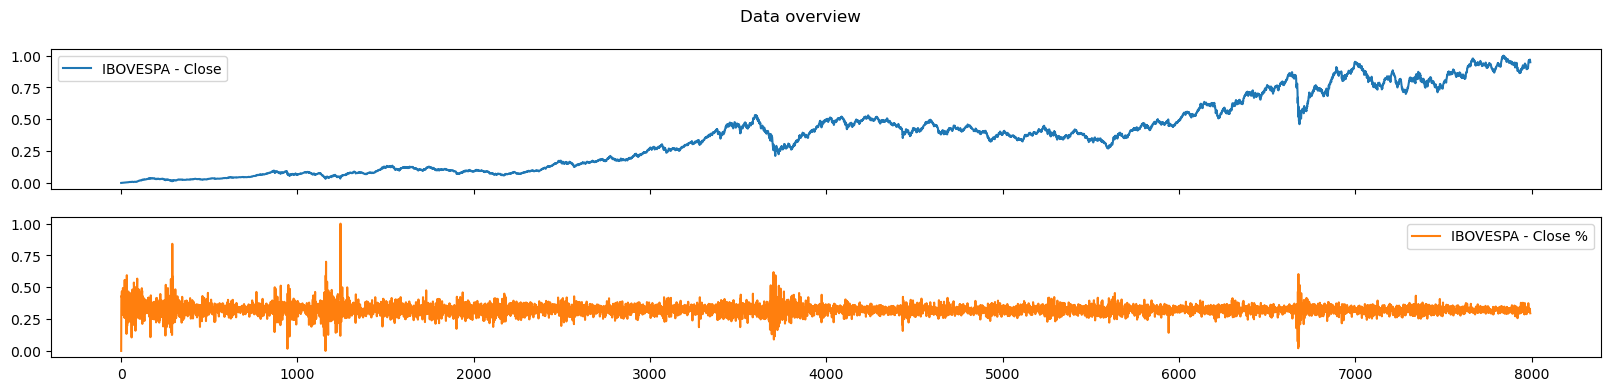

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

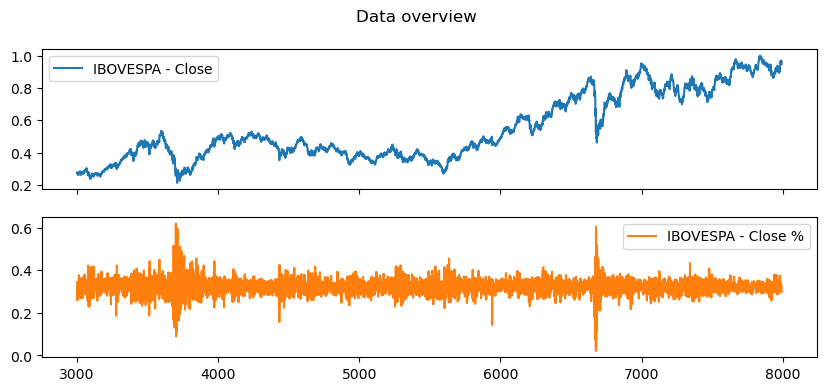

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

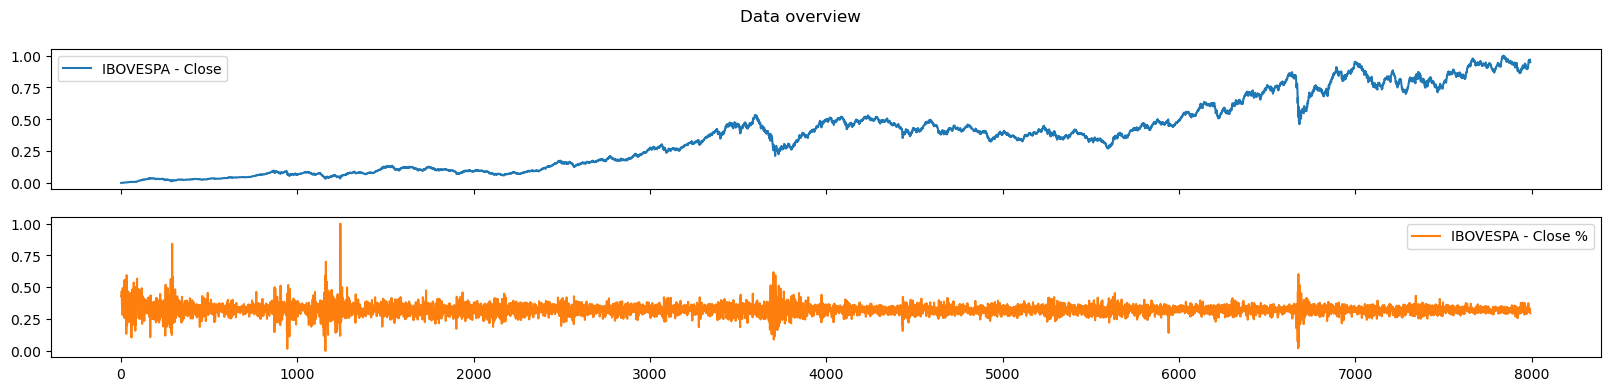

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

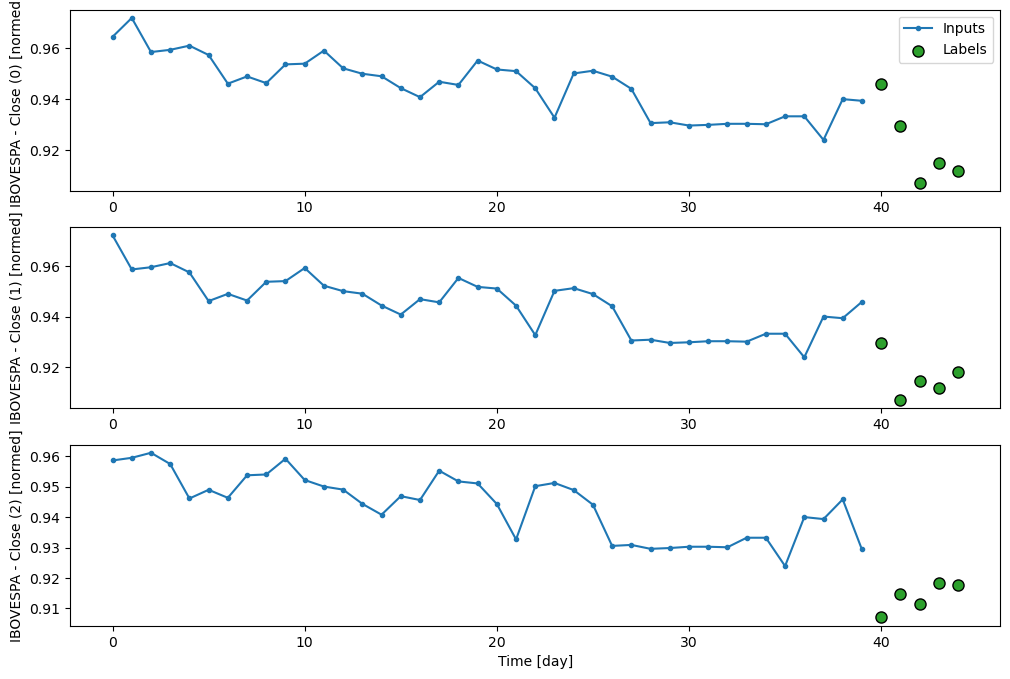

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:21 2s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 119.3951 - mean_squared_error: 1.7302e-04 - root_mean_squared_error: 0.0126

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 105.2960 - mean_squared_error: 1.7567e-04 - root_mean_squared_error: 0.0129

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 93.5021 - mean_squared_error: 2.0443e-04 - root_mean_squared_error: 0.0140 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 87.2769 - mean_squared_error: 2.0412e-04 - root_mean_squared_error: 0.0141

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 79.5853 - mean_squared_error: 1.9623e-04 - root_mean_squared_error: 0.0138

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 73.6571 - mean_squared_error: 1.8741e-04 - root_mean_squared_error: 0.0135

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 70.2058 - mean_squared_error: 1.8107e-04 - root_mean_squared_error: 0.0133

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 65.6335 - mean_squared_error: 1.7173e-04 - root_mean_squared_error: 0.0129

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 62.9920 - mean_squared_error: 1.6637e-04 - root_mean_squared_error: 0.0127

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 60.7340 - mean_squared_error: 1.6367e-04 - root_mean_squared_error: 0.0126

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 58.7526 - mean_squared_error: 1.6341e-04 - root_mean_squared_error: 0.0126

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 57.0202 - mean_squared_error: 1.6530e-04 - root_mean_squared_error: 0.0127

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 55.5124 - mean_squared_error: 1.6876e-04 - root_mean_squared_error: 0.0128

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.1122 - mean_squared_error: 1.7149e-04 - root_mean_squared_error: 0.0130

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.2506 - mean_squared_error: 1.7532e-04 - root_mean_squared_error: 0.0131

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.1883 - mean_squared_error: 1.7812e-04 - root_mean_squared_error: 0.0132

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.2299 - mean_squared_error: 1.8154e-04 - root_mean_squared_error: 0.0133

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.3841 - mean_squared_error: 1.8668e-04 - root_mean_squared_error: 0.0135

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.5909 - mean_squared_error: 1.9141e-04 - root_mean_squared_error: 0.0137

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.8248 - mean_squared_error: 1.9547e-04 - root_mean_squared_error: 0.0138

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.0809 - mean_squared_error: 1.9890e-04 - root_mean_squared_error: 0.0139

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.3626 - mean_squared_error: 2.0181e-04 - root_mean_squared_error: 0.0140

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.6696 - mean_squared_error: 2.0432e-04 - root_mean_squared_error: 0.0141

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 44.6814 - mean_squared_error: 2.0755e-04 - root_mean_squared_error: 0.0142

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 43.7346 - mean_squared_error: 2.0985e-04 - root_mean_squared_error: 0.0143

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 43.1338 - mean_squared_error: 2.1105e-04 - root_mean_squared_error: 0.0144

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 42.2830 - mean_squared_error: 2.1267e-04 - root_mean_squared_error: 0.0144

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 41.4914 - mean_squared_error: 2.1413e-04 - root_mean_squared_error: 0.0145

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 41.0113 - mean_squared_error: 2.1535e-04 - root_mean_squared_error: 0.0145

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 40.3181 - mean_squared_error: 2.1680e-04 - root_mean_squared_error: 0.0146

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 39.8858 - mean_squared_error: 2.1796e-04 - root_mean_squared_error: 0.0146

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 39.4815 - mean_squared_error: 2.1984e-04 - root_mean_squared_error: 0.0147

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 38.9251 - mean_squared_error: 2.2544e-04 - root_mean_squared_error: 0.0149

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 38.5728 - mean_squared_error: 2.2948e-04 - root_mean_squared_error: 0.0150

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 38.2276 - mean_squared_error: 2.3325e-04 - root_mean_squared_error: 0.0151

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 37.8901 - mean_squared_error: 2.3676e-04 - root_mean_squared_error: 0.0152

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 37.5580 - mean_squared_error: 2.3999e-04 - root_mean_squared_error: 0.0153

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 37.0800 - mean_squared_error: 2.4511e-04 - root_mean_squared_error: 0.0154

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 36.7713 - mean_squared_error: 2.4845e-04 - root_mean_squared_error: 0.0155

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 36.4735 - mean_squared_error: 2.5247e-04 - root_mean_squared_error: 0.0157

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 36.1866 - mean_squared_error: 2.5745e-04 - root_mean_squared_error: 0.0158

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 35.9061 - mean_squared_error: 2.6239e-04 - root_mean_squared_error: 0.0159

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 35.6311 - mean_squared_error: 2.6717e-04 - root_mean_squared_error: 0.0161

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 35.3621 - mean_squared_error: 2.7198e-04 - root_mean_squared_error: 0.0162

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 35.0975 - mean_squared_error: 2.7662e-04 - root_mean_squared_error: 0.0163

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 34.8370 - mean_squared_error: 2.8114e-04 - root_mean_squared_error: 0.0164

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 34.5814 - mean_squared_error: 2.8577e-04 - root_mean_squared_error: 0.0166

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 34.3307 - mean_squared_error: 2.9057e-04 - root_mean_squared_error: 0.0167

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 34.0833 - mean_squared_error: 2.9514e-04 - root_mean_squared_error: 0.0168

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 33.8403 - mean_squared_error: 2.9989e-04 - root_mean_squared_error: 0.0169

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 33.4985 - mean_squared_error: 3.1301e-04 - root_mean_squared_error: 0.0172

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 33.2833 - mean_squared_error: 3.2395e-04 - root_mean_squared_error: 0.0174

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 33.0742 - mean_squared_error: 3.3560e-04 - root_mean_squared_error: 0.0177

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 32.7807 - mean_squared_error: 3.6268e-04 - root_mean_squared_error: 0.0182

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 32.6001 - mean_squared_error: 3.9356e-04 - root_mean_squared_error: 0.0187

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 32.3473 - mean_squared_error: 4.5354e-04 - root_mean_squared_error: 0.0195

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 32.1015 - mean_squared_error: 5.1282e-04 - root_mean_squared_error: 0.0203

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 31.9398 - mean_squared_error: 5.5053e-04 - root_mean_squared_error: 0.0208

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 31.7020 - mean_squared_error: 6.0515e-04 - root_mean_squared_error: 0.0216

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 31.5463 - mean_squared_error: 6.4007e-04 - root_mean_squared_error: 0.0221

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 31.3921 - mean_squared_error: 6.7360e-04 - root_mean_squared_error: 0.0225

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 31.2417 - mean_squared_error: 7.0702e-04 - root_mean_squared_error: 0.0230

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 31.0957 - mean_squared_error: 7.4104e-04 - root_mean_squared_error: 0.0235

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 30.9513 - mean_squared_error: 7.7382e-04 - root_mean_squared_error: 0.0239

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 30.8081 - mean_squared_error: 8.0527e-04 - root_mean_squared_error: 0.0243

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 30.5953 - mean_squared_error: 8.5008e-04 - root_mean_squared_error: 0.0249

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 30.3885 - mean_squared_error: 8.9321e-04 - root_mean_squared_error: 0.0255

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 30.2529 - mean_squared_error: 9.2082e-04 - root_mean_squared_error: 0.0259

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 30.1179 - mean_squared_error: 9.4724e-04 - root_mean_squared_error: 0.0263

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 29.9839 - mean_squared_error: 9.7264e-04 - root_mean_squared_error: 0.0266

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 29.7880 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0272    

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 29.6599 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0275

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 29.5327 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0278

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 29.3434 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0283

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 29.1586 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 29.0387 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 28.8615 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0294

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 28.6897 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0298

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 28.5785 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 28.4156 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0305

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 28.3089 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0308

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 28.2031 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0310

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 28.0460 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 27.9440 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 27.8436 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 27.7440 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0322

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 27.5970 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0325

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 27.4530 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 27.3580 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 27.2222 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0336

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 27.1351 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 27.0493 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 26.9642 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0345

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 26.8799 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 26.7549 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 26.6727 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0355

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 26.5909 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 26.4692 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 26.3889 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 26.2696 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0369

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 26.1906 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 26.0734 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375 - val_loss: 0.0201 - val_mean_absolute_error: 0.0201 - val_mean_absolute_percentage_error: 2.1207 - val_mean_squared_error: 6.7153e-04 - val_root_mean_squared_error: 0.0259 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.6220 - mean_absolute_error: 0.6220 - mean_absolute_percentage_error: 8261.0156 - mean_squared_error: 0.3870 - root_mean_squared_error: 0.6221

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.6226 - mean_absolute_error: 0.6226 - mean_absolute_percentage_error: 6902.3237 - mean_squared_error: 0.3878 - root_mean_squared_error: 0.6227 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.6171 - mean_absolute_error: 0.6171 - mean_absolute_percentage_error: 5856.7246 - mean_squared_error: 0.3812 - root_mean_squared_error: 0.6173

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6078 - mean_absolute_error: 0.6078 - mean_absolute_percentage_error: 5178.9019 - mean_squared_error: 0.3704 - root_mean_squared_error: 0.6084

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6394 - mean_absolute_error: 0.6394 - mean_absolute_percentage_error: 4925.1436 - mean_squared_error: 0.5606 - root_mean_squared_error: 0.6978

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6982 - mean_absolute_error: 0.6982 - mean_absolute_percentage_error: 4901.3154 - mean_squared_error: 0.8265 - root_mean_squared_error: 0.8295

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7244 - mean_absolute_error: 0.7244 - mean_absolute_percentage_error: 4798.8687 - mean_squared_error: 0.9642 - root_mean_squared_error: 0.9037

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7307 - mean_absolute_error: 0.7307 - mean_absolute_percentage_error: 4656.7739 - mean_squared_error: 1.0340 - root_mean_squared_error: 0.9458

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7256 - mean_absolute_error: 0.7256 - mean_absolute_percentage_error: 4497.8789 - mean_squared_error: 1.0663 - root_mean_squared_error: 0.9691

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7148 - mean_absolute_error: 0.7148 - mean_absolute_percentage_error: 4337.4990 - mean_squared_error: 1.0770 - root_mean_squared_error: 0.9808

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7010 - mean_absolute_error: 0.7010 - mean_absolute_percentage_error: 4181.6504 - mean_squared_error: 1.0748 - root_mean_squared_error: 0.9852

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6858 - mean_absolute_error: 0.6858 - mean_absolute_percentage_error: 4033.3127 - mean_squared_error: 1.0650 - root_mean_squared_error: 0.9848

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6624 - mean_absolute_error: 0.6624 - mean_absolute_percentage_error: 3826.6335 - mean_squared_error: 1.0421 - root_mean_squared_error: 0.9786

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6468 - mean_absolute_error: 0.6468 - mean_absolute_percentage_error: 3699.2837 - mean_squared_error: 1.0239 - root_mean_squared_error: 0.9721

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6246 - mean_absolute_error: 0.6246 - mean_absolute_percentage_error: 3524.0100 - mean_squared_error: 0.9949 - root_mean_squared_error: 0.9603

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6103 - mean_absolute_error: 0.6103 - mean_absolute_percentage_error: 3416.4287 - mean_squared_error: 0.9751 - root_mean_squared_error: 0.9517

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5967 - mean_absolute_error: 0.5967 - mean_absolute_percentage_error: 3315.7385 - mean_squared_error: 0.9553 - root_mean_squared_error: 0.9426

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5836 - mean_absolute_error: 0.5836 - mean_absolute_percentage_error: 3221.4189 - mean_squared_error: 0.9359 - root_mean_squared_error: 0.9334

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5711 - mean_absolute_error: 0.5711 - mean_absolute_percentage_error: 3132.7666 - mean_squared_error: 0.9169 - root_mean_squared_error: 0.9241

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5531 - mean_absolute_error: 0.5531 - mean_absolute_percentage_error: 3009.3157 - mean_squared_error: 0.8893 - root_mean_squared_error: 0.9101

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5417 - mean_absolute_error: 0.5417 - mean_absolute_percentage_error: 2932.7375 - mean_squared_error: 0.8716 - root_mean_squared_error: 0.9008

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5307 - mean_absolute_error: 0.5307 - mean_absolute_percentage_error: 2860.3152 - mean_squared_error: 0.8544 - root_mean_squared_error: 0.8917

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5202 - mean_absolute_error: 0.5202 - mean_absolute_percentage_error: 2791.7429 - mean_squared_error: 0.8379 - root_mean_squared_error: 0.8828

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5101 - mean_absolute_error: 0.5101 - mean_absolute_percentage_error: 2726.7446 - mean_squared_error: 0.8220 - root_mean_squared_error: 0.8740

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5005 - mean_absolute_error: 0.5005 - mean_absolute_percentage_error: 2665.0308 - mean_squared_error: 0.8066 - root_mean_squared_error: 0.8654

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4912 - mean_absolute_error: 0.4912 - mean_absolute_percentage_error: 2606.3599 - mean_squared_error: 0.7918 - root_mean_squared_error: 0.8569

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4780 - mean_absolute_error: 0.4780 - mean_absolute_percentage_error: 2523.5928 - mean_squared_error: 0.7706 - root_mean_squared_error: 0.8446

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4696 - mean_absolute_error: 0.4696 - mean_absolute_percentage_error: 2471.6165 - mean_squared_error: 0.7571 - root_mean_squared_error: 0.8367

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4576 - mean_absolute_error: 0.4576 - mean_absolute_percentage_error: 2398.0356 - mean_squared_error: 0.7377 - root_mean_squared_error: 0.8251

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - mean_absolute_percentage_error: 2329.2495 - mean_squared_error: 0.7193 - root_mean_squared_error: 0.8139

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4392 - mean_absolute_error: 0.4392 - mean_absolute_percentage_error: 2285.8472 - mean_squared_error: 0.7076 - root_mean_squared_error: 0.8067

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4323 - mean_absolute_error: 0.4323 - mean_absolute_percentage_error: 2244.2566 - mean_squared_error: 0.6963 - root_mean_squared_error: 0.7996

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4256 - mean_absolute_error: 0.4256 - mean_absolute_percentage_error: 2204.3796 - mean_squared_error: 0.6854 - root_mean_squared_error: 0.7928

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4192 - mean_absolute_error: 0.4192 - mean_absolute_percentage_error: 2166.0847 - mean_squared_error: 0.6749 - root_mean_squared_error: 0.7861

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4130 - mean_absolute_error: 0.4130 - mean_absolute_percentage_error: 2129.2666 - mean_squared_error: 0.6647 - root_mean_squared_error: 0.7795

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4071 - mean_absolute_error: 0.4071 - mean_absolute_percentage_error: 2093.8345 - mean_squared_error: 0.6548 - root_mean_squared_error: 0.7731

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3985 - mean_absolute_error: 0.3985 - mean_absolute_percentage_error: 2043.1102 - mean_squared_error: 0.6406 - root_mean_squared_error: 0.7638

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3929 - mean_absolute_error: 0.3929 - mean_absolute_percentage_error: 2010.8080 - mean_squared_error: 0.6315 - root_mean_squared_error: 0.7578

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3850 - mean_absolute_error: 0.3850 - mean_absolute_percentage_error: 1964.4628 - mean_squared_error: 0.6183 - root_mean_squared_error: 0.7490

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3774 - mean_absolute_error: 0.3774 - mean_absolute_percentage_error: 1920.4681 - mean_squared_error: 0.6058 - root_mean_squared_error: 0.7406

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3726 - mean_absolute_error: 0.3726 - mean_absolute_percentage_error: 1892.3560 - mean_squared_error: 0.5977 - root_mean_squared_error: 0.7351

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3679 - mean_absolute_error: 0.3679 - mean_absolute_percentage_error: 1865.1633 - mean_squared_error: 0.5899 - root_mean_squared_error: 0.7297

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3633 - mean_absolute_error: 0.3633 - mean_absolute_percentage_error: 1838.8444 - mean_squared_error: 0.5823 - root_mean_squared_error: 0.7244

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3589 - mean_absolute_error: 0.3589 - mean_absolute_percentage_error: 1813.3525 - mean_squared_error: 0.5749 - root_mean_squared_error: 0.7193

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 1788.6533 - mean_squared_error: 0.5678 - root_mean_squared_error: 0.7143

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3505 - mean_absolute_error: 0.3505 - mean_absolute_percentage_error: 1764.7059 - mean_squared_error: 0.5608 - root_mean_squared_error: 0.7093

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 1730.1119 - mean_squared_error: 0.5507 - root_mean_squared_error: 0.7021

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3406 - mean_absolute_error: 0.3406 - mean_absolute_percentage_error: 1707.8910 - mean_squared_error: 0.5442 - root_mean_squared_error: 0.6975

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3350 - mean_absolute_error: 0.3350 - mean_absolute_percentage_error: 1675.7449 - mean_squared_error: 0.5347 - root_mean_squared_error: 0.6906

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 1655.0627 - mean_squared_error: 0.5286 - root_mean_squared_error: 0.6862

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 1634.9493 - mean_squared_error: 0.5227 - root_mean_squared_error: 0.6819

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3246 - mean_absolute_error: 0.3246 - mean_absolute_percentage_error: 1615.3842 - mean_squared_error: 0.5169 - root_mean_squared_error: 0.6776

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3213 - mean_absolute_error: 0.3213 - mean_absolute_percentage_error: 1596.3561 - mean_squared_error: 0.5112 - root_mean_squared_error: 0.6734

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 1568.7622 - mean_squared_error: 0.5030 - root_mean_squared_error: 0.6673

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1550.9596 - mean_squared_error: 0.4977 - root_mean_squared_error: 0.6633

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1525.1062 - mean_squared_error: 0.4900 - root_mean_squared_error: 0.6575

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1508.4133 - mean_squared_error: 0.4850 - root_mean_squared_error: 0.6537

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1492.1329 - mean_squared_error: 0.4802 - root_mean_squared_error: 0.6500

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1476.2462 - mean_squared_error: 0.4754 - root_mean_squared_error: 0.6464

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 1460.7366 - mean_squared_error: 0.4708 - root_mean_squared_error: 0.6428

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1438.1501 - mean_squared_error: 0.4640 - root_mean_squared_error: 0.6376

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1423.5287 - mean_squared_error: 0.4596 - root_mean_squared_error: 0.6341

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2901 - mean_absolute_error: 0.2901 - mean_absolute_percentage_error: 1409.2449 - mean_squared_error: 0.4553 - root_mean_squared_error: 0.6308

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2867 - mean_absolute_error: 0.2867 - mean_absolute_percentage_error: 1388.4216 - mean_squared_error: 0.4490 - root_mean_squared_error: 0.6258

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1374.9209 - mean_squared_error: 0.4449 - root_mean_squared_error: 0.6226

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1355.2157 - mean_squared_error: 0.4389 - root_mean_squared_error: 0.6179

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1342.4297 - mean_squared_error: 0.4350 - root_mean_squared_error: 0.6148

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2771 - mean_absolute_error: 0.2771 - mean_absolute_percentage_error: 1329.9139 - mean_squared_error: 0.4312 - root_mean_squared_error: 0.6117

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2750 - mean_absolute_error: 0.2750 - mean_absolute_percentage_error: 1317.6587 - mean_squared_error: 0.4275 - root_mean_squared_error: 0.6087

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 1305.6550 - mean_squared_error: 0.4239 - root_mean_squared_error: 0.6058

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1293.8944 - mean_squared_error: 0.4203 - root_mean_squared_error: 0.6029

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1282.3705 - mean_squared_error: 0.4167 - root_mean_squared_error: 0.6000

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1271.0750 - mean_squared_error: 0.4133 - root_mean_squared_error: 0.5972

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1254.5457 - mean_squared_error: 0.4082 - root_mean_squared_error: 0.5930

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1243.7922 - mean_squared_error: 0.4049 - root_mean_squared_error: 0.5903

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1233.2441 - mean_squared_error: 0.4017 - root_mean_squared_error: 0.5876

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1222.8949 - mean_squared_error: 0.3985 - root_mean_squared_error: 0.5849

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1207.7332 - mean_squared_error: 0.3938 - root_mean_squared_error: 0.5810

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2541 - mean_absolute_error: 0.2541 - mean_absolute_percentage_error: 1192.9899 - mean_squared_error: 0.3893 - root_mean_squared_error: 0.5772

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1183.3849 - mean_squared_error: 0.3863 - root_mean_squared_error: 0.5747

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1169.3029 - mean_squared_error: 0.3820 - root_mean_squared_error: 0.5710

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1160.1245 - mean_squared_error: 0.3792 - root_mean_squared_error: 0.5686

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2470 - mean_absolute_error: 0.2470 - mean_absolute_percentage_error: 1151.1082 - mean_squared_error: 0.3764 - root_mean_squared_error: 0.5662

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 1142.2484 - mean_squared_error: 0.3736 - root_mean_squared_error: 0.5639

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1133.5413 - mean_squared_error: 0.3709 - root_mean_squared_error: 0.5615

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1120.7568 - mean_squared_error: 0.3670 - root_mean_squared_error: 0.5581

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 1112.4125 - mean_squared_error: 0.3644 - root_mean_squared_error: 0.5559

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1104.2074 - mean_squared_error: 0.3618 - root_mean_squared_error: 0.5536

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1096.1373 - mean_squared_error: 0.3593 - root_mean_squared_error: 0.5515

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 1088.1984 - mean_squared_error: 0.3568 - root_mean_squared_error: 0.5493

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1080.3871 - mean_squared_error: 0.3544 - root_mean_squared_error: 0.5472

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1072.7004 - mean_squared_error: 0.3520 - root_mean_squared_error: 0.5450

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1065.1355 - mean_squared_error: 0.3497 - root_mean_squared_error: 0.5430

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1057.6901 - mean_squared_error: 0.3473 - root_mean_squared_error: 0.5409

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1046.7427 - mean_squared_error: 0.3439 - root_mean_squared_error: 0.5379

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1039.5859 - mean_squared_error: 0.3417 - root_mean_squared_error: 0.5359

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 1032.5382 - mean_squared_error: 0.3395 - root_mean_squared_error: 0.5339

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1025.5967 - mean_squared_error: 0.3373 - root_mean_squared_error: 0.5320

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1018.7592 - mean_squared_error: 0.3352 - root_mean_squared_error: 0.5300

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1008.6925 - mean_squared_error: 0.3320 - root_mean_squared_error: 0.5272

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 1002.1045 - mean_squared_error: 0.3300 - root_mean_squared_error: 0.5253

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 995.6121 - mean_squared_error: 0.3279 - root_mean_squared_error: 0.5235 

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 989.2134 - mean_squared_error: 0.3259 - root_mean_squared_error: 0.5217

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 982.9062 - mean_squared_error: 0.3240 - root_mean_squared_error: 0.5198

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 976.6884 - mean_squared_error: 0.3220 - root_mean_squared_error: 0.5181

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 967.5248 - mean_squared_error: 0.3191 - root_mean_squared_error: 0.5154

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2147 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 958.5637 - mean_squared_error: 0.3163 - root_mean_squared_error: 0.5128 - val_loss: 0.0775 - val_mean_absolute_error: 0.0775 - val_mean_absolute_percentage_error: 8.2240 - val_mean_squared_error: 0.0065 - val_root_mean_squared_error: 0.0809 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.6281 - mean_absolute_error: 0.6281 - mean_absolute_percentage_error: 8339.9629 - mean_squared_error: 0.3945 - root_mean_squared_error: 0.6281

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.6257 - mean_absolute_error: 0.6257 - mean_absolute_percentage_error: 6374.7949 - mean_squared_error: 0.3915 - root_mean_squared_error: 0.6257 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6178 - mean_absolute_error: 0.6178 - mean_absolute_percentage_error: 5237.5928 - mean_squared_error: 0.3820 - root_mean_squared_error: 0.6180

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6109 - mean_absolute_error: 0.6109 - mean_absolute_percentage_error: 4807.4312 - mean_squared_error: 0.3740 - root_mean_squared_error: 0.6113

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6022 - mean_absolute_error: 0.6022 - mean_absolute_percentage_error: 4485.1084 - mean_squared_error: 0.3643 - root_mean_squared_error: 0.6032

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5851 - mean_absolute_error: 0.5851 - mean_absolute_percentage_error: 4100.5410 - mean_squared_error: 0.3470 - root_mean_squared_error: 0.5880

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5735 - mean_absolute_error: 0.5735 - mean_absolute_percentage_error: 3891.1589 - mean_squared_error: 0.3360 - root_mean_squared_error: 0.5781

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5552 - mean_absolute_error: 0.5552 - mean_absolute_percentage_error: 3620.3936 - mean_squared_error: 0.3217 - root_mean_squared_error: 0.5650

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5465 - mean_absolute_error: 0.5465 - mean_absolute_percentage_error: 3470.8772 - mean_squared_error: 0.3169 - root_mean_squared_error: 0.5607

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5384 - mean_absolute_error: 0.5384 - mean_absolute_percentage_error: 3337.2949 - mean_squared_error: 0.3123 - root_mean_squared_error: 0.5567

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5262 - mean_absolute_error: 0.5262 - mean_absolute_percentage_error: 3157.2522 - mean_squared_error: 0.3047 - root_mean_squared_error: 0.5498

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5180 - mean_absolute_error: 0.5180 - mean_absolute_percentage_error: 3048.6780 - mean_squared_error: 0.2993 - root_mean_squared_error: 0.5446

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5094 - mean_absolute_error: 0.5094 - mean_absolute_percentage_error: 2947.6838 - mean_squared_error: 0.2935 - root_mean_squared_error: 0.5391

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5004 - mean_absolute_error: 0.5004 - mean_absolute_percentage_error: 2853.2646 - mean_squared_error: 0.2877 - root_mean_squared_error: 0.5333

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4913 - mean_absolute_error: 0.4913 - mean_absolute_percentage_error: 2765.0991 - mean_squared_error: 0.2818 - root_mean_squared_error: 0.5275

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4778 - mean_absolute_error: 0.4778 - mean_absolute_percentage_error: 2643.7815 - mean_squared_error: 0.2732 - root_mean_squared_error: 0.5187

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4691 - mean_absolute_error: 0.4691 - mean_absolute_percentage_error: 2569.3457 - mean_squared_error: 0.2676 - root_mean_squared_error: 0.5128

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4567 - mean_absolute_error: 0.4567 - mean_absolute_percentage_error: 2466.3516 - mean_squared_error: 0.2595 - root_mean_squared_error: 0.5043

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4448 - mean_absolute_error: 0.4448 - mean_absolute_percentage_error: 2372.2087 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4960

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4372 - mean_absolute_error: 0.4372 - mean_absolute_percentage_error: 2313.7776 - mean_squared_error: 0.2470 - root_mean_squared_error: 0.4906

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4298 - mean_absolute_error: 0.4298 - mean_absolute_percentage_error: 2258.5027 - mean_squared_error: 0.2422 - root_mean_squared_error: 0.4854

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4226 - mean_absolute_error: 0.4226 - mean_absolute_percentage_error: 2206.0962 - mean_squared_error: 0.2377 - root_mean_squared_error: 0.4803

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4156 - mean_absolute_error: 0.4156 - mean_absolute_percentage_error: 2156.3433 - mean_squared_error: 0.2333 - root_mean_squared_error: 0.4753

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4088 - mean_absolute_error: 0.4088 - mean_absolute_percentage_error: 2109.0439 - mean_squared_error: 0.2290 - root_mean_squared_error: 0.4704

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4023 - mean_absolute_error: 0.4023 - mean_absolute_percentage_error: 2064.0293 - mean_squared_error: 0.2250 - root_mean_squared_error: 0.4657

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3960 - mean_absolute_error: 0.3960 - mean_absolute_percentage_error: 2021.1274 - mean_squared_error: 0.2210 - root_mean_squared_error: 0.4611

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3898 - mean_absolute_error: 0.3898 - mean_absolute_percentage_error: 1980.2007 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4566

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 1922.2181 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4501

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 1885.6895 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4459

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3673 - mean_absolute_error: 0.3673 - mean_absolute_percentage_error: 1833.7876 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4398

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3596 - mean_absolute_error: 0.3596 - mean_absolute_percentage_error: 1785.0476 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4340

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 1754.1528 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4302

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3475 - mean_absolute_error: 0.3475 - mean_absolute_percentage_error: 1710.0087 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4248

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3429 - mean_absolute_error: 0.3429 - mean_absolute_percentage_error: 1681.9489 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4212

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3385 - mean_absolute_error: 0.3385 - mean_absolute_percentage_error: 1654.9174 - mean_squared_error: 0.1857 - root_mean_squared_error: 0.4178

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3341 - mean_absolute_error: 0.3341 - mean_absolute_percentage_error: 1628.8516 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.4144

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3299 - mean_absolute_error: 0.3299 - mean_absolute_percentage_error: 1603.6997 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.4111

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3259 - mean_absolute_error: 0.3259 - mean_absolute_percentage_error: 1579.4142 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.4079

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1555.9492 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.4048

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1522.2042 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.4002

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1490.0767 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3958

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - mean_absolute_percentage_error: 1469.4998 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3930

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 1439.8130 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3888

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 1420.7637 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3861

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1402.2750 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3835

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2911 - mean_absolute_error: 0.2911 - mean_absolute_percentage_error: 1375.5396 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3796

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1358.3468 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3771

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1341.6335 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3747

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1325.3815 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3723

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1309.5767 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3699

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1294.2045 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3676

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1279.2367 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3654

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1257.5062 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3621

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1243.4766 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3600

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1223.0835 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3568

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1203.4307 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3538

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 1190.7190 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3518

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1172.2090 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3489

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1160.2255 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3470

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1148.5151 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3451

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 1131.4429 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3424

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1120.3763 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3406

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1104.2275 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3380

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1093.7501 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3363

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1083.4937 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3346

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1068.5082 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3321

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2359 - mean_absolute_error: 0.2359 - mean_absolute_percentage_error: 1058.7748 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3305

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1044.5432 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3281

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1030.7354 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3257

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1021.7560 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3242

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 1012.9521 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3227

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1004.3186 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3212

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 995.8494 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3198 

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 983.4434 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3176

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 975.3641 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3162

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 963.5248 - mean_squared_error: 0.1131 - root_mean_squared_error: 0.3141

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 955.8133 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.3128

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 948.2421 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3114

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 940.8066 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.3101

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 933.5023 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3088

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 926.3248 - mean_squared_error: 0.1090 - root_mean_squared_error: 0.3076

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 919.2702 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.3063

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 912.3351 - mean_squared_error: 0.1075 - root_mean_squared_error: 0.3051

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 905.5170 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.3038

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 898.8135 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3026

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 888.9650 - mean_squared_error: 0.1049 - root_mean_squared_error: 0.3009

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 882.5325 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2997

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 873.0773 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.2980

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 863.8467 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.2963

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 857.8156 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.2952

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 848.9468 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.2935

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - mean_absolute_percentage_error: 843.1484 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.2925

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 837.4380 - mean_squared_error: 0.0992 - root_mean_squared_error: 0.2914

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 831.8137 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.2904

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 826.2736 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2894

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 818.1171 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2878

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 812.7788 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2868

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 804.9163 - mean_squared_error: 0.0956 - root_mean_squared_error: 0.2854

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1894 - mean_absolute_error: 0.1894 - mean_absolute_percentage_error: 797.2222 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2839

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 792.1835 - mean_squared_error: 0.0942 - root_mean_squared_error: 0.2830

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 784.7579 - mean_squared_error: 0.0934 - root_mean_squared_error: 0.2815

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1863 - mean_absolute_error: 0.1863 - mean_absolute_percentage_error: 779.9029 - mean_squared_error: 0.0929 - root_mean_squared_error: 0.2806 - val_loss: 0.0586 - val_mean_absolute_error: 0.0586 - val_mean_absolute_percentage_error: 6.2088 - val_mean_squared_error: 0.0039 - val_root_mean_squared_error: 0.0626 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.5480 - mean_absolute_error: 0.5480 - mean_absolute_percentage_error: 7275.9648 - mean_squared_error: 0.3014 - root_mean_squared_error: 0.5490

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5464 - mean_absolute_error: 0.5464 - mean_absolute_percentage_error: 6064.3774 - mean_squared_error: 0.2997 - root_mean_squared_error: 0.5475 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5419 - mean_absolute_error: 0.5419 - mean_absolute_percentage_error: 5145.0576 - mean_squared_error: 0.2949 - root_mean_squared_error: 0.5430

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5361 - mean_absolute_error: 0.5361 - mean_absolute_percentage_error: 4557.0283 - mean_squared_error: 0.2889 - root_mean_squared_error: 0.5374

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5252 - mean_absolute_error: 0.5252 - mean_absolute_percentage_error: 4027.5833 - mean_squared_error: 0.2782 - root_mean_squared_error: 0.5271

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5161 - mean_absolute_error: 0.5161 - mean_absolute_percentage_error: 3771.8391 - mean_squared_error: 0.2697 - root_mean_squared_error: 0.5188

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5055 - mean_absolute_error: 0.5055 - mean_absolute_percentage_error: 3556.4541 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.5094

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4867 - mean_absolute_error: 0.4867 - mean_absolute_percentage_error: 3281.0049 - mean_squared_error: 0.2461 - root_mean_squared_error: 0.4941

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4728 - mean_absolute_error: 0.4728 - mean_absolute_percentage_error: 3119.6362 - mean_squared_error: 0.2366 - root_mean_squared_error: 0.4836

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4523 - mean_absolute_error: 0.4523 - mean_absolute_percentage_error: 2907.4209 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4683

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4332 - mean_absolute_error: 0.4332 - mean_absolute_percentage_error: 2725.2625 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4540

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4213 - mean_absolute_error: 0.4213 - mean_absolute_percentage_error: 2617.1768 - mean_squared_error: 0.2036 - root_mean_squared_error: 0.4451

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - mean_absolute_percentage_error: 2471.5776 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4325

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3938 - mean_absolute_error: 0.3938 - mean_absolute_percentage_error: 2384.1067 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.4246

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3838 - mean_absolute_error: 0.3838 - mean_absolute_percentage_error: 2303.3364 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.4171

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3743 - mean_absolute_error: 0.3743 - mean_absolute_percentage_error: 2228.7051 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.4100

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 2159.4841 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.4032

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3528 - mean_absolute_error: 0.3528 - mean_absolute_percentage_error: 2064.3467 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3936

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3449 - mean_absolute_error: 0.3449 - mean_absolute_percentage_error: 2006.0168 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3876

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 1951.2966 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3819

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3303 - mean_absolute_error: 0.3303 - mean_absolute_percentage_error: 1899.8406 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3764

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 1851.3530 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3712

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1805.5797 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3661

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1762.2903 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3613

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3018 - mean_absolute_error: 0.3018 - mean_absolute_percentage_error: 1701.5739 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3544

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1663.6512 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3500

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1610.2173 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3438

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 1576.6992 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3398

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1544.7251 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3360

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1514.1886 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3323

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1484.9922 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3287

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1443.5111 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3235

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1417.2809 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3202

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 1392.1052 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.3170

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2506 - mean_absolute_error: 0.2506 - mean_absolute_percentage_error: 1367.9192 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.3139

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1344.6644 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.3109

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2433 - mean_absolute_error: 0.2433 - mean_absolute_percentage_error: 1322.2849 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.3080

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1300.7301 - mean_squared_error: 0.1052 - root_mean_squared_error: 0.3052

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 1279.9529 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.3024

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1259.9113 - mean_squared_error: 0.1019 - root_mean_squared_error: 0.2997

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1240.5646 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2971

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 1221.8767 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2946

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2227 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 1195.0046 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2909

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1177.8185 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.2885

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1161.1812 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2862

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1145.0645 - mean_squared_error: 0.0929 - root_mean_squared_error: 0.2840

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2120 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 1129.4442 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2818

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 1114.2971 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2796

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 1099.5997 - mean_squared_error: 0.0893 - root_mean_squared_error: 0.2775

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 1078.3539 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2745

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 1064.6954 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2725

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 1051.4209 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2706

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 1032.1965 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2677

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 1019.8142 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2659

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 1007.7645 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2641

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1900 - mean_absolute_error: 0.1900 - mean_absolute_percentage_error: 996.0342 - mean_squared_error: 0.0810 - root_mean_squared_error: 0.2624 

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 979.0082 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2598

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 962.6249 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2574

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 952.0408 - mean_squared_error: 0.0775 - root_mean_squared_error: 0.2558

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 936.6465 - mean_squared_error: 0.0763 - root_mean_squared_error: 0.2534

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 926.6901 - mean_squared_error: 0.0755 - root_mean_squared_error: 0.2519

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 916.9680 - mean_squared_error: 0.0747 - root_mean_squared_error: 0.2504

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 907.4721 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2490

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1741 - mean_absolute_error: 0.1741 - mean_absolute_percentage_error: 898.1954 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2475

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1726 - mean_absolute_error: 0.1726 - mean_absolute_percentage_error: 889.1303 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2461

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 880.2679 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2447

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 867.3389 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2427

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 858.9536 - mean_squared_error: 0.0701 - root_mean_squared_error: 0.2414

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1657 - mean_absolute_error: 0.1657 - mean_absolute_percentage_error: 846.7117 - mean_squared_error: 0.0691 - root_mean_squared_error: 0.2394

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1644 - mean_absolute_error: 0.1644 - mean_absolute_percentage_error: 838.7656 - mean_squared_error: 0.0685 - root_mean_squared_error: 0.2381

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1631 - mean_absolute_error: 0.1631 - mean_absolute_percentage_error: 830.9846 - mean_squared_error: 0.0679 - root_mean_squared_error: 0.2369

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 823.3635 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2357

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 815.8974 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2344

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 804.9785 - mean_squared_error: 0.0658 - root_mean_squared_error: 0.2327

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 797.8801 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2315

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - mean_absolute_percentage_error: 790.9208 - mean_squared_error: 0.0647 - root_mean_squared_error: 0.2304

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1554 - mean_absolute_error: 0.1554 - mean_absolute_percentage_error: 784.0963 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2292

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 777.4022 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2281

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 767.5980 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2265

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 761.2156 - mean_squared_error: 0.0623 - root_mean_squared_error: 0.2254

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 754.9526 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2244

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 745.7736 - mean_squared_error: 0.0611 - root_mean_squared_error: 0.2228

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 736.8417 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2213

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 731.0185 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2204

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - mean_absolute_percentage_error: 722.4739 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2189

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1444 - mean_absolute_error: 0.1444 - mean_absolute_percentage_error: 716.9001 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2180

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 711.4221 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2170

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 706.0369 - mean_squared_error: 0.0579 - root_mean_squared_error: 0.2161

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1417 - mean_absolute_error: 0.1417 - mean_absolute_percentage_error: 700.7421 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2152

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 692.9647 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2138

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 687.8862 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2130

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1384 - mean_absolute_error: 0.1384 - mean_absolute_percentage_error: 680.4219 - mean_squared_error: 0.0558 - root_mean_squared_error: 0.2117

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - mean_absolute_percentage_error: 673.1398 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2104

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 668.3824 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2096

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 661.3865 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2084

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 656.8125 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2076

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 652.3088 - mean_squared_error: 0.0536 - root_mean_squared_error: 0.2068

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 645.6812 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2057

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1323 - mean_absolute_error: 0.1323 - mean_absolute_percentage_error: 641.3458 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2049

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 634.9630 - mean_squared_error: 0.0522 - root_mean_squared_error: 0.2038

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 630.7859 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2030

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 626.6698 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2023

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 620.6064 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2012

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 614.6746 - mean_squared_error: 0.0506 - root_mean_squared_error: 0.2002

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 612.7293 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.1998 - val_loss: 0.0333 - val_mean_absolute_error: 0.0333 - val_mean_absolute_percentage_error: 3.5119 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0378 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.3327 - mean_absolute_error: 0.3327 - mean_absolute_percentage_error: 4418.1733 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3328

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3316 - mean_absolute_error: 0.3316 - mean_absolute_percentage_error: 3681.5833 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.3317 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3251 - mean_absolute_error: 0.3251 - mean_absolute_percentage_error: 2918.6611 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3254

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 2626.1179 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.3198

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3119 - mean_absolute_error: 0.3119 - mean_absolute_percentage_error: 2418.2102 - mean_squared_error: 0.0983 - root_mean_squared_error: 0.3131

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 2250.3076 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.3056

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2932 - mean_absolute_error: 0.2932 - mean_absolute_percentage_error: 2106.1243 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2976

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2771 - mean_absolute_error: 0.2771 - mean_absolute_percentage_error: 1922.4641 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2856

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1819.9694 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2783

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2548 - mean_absolute_error: 0.2548 - mean_absolute_percentage_error: 1688.9614 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2683

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1612.9155 - mean_squared_error: 0.0710 - root_mean_squared_error: 0.2621

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1544.0370 - mean_squared_error: 0.0682 - root_mean_squared_error: 0.2563

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1481.5402 - mean_squared_error: 0.0657 - root_mean_squared_error: 0.2508

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1424.6543 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2457

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1372.5483 - mean_squared_error: 0.0612 - root_mean_squared_error: 0.2409

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1324.5576 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2364

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 1259.4504 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2301

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 1201.2808 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2242

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 1165.7694 - mean_squared_error: 0.0523 - root_mean_squared_error: 0.2206

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 1116.7515 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2154

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 1086.5826 - mean_squared_error: 0.0489 - root_mean_squared_error: 0.2122

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1795 - mean_absolute_error: 0.1795 - mean_absolute_percentage_error: 1058.2004 - mean_squared_error: 0.0477 - root_mean_squared_error: 0.2091

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 1031.4467 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.2061

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 1006.1819 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.2033

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 982.2788 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.2006 

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1657 - mean_absolute_error: 0.1657 - mean_absolute_percentage_error: 959.6260 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1980

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1611 - mean_absolute_error: 0.1611 - mean_absolute_percentage_error: 927.7800 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1943

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1581 - mean_absolute_error: 0.1581 - mean_absolute_percentage_error: 907.8446 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1919

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1540 - mean_absolute_error: 0.1540 - mean_absolute_percentage_error: 879.6943 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1886

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 853.4543 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1854

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 836.9241 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1833

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 821.1020 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1814

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 805.9411 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1795

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 791.3991 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1776

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 777.4379 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1758

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 764.0226 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1741

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - mean_absolute_percentage_error: 744.8511 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1716

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 732.6608 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1700

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 720.9127 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1684

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 709.5815 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1669

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1263 - mean_absolute_error: 0.1263 - mean_absolute_percentage_error: 698.6453 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1655

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 688.0817 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1640

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 677.8718 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1626

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 667.9974 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1613

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 658.4415 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1600

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 644.6705 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1580

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 631.5312 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1562

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 623.1008 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1550

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 614.9198 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1538

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 606.9766 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1527

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 595.4854 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1510

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 584.4756 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1494

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 577.3870 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1484

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 567.1109 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1469

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 557.2382 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1454

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 550.8682 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1445

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 544.6603 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1436

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 538.6076 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1426

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 529.8059 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1413

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 524.1149 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1405

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 518.5594 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1396

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 510.4698 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1384

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 505.2322 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1375

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 500.1137 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1368

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 495.1099 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1360

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 490.2169 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1352

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 485.4307 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1345

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 480.7480 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1337

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 476.1653 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1330

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 473.9104 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1326

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 469.4716 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1319

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 465.1247 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1312

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 460.8668 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1305

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 456.6952 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1299

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 452.6075 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1292

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 446.6269 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1282

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 442.7370 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1276

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 438.9220 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1270

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 435.1798 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1263

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 431.5086 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1257

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 426.1299 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1248

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 422.6265 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1243

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 419.1870 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1237

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 414.1435 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1228

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 410.8559 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1223

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 407.6263 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1217

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 404.4529 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1212

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 399.7957 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1204

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 395.2569 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1196

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 392.2945 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1191

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 389.3812 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1186

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 386.5157 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1181

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 383.6968 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1176

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 380.9242 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1172

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 378.1962 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1167

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 374.1850 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1160

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 371.5638 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1156

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 368.9834 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1151

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 366.4428 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1147

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 363.9417 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1143

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 360.2612 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1136

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 357.8534 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1132

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 355.4815 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1128

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 351.9893 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1122

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 349.7034 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1118

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 346.3369 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1113

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 345.2330 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1111 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 1.4447 - val_mean_squared_error: 2.7418e-04 - val_root_mean_squared_error: 0.0166 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1445 - mean_absolute_error: 0.1445 - mean_absolute_percentage_error: 1919.9459 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1453

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 1446.5642 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1408 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1333 - mean_absolute_error: 0.1333 - mean_absolute_percentage_error: 1237.4503 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1349

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 1088.9948 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1284

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 977.0067 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1222 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 892.6733 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1170

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 826.6872 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1128

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 771.9925 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1090

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 704.1578 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1039

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 666.5728 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1010

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 618.2645 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0970

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 577.3896 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0935

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 553.4213 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0914

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 521.5103 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0885

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 502.4896 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0867

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 485.0311 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0850

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 468.9380 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0835

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 446.9799 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0813

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 433.5981 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0799

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 415.1538 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0780

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 398.4151 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0762

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 388.0828 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0751

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 378.3417 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0740

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 369.1411 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0730

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 356.2558 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0715

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 348.2199 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0706

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 340.5861 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0697

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 329.8225 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0685

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 323.0678 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 313.5060 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0665

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 307.4801 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0658

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 301.7106 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0651

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 293.5007 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0641

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 288.3028 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0634

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 283.3097 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0628

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 278.5084 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 273.8873 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0616

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 267.2719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0607

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 263.0585 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0602

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 258.9926 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0597

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 255.0661 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0591

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 251.2720 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0586

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 247.6036 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0581

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 244.0539 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0577

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 240.6173 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0572

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 237.2879 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0567

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 234.0611 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0563

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 230.9317 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0559

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 227.8957 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0555

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 224.9484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0550

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 220.6860 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0545

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 217.9457 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0541

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 213.9771 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0535

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 210.1684 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0530

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 207.7129 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0526

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 205.3211 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 202.9906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0520

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 200.7187 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0517

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 198.5032 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0513

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 196.3419 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0510

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 193.1974 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0506

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 191.1635 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0503

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 188.2015 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 186.2839 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0496

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 184.4099 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0493

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 182.5777 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0490

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 180.7860 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0488

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 179.0334 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0485

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 177.3187 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0482

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 174.8145 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 173.1887 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0476

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 170.8127 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0473

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 168.5094 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0469

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 167.0124 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0467

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 165.5450 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0465

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 164.1063 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0463

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 162.6955 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0460

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 161.3118 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0458

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 159.9544 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0456

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 158.6224 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0454

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 157.3152 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0452

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 155.3990 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0449

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 154.1504 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0447

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 152.9242 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0445

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 151.7197 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0443

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 150.5363 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0441

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 149.3739 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0440

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 148.2315 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0438

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 146.5546 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0435

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 145.4602 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0434

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 143.8526 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0431

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 142.8028 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0430

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 141.7708 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0428

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 140.2543 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0426

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 139.2635 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0424

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 137.8073 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0423

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 136.8556 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0421

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 135.9189 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0420

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 134.9972 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0419

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 134.0897 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0418

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 133.1958 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 132.3155 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 131.0199 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0415

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 129.7526 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0413

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 128.5138 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0412 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 1.3758 - val_mean_squared_error: 2.5170e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 1466.3145 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1114

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 1098.3230 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1067 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 933.0063 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1009 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 815.5598 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0951

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 701.0325 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 647.4701 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0853

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 603.1870 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0824

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 565.5487 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0798

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 533.5141 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0775

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 505.5898 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0753

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 480.8467 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0734

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 458.8416 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0716

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 439.0328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0699

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 412.7825 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0677

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 397.2120 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0663

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 382.9381 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0650

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 369.8206 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0638

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 352.0272 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0621

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 341.2206 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0610

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 331.1469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0600

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 321.7297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0591

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 312.9031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0582

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 300.6556 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0569

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 289.4543 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0557

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 282.4999 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0549

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 272.7530 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 266.6713 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0532

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 260.8912 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0525

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 252.7374 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0516

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 247.6189 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0510

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 242.7329 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0505

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 238.0624 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 231.4276 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 225.1989 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 221.2541 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 217.4640 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 213.8185 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 210.3090 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 206.9280 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 203.6682 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 200.5230 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 197.4862 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 193.1219 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 190.3322 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 187.6324 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 185.0181 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 182.4849 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 178.8292 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 176.4831 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 174.2058 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 171.9942 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 169.8460 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 167.7593 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 165.7305 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 162.7899 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 160.8944 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 158.1428 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 155.4955 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 153.7854 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 151.2984 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 149.6901 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 148.1201 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 145.8339 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 144.3537 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 142.1964 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 140.1106 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 138.7579 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 136.7836 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 135.5021 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 134.2474 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 132.4137 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 130.6359 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 129.4806 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 127.7902 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 126.1490 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 125.0811 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 124.0336 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 123.0057 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 121.4995 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 120.5182 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 119.5547 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 118.6085 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 117.6790 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 116.3153 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 115.4261 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 114.5521 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 113.2693 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 112.4320 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 111.2020 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 110.3987 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 109.6092 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 108.4488 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 107.6908 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 106.5767 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 105.8486 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 105.1320 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 104.0785 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 103.3895 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 102.3756 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 101.7124 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 101.0591 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 100.4152 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 99.4676 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320 - val_loss: 0.0173 - val_mean_absolute_error: 0.0173 - val_mean_absolute_percentage_error: 1.8817 - val_mean_squared_error: 4.2436e-04 - val_root_mean_squared_error: 0.0206 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 1347.2644 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1030

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 1007.9740 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 854.7166 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 706.6107 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0851

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 643.3393 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0815

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 594.2982 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0785

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 535.3844 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0746

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 503.8955 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0723

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 464.3586 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0694

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 441.8122 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0676

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 421.7353 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0660

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 403.6363 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0645

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 387.2762 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0631

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 372.3885 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0618

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 358.7572 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0606

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 340.3582 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0589

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 324.0683 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0573

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 314.1714 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0564

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 304.9412 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0554

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 296.3088 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0546

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 288.2149 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0537

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 280.6109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0530

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 273.4522 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 263.4644 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0511

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 257.2554 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0505

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 248.5430 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 240.4805 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 235.4288 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0480

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 228.2923 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 223.8038 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 219.5129 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 213.4173 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 209.5628 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 204.0697 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 200.5876 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 197.2384 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 192.4468 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 189.3972 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 186.4556 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 183.6169 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 179.5383 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 175.6623 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 173.1824 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 170.7814 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 168.4547 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 166.1991 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 164.0113 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 161.8883 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 159.8268 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 157.8243 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 154.9286 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 152.1532 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 150.3654 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 148.6250 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 146.9296 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 144.4675 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 142.0970 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 140.5651 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 138.3359 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 136.1856 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 134.7938 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 133.4339 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 132.1049 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 130.8056 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 129.5349 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 128.2917 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 127.0755 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 125.8850 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 124.1456 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 123.0159 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 121.9091 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 120.8249 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 119.2391 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 117.6997 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 116.6981 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 115.2317 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 114.2771 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 113.3403 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 111.9672 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 111.0724 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 110.1938 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 109.3307 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 108.4828 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 107.6497 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 106.8311 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 106.0266 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 105.2358 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 104.4585 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 103.6940 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 102.9420 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 102.2023 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 101.4752 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 100.7599 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 99.7083 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307 

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 99.0214 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 98.3452 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 97.6796 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 97.0248 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 96.3803 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 95.7456 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 94.8115 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 94.2006 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 93.3009 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 92.4209 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 92.1323 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301 - val_loss: 0.0151 - val_mean_absolute_error: 0.0151 - val_mean_absolute_percentage_error: 1.6319 - val_mean_squared_error: 3.2835e-04 - val_root_mean_squared_error: 0.0181 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 1271.1085 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0980

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 1044.8071 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 802.6830 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 664.0502 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0806

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 605.2903 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 559.5131 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 521.2344 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0719

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 475.1363 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0687

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 449.6965 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0668

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 427.2352 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0651

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 398.1790 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0628

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 381.2053 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0613

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 365.8488 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0600

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 351.8578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0588

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 339.0479 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0577

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 327.2752 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0566

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 316.4447 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0556

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 306.4314 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0546

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 297.1235 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0537

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 284.3126 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0524

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 276.4505 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 269.0693 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0509

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 262.1278 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 255.5847 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0494

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 249.4045 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 243.5561 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 235.3478 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0472

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 230.2191 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 222.9866 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 218.4474 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 214.1164 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 207.9767 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0441

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 204.1026 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 198.5900 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 193.4064 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 190.1199 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 186.9584 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 183.9146 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 180.9817 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 178.1537 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 175.4249 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 172.7899 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 170.2434 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 167.7818 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 165.4001 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 161.9689 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 159.7698 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 156.5958 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 154.5586 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 152.5808 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 150.6598 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 148.7939 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 146.9817 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 145.2197 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 143.5055 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 141.0194 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 139.4155 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 137.8527 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 136.3291 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 134.1138 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 132.6816 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 131.2836 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 129.2483 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 127.9308 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 126.0108 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 124.7668 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 123.5503 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 121.7750 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 120.6233 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 119.4960 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 118.3922 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 117.3112 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 116.2523 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 115.2149 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 114.1985 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 113.2022 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 111.7440 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 110.7953 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 109.8649 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 108.9520 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 108.0562 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 107.1770 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 106.3137 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 105.4661 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 104.6336 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 103.8159 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 103.0126 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 101.8337 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 101.0647 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 100.3089 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 99.5661 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299 

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 98.8356 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 98.1172 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 97.4105 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 96.3725 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 95.6947 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 95.0277 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 94.3715 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 93.7257 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 92.7759 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 92.1554 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 91.5447 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 90.9432 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 90.3508 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 89.7674 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 88.9085 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 88.3462 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 87.5187 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288 - val_loss: 0.0130 - val_mean_absolute_error: 0.0130 - val_mean_absolute_percentage_error: 1.4039 - val_mean_squared_error: 2.5539e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1209.6255 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0922

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 991.6000 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0895  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 822.7358 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0843

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 705.5170 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0788

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 627.2954 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 549.1166 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 491.8344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0665

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 461.4372 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 435.3704 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 412.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0608

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 392.4867 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 374.5806 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0578

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 358.4783 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0565

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 343.9198 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0552

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 330.6703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0541

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 318.5538 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0530

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 307.4236 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0520

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 297.1806 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0511

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 287.7141 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 274.7505 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0489

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 263.0614 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 255.8796 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 249.1330 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0464

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 242.7797 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 236.7852 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 231.1194 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 225.7548 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 220.6671 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 215.8355 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 211.2393 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 204.7504 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 198.7037 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 194.8943 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 191.2478 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 187.7533 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 182.7757 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 178.0911 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 175.1175 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 172.2547 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 168.1551 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 165.5431 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 163.0221 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 160.5868 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 157.0858 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 154.8467 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 152.6793 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 149.5542 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 147.5504 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 144.6567 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 142.7983 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 140.9934 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 139.2404 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 137.5379 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 135.8826 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 134.2723 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 132.7050 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 131.1788 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 129.6918 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 128.2427 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 126.8297 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 125.4515 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 124.1068 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 122.7942 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 121.5129 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 119.6469 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 118.4386 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 117.2579 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 116.1036 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 114.9748 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 113.3273 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 112.2584 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 111.2121 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 110.1875 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 109.1841 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 107.7171 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 106.7640 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 105.8298 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 104.9140 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 104.0159 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 103.1351 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 102.2712 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 101.4237 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 100.5918 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 99.7754 - mean_squared_error: 9.9954e-04 - root_mean_squared_error: 0.0284

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 98.9737 - mean_squared_error: 9.9229e-04 - root_mean_squared_error: 0.0282

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 98.1866 - mean_squared_error: 9.8517e-04 - root_mean_squared_error: 0.0281

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 97.4135 - mean_squared_error: 9.7820e-04 - root_mean_squared_error: 0.0280

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 96.6541 - mean_squared_error: 9.7135e-04 - root_mean_squared_error: 0.0279

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 95.9079 - mean_squared_error: 9.6462e-04 - root_mean_squared_error: 0.0278

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 95.1749 - mean_squared_error: 9.5808e-04 - root_mean_squared_error: 0.0277

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 94.4546 - mean_squared_error: 9.5167e-04 - root_mean_squared_error: 0.0276

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 93.7466 - mean_squared_error: 9.4542e-04 - root_mean_squared_error: 0.0275

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 93.0508 - mean_squared_error: 9.3938e-04 - root_mean_squared_error: 0.0274

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 92.0288 - mean_squared_error: 9.3056e-04 - root_mean_squared_error: 0.0273

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 91.3615 - mean_squared_error: 9.2482e-04 - root_mean_squared_error: 0.0272

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 90.7050 - mean_squared_error: 9.1919e-04 - root_mean_squared_error: 0.0271

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 89.7412 - mean_squared_error: 9.1166e-04 - root_mean_squared_error: 0.0270

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 89.1115 - mean_squared_error: 9.0679e-04 - root_mean_squared_error: 0.0270

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 88.1861 - mean_squared_error: 8.9994e-04 - root_mean_squared_error: 0.0269

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 87.2828 - mean_squared_error: 8.9366e-04 - root_mean_squared_error: 0.0268

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 86.6923 - mean_squared_error: 8.8967e-04 - root_mean_squared_error: 0.0267

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 85.8245 - mean_squared_error: 8.8464e-04 - root_mean_squared_error: 0.0267

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 85.2573 - mean_squared_error: 8.8160e-04 - root_mean_squared_error: 0.0267

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 84.6985 - mean_squared_error: 8.7862e-04 - root_mean_squared_error: 0.0266

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 84.1482 - mean_squared_error: 8.7586e-04 - root_mean_squared_error: 0.0266

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 83.6064 - mean_squared_error: 8.7335e-04 - root_mean_squared_error: 0.0266

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 82.8084 - mean_squared_error: 8.6971e-04 - root_mean_squared_error: 0.0266

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 82.0278 - mean_squared_error: 8.6614e-04 - root_mean_squared_error: 0.0265

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 81.7718 - mean_squared_error: 8.6497e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2513 - val_mean_squared_error: 2.1354e-04 - val_root_mean_squared_error: 0.0146 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 1268.7004 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0969

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 1039.1095 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0938 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 795.0999 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 693.7405 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 624.7221 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 551.3029 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0719

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 512.7606 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0693

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 466.5706 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0660

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 440.9934 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0641

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 418.5558 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0624

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 389.5144 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0601

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 372.5987 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0587

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 350.1882 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0567

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 336.9030 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0556

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 324.7282 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0545

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 313.5560 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0534

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 303.2554 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0525

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 293.7170 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0515

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 284.8485 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 276.5746 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0498

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 265.1474 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0487

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 258.1100 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0480

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 248.3159 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0469

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 242.2439 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0463

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 236.5018 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 231.0614 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 225.9001 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 218.6328 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 214.0768 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 207.6369 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 203.5839 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 199.7074 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 195.9950 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 190.7110 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 187.3649 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 184.1506 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 181.0593 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 178.0835 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 175.2169 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 172.4535 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 168.4891 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 164.7264 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 162.3226 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 159.9971 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 156.6473 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 154.5009 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 151.4037 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 148.4446 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 146.5437 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 144.6975 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 142.9047 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 141.1626 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 139.4684 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 137.8199 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 136.2150 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 133.8853 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 131.6440 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 130.1963 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 128.7841 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 127.4059 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 125.4003 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 123.4651 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 122.2122 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 120.9881 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 119.7913 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 118.0456 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 116.9134 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 115.8056 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 114.7212 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 113.6594 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 112.1078 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 111.0998 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 110.1124 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 108.6682 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 107.7289 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 106.8078 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 105.9045 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 104.5817 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 103.2958 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 102.4582 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 101.6359 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 100.8283 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 99.6440 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286 

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 98.8717 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 98.1131 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 96.9998 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 96.2735 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 95.5596 - mean_squared_error: 9.9470e-04 - root_mean_squared_error: 0.0281

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 94.8576 - mean_squared_error: 9.8837e-04 - root_mean_squared_error: 0.0280

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 94.1671 - mean_squared_error: 9.8215e-04 - root_mean_squared_error: 0.0279

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 93.1526 - mean_squared_error: 9.7324e-04 - root_mean_squared_error: 0.0278

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 92.4907 - mean_squared_error: 9.6784e-04 - root_mean_squared_error: 0.0277

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 91.8392 - mean_squared_error: 9.6252e-04 - root_mean_squared_error: 0.0276

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 90.8818 - mean_squared_error: 9.5502e-04 - root_mean_squared_error: 0.0275

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 90.2563 - mean_squared_error: 9.5037e-04 - root_mean_squared_error: 0.0275

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 89.3364 - mean_squared_error: 9.4370e-04 - root_mean_squared_error: 0.0274

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 88.4387 - mean_squared_error: 9.3804e-04 - root_mean_squared_error: 0.0273

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 87.8519 - mean_squared_error: 9.3460e-04 - root_mean_squared_error: 0.0273

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 86.9882 - mean_squared_error: 9.2961e-04 - root_mean_squared_error: 0.0272

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 86.4234 - mean_squared_error: 9.2662e-04 - root_mean_squared_error: 0.0272

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 85.8671 - mean_squared_error: 9.2382e-04 - root_mean_squared_error: 0.0272

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 85.3189 - mean_squared_error: 9.2106e-04 - root_mean_squared_error: 0.0272

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 84.5116 - mean_squared_error: 9.1700e-04 - root_mean_squared_error: 0.0271

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 84.2469 - mean_squared_error: 9.1567e-04 - root_mean_squared_error: 0.0271 - val_loss: 0.0157 - val_mean_absolute_error: 0.0157 - val_mean_absolute_percentage_error: 1.6988 - val_mean_squared_error: 3.5096e-04 - val_root_mean_squared_error: 0.0187 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 1377.6284 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1047

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 1029.2072 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0997 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 873.2642 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0941 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 762.6177 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0885

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 685.9055 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0842

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 629.1769 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0808

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 583.3393 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0779

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 544.7828 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0753

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 498.0584 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0719

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 471.9312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0700

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 448.9036 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0682

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 428.4772 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0666

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 410.0836 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0651

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 385.7116 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0630

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 371.2461 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0617

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 357.9945 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0606

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 345.8160 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0594

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 329.2912 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0579

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 319.2561 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0569

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 309.9066 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0560

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 301.1660 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0552

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 289.0722 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0539

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 281.6137 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0532

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 274.5845 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 267.9469 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0517

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 258.6547 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 252.8606 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 247.3587 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 242.1249 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 237.1398 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 232.3864 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 227.8476 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 221.4096 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 217.3440 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 211.5538 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 206.1052 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 202.6468 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 199.3176 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 196.1103 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 193.0184 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 190.0354 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 187.1555 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 184.3730 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 181.6833 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 177.8126 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 175.3347 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 172.9340 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 170.6066 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 167.2463 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 165.0887 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 162.9933 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 159.9620 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 158.0131 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 155.1899 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 153.3709 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 151.5997 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 149.8743 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 148.1929 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 146.5538 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 144.9550 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 143.3953 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 141.1255 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 139.6571 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 138.2229 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 136.8218 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 135.4527 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 134.1143 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 132.1618 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 130.2726 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 129.0467 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 127.2559 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 126.0928 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 124.9535 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 123.2877 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 122.2050 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 120.6206 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 119.0820 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 118.0808 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 116.6144 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 115.6594 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 114.7220 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 113.3476 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 112.4519 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 111.5720 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 110.2808 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 109.4388 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 108.2028 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 107.3964 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 106.6035 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 105.8238 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 105.0569 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 104.3024 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 103.5607 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 102.8310 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 102.1128 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 101.0571 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 100.3670 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 99.6878 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307 

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 98.6893 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 98.0366 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 97.3937 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 96.7605 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 96.1369 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 95.5224 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 94.6172 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 94.0255 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303 - val_loss: 0.0146 - val_mean_absolute_error: 0.0146 - val_mean_absolute_percentage_error: 1.5882 - val_mean_squared_error: 3.0982e-04 - val_root_mean_squared_error: 0.0176 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 1187.9292 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0912

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 974.4530 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 747.4064 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0811

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 652.7705 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0762

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 563.3168 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 520.6885 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0686

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 484.9706 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0663

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 442.1678 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0633

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 418.5688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0616

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 397.7554 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 379.3945 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0586

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 355.3032 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 341.1346 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0556

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 328.2479 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0545

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 316.4305 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0534

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 305.5749 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0525

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 290.8503 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0511

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 281.9250 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0503

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 273.6068 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0495

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 265.8335 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0487

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 258.5510 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0480

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 251.7107 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 245.2782 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0467

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 239.2108 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 233.4773 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 225.4434 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0446

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 220.4299 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 215.6653 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0435

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 211.1302 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 206.8080 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 200.6933 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 196.8422 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 193.1566 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 189.6250 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 186.2372 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 181.4068 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 178.3432 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 173.9629 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 169.8208 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 167.1822 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 164.6354 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 162.1758 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 158.6395 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 156.3787 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 154.1900 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 151.0351 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 149.0119 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 146.0908 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 144.2150 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 142.3931 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 139.7575 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 137.2335 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 135.6083 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 134.0266 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 132.4864 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 130.2499 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 128.8061 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 127.3980 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 126.0243 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 124.6838 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 123.3752 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 121.4700 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 120.2366 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 119.0314 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 117.8535 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 116.7017 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 115.5752 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 114.4730 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 113.3944 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 111.8191 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 110.2924 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 109.3005 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 107.8502 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 106.9076 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 105.9835 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 104.6307 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 103.7505 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 102.8870 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 101.6221 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 100.7982 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 99.5903 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289 

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 98.8031 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 98.0300 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 97.2704 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 96.5240 - mean_squared_error: 9.9778e-04 - root_mean_squared_error: 0.0285

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 95.4288 - mean_squared_error: 9.8776e-04 - root_mean_squared_error: 0.0283

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 94.7142 - mean_squared_error: 9.8124e-04 - root_mean_squared_error: 0.0282

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 93.6652 - mean_squared_error: 9.7181e-04 - root_mean_squared_error: 0.0281

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 92.9804 - mean_squared_error: 9.6570e-04 - root_mean_squared_error: 0.0280

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 92.3069 - mean_squared_error: 9.5971e-04 - root_mean_squared_error: 0.0279

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 91.6444 - mean_squared_error: 9.5383e-04 - root_mean_squared_error: 0.0278

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 90.9927 - mean_squared_error: 9.4823e-04 - root_mean_squared_error: 0.0277

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 90.3520 - mean_squared_error: 9.4301e-04 - root_mean_squared_error: 0.0277

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 89.7215 - mean_squared_error: 9.3787e-04 - root_mean_squared_error: 0.0276

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 89.1010 - mean_squared_error: 9.3292e-04 - root_mean_squared_error: 0.0275

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 88.4905 - mean_squared_error: 9.2826e-04 - root_mean_squared_error: 0.0275

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 87.8895 - mean_squared_error: 9.2373e-04 - root_mean_squared_error: 0.0274

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 87.2979 - mean_squared_error: 9.1940e-04 - root_mean_squared_error: 0.0274

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 86.7159 - mean_squared_error: 9.1564e-04 - root_mean_squared_error: 0.0273

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 86.1432 - mean_squared_error: 9.1229e-04 - root_mean_squared_error: 0.0273

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 85.5791 - mean_squared_error: 9.0906e-04 - root_mean_squared_error: 0.0272

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 84.7488 - mean_squared_error: 9.0448e-04 - root_mean_squared_error: 0.0272

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 84.2058 - mean_squared_error: 9.0177e-04 - root_mean_squared_error: 0.0272

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 83.4063 - mean_squared_error: 8.9789e-04 - root_mean_squared_error: 0.0271

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 82.6241 - mean_squared_error: 8.9411e-04 - root_mean_squared_error: 0.0271

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 82.3677 - mean_squared_error: 8.9287e-04 - root_mean_squared_error: 0.0271 - val_loss: 0.0205 - val_mean_absolute_error: 0.0205 - val_mean_absolute_percentage_error: 2.2305 - val_mean_squared_error: 5.6363e-04 - val_root_mean_squared_error: 0.0237 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 1191.0303 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 980.4208 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 755.5815 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 625.2355 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 570.1966 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 508.7743 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0685

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 475.9083 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0663

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 448.3160 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 424.4544 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 403.3579 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 376.0312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0589

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 360.0482 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 345.5766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0564

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 326.2218 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0547

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 314.6341 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0536

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 298.9510 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0522

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 289.4712 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0513

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 280.6536 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0504

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 268.5201 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0492

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 261.0757 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0485

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 250.7593 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0474

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 241.3375 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0464

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 235.4931 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 229.9644 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0452

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 224.7259 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0446

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 219.7552 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0441

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 215.0311 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 210.5345 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 204.1811 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 200.1843 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 196.3620 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 192.7027 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 189.1957 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 185.8313 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 182.6014 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 177.9928 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 175.0657 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 172.2465 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 169.5300 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 165.6347 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 161.9404 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 159.5808 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 156.1878 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 152.9559 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 151.9125 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 149.8735 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 147.8964 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 145.9782 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 144.1161 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 143.2052 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 141.4224 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 139.6908 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 138.0076 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 136.3703 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 134.7769 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 133.2255 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 132.4649 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 130.9731 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 129.5191 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 128.1013 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 126.7183 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 125.3687 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 124.0512 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 122.7651 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 122.1334 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 120.8917 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 119.6785 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 118.4928 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 117.3334 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 116.1995 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 115.0901 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 114.5444 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 113.4705 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 112.4191 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 111.3895 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 110.3811 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 109.3930 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 108.4250 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 107.9483 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 107.0089 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 106.0879 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 105.1848 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 104.2989 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 103.4299 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 102.5773 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 101.7403 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 100.9188 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 100.1120 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 99.3198 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291 

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 98.5415 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 97.7769 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 97.0256 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 96.2873 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 95.5616 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 94.8482 - mean_squared_error: 9.9901e-04 - root_mean_squared_error: 0.0285

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 94.4961 - mean_squared_error: 9.9576e-04 - root_mean_squared_error: 0.0285

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 93.8006 - mean_squared_error: 9.8936e-04 - root_mean_squared_error: 0.0284

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 93.4571 - mean_squared_error: 9.8620e-04 - root_mean_squared_error: 0.0283

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 93.1165 - mean_squared_error: 9.8307e-04 - root_mean_squared_error: 0.0283

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 92.4437 - mean_squared_error: 9.7689e-04 - root_mean_squared_error: 0.0282

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 91.7817 - mean_squared_error: 9.7083e-04 - root_mean_squared_error: 0.0281

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 91.1310 - mean_squared_error: 9.6521e-04 - root_mean_squared_error: 0.0280

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 90.8096 - mean_squared_error: 9.6247e-04 - root_mean_squared_error: 0.0280

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 90.1745 - mean_squared_error: 9.5707e-04 - root_mean_squared_error: 0.0279

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 89.5495 - mean_squared_error: 9.5183e-04 - root_mean_squared_error: 0.0278

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 88.9345 - mean_squared_error: 9.4686e-04 - root_mean_squared_error: 0.0277

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 88.3292 - mean_squared_error: 9.4206e-04 - root_mean_squared_error: 0.0277

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 87.7333 - mean_squared_error: 9.3740e-04 - root_mean_squared_error: 0.0276

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 87.1469 - mean_squared_error: 9.3311e-04 - root_mean_squared_error: 0.0276

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 86.5696 - mean_squared_error: 9.2903e-04 - root_mean_squared_error: 0.0275

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 86.0009 - mean_squared_error: 9.2502e-04 - root_mean_squared_error: 0.0275

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 85.4407 - mean_squared_error: 9.2114e-04 - root_mean_squared_error: 0.0274

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 84.6163 - mean_squared_error: 9.1572e-04 - root_mean_squared_error: 0.0273

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 84.0767 - mean_squared_error: 9.1219e-04 - root_mean_squared_error: 0.0273

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 83.5449 - mean_squared_error: 9.0870e-04 - root_mean_squared_error: 0.0273

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 83.0208 - mean_squared_error: 9.0526e-04 - root_mean_squared_error: 0.0272

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 82.7621 - mean_squared_error: 9.0356e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0225 - val_mean_absolute_error: 0.0225 - val_mean_absolute_percentage_error: 2.3755 - val_mean_squared_error: 6.5292e-04 - val_root_mean_squared_error: 0.0256 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 478.9928 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0391

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 373.5738 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 301.5999 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 277.4715 - mean_squared_error: 9.8229e-04 - root_mean_squared_error: 0.0309

  7/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 258.3452 - mean_squared_error: 9.2426e-04 - root_mean_squared_error: 0.0299

  8/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 242.7364 - mean_squared_error: 8.7498e-04 - root_mean_squared_error: 0.0291

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 217.7787 - mean_squared_error: 7.9241e-04 - root_mean_squared_error: 0.0275

 12/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 199.0887 - mean_squared_error: 7.2979e-04 - root_mean_squared_error: 0.0264 

 14/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 184.0631 - mean_squared_error: 6.7812e-04 - root_mean_squared_error: 0.0253

 16/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 171.7513 - mean_squared_error: 6.3516e-04 - root_mean_squared_error: 0.0244

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 161.3484 - mean_squared_error: 5.9843e-04 - root_mean_squared_error: 0.0237

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 152.4412 - mean_squared_error: 5.6706e-04 - root_mean_squared_error: 0.0230

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 144.6674 - mean_squared_error: 5.3958e-04 - root_mean_squared_error: 0.0224

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 137.8118 - mean_squared_error: 5.1537e-04 - root_mean_squared_error: 0.0218

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 131.6894 - mean_squared_error: 4.9377e-04 - root_mean_squared_error: 0.0213

 28/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 126.1895 - mean_squared_error: 4.7449e-04 - root_mean_squared_error: 0.0209

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 121.2278 - mean_squared_error: 4.5725e-04 - root_mean_squared_error: 0.0205

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 114.6228 - mean_squared_error: 4.3436e-04 - root_mean_squared_error: 0.0199

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 110.6884 - mean_squared_error: 4.2071e-04 - root_mean_squared_error: 0.0196

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 105.4181 - mean_squared_error: 4.0250e-04 - root_mean_squared_error: 0.0191

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 100.7462 - mean_squared_error: 3.8640e-04 - root_mean_squared_error: 0.0187

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 97.9011 - mean_squared_error: 3.7655e-04 - root_mean_squared_error: 0.0184 

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 95.2413 - mean_squared_error: 3.6729e-04 - root_mean_squared_error: 0.0182

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 92.7469 - mean_squared_error: 3.5860e-04 - root_mean_squared_error: 0.0180

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 90.4018 - mean_squared_error: 3.5040e-04 - root_mean_squared_error: 0.0177

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 88.1899 - mean_squared_error: 3.4263e-04 - root_mean_squared_error: 0.0175

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 86.1005 - mean_squared_error: 3.3526e-04 - root_mean_squared_error: 0.0173

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 84.1246 - mean_squared_error: 3.2826e-04 - root_mean_squared_error: 0.0171

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 82.2525 - mean_squared_error: 3.2161e-04 - root_mean_squared_error: 0.0169

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 80.4754 - mean_squared_error: 3.1526e-04 - root_mean_squared_error: 0.0168

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 78.7873 - mean_squared_error: 3.0921e-04 - root_mean_squared_error: 0.0166

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 76.4055 - mean_squared_error: 3.0063e-04 - root_mean_squared_error: 0.0163

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 74.9106 - mean_squared_error: 2.9521e-04 - root_mean_squared_error: 0.0162

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 73.4841 - mean_squared_error: 2.9002e-04 - root_mean_squared_error: 0.0160

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 72.1201 - mean_squared_error: 2.8504e-04 - root_mean_squared_error: 0.0159

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 70.8146 - mean_squared_error: 2.8026e-04 - root_mean_squared_error: 0.0157

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 69.5629 - mean_squared_error: 2.7565e-04 - root_mean_squared_error: 0.0156

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.3613 - mean_squared_error: 2.7122e-04 - root_mean_squared_error: 0.0154

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 66.6484 - mean_squared_error: 2.6494e-04 - root_mean_squared_error: 0.0153

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 65.0340 - mean_squared_error: 2.5903e-04 - root_mean_squared_error: 0.0151

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.0073 - mean_squared_error: 2.5527e-04 - root_mean_squared_error: 0.0149

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 63.0181 - mean_squared_error: 2.5165e-04 - root_mean_squared_error: 0.0148

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 62.0640 - mean_squared_error: 2.4817e-04 - root_mean_squared_error: 0.0147

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 60.6955 - mean_squared_error: 2.4319e-04 - root_mean_squared_error: 0.0146

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.8213 - mean_squared_error: 2.4002e-04 - root_mean_squared_error: 0.0145

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.9762 - mean_squared_error: 2.3697e-04 - root_mean_squared_error: 0.0144

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 57.7599 - mean_squared_error: 2.3264e-04 - root_mean_squared_error: 0.0142

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.9810 - mean_squared_error: 2.2987e-04 - root_mean_squared_error: 0.0141

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 55.8574 - mean_squared_error: 2.2591e-04 - root_mean_squared_error: 0.0140

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 55.1365 - mean_squared_error: 2.2339e-04 - root_mean_squared_error: 0.0139

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.4370 - mean_squared_error: 2.2100e-04 - root_mean_squared_error: 0.0138

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 53.4261 - mean_squared_error: 2.1764e-04 - root_mean_squared_error: 0.0137

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 52.7762 - mean_squared_error: 2.1555e-04 - root_mean_squared_error: 0.0137

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.8370 - mean_squared_error: 2.1283e-04 - root_mean_squared_error: 0.0136

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 51.2342 - mean_squared_error: 2.1131e-04 - root_mean_squared_error: 0.0135

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.6482 - mean_squared_error: 2.0989e-04 - root_mean_squared_error: 0.0135

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 49.8002 - mean_squared_error: 2.0815e-04 - root_mean_squared_error: 0.0135

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.9862 - mean_squared_error: 2.0671e-04 - root_mean_squared_error: 0.0134

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.4609 - mean_squared_error: 2.0585e-04 - root_mean_squared_error: 0.0134

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.6987 - mean_squared_error: 2.0491e-04 - root_mean_squared_error: 0.0134

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.2061 - mean_squared_error: 2.0433e-04 - root_mean_squared_error: 0.0134

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.7253 - mean_squared_error: 2.0376e-04 - root_mean_squared_error: 0.0134

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.0252 - mean_squared_error: 2.0295e-04 - root_mean_squared_error: 0.0134

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.5722 - mean_squared_error: 2.0245e-04 - root_mean_squared_error: 0.0134

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.9121 - mean_squared_error: 2.0172e-04 - root_mean_squared_error: 0.0134

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.4844 - mean_squared_error: 2.0126e-04 - root_mean_squared_error: 0.0134

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.0663 - mean_squared_error: 2.0080e-04 - root_mean_squared_error: 0.0133

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.6572 - mean_squared_error: 2.0035e-04 - root_mean_squared_error: 0.0133

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.2568 - mean_squared_error: 1.9988e-04 - root_mean_squared_error: 0.0133

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.6720 - mean_squared_error: 1.9918e-04 - root_mean_squared_error: 0.0133

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.2924 - mean_squared_error: 1.9872e-04 - root_mean_squared_error: 0.0133

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.9207 - mean_squared_error: 1.9827e-04 - root_mean_squared_error: 0.0133

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.5565 - mean_squared_error: 1.9780e-04 - root_mean_squared_error: 0.0133

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.1996 - mean_squared_error: 1.9734e-04 - root_mean_squared_error: 0.0133

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.8498 - mean_squared_error: 1.9687e-04 - root_mean_squared_error: 0.0133

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.5071 - mean_squared_error: 1.9643e-04 - root_mean_squared_error: 0.0133

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.0059 - mean_squared_error: 1.9580e-04 - root_mean_squared_error: 0.0133

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.6796 - mean_squared_error: 1.9537e-04 - root_mean_squared_error: 0.0133

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.3596 - mean_squared_error: 1.9494e-04 - root_mean_squared_error: 0.0133

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.0457 - mean_squared_error: 1.9452e-04 - root_mean_squared_error: 0.0132

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 38.7378 - mean_squared_error: 1.9412e-04 - root_mean_squared_error: 0.0132

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 38.4358 - mean_squared_error: 1.9374e-04 - root_mean_squared_error: 0.0132

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 38.1393 - mean_squared_error: 1.9337e-04 - root_mean_squared_error: 0.0132

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 37.8482 - mean_squared_error: 1.9302e-04 - root_mean_squared_error: 0.0132

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 37.5624 - mean_squared_error: 1.9268e-04 - root_mean_squared_error: 0.0132

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 37.2817 - mean_squared_error: 1.9236e-04 - root_mean_squared_error: 0.0132

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 37.0060 - mean_squared_error: 1.9206e-04 - root_mean_squared_error: 0.0132

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 36.6016 - mean_squared_error: 1.9168e-04 - root_mean_squared_error: 0.0132

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 36.3379 - mean_squared_error: 1.9148e-04 - root_mean_squared_error: 0.0132

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 35.9511 - mean_squared_error: 1.9132e-04 - root_mean_squared_error: 0.0132

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 35.5742 - mean_squared_error: 1.9123e-04 - root_mean_squared_error: 0.0132

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 35.3281 - mean_squared_error: 1.9120e-04 - root_mean_squared_error: 0.0132

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 35.0861 - mean_squared_error: 1.9121e-04 - root_mean_squared_error: 0.0132

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 34.8478 - mean_squared_error: 1.9121e-04 - root_mean_squared_error: 0.0132

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 34.6133 - mean_squared_error: 1.9121e-04 - root_mean_squared_error: 0.0132

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 34.3834 - mean_squared_error: 1.9178e-04 - root_mean_squared_error: 0.0133

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 34.1574 - mean_squared_error: 1.9250e-04 - root_mean_squared_error: 0.0133

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 33.9349 - mean_squared_error: 1.9324e-04 - root_mean_squared_error: 0.0133

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 33.7162 - mean_squared_error: 1.9423e-04 - root_mean_squared_error: 0.0134

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 33.5013 - mean_squared_error: 1.9548e-04 - root_mean_squared_error: 0.0134

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 33.2899 - mean_squared_error: 1.9695e-04 - root_mean_squared_error: 0.0135

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 33.0817 - mean_squared_error: 1.9847e-04 - root_mean_squared_error: 0.0135

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 32.8771 - mean_squared_error: 2.0020e-04 - root_mean_squared_error: 0.0136

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 32.5760 - mean_squared_error: 2.0293e-04 - root_mean_squared_error: 0.0136

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 32.3791 - mean_squared_error: 2.0476e-04 - root_mean_squared_error: 0.0137

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 32.1852 - mean_squared_error: 2.0669e-04 - root_mean_squared_error: 0.0138

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 31.9942 - mean_squared_error: 2.0867e-04 - root_mean_squared_error: 0.0138

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 31.8058 - mean_squared_error: 2.1061e-04 - root_mean_squared_error: 0.0139

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 31.5283 - mean_squared_error: 2.1345e-04 - root_mean_squared_error: 0.0140

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 31.4373 - mean_squared_error: 2.1439e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1593 - val_mean_squared_error: 1.8169e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 1273.4330 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0966

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 945.3463 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 800.8275 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 660.2657 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 600.3666 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 554.2459 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 515.9031 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0697

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 483.6933 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0674

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 456.4313 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0655

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 432.7095 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0638

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 402.0445 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0614

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 384.2957 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 360.7830 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0580

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 340.3734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0562

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 328.1792 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0551

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 316.9589 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0541

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 306.6000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0532

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 296.9896 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0522

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 283.7944 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0510

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 275.7129 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 264.5291 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 254.3345 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0480

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 248.0209 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 242.0545 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 236.4064 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 228.4758 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0452

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 223.5171 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 218.7977 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0441

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 212.1311 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 207.9388 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 201.9929 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 198.2391 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 194.6402 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 191.1872 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 187.8715 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 184.6842 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 181.6172 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 177.2277 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 173.0728 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 170.4238 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 167.8653 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 164.1874 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 161.8355 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 159.5586 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 157.3532 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 154.1716 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 151.1328 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 149.1814 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 147.2865 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 145.4462 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 143.6584 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 141.9203 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 140.2295 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 138.5838 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 136.9812 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 135.4199 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 133.8985 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 132.4152 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 130.9686 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 128.8643 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 126.8353 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 125.5225 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 123.6103 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 122.3718 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 121.1611 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 119.9771 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 118.8189 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 117.1283 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 116.0311 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 114.9567 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 113.9047 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 112.8741 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 111.8647 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 110.8757 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 109.9063 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 108.9558 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 107.5645 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 106.6592 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 105.7710 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 104.4698 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 103.6222 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 102.3796 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 101.5698 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 100.7743 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 99.6072 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289 

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 98.8461 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 97.7290 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 96.6403 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 95.9296 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 94.8854 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 94.2036 - mean_squared_error: 9.9646e-04 - root_mean_squared_error: 0.0281

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 93.5332 - mean_squared_error: 9.9064e-04 - root_mean_squared_error: 0.0281

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 92.5477 - mean_squared_error: 9.8211e-04 - root_mean_squared_error: 0.0279

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 91.9039 - mean_squared_error: 9.7673e-04 - root_mean_squared_error: 0.0279

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 91.2703 - mean_squared_error: 9.7151e-04 - root_mean_squared_error: 0.0278

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 90.6465 - mean_squared_error: 9.6642e-04 - root_mean_squared_error: 0.0277

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 90.0327 - mean_squared_error: 9.6168e-04 - root_mean_squared_error: 0.0277

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 89.4287 - mean_squared_error: 9.5738e-04 - root_mean_squared_error: 0.0276

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 88.8341 - mean_squared_error: 9.5326e-04 - root_mean_squared_error: 0.0276

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 88.2484 - mean_squared_error: 9.4921e-04 - root_mean_squared_error: 0.0275

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 87.6716 - mean_squared_error: 9.4537e-04 - root_mean_squared_error: 0.0275

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 87.1035 - mean_squared_error: 9.4176e-04 - root_mean_squared_error: 0.0274

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 86.5438 - mean_squared_error: 9.3824e-04 - root_mean_squared_error: 0.0274

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 85.7194 - mean_squared_error: 9.3305e-04 - root_mean_squared_error: 0.0273

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 85.1804 - mean_squared_error: 9.2966e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1932 - val_mean_squared_error: 1.9093e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 1244.1887 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0950

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 1019.0383 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0920 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 848.2522 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0874 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 685.0106 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 589.1318 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 544.4531 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 491.1077 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0683

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 462.2239 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0662

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 437.4306 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0644

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 415.5744 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0628

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 396.1077 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0612

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 370.5757 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0591

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 355.5427 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0578

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 341.8609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0566

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 323.4452 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0550

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 312.3940 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0540

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 297.3710 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0525

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 288.2392 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0516

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 279.7251 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0508

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 267.9750 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0496

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 260.7497 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 253.9572 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 247.5556 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0475

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 238.6144 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0465

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 233.0514 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0459

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 227.7762 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 222.7669 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 218.0023 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 213.4645 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 209.1380 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 205.0070 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 201.0580 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 195.4482 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 191.9014 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 188.4982 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 185.2303 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 182.0891 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 179.0664 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 176.1556 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 173.3506 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 170.6454 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 166.7629 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 164.2841 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 161.8879 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 159.5699 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 157.3257 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 155.1521 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 153.0453 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 150.0045 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 148.0524 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 146.1572 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 143.4164 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 141.6543 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 139.9412 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 138.2747 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 135.8576 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 134.2986 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 132.7796 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 130.5727 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 129.1468 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 127.7557 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 126.3980 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 124.4220 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 122.5151 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 121.2803 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 119.4801 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 117.7391 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 116.6100 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 114.9614 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 113.8913 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 112.8434 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 111.3117 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 110.3167 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 109.3418 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 108.3861 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 107.4491 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 106.0775 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 105.1851 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 104.3096 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 103.4504 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 102.6071 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 101.7792 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 100.9662 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 99.7741 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290 

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 98.9968 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 97.8564 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 97.1128 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 96.3818 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 95.3086 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 94.6080 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 93.9190 - mean_squared_error: 9.9740e-04 - root_mean_squared_error: 0.0282

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 92.9066 - mean_squared_error: 9.8813e-04 - root_mean_squared_error: 0.0280

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 92.2458 - mean_squared_error: 9.8242e-04 - root_mean_squared_error: 0.0280

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 91.2744 - mean_squared_error: 9.7405e-04 - root_mean_squared_error: 0.0278

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 90.6398 - mean_squared_error: 9.6878e-04 - root_mean_squared_error: 0.0278

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 90.0154 - mean_squared_error: 9.6372e-04 - root_mean_squared_error: 0.0277

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 89.4007 - mean_squared_error: 9.5879e-04 - root_mean_squared_error: 0.0276

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 88.7957 - mean_squared_error: 9.5414e-04 - root_mean_squared_error: 0.0276

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 88.2004 - mean_squared_error: 9.4989e-04 - root_mean_squared_error: 0.0275

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 87.6143 - mean_squared_error: 9.4580e-04 - root_mean_squared_error: 0.0275

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 87.0370 - mean_squared_error: 9.4178e-04 - root_mean_squared_error: 0.0274

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 86.4684 - mean_squared_error: 9.3796e-04 - root_mean_squared_error: 0.0274

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 85.9085 - mean_squared_error: 9.3436e-04 - root_mean_squared_error: 0.0273

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 85.3567 - mean_squared_error: 9.3084e-04 - root_mean_squared_error: 0.0273

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 84.5440 - mean_squared_error: 9.2565e-04 - root_mean_squared_error: 0.0273

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 84.0128 - mean_squared_error: 9.2226e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2149 - val_mean_squared_error: 1.9519e-04 - val_root_mean_squared_error: 0.0140 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 1162.6365 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0884

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 951.4054 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0855  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 791.3187 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0810

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 680.2882 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 603.4213 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 549.2589 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 507.6837 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0664

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 457.8558 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0631

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 431.0021 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 407.9223 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 378.2397 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0573

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 361.1685 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 345.7887 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0547

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 331.8443 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0536

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 319.1664 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0525

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 307.5431 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0515

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 296.8610 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0505

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 282.3595 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0492

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 273.5637 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0483

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 261.4774 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 254.0711 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0464

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 247.1280 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 240.6068 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0450

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 234.4667 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 225.8988 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0435

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 218.0158 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 213.0999 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 206.1836 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0413

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 201.8501 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 197.7202 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 193.7796 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 190.0145 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 186.4129 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 182.9633 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 178.0524 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 174.9423 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 170.5031 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 167.6830 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 164.9670 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 162.3494 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 159.8248 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 157.3881 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 155.0345 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 152.7598 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 149.4870 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 147.3920 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 145.3627 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 143.3958 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 140.5565 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 137.8424 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 136.0982 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 133.5758 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 131.9532 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 130.3752 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 128.8396 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 127.3444 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 125.8879 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 124.4688 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 123.0854 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 121.7364 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 119.7744 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 118.5056 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 117.2671 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 116.0577 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 114.8765 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 113.7223 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 112.5941 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 111.4909 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 110.4119 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 108.8370 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 107.8150 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 106.8144 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 105.8346 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 104.8749 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 103.9348 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 103.0138 - mean_squared_error: 9.9811e-04 - root_mean_squared_error: 0.0284

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 102.1112 - mean_squared_error: 9.9011e-04 - root_mean_squared_error: 0.0283

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 101.2263 - mean_squared_error: 9.8226e-04 - root_mean_squared_error: 0.0282

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 100.3586 - mean_squared_error: 9.7456e-04 - root_mean_squared_error: 0.0281

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 99.5076 - mean_squared_error: 9.6701e-04 - root_mean_squared_error: 0.0279 

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 98.2616 - mean_squared_error: 9.5597e-04 - root_mean_squared_error: 0.0278

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 97.4504 - mean_squared_error: 9.4880e-04 - root_mean_squared_error: 0.0277

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 96.6543 - mean_squared_error: 9.4176e-04 - root_mean_squared_error: 0.0275

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 95.4873 - mean_squared_error: 9.3144e-04 - root_mean_squared_error: 0.0274

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 94.7269 - mean_squared_error: 9.2473e-04 - root_mean_squared_error: 0.0273

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 93.9801 - mean_squared_error: 9.1815e-04 - root_mean_squared_error: 0.0272

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 93.2465 - mean_squared_error: 9.1169e-04 - root_mean_squared_error: 0.0271

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 92.5257 - mean_squared_error: 9.0535e-04 - root_mean_squared_error: 0.0270

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 91.8176 - mean_squared_error: 8.9917e-04 - root_mean_squared_error: 0.0269

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 91.1218 - mean_squared_error: 8.9313e-04 - root_mean_squared_error: 0.0268

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 90.4379 - mean_squared_error: 8.8722e-04 - root_mean_squared_error: 0.0267

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 89.7657 - mean_squared_error: 8.8146e-04 - root_mean_squared_error: 0.0266

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 89.1047 - mean_squared_error: 8.7582e-04 - root_mean_squared_error: 0.0265

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 88.4546 - mean_squared_error: 8.7029e-04 - root_mean_squared_error: 0.0264

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 87.8151 - mean_squared_error: 8.6485e-04 - root_mean_squared_error: 0.0263

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 87.1862 - mean_squared_error: 8.5968e-04 - root_mean_squared_error: 0.0263

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 86.5679 - mean_squared_error: 8.5483e-04 - root_mean_squared_error: 0.0262

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 85.9594 - mean_squared_error: 8.5007e-04 - root_mean_squared_error: 0.0261

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 85.0650 - mean_squared_error: 8.4327e-04 - root_mean_squared_error: 0.0260

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 84.4806 - mean_squared_error: 8.3899e-04 - root_mean_squared_error: 0.0260

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 83.9053 - mean_squared_error: 8.3482e-04 - root_mean_squared_error: 0.0259

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 83.0595 - mean_squared_error: 8.2918e-04 - root_mean_squared_error: 0.0258

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 82.2337 - mean_squared_error: 8.2418e-04 - root_mean_squared_error: 0.0258

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 81.6934 - mean_squared_error: 8.2095e-04 - root_mean_squared_error: 0.0257

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 80.8985 - mean_squared_error: 8.1646e-04 - root_mean_squared_error: 0.0257

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 80.3784 - mean_squared_error: 8.1368e-04 - root_mean_squared_error: 0.0256

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 79.8659 - mean_squared_error: 8.1093e-04 - root_mean_squared_error: 0.0256

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 79.1112 - mean_squared_error: 8.0689e-04 - root_mean_squared_error: 0.0256

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 78.8637 - mean_squared_error: 8.0557e-04 - root_mean_squared_error: 0.0256 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 1.3813 - val_mean_squared_error: 2.4033e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 1059.7576 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0810

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 786.2377 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0763  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 665.4118 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0718

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 580.7585 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0675

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 523.4009 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 481.4998 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 447.7224 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 419.0375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 384.1588 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 364.6548 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 347.3328 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0531

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 331.9266 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0519

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 318.0412 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0508

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 305.4237 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0498

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 293.9483 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0488

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 283.4168 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0479

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 273.7428 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0470

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 260.6196 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0459

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 252.6628 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 241.7271 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 231.8404 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 225.7551 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 220.0267 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0419

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 214.6226 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0413

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 209.5167 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0408

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 204.6842 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 200.1009 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 195.7506 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 191.6124 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 187.6709 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 183.9126 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 180.3246 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 176.8946 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 172.0215 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 168.9391 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 164.5446 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 161.7577 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 159.0765 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 155.2393 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 152.7962 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 150.4393 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 148.1639 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 145.9656 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 143.8405 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 141.7849 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 138.8241 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 136.9270 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 135.0880 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 132.4326 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 130.7277 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 128.2621 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 126.6767 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 125.1367 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 122.9061 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 120.7646 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 119.3835 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 117.3778 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 116.0827 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 114.8197 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 112.9825 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 111.7943 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 110.0644 - mean_squared_error: 9.9777e-04 - root_mean_squared_error: 0.0288

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 108.9447 - mean_squared_error: 9.8849e-04 - root_mean_squared_error: 0.0287

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 107.8508 - mean_squared_error: 9.7945e-04 - root_mean_squared_error: 0.0285

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 106.7817 - mean_squared_error: 9.7063e-04 - root_mean_squared_error: 0.0284

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 105.7364 - mean_squared_error: 9.6200e-04 - root_mean_squared_error: 0.0283

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 104.7141 - mean_squared_error: 9.5356e-04 - root_mean_squared_error: 0.0281

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 103.7139 - mean_squared_error: 9.4530e-04 - root_mean_squared_error: 0.0280

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 102.2537 - mean_squared_error: 9.3323e-04 - root_mean_squared_error: 0.0278

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 101.3058 - mean_squared_error: 9.2539e-04 - root_mean_squared_error: 0.0277

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 100.3777 - mean_squared_error: 9.1771e-04 - root_mean_squared_error: 0.0276

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 99.0210 - mean_squared_error: 9.0647e-04 - root_mean_squared_error: 0.0274 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 98.1395 - mean_squared_error: 8.9916e-04 - root_mean_squared_error: 0.0273

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 96.8505 - mean_squared_error: 8.8852e-04 - root_mean_squared_error: 0.0271

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 96.0124 - mean_squared_error: 8.8160e-04 - root_mean_squared_error: 0.0270

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 95.1906 - mean_squared_error: 8.7481e-04 - root_mean_squared_error: 0.0269

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 94.3846 - mean_squared_error: 8.6815e-04 - root_mean_squared_error: 0.0267

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 93.5940 - mean_squared_error: 8.6162e-04 - root_mean_squared_error: 0.0266

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 92.8185 - mean_squared_error: 8.5522e-04 - root_mean_squared_error: 0.0265

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 92.0576 - mean_squared_error: 8.4895e-04 - root_mean_squared_error: 0.0264

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 91.3107 - mean_squared_error: 8.4280e-04 - root_mean_squared_error: 0.0263

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 90.5774 - mean_squared_error: 8.3676e-04 - root_mean_squared_error: 0.0262

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 89.8574 - mean_squared_error: 8.3083e-04 - root_mean_squared_error: 0.0261

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 88.8015 - mean_squared_error: 8.2216e-04 - root_mean_squared_error: 0.0260

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 88.1131 - mean_squared_error: 8.1651e-04 - root_mean_squared_error: 0.0259

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 87.1028 - mean_squared_error: 8.0823e-04 - root_mean_squared_error: 0.0257

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 86.4440 - mean_squared_error: 8.0288e-04 - root_mean_squared_error: 0.0257

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 85.7965 - mean_squared_error: 7.9765e-04 - root_mean_squared_error: 0.0256

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 84.8457 - mean_squared_error: 7.9002e-04 - root_mean_squared_error: 0.0254

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 84.2252 - mean_squared_error: 7.8509e-04 - root_mean_squared_error: 0.0254

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 83.3134 - mean_squared_error: 7.7788e-04 - root_mean_squared_error: 0.0252

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 82.4237 - mean_squared_error: 7.7086e-04 - root_mean_squared_error: 0.0251

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 81.8430 - mean_squared_error: 7.6663e-04 - root_mean_squared_error: 0.0251

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 80.9894 - mean_squared_error: 7.6048e-04 - root_mean_squared_error: 0.0250

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 80.4316 - mean_squared_error: 7.5655e-04 - root_mean_squared_error: 0.0249

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 79.8827 - mean_squared_error: 7.5285e-04 - root_mean_squared_error: 0.0248

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 79.3424 - mean_squared_error: 7.4925e-04 - root_mean_squared_error: 0.0248

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 78.8104 - mean_squared_error: 7.4580e-04 - root_mean_squared_error: 0.0247

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 78.0284 - mean_squared_error: 7.4132e-04 - root_mean_squared_error: 0.0247

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 77.5171 - mean_squared_error: 7.3856e-04 - root_mean_squared_error: 0.0246

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 77.0134 - mean_squared_error: 7.3586e-04 - root_mean_squared_error: 0.0246

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 76.2721 - mean_squared_error: 7.3215e-04 - root_mean_squared_error: 0.0246

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 75.7871 - mean_squared_error: 7.2986e-04 - root_mean_squared_error: 0.0245

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 75.0726 - mean_squared_error: 7.2648e-04 - root_mean_squared_error: 0.0245

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 74.3741 - mean_squared_error: 7.2320e-04 - root_mean_squared_error: 0.0245 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 1.3283 - val_mean_squared_error: 2.2446e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 1055.2385 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0807

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 863.2538 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0780  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 663.0296 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 578.5659 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 497.5875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 459.4554 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 427.6468 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 400.9763 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 378.3632 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0548

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 349.6120 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0526

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 333.1838 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0513

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 318.4831 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0501

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 299.0355 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0485

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 287.5518 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0475

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 277.0302 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 267.3651 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 254.2639 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 246.3209 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 238.9268 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 232.0215 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 225.5573 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 219.4919 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 213.7902 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 208.4167 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 203.3437 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 196.2414 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 191.8128 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 187.6075 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 183.6072 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 179.7973 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 174.4111 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 171.0210 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 167.7782 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 164.6723 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 160.2512 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 156.0938 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 153.4563 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 149.6847 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 147.2854 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 144.9723 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 142.7405 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 140.5858 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 138.5039 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 136.4914 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 134.5446 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 132.6598 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 130.8341 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 129.0646 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 127.3490 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 125.6846 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 124.0691 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 121.7329 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 120.2317 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 118.0582 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 115.9725 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 114.6279 - mean_squared_error: 9.9735e-04 - root_mean_squared_error: 0.0287

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 112.6761 - mean_squared_error: 9.8156e-04 - root_mean_squared_error: 0.0284

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 111.4163 - mean_squared_error: 9.7139e-04 - root_mean_squared_error: 0.0282

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 110.1879 - mean_squared_error: 9.6149e-04 - root_mean_squared_error: 0.0281

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 108.4018 - mean_squared_error: 9.4708e-04 - root_mean_squared_error: 0.0279

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 107.2470 - mean_squared_error: 9.3777e-04 - root_mean_squared_error: 0.0277

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 105.5663 - mean_squared_error: 9.2424e-04 - root_mean_squared_error: 0.0275

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 103.9447 - mean_squared_error: 9.1124e-04 - root_mean_squared_error: 0.0273

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 102.8947 - mean_squared_error: 9.0284e-04 - root_mean_squared_error: 0.0271

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 101.3643 - mean_squared_error: 8.9062e-04 - root_mean_squared_error: 0.0270

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 100.3723 - mean_squared_error: 8.8270e-04 - root_mean_squared_error: 0.0268

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 99.4020 - mean_squared_error: 8.7494e-04 - root_mean_squared_error: 0.0267 

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 98.4528 - mean_squared_error: 8.6735e-04 - root_mean_squared_error: 0.0266

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 97.5239 - mean_squared_error: 8.5992e-04 - root_mean_squared_error: 0.0264

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 96.6147 - mean_squared_error: 8.5264e-04 - root_mean_squared_error: 0.0263

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 95.7244 - mean_squared_error: 8.4551e-04 - root_mean_squared_error: 0.0262

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 94.4233 - mean_squared_error: 8.3509e-04 - root_mean_squared_error: 0.0260

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.1618 - mean_squared_error: 8.2500e-04 - root_mean_squared_error: 0.0259

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 92.3421 - mean_squared_error: 8.1846e-04 - root_mean_squared_error: 0.0258

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 91.5385 - mean_squared_error: 8.1205e-04 - root_mean_squared_error: 0.0256

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 90.7506 - mean_squared_error: 8.0576e-04 - root_mean_squared_error: 0.0255

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.5973 - mean_squared_error: 7.9655e-04 - root_mean_squared_error: 0.0254

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 88.4771 - mean_squared_error: 7.8763e-04 - root_mean_squared_error: 0.0252

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 87.7478 - mean_squared_error: 7.8182e-04 - root_mean_squared_error: 0.0251

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 87.0320 - mean_squared_error: 7.7613e-04 - root_mean_squared_error: 0.0250

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 86.3293 - mean_squared_error: 7.7054e-04 - root_mean_squared_error: 0.0249

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.6394 - mean_squared_error: 7.6506e-04 - root_mean_squared_error: 0.0248

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 84.9619 - mean_squared_error: 7.5969e-04 - root_mean_squared_error: 0.0248

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.2964 - mean_squared_error: 7.5441e-04 - root_mean_squared_error: 0.0247

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.3200 - mean_squared_error: 7.4668e-04 - root_mean_squared_error: 0.0245

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.3691 - mean_squared_error: 7.3922e-04 - root_mean_squared_error: 0.0244

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 81.7488 - mean_squared_error: 7.3437e-04 - root_mean_squared_error: 0.0243

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.8381 - mean_squared_error: 7.2733e-04 - root_mean_squared_error: 0.0242

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.2437 - mean_squared_error: 7.2277e-04 - root_mean_squared_error: 0.0241

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 79.6591 - mean_squared_error: 7.1829e-04 - root_mean_squared_error: 0.0240

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.0840 - mean_squared_error: 7.1389e-04 - root_mean_squared_error: 0.0240

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.5185 - mean_squared_error: 7.0972e-04 - root_mean_squared_error: 0.0239

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 77.6877 - mean_squared_error: 7.0390e-04 - root_mean_squared_error: 0.0238

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.1449 - mean_squared_error: 7.0011e-04 - root_mean_squared_error: 0.0237

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.3471 - mean_squared_error: 6.9480e-04 - root_mean_squared_error: 0.0237

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.5678 - mean_squared_error: 6.8972e-04 - root_mean_squared_error: 0.0236

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.0587 - mean_squared_error: 6.8663e-04 - root_mean_squared_error: 0.0235

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 74.3101 - mean_squared_error: 6.8257e-04 - root_mean_squared_error: 0.0235

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.8206 - mean_squared_error: 6.7997e-04 - root_mean_squared_error: 0.0235

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.3384 - mean_squared_error: 6.7745e-04 - root_mean_squared_error: 0.0234

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 72.6288 - mean_squared_error: 6.7406e-04 - root_mean_squared_error: 0.0234

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.1645 - mean_squared_error: 6.7189e-04 - root_mean_squared_error: 0.0234

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 71.7069 - mean_squared_error: 6.6974e-04 - root_mean_squared_error: 0.0233

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 71.0334 - mean_squared_error: 6.6659e-04 - root_mean_squared_error: 0.0233 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0904 - val_mean_squared_error: 1.6840e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 860.0193 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0663

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 631.3354 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0614 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 531.1661 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0573

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 463.4061 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 399.7537 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0501

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 368.7543 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0482

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 343.0384 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0465

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 321.7078 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0450

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 303.3708 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 287.3313 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 273.2626 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 254.9003 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 244.1895 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 234.4769 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 221.5045 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 213.7502 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 203.2925 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 196.9677 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 191.0828 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 185.5876 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 180.4427 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 175.6144 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 171.0735 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 166.7928 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 162.7516 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 158.9286 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 155.3049 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 151.8668 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 148.5990 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 143.9893 - mean_squared_error: 9.7886e-04 - root_mean_squared_error: 0.0292

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 139.6983 - mean_squared_error: 9.5009e-04 - root_mean_squared_error: 0.0287

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 136.9974 - mean_squared_error: 9.3195e-04 - root_mean_squared_error: 0.0284

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 133.1631 - mean_squared_error: 9.0618e-04 - root_mean_squared_error: 0.0279

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 130.7401 - mean_squared_error: 8.8987e-04 - root_mean_squared_error: 0.0276

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 128.4155 - mean_squared_error: 8.7423e-04 - root_mean_squared_error: 0.0274

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 125.1020 - mean_squared_error: 8.5195e-04 - root_mean_squared_error: 0.0270

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 121.9786 - mean_squared_error: 8.3095e-04 - root_mean_squared_error: 0.0266

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 119.9932 - mean_squared_error: 8.1760e-04 - root_mean_squared_error: 0.0263

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 117.1500 - mean_squared_error: 7.9848e-04 - root_mean_squared_error: 0.0260

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 115.3387 - mean_squared_error: 7.8631e-04 - root_mean_squared_error: 0.0258

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 113.5904 - mean_squared_error: 7.7457e-04 - root_mean_squared_error: 0.0255

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 111.0785 - mean_squared_error: 7.5772e-04 - root_mean_squared_error: 0.0252

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 109.4734 - mean_squared_error: 7.4699e-04 - root_mean_squared_error: 0.0250

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 107.9205 - mean_squared_error: 7.3661e-04 - root_mean_squared_error: 0.0248

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 106.4168 - mean_squared_error: 7.2657e-04 - root_mean_squared_error: 0.0246

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 104.9602 - mean_squared_error: 7.1686e-04 - root_mean_squared_error: 0.0244

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 103.5482 - mean_squared_error: 7.0748e-04 - root_mean_squared_error: 0.0243

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 102.1792 - mean_squared_error: 6.9842e-04 - root_mean_squared_error: 0.0241

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 100.2017 - mean_squared_error: 6.8546e-04 - root_mean_squared_error: 0.0238

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 98.9312 - mean_squared_error: 6.7719e-04 - root_mean_squared_error: 0.0237 

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 97.0943 - mean_squared_error: 6.6545e-04 - root_mean_squared_error: 0.0235

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 95.9137 - mean_squared_error: 6.5805e-04 - root_mean_squared_error: 0.0233

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 94.7658 - mean_squared_error: 6.5089e-04 - root_mean_squared_error: 0.0232

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 93.6491 - mean_squared_error: 6.4395e-04 - root_mean_squared_error: 0.0230

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 92.5621 - mean_squared_error: 6.3722e-04 - root_mean_squared_error: 0.0229

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 91.5036 - mean_squared_error: 6.3069e-04 - root_mean_squared_error: 0.0228

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 90.4723 - mean_squared_error: 6.2435e-04 - root_mean_squared_error: 0.0227

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.9743 - mean_squared_error: 6.1519e-04 - root_mean_squared_error: 0.0225

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 88.0066 - mean_squared_error: 6.0928e-04 - root_mean_squared_error: 0.0224

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 87.0625 - mean_squared_error: 6.0352e-04 - root_mean_squared_error: 0.0223

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.1411 - mean_squared_error: 5.9790e-04 - root_mean_squared_error: 0.0222

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.8003 - mean_squared_error: 5.8977e-04 - root_mean_squared_error: 0.0220

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 83.5067 - mean_squared_error: 5.8198e-04 - root_mean_squared_error: 0.0219

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 82.6691 - mean_squared_error: 5.7697e-04 - root_mean_squared_error: 0.0218

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 81.4481 - mean_squared_error: 5.6967e-04 - root_mean_squared_error: 0.0216

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.2674 - mean_squared_error: 5.6261e-04 - root_mean_squared_error: 0.0215

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.5017 - mean_squared_error: 5.5803e-04 - root_mean_squared_error: 0.0214

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 78.7525 - mean_squared_error: 5.5355e-04 - root_mean_squared_error: 0.0213

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 78.0192 - mean_squared_error: 5.4916e-04 - root_mean_squared_error: 0.0212

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.3013 - mean_squared_error: 5.4486e-04 - root_mean_squared_error: 0.0211

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.2521 - mean_squared_error: 5.3856e-04 - root_mean_squared_error: 0.0210

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.5705 - mean_squared_error: 5.3447e-04 - root_mean_squared_error: 0.0209

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.5741 - mean_squared_error: 5.2853e-04 - root_mean_squared_error: 0.0208

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.9264 - mean_squared_error: 5.2466e-04 - root_mean_squared_error: 0.0207

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.2913 - mean_squared_error: 5.2087e-04 - root_mean_squared_error: 0.0206

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.3618 - mean_squared_error: 5.1532e-04 - root_mean_squared_error: 0.0205

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.7570 - mean_squared_error: 5.1171e-04 - root_mean_squared_error: 0.0205

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.8714 - mean_squared_error: 5.0646e-04 - root_mean_squared_error: 0.0204

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.2947 - mean_squared_error: 5.0304e-04 - root_mean_squared_error: 0.0203

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.7287 - mean_squared_error: 4.9969e-04 - root_mean_squared_error: 0.0202

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.1730 - mean_squared_error: 4.9640e-04 - root_mean_squared_error: 0.0202

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.6273 - mean_squared_error: 4.9319e-04 - root_mean_squared_error: 0.0201

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.0913 - mean_squared_error: 4.9004e-04 - root_mean_squared_error: 0.0200

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.5649 - mean_squared_error: 4.8695e-04 - root_mean_squared_error: 0.0200

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.0476 - mean_squared_error: 4.8392e-04 - root_mean_squared_error: 0.0199

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.5394 - mean_squared_error: 4.8099e-04 - root_mean_squared_error: 0.0198

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.0401 - mean_squared_error: 4.7815e-04 - root_mean_squared_error: 0.0198

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.3071 - mean_squared_error: 4.7401e-04 - root_mean_squared_error: 0.0197

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.8287 - mean_squared_error: 4.7136e-04 - root_mean_squared_error: 0.0196

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.1259 - mean_squared_error: 4.6749e-04 - root_mean_squared_error: 0.0196

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.4402 - mean_squared_error: 4.6373e-04 - root_mean_squared_error: 0.0195

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.9928 - mean_squared_error: 4.6163e-04 - root_mean_squared_error: 0.0195

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.3353 - mean_squared_error: 4.5864e-04 - root_mean_squared_error: 0.0194

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.9057 - mean_squared_error: 4.5676e-04 - root_mean_squared_error: 0.0194

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.4831 - mean_squared_error: 4.5508e-04 - root_mean_squared_error: 0.0193

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.8617 - mean_squared_error: 4.5272e-04 - root_mean_squared_error: 0.0193

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.4555 - mean_squared_error: 4.5136e-04 - root_mean_squared_error: 0.0193

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.0560 - mean_squared_error: 4.5029e-04 - root_mean_squared_error: 0.0193

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.6626 - mean_squared_error: 4.4932e-04 - root_mean_squared_error: 0.0193

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.0836 - mean_squared_error: 4.4794e-04 - root_mean_squared_error: 0.0193

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.5179 - mean_squared_error: 4.4689e-04 - root_mean_squared_error: 0.0193

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.1476 - mean_squared_error: 4.4626e-04 - root_mean_squared_error: 0.0193

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.6021 - mean_squared_error: 4.4531e-04 - root_mean_squared_error: 0.0193

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.2456 - mean_squared_error: 4.4471e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1676 - val_mean_squared_error: 1.8242e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 929.2460 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0711

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 686.4393 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0665 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 538.9229 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 478.1732 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0570

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 417.7862 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0535

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 373.9971 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0507

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 350.7607 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0491

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 331.0160 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0477

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 313.7166 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 291.4781 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 278.5887 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 266.9633 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 256.4460 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 246.8421 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 233.9072 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 226.1326 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 218.9389 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 212.2500 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 206.0124 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 197.4044 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 192.1099 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 187.1327 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 180.1962 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 175.8905 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 169.8559 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 166.0899 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 160.7865 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 157.4610 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 154.2904 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 149.8002 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 145.5996 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 142.9454 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 139.1649 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 135.6076 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 133.3492 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 131.1748 - mean_squared_error: 9.8443e-04 - root_mean_squared_error: 0.0290

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 129.0800 - mean_squared_error: 9.6898e-04 - root_mean_squared_error: 0.0287

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 127.0604 - mean_squared_error: 9.5409e-04 - root_mean_squared_error: 0.0285

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 125.1117 - mean_squared_error: 9.3972e-04 - root_mean_squared_error: 0.0282

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 123.2301 - mean_squared_error: 9.2585e-04 - root_mean_squared_error: 0.0280

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 121.4120 - mean_squared_error: 9.1247e-04 - root_mean_squared_error: 0.0277

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 119.6544 - mean_squared_error: 8.9956e-04 - root_mean_squared_error: 0.0275

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 117.9540 - mean_squared_error: 8.8708e-04 - root_mean_squared_error: 0.0273

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 116.3076 - mean_squared_error: 8.7500e-04 - root_mean_squared_error: 0.0271

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 113.9338 - mean_squared_error: 8.5761e-04 - root_mean_squared_error: 0.0268

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 112.4117 - mean_squared_error: 8.4651e-04 - root_mean_squared_error: 0.0266

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 110.9354 - mean_squared_error: 8.3579e-04 - root_mean_squared_error: 0.0264

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 109.5029 - mean_squared_error: 8.2546e-04 - root_mean_squared_error: 0.0262

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 108.1120 - mean_squared_error: 8.1547e-04 - root_mean_squared_error: 0.0260

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 106.7612 - mean_squared_error: 8.0584e-04 - root_mean_squared_error: 0.0259

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 105.4496 - mean_squared_error: 7.9666e-04 - root_mean_squared_error: 0.0257

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 103.5506 - mean_squared_error: 7.8343e-04 - root_mean_squared_error: 0.0255

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 102.3275 - mean_squared_error: 7.7493e-04 - root_mean_squared_error: 0.0253

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 101.1369 - mean_squared_error: 7.6668e-04 - root_mean_squared_error: 0.0252

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 99.9774 - mean_squared_error: 7.5865e-04 - root_mean_squared_error: 0.0250 

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 98.2937 - mean_squared_error: 7.4702e-04 - root_mean_squared_error: 0.0248

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 96.6732 - mean_squared_error: 7.3587e-04 - root_mean_squared_error: 0.0246

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 95.6261 - mean_squared_error: 7.2866e-04 - root_mean_squared_error: 0.0245

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 94.1028 - mean_squared_error: 7.1818e-04 - root_mean_squared_error: 0.0243

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 92.6338 - mean_squared_error: 7.0809e-04 - root_mean_squared_error: 0.0241

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 91.6833 - mean_squared_error: 7.0159e-04 - root_mean_squared_error: 0.0240

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 90.7547 - mean_squared_error: 6.9527e-04 - root_mean_squared_error: 0.0239

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 89.8475 - mean_squared_error: 6.8909e-04 - root_mean_squared_error: 0.0238

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 88.9606 - mean_squared_error: 6.8307e-04 - root_mean_squared_error: 0.0237

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 88.0934 - mean_squared_error: 6.7717e-04 - root_mean_squared_error: 0.0236

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 87.2451 - mean_squared_error: 6.7139e-04 - root_mean_squared_error: 0.0235

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 86.0070 - mean_squared_error: 6.6297e-04 - root_mean_squared_error: 0.0233

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 85.2036 - mean_squared_error: 6.5749e-04 - root_mean_squared_error: 0.0232

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 84.0298 - mean_squared_error: 6.4949e-04 - root_mean_squared_error: 0.0231

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 83.2674 - mean_squared_error: 6.4429e-04 - root_mean_squared_error: 0.0230

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 82.5207 - mean_squared_error: 6.3920e-04 - root_mean_squared_error: 0.0229

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 81.7892 - mean_squared_error: 6.3423e-04 - root_mean_squared_error: 0.0228

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 81.0724 - mean_squared_error: 6.2937e-04 - root_mean_squared_error: 0.0227

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 80.0237 - mean_squared_error: 6.2226e-04 - root_mean_squared_error: 0.0225

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 79.3415 - mean_squared_error: 6.1764e-04 - root_mean_squared_error: 0.0225

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 78.3429 - mean_squared_error: 6.1087e-04 - root_mean_squared_error: 0.0223

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 77.3727 - mean_squared_error: 6.0432e-04 - root_mean_squared_error: 0.0222

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 76.7409 - mean_squared_error: 6.0005e-04 - root_mean_squared_error: 0.0221

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.1208 - mean_squared_error: 5.9587e-04 - root_mean_squared_error: 0.0220

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 75.5120 - mean_squared_error: 5.9177e-04 - root_mean_squared_error: 0.0220

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 74.9142 - mean_squared_error: 5.8775e-04 - root_mean_squared_error: 0.0219

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.3270 - mean_squared_error: 5.8381e-04 - root_mean_squared_error: 0.0218

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 73.7502 - mean_squared_error: 5.7993e-04 - root_mean_squared_error: 0.0217

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 73.1834 - mean_squared_error: 5.7613e-04 - root_mean_squared_error: 0.0217

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 72.6266 - mean_squared_error: 5.7243e-04 - root_mean_squared_error: 0.0216

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.0794 - mean_squared_error: 5.6881e-04 - root_mean_squared_error: 0.0215

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.5415 - mean_squared_error: 5.6528e-04 - root_mean_squared_error: 0.0214

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.0128 - mean_squared_error: 5.6185e-04 - root_mean_squared_error: 0.0214

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.4929 - mean_squared_error: 5.5849e-04 - root_mean_squared_error: 0.0213

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 69.9816 - mean_squared_error: 5.5520e-04 - root_mean_squared_error: 0.0213

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 69.2301 - mean_squared_error: 5.5037e-04 - root_mean_squared_error: 0.0212

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.7398 - mean_squared_error: 5.4754e-04 - root_mean_squared_error: 0.0211

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.0190 - mean_squared_error: 5.4344e-04 - root_mean_squared_error: 0.0210

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.5481 - mean_squared_error: 5.4084e-04 - root_mean_squared_error: 0.0210

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.0848 - mean_squared_error: 5.3840e-04 - root_mean_squared_error: 0.0210

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.6287 - mean_squared_error: 5.3603e-04 - root_mean_squared_error: 0.0209

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.1797 - mean_squared_error: 5.3379e-04 - root_mean_squared_error: 0.0209

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.7381 - mean_squared_error: 5.3188e-04 - root_mean_squared_error: 0.0209

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.3034 - mean_squared_error: 5.3016e-04 - root_mean_squared_error: 0.0208

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.8753 - mean_squared_error: 5.2849e-04 - root_mean_squared_error: 0.0208

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.4536 - mean_squared_error: 5.2690e-04 - root_mean_squared_error: 0.0208

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.8331 - mean_squared_error: 5.2483e-04 - root_mean_squared_error: 0.0208

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.4271 - mean_squared_error: 5.2352e-04 - root_mean_squared_error: 0.0208

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.8289 - mean_squared_error: 5.2159e-04 - root_mean_squared_error: 0.0207

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.4379 - mean_squared_error: 5.2033e-04 - root_mean_squared_error: 0.0207 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0814 - val_mean_squared_error: 1.6414e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 801.3253 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0622

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 650.0537 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0594 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 536.7477 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0556

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 431.4110 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 371.3296 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0469

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 341.8426 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 317.5321 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 297.2259 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 279.7321 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 257.6537 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 245.0467 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 228.6152 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 219.0063 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 210.2971 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 202.3572 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 195.0950 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 188.4377 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 182.3154 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 173.9621 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 166.4615 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 161.8628 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 157.5475 - mean_squared_error: 9.8736e-04 - root_mean_squared_error: 0.0294

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 153.4879 - mean_squared_error: 9.6219e-04 - root_mean_squared_error: 0.0290

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 149.6621 - mean_squared_error: 9.3846e-04 - root_mean_squared_error: 0.0286

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 146.0503 - mean_squared_error: 9.1604e-04 - root_mean_squared_error: 0.0282

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 142.6332 - mean_squared_error: 8.9482e-04 - root_mean_squared_error: 0.0278

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 139.3948 - mean_squared_error: 8.7470e-04 - root_mean_squared_error: 0.0275

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 136.3232 - mean_squared_error: 8.5559e-04 - root_mean_squared_error: 0.0271

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 131.9972 - mean_squared_error: 8.2867e-04 - root_mean_squared_error: 0.0267

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 129.2860 - mean_squared_error: 8.1177e-04 - root_mean_squared_error: 0.0263

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 125.4546 - mean_squared_error: 7.8787e-04 - root_mean_squared_error: 0.0259

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 123.0435 - mean_squared_error: 7.7281e-04 - root_mean_squared_error: 0.0256

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 120.7367 - mean_squared_error: 7.5839e-04 - root_mean_squared_error: 0.0254

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 118.5270 - mean_squared_error: 7.4458e-04 - root_mean_squared_error: 0.0251

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 116.4082 - mean_squared_error: 7.3134e-04 - root_mean_squared_error: 0.0248

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 113.3889 - mean_squared_error: 7.1249e-04 - root_mean_squared_error: 0.0245

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 111.4744 - mean_squared_error: 7.0055e-04 - root_mean_squared_error: 0.0242

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 108.7373 - mean_squared_error: 6.8348e-04 - root_mean_squared_error: 0.0239

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 106.1499 - mean_squared_error: 6.6736e-04 - root_mean_squared_error: 0.0236

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 104.5023 - mean_squared_error: 6.5711e-04 - root_mean_squared_error: 0.0234

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 102.9122 - mean_squared_error: 6.4722e-04 - root_mean_squared_error: 0.0232

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 101.3767 - mean_squared_error: 6.3770e-04 - root_mean_squared_error: 0.0230

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 99.8929 - mean_squared_error: 6.2852e-04 - root_mean_squared_error: 0.0228 

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 98.4581 - mean_squared_error: 6.1967e-04 - root_mean_squared_error: 0.0226

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 96.3922 - mean_squared_error: 6.0695e-04 - root_mean_squared_error: 0.0224

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 94.4227 - mean_squared_error: 5.9486e-04 - root_mean_squared_error: 0.0221

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 93.1601 - mean_squared_error: 5.8716e-04 - root_mean_squared_error: 0.0219

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 91.3371 - mean_squared_error: 5.7614e-04 - root_mean_squared_error: 0.0217

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 90.1666 - mean_squared_error: 5.6914e-04 - root_mean_squared_error: 0.0216

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 89.0301 - mean_squared_error: 5.6239e-04 - root_mean_squared_error: 0.0214

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.9268 - mean_squared_error: 5.5599e-04 - root_mean_squared_error: 0.0213

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.8554 - mean_squared_error: 5.4988e-04 - root_mean_squared_error: 0.0212

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 85.8138 - mean_squared_error: 5.4397e-04 - root_mean_squared_error: 0.0211

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 84.8008 - mean_squared_error: 5.3826e-04 - root_mean_squared_error: 0.0209

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 83.8149 - mean_squared_error: 5.3274e-04 - root_mean_squared_error: 0.0208

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.8548 - mean_squared_error: 5.2738e-04 - root_mean_squared_error: 0.0207

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.9196 - mean_squared_error: 5.2219e-04 - root_mean_squared_error: 0.0206

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.0084 - mean_squared_error: 5.1719e-04 - root_mean_squared_error: 0.0205

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.1201 - mean_squared_error: 5.1231e-04 - root_mean_squared_error: 0.0204

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.2537 - mean_squared_error: 5.0757e-04 - root_mean_squared_error: 0.0203

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.4083 - mean_squared_error: 5.0295e-04 - root_mean_squared_error: 0.0202

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.1784 - mean_squared_error: 4.9624e-04 - root_mean_squared_error: 0.0201

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.3828 - mean_squared_error: 4.9195e-04 - root_mean_squared_error: 0.0200

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.2242 - mean_squared_error: 4.8572e-04 - root_mean_squared_error: 0.0199

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.4739 - mean_squared_error: 4.8170e-04 - root_mean_squared_error: 0.0198

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.7404 - mean_squared_error: 4.7777e-04 - root_mean_squared_error: 0.0197

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.0233 - mean_squared_error: 4.7393e-04 - root_mean_squared_error: 0.0196

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.3218 - mean_squared_error: 4.7016e-04 - root_mean_squared_error: 0.0196

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.2980 - mean_squared_error: 4.6466e-04 - root_mean_squared_error: 0.0195

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.6336 - mean_squared_error: 4.6110e-04 - root_mean_squared_error: 0.0194

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.6631 - mean_squared_error: 4.5587e-04 - root_mean_squared_error: 0.0193

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.7225 - mean_squared_error: 4.5081e-04 - root_mean_squared_error: 0.0192

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.1115 - mean_squared_error: 4.4753e-04 - root_mean_squared_error: 0.0191

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.5129 - mean_squared_error: 4.4432e-04 - root_mean_squared_error: 0.0190

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.9262 - mean_squared_error: 4.4118e-04 - root_mean_squared_error: 0.0190

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.3510 - mean_squared_error: 4.3810e-04 - root_mean_squared_error: 0.0189

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.7871 - mean_squared_error: 4.3508e-04 - root_mean_squared_error: 0.0188

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.2340 - mean_squared_error: 4.3211e-04 - root_mean_squared_error: 0.0188

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.4244 - mean_squared_error: 4.2780e-04 - root_mean_squared_error: 0.0187

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.8973 - mean_squared_error: 4.2500e-04 - root_mean_squared_error: 0.0186

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.1250 - mean_squared_error: 4.2091e-04 - root_mean_squared_error: 0.0185

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.6219 - mean_squared_error: 4.1824e-04 - root_mean_squared_error: 0.0185

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.1279 - mean_squared_error: 4.1564e-04 - root_mean_squared_error: 0.0184

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.6427 - mean_squared_error: 4.1309e-04 - root_mean_squared_error: 0.0184

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.1661 - mean_squared_error: 4.1059e-04 - root_mean_squared_error: 0.0183

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.6979 - mean_squared_error: 4.0814e-04 - root_mean_squared_error: 0.0182

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.2379 - mean_squared_error: 4.0577e-04 - root_mean_squared_error: 0.0182

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.7859 - mean_squared_error: 4.0347e-04 - root_mean_squared_error: 0.0181

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.5628 - mean_squared_error: 4.0233e-04 - root_mean_squared_error: 0.0181

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.3416 - mean_squared_error: 4.0122e-04 - root_mean_squared_error: 0.0181

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.1223 - mean_squared_error: 4.0013e-04 - root_mean_squared_error: 0.0181

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.9049 - mean_squared_error: 3.9905e-04 - root_mean_squared_error: 0.0181

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.6893 - mean_squared_error: 3.9799e-04 - root_mean_squared_error: 0.0180

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.4755 - mean_squared_error: 3.9694e-04 - root_mean_squared_error: 0.0180

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.2635 - mean_squared_error: 3.9591e-04 - root_mean_squared_error: 0.0180

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.0532 - mean_squared_error: 3.9488e-04 - root_mean_squared_error: 0.0180

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.8446 - mean_squared_error: 3.9386e-04 - root_mean_squared_error: 0.0179

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.6377 - mean_squared_error: 3.9285e-04 - root_mean_squared_error: 0.0179

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.2292 - mean_squared_error: 3.9102e-04 - root_mean_squared_error: 0.0179

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.8277 - mean_squared_error: 3.8943e-04 - root_mean_squared_error: 0.0179

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.4326 - mean_squared_error: 3.8787e-04 - root_mean_squared_error: 0.0178

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.0438 - mean_squared_error: 3.8642e-04 - root_mean_squared_error: 0.0178

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.4724 - mean_squared_error: 3.8450e-04 - root_mean_squared_error: 0.0178

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.0989 - mean_squared_error: 3.8330e-04 - root_mean_squared_error: 0.0178

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.5500 - mean_squared_error: 3.8190e-04 - root_mean_squared_error: 0.0178

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.1913 - mean_squared_error: 3.8121e-04 - root_mean_squared_error: 0.0178

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.8380 - mean_squared_error: 3.8056e-04 - root_mean_squared_error: 0.0177

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.3182 - mean_squared_error: 3.7972e-04 - root_mean_squared_error: 0.0177

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.9782 - mean_squared_error: 3.7931e-04 - root_mean_squared_error: 0.0178

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.6432 - mean_squared_error: 3.7894e-04 - root_mean_squared_error: 0.0178

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.3131 - mean_squared_error: 3.7856e-04 - root_mean_squared_error: 0.0178

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.8272 - mean_squared_error: 3.7801e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0580 - val_mean_squared_error: 1.5936e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 847.5529 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0645

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 623.3281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0599 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 525.1507 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 432.8715 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0510

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 394.1088 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0488

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 363.7047 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0470

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 338.3145 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 317.2458 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0439

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 299.2878 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 283.5461 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 269.6977 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 263.3535 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 257.3364 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 246.2146 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 236.1678 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 222.7689 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 214.7746 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 207.4456 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 197.5088 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 191.4785 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 183.1845 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 178.0961 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 173.3217 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 166.6855 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 162.5748 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 158.6901 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 155.0121 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 151.5237 - mean_squared_error: 9.9757e-04 - root_mean_squared_error: 0.0296

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 146.6173 - mean_squared_error: 9.6589e-04 - root_mean_squared_error: 0.0291

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 143.5437 - mean_squared_error: 9.4601e-04 - root_mean_squared_error: 0.0287

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 139.2020 - mean_squared_error: 9.1787e-04 - root_mean_squared_error: 0.0282

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 136.4716 - mean_squared_error: 9.0015e-04 - root_mean_squared_error: 0.0279

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 133.8614 - mean_squared_error: 8.8319e-04 - root_mean_squared_error: 0.0276

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 131.3629 - mean_squared_error: 8.6694e-04 - root_mean_squared_error: 0.0273

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 128.9685 - mean_squared_error: 8.5136e-04 - root_mean_squared_error: 0.0270

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 125.5579 - mean_squared_error: 8.2915e-04 - root_mean_squared_error: 0.0266

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 123.3973 - mean_squared_error: 8.1509e-04 - root_mean_squared_error: 0.0264

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 121.3201 - mean_squared_error: 8.0157e-04 - root_mean_squared_error: 0.0261

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 119.3209 - mean_squared_error: 7.8856e-04 - root_mean_squared_error: 0.0259

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 117.3956 - mean_squared_error: 7.7602e-04 - root_mean_squared_error: 0.0257

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 115.5401 - mean_squared_error: 7.6395e-04 - root_mean_squared_error: 0.0254

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 113.7507 - mean_squared_error: 7.5230e-04 - root_mean_squared_error: 0.0252

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 112.0235 - mean_squared_error: 7.4107e-04 - root_mean_squared_error: 0.0250

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 110.3551 - mean_squared_error: 7.3023e-04 - root_mean_squared_error: 0.0248

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 107.9566 - mean_squared_error: 7.1469e-04 - root_mean_squared_error: 0.0245

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 106.4227 - mean_squared_error: 7.0477e-04 - root_mean_squared_error: 0.0243

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 104.9376 - mean_squared_error: 6.9517e-04 - root_mean_squared_error: 0.0241

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 103.4989 - mean_squared_error: 6.8589e-04 - root_mean_squared_error: 0.0239

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 102.1045 - mean_squared_error: 6.7692e-04 - root_mean_squared_error: 0.0238

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 100.0917 - mean_squared_error: 6.6406e-04 - root_mean_squared_error: 0.0235

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 98.7997 - mean_squared_error: 6.5588e-04 - root_mean_squared_error: 0.0233 

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 97.5452 - mean_squared_error: 6.4799e-04 - root_mean_squared_error: 0.0232

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 95.7313 - mean_squared_error: 6.3676e-04 - root_mean_squared_error: 0.0230

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 93.9948 - mean_squared_error: 6.2623e-04 - root_mean_squared_error: 0.0228

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.8770 - mean_squared_error: 6.1949e-04 - root_mean_squared_error: 0.0226

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 91.7894 - mean_squared_error: 6.1297e-04 - root_mean_squared_error: 0.0225

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 90.7304 - mean_squared_error: 6.0664e-04 - root_mean_squared_error: 0.0224

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 89.6990 - mean_squared_error: 6.0049e-04 - root_mean_squared_error: 0.0223

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 88.6941 - mean_squared_error: 5.9454e-04 - root_mean_squared_error: 0.0221

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 87.7145 - mean_squared_error: 5.8876e-04 - root_mean_squared_error: 0.0220

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 86.7593 - mean_squared_error: 5.8313e-04 - root_mean_squared_error: 0.0219

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 85.3700 - mean_squared_error: 5.7495e-04 - root_mean_squared_error: 0.0218

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.0304 - mean_squared_error: 5.6708e-04 - root_mean_squared_error: 0.0216

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 83.1640 - mean_squared_error: 5.6203e-04 - root_mean_squared_error: 0.0215

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 81.9020 - mean_squared_error: 5.5470e-04 - root_mean_squared_error: 0.0214

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 80.6829 - mean_squared_error: 5.4764e-04 - root_mean_squared_error: 0.0212

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 79.8929 - mean_squared_error: 5.4306e-04 - root_mean_squared_error: 0.0211

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 79.1203 - mean_squared_error: 5.3858e-04 - root_mean_squared_error: 0.0210

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.3644 - mean_squared_error: 5.3419e-04 - root_mean_squared_error: 0.0209

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 77.6249 - mean_squared_error: 5.2990e-04 - root_mean_squared_error: 0.0209

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 76.5450 - mean_squared_error: 5.2364e-04 - root_mean_squared_error: 0.0207

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 75.8438 - mean_squared_error: 5.1956e-04 - root_mean_squared_error: 0.0206

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.8190 - mean_squared_error: 5.1360e-04 - root_mean_squared_error: 0.0205

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 74.1532 - mean_squared_error: 5.0973e-04 - root_mean_squared_error: 0.0204

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.5010 - mean_squared_error: 5.0596e-04 - root_mean_squared_error: 0.0204

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.5468 - mean_squared_error: 5.0044e-04 - root_mean_squared_error: 0.0203

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.6204 - mean_squared_error: 4.9507e-04 - root_mean_squared_error: 0.0201

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.0177 - mean_squared_error: 4.9158e-04 - root_mean_squared_error: 0.0201

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.1353 - mean_squared_error: 4.8649e-04 - root_mean_squared_error: 0.0200

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.2777 - mean_squared_error: 4.8156e-04 - root_mean_squared_error: 0.0199

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.7191 - mean_squared_error: 4.7835e-04 - root_mean_squared_error: 0.0198

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.1708 - mean_squared_error: 4.7521e-04 - root_mean_squared_error: 0.0197

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.6323 - mean_squared_error: 4.7213e-04 - root_mean_squared_error: 0.0197

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.1035 - mean_squared_error: 4.6912e-04 - root_mean_squared_error: 0.0196

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.5840 - mean_squared_error: 4.6616e-04 - root_mean_squared_error: 0.0195

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.0736 - mean_squared_error: 4.6327e-04 - root_mean_squared_error: 0.0195

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.5722 - mean_squared_error: 4.6046e-04 - root_mean_squared_error: 0.0194

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.0795 - mean_squared_error: 4.5773e-04 - root_mean_squared_error: 0.0194

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.5952 - mean_squared_error: 4.5506e-04 - root_mean_squared_error: 0.0193

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.1191 - mean_squared_error: 4.5247e-04 - root_mean_squared_error: 0.0193

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.6509 - mean_squared_error: 4.4994e-04 - root_mean_squared_error: 0.0192

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.1905 - mean_squared_error: 4.4746e-04 - root_mean_squared_error: 0.0192

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.7375 - mean_squared_error: 4.4503e-04 - root_mean_squared_error: 0.0191

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.2921 - mean_squared_error: 4.4279e-04 - root_mean_squared_error: 0.0191

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.8543 - mean_squared_error: 4.4081e-04 - root_mean_squared_error: 0.0190

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.4234 - mean_squared_error: 4.3886e-04 - root_mean_squared_error: 0.0190

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.9995 - mean_squared_error: 4.3701e-04 - root_mean_squared_error: 0.0190

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.5824 - mean_squared_error: 4.3533e-04 - root_mean_squared_error: 0.0189

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.1718 - mean_squared_error: 4.3372e-04 - root_mean_squared_error: 0.0189

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.7677 - mean_squared_error: 4.3219e-04 - root_mean_squared_error: 0.0189

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.1737 - mean_squared_error: 4.3038e-04 - root_mean_squared_error: 0.0189

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.7853 - mean_squared_error: 4.2930e-04 - root_mean_squared_error: 0.0188

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.4028 - mean_squared_error: 4.2826e-04 - root_mean_squared_error: 0.0188

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.8399 - mean_squared_error: 4.2692e-04 - root_mean_squared_error: 0.0188

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.4717 - mean_squared_error: 4.2615e-04 - root_mean_squared_error: 0.0188

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.9292 - mean_squared_error: 4.2500e-04 - root_mean_squared_error: 0.0188

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.3990 - mean_squared_error: 4.2388e-04 - root_mean_squared_error: 0.0188 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0537 - val_mean_squared_error: 1.5789e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 793.2437 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0603

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 643.9189 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0575 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 490.0305 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 427.0728 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 368.1492 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 327.3832 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 305.8745 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 287.8057 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 272.0805 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 258.3210 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 246.1610 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 235.2329 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 220.8286 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 212.3154 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 200.8951 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 190.8607 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 184.8103 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 179.1888 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 173.9465 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 169.0429 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 164.4463 - mean_squared_error: 9.9602e-04 - root_mean_squared_error: 0.0299

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 160.1290 - mean_squared_error: 9.7057e-04 - root_mean_squared_error: 0.0294

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 154.1175 - mean_squared_error: 9.3506e-04 - root_mean_squared_error: 0.0288

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 150.3890 - mean_squared_error: 9.1300e-04 - root_mean_squared_error: 0.0284

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 145.1684 - mean_squared_error: 8.8204e-04 - root_mean_squared_error: 0.0279

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 141.9120 - mean_squared_error: 8.6270e-04 - root_mean_squared_error: 0.0275

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 138.8199 - mean_squared_error: 8.4430e-04 - root_mean_squared_error: 0.0272

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 135.8785 - mean_squared_error: 8.2678e-04 - root_mean_squared_error: 0.0269

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 133.0773 - mean_squared_error: 8.1007e-04 - root_mean_squared_error: 0.0266

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 130.4070 - mean_squared_error: 7.9411e-04 - root_mean_squared_error: 0.0263

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 127.8577 - mean_squared_error: 7.7886e-04 - root_mean_squared_error: 0.0260

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 125.4208 - mean_squared_error: 7.6426e-04 - root_mean_squared_error: 0.0257

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 123.0882 - mean_squared_error: 7.5027e-04 - root_mean_squared_error: 0.0254

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 119.7693 - mean_squared_error: 7.3035e-04 - root_mean_squared_error: 0.0251

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 117.6684 - mean_squared_error: 7.1774e-04 - root_mean_squared_error: 0.0248

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 115.6509 - mean_squared_error: 7.0564e-04 - root_mean_squared_error: 0.0246

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 112.7691 - mean_squared_error: 6.8834e-04 - root_mean_squared_error: 0.0242

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 110.9372 - mean_squared_error: 6.7735e-04 - root_mean_squared_error: 0.0240

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 108.3137 - mean_squared_error: 6.6161e-04 - root_mean_squared_error: 0.0237

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.6423 - mean_squared_error: 6.5159e-04 - root_mean_squared_error: 0.0235

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 105.0291 - mean_squared_error: 6.4192e-04 - root_mean_squared_error: 0.0233

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 103.4706 - mean_squared_error: 6.3259e-04 - root_mean_squared_error: 0.0231

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.9644 - mean_squared_error: 6.2361e-04 - root_mean_squared_error: 0.0229

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 100.5077 - mean_squared_error: 6.1494e-04 - root_mean_squared_error: 0.0227

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 99.0977 - mean_squared_error: 6.0655e-04 - root_mean_squared_error: 0.0226 

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 97.0653 - mean_squared_error: 5.9448e-04 - root_mean_squared_error: 0.0223

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.7624 - mean_squared_error: 5.8678e-04 - root_mean_squared_error: 0.0221

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 94.4990 - mean_squared_error: 5.7935e-04 - root_mean_squared_error: 0.0220

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 93.2733 - mean_squared_error: 5.7221e-04 - root_mean_squared_error: 0.0218

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 92.0835 - mean_squared_error: 5.6533e-04 - root_mean_squared_error: 0.0217

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.9281 - mean_squared_error: 5.5870e-04 - root_mean_squared_error: 0.0216

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 89.8063 - mean_squared_error: 5.5240e-04 - root_mean_squared_error: 0.0214

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 88.7168 - mean_squared_error: 5.4638e-04 - root_mean_squared_error: 0.0213

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 87.6575 - mean_squared_error: 5.4056e-04 - root_mean_squared_error: 0.0212

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 86.1222 - mean_squared_error: 5.3220e-04 - root_mean_squared_error: 0.0210

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 85.1324 - mean_squared_error: 5.2684e-04 - root_mean_squared_error: 0.0209

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 84.1684 - mean_squared_error: 5.2164e-04 - root_mean_squared_error: 0.0208

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 82.7684 - mean_squared_error: 5.1417e-04 - root_mean_squared_error: 0.0206

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 81.8643 - mean_squared_error: 5.0936e-04 - root_mean_squared_error: 0.0205

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 80.5495 - mean_squared_error: 5.0237e-04 - root_mean_squared_error: 0.0204

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.6993 - mean_squared_error: 4.9786e-04 - root_mean_squared_error: 0.0203

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.8695 - mean_squared_error: 4.9347e-04 - root_mean_squared_error: 0.0202

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.6615 - mean_squared_error: 4.8714e-04 - root_mean_squared_error: 0.0201

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.8794 - mean_squared_error: 4.8305e-04 - root_mean_squared_error: 0.0200

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.7395 - mean_squared_error: 4.7710e-04 - root_mean_squared_error: 0.0199

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.6375 - mean_squared_error: 4.7135e-04 - root_mean_squared_error: 0.0197

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.9228 - mean_squared_error: 4.6762e-04 - root_mean_squared_error: 0.0197

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.8796 - mean_squared_error: 4.6216e-04 - root_mean_squared_error: 0.0195

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.2027 - mean_squared_error: 4.5862e-04 - root_mean_squared_error: 0.0195

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.5399 - mean_squared_error: 4.5515e-04 - root_mean_squared_error: 0.0194

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.8908 - mean_squared_error: 4.5175e-04 - root_mean_squared_error: 0.0193

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.2550 - mean_squared_error: 4.4841e-04 - root_mean_squared_error: 0.0192

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.3256 - mean_squared_error: 4.4355e-04 - root_mean_squared_error: 0.0191

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.7215 - mean_squared_error: 4.4040e-04 - root_mean_squared_error: 0.0191

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.8376 - mean_squared_error: 4.3579e-04 - root_mean_squared_error: 0.0190

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.9793 - mean_squared_error: 4.3131e-04 - root_mean_squared_error: 0.0189

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.4209 - mean_squared_error: 4.2839e-04 - root_mean_squared_error: 0.0188

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.8731 - mean_squared_error: 4.2555e-04 - root_mean_squared_error: 0.0187

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.3357 - mean_squared_error: 4.2277e-04 - root_mean_squared_error: 0.0187

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.8082 - mean_squared_error: 4.2005e-04 - root_mean_squared_error: 0.0186

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.2904 - mean_squared_error: 4.1737e-04 - root_mean_squared_error: 0.0186

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.7820 - mean_squared_error: 4.1476e-04 - root_mean_squared_error: 0.0185

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.2826 - mean_squared_error: 4.1219e-04 - root_mean_squared_error: 0.0185

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.7921 - mean_squared_error: 4.0968e-04 - root_mean_squared_error: 0.0184

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.3103 - mean_squared_error: 4.0722e-04 - root_mean_squared_error: 0.0183

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.8368 - mean_squared_error: 4.0482e-04 - root_mean_squared_error: 0.0183

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.1420 - mean_squared_error: 4.0135e-04 - root_mean_squared_error: 0.0182

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.6887 - mean_squared_error: 3.9911e-04 - root_mean_squared_error: 0.0182

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.2431 - mean_squared_error: 3.9695e-04 - root_mean_squared_error: 0.0181

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.5886 - mean_squared_error: 3.9379e-04 - root_mean_squared_error: 0.0181

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.1611 - mean_squared_error: 3.9175e-04 - root_mean_squared_error: 0.0180

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.5331 - mean_squared_error: 3.8889e-04 - root_mean_squared_error: 0.0180

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.9208 - mean_squared_error: 3.8651e-04 - root_mean_squared_error: 0.0179

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.5207 - mean_squared_error: 3.8497e-04 - root_mean_squared_error: 0.0179

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.1271 - mean_squared_error: 3.8358e-04 - root_mean_squared_error: 0.0179

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.7398 - mean_squared_error: 3.8230e-04 - root_mean_squared_error: 0.0178

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.1700 - mean_squared_error: 3.8051e-04 - root_mean_squared_error: 0.0178

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.6140 - mean_squared_error: 3.7919e-04 - root_mean_squared_error: 0.0178

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.2505 - mean_squared_error: 3.7844e-04 - root_mean_squared_error: 0.0178

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.8924 - mean_squared_error: 3.7772e-04 - root_mean_squared_error: 0.0178

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.3655 - mean_squared_error: 3.7685e-04 - root_mean_squared_error: 0.0178

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.0208 - mean_squared_error: 3.7637e-04 - root_mean_squared_error: 0.0178

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 53.5130 - mean_squared_error: 3.7566e-04 - root_mean_squared_error: 0.0178

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.0166 - mean_squared_error: 3.7497e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0425 - val_mean_squared_error: 1.5431e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 760.9905 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0578

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 558.3525 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0534 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 469.7435 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 409.3375 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 352.7480 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 313.5342 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 292.9152 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 267.8614 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 247.4332 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 235.8293 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 225.4082 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 216.0296 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 207.5526 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 199.8127 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 192.7217 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 183.1356 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 177.3443 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 171.9579 - mean_squared_error: 9.9804e-04 - root_mean_squared_error: 0.0301

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 166.9339 - mean_squared_error: 9.7004e-04 - root_mean_squared_error: 0.0296

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 162.2350 - mean_squared_error: 9.4377e-04 - root_mean_squared_error: 0.0292

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 157.8307 - mean_squared_error: 9.1910e-04 - root_mean_squared_error: 0.0287

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 153.6954 - mean_squared_error: 8.9591e-04 - root_mean_squared_error: 0.0283

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 149.8005 - mean_squared_error: 8.7401e-04 - root_mean_squared_error: 0.0279

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 144.3646 - mean_squared_error: 8.4337e-04 - root_mean_squared_error: 0.0274

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 139.3634 - mean_squared_error: 8.1510e-04 - root_mean_squared_error: 0.0269

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 136.2438 - mean_squared_error: 7.9742e-04 - root_mean_squared_error: 0.0265

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 133.2816 - mean_squared_error: 7.8060e-04 - root_mean_squared_error: 0.0262

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 130.4637 - mean_squared_error: 7.6458e-04 - root_mean_squared_error: 0.0259

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 127.7799 - mean_squared_error: 7.4928e-04 - root_mean_squared_error: 0.0256

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 125.2216 - mean_squared_error: 7.3468e-04 - root_mean_squared_error: 0.0253

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 122.7791 - mean_squared_error: 7.2071e-04 - root_mean_squared_error: 0.0251

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 119.3146 - mean_squared_error: 7.0086e-04 - root_mean_squared_error: 0.0247

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 117.1267 - mean_squared_error: 6.8830e-04 - root_mean_squared_error: 0.0244

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 114.0116 - mean_squared_error: 6.7040e-04 - root_mean_squared_error: 0.0240

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 112.0387 - mean_squared_error: 6.5907e-04 - root_mean_squared_error: 0.0238

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 110.1431 - mean_squared_error: 6.4818e-04 - root_mean_squared_error: 0.0236

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 107.4332 - mean_squared_error: 6.3261e-04 - root_mean_squared_error: 0.0233

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 105.7098 - mean_squared_error: 6.2270e-04 - root_mean_squared_error: 0.0231

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 103.2403 - mean_squared_error: 6.0852e-04 - root_mean_squared_error: 0.0228

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 100.8997 - mean_squared_error: 5.9508e-04 - root_mean_squared_error: 0.0225

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 99.4055 - mean_squared_error: 5.8650e-04 - root_mean_squared_error: 0.0223 

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 97.2572 - mean_squared_error: 5.7423e-04 - root_mean_squared_error: 0.0220

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.8831 - mean_squared_error: 5.6639e-04 - root_mean_squared_error: 0.0219

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 94.5525 - mean_squared_error: 5.5881e-04 - root_mean_squared_error: 0.0217

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 92.6339 - mean_squared_error: 5.4790e-04 - root_mean_squared_error: 0.0215

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 91.4035 - mean_squared_error: 5.4096e-04 - root_mean_squared_error: 0.0213

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 89.6268 - mean_squared_error: 5.3102e-04 - root_mean_squared_error: 0.0211

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 87.9276 - mean_squared_error: 5.2163e-04 - root_mean_squared_error: 0.0209

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 86.8355 - mean_squared_error: 5.1567e-04 - root_mean_squared_error: 0.0208

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 85.7754 - mean_squared_error: 5.1007e-04 - root_mean_squared_error: 0.0206

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 84.2406 - mean_squared_error: 5.0202e-04 - root_mean_squared_error: 0.0205

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 83.2523 - mean_squared_error: 4.9689e-04 - root_mean_squared_error: 0.0204

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 82.2904 - mean_squared_error: 4.9193e-04 - root_mean_squared_error: 0.0202

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.3536 - mean_squared_error: 4.8711e-04 - root_mean_squared_error: 0.0201

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.9934 - mean_squared_error: 4.8018e-04 - root_mean_squared_error: 0.0200

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 78.6843 - mean_squared_error: 4.7357e-04 - root_mean_squared_error: 0.0199

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 77.8384 - mean_squared_error: 4.6931e-04 - root_mean_squared_error: 0.0198

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 76.6077 - mean_squared_error: 4.6310e-04 - root_mean_squared_error: 0.0196

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 75.4209 - mean_squared_error: 4.5717e-04 - root_mean_squared_error: 0.0195

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.6529 - mean_squared_error: 4.5335e-04 - root_mean_squared_error: 0.0194

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.9027 - mean_squared_error: 4.4962e-04 - root_mean_squared_error: 0.0193

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.1695 - mean_squared_error: 4.4599e-04 - root_mean_squared_error: 0.0193

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.1004 - mean_squared_error: 4.4070e-04 - root_mean_squared_error: 0.0191

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.0661 - mean_squared_error: 4.3556e-04 - root_mean_squared_error: 0.0190

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.3953 - mean_squared_error: 4.3223e-04 - root_mean_squared_error: 0.0190

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.4158 - mean_squared_error: 4.2736e-04 - root_mean_squared_error: 0.0189

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.4668 - mean_squared_error: 4.2263e-04 - root_mean_squared_error: 0.0188

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.8504 - mean_squared_error: 4.1956e-04 - root_mean_squared_error: 0.0187

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.2466 - mean_squared_error: 4.1655e-04 - root_mean_squared_error: 0.0186

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.3638 - mean_squared_error: 4.1217e-04 - root_mean_squared_error: 0.0185

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.7899 - mean_squared_error: 4.0933e-04 - root_mean_squared_error: 0.0185

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.2273 - mean_squared_error: 4.0654e-04 - root_mean_squared_error: 0.0184

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.6755 - mean_squared_error: 4.0380e-04 - root_mean_squared_error: 0.0183

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.8678 - mean_squared_error: 3.9980e-04 - root_mean_squared_error: 0.0182

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.3422 - mean_squared_error: 3.9721e-04 - root_mean_squared_error: 0.0182

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.8265 - mean_squared_error: 3.9467e-04 - root_mean_squared_error: 0.0181

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.3202 - mean_squared_error: 3.9218e-04 - root_mean_squared_error: 0.0181

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.8233 - mean_squared_error: 3.8975e-04 - root_mean_squared_error: 0.0180

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.0947 - mean_squared_error: 3.8619e-04 - root_mean_squared_error: 0.0179

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.6197 - mean_squared_error: 3.8387e-04 - root_mean_squared_error: 0.0179

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.9230 - mean_squared_error: 3.8049e-04 - root_mean_squared_error: 0.0178

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.2443 - mean_squared_error: 3.7723e-04 - root_mean_squared_error: 0.0177

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.8017 - mean_squared_error: 3.7514e-04 - root_mean_squared_error: 0.0177

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.3667 - mean_squared_error: 3.7310e-04 - root_mean_squared_error: 0.0176

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.9389 - mean_squared_error: 3.7113e-04 - root_mean_squared_error: 0.0176

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.5184 - mean_squared_error: 3.6920e-04 - root_mean_squared_error: 0.0175

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.9004 - mean_squared_error: 3.6639e-04 - root_mean_squared_error: 0.0175

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.4967 - mean_squared_error: 3.6456e-04 - root_mean_squared_error: 0.0174

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.9041 - mean_squared_error: 3.6237e-04 - root_mean_squared_error: 0.0174

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.3257 - mean_squared_error: 3.6028e-04 - root_mean_squared_error: 0.0174

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.9479 - mean_squared_error: 3.5904e-04 - root_mean_squared_error: 0.0173

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.3923 - mean_squared_error: 3.5734e-04 - root_mean_squared_error: 0.0173

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.0291 - mean_squared_error: 3.5630e-04 - root_mean_squared_error: 0.0173

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.6718 - mean_squared_error: 3.5549e-04 - root_mean_squared_error: 0.0173

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.1463 - mean_squared_error: 3.5448e-04 - root_mean_squared_error: 0.0173

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.8025 - mean_squared_error: 3.5384e-04 - root_mean_squared_error: 0.0173

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.2966 - mean_squared_error: 3.5309e-04 - root_mean_squared_error: 0.0173

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.8020 - mean_squared_error: 3.5248e-04 - root_mean_squared_error: 0.0173

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.4781 - mean_squared_error: 3.5208e-04 - root_mean_squared_error: 0.0173

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.0015 - mean_squared_error: 3.5150e-04 - root_mean_squared_error: 0.0173 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0381 - val_mean_squared_error: 1.5363e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 736.1019 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0559

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 539.5060 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 453.6611 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 374.3574 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 341.4370 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 315.5603 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 293.8497 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 275.7119 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 260.0953 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 240.2177 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 223.6289 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 213.9631 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 201.1590 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 190.0292 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 183.3755 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 177.2709 - mean_squared_error: 9.8986e-04 - root_mean_squared_error: 0.0300

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 171.6293 - mean_squared_error: 9.5941e-04 - root_mean_squared_error: 0.0295

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 166.3935 - mean_squared_error: 9.3107e-04 - root_mean_squared_error: 0.0290

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 161.5146 - mean_squared_error: 9.0459e-04 - root_mean_squared_error: 0.0286

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 156.9532 - mean_squared_error: 8.7976e-04 - root_mean_squared_error: 0.0281

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 150.6401 - mean_squared_error: 8.4535e-04 - root_mean_squared_error: 0.0275

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 146.7454 - mean_squared_error: 8.2408e-04 - root_mean_squared_error: 0.0271

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 143.0745 - mean_squared_error: 8.0400e-04 - root_mean_squared_error: 0.0267

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 139.6099 - mean_squared_error: 7.8502e-04 - root_mean_squared_error: 0.0264

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 136.3328 - mean_squared_error: 7.6705e-04 - root_mean_squared_error: 0.0260

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 131.7350 - mean_squared_error: 7.4178e-04 - root_mean_squared_error: 0.0255

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 128.8647 - mean_squared_error: 7.2599e-04 - root_mean_squared_error: 0.0252

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 124.8203 - mean_squared_error: 7.0369e-04 - root_mean_squared_error: 0.0248

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 121.0612 - mean_squared_error: 6.8293e-04 - root_mean_squared_error: 0.0244

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 118.6995 - mean_squared_error: 6.6986e-04 - root_mean_squared_error: 0.0241

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 115.3514 - mean_squared_error: 6.5130e-04 - root_mean_squared_error: 0.0237

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 113.2379 - mean_squared_error: 6.3957e-04 - root_mean_squared_error: 0.0235

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 111.2118 - mean_squared_error: 6.2832e-04 - root_mean_squared_error: 0.0233

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 109.2681 - mean_squared_error: 6.1755e-04 - root_mean_squared_error: 0.0230

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 107.4025 - mean_squared_error: 6.0725e-04 - root_mean_squared_error: 0.0228

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 105.6087 - mean_squared_error: 5.9734e-04 - root_mean_squared_error: 0.0226

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 103.8825 - mean_squared_error: 5.8780e-04 - root_mean_squared_error: 0.0224

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 102.2202 - mean_squared_error: 5.7862e-04 - root_mean_squared_error: 0.0222

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 100.6185 - mean_squared_error: 5.6979e-04 - root_mean_squared_error: 0.0220

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 99.0734 - mean_squared_error: 5.6128e-04 - root_mean_squared_error: 0.0218 

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 97.5820 - mean_squared_error: 5.5307e-04 - root_mean_squared_error: 0.0216

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 95.4388 - mean_squared_error: 5.4130e-04 - root_mean_squared_error: 0.0214

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 94.0695 - mean_squared_error: 5.3383e-04 - root_mean_squared_error: 0.0212

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 92.0977 - mean_squared_error: 5.2308e-04 - root_mean_squared_error: 0.0210

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 90.8349 - mean_squared_error: 5.1621e-04 - root_mean_squared_error: 0.0208

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.6109 - mean_squared_error: 5.0956e-04 - root_mean_squared_error: 0.0207

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 88.4243 - mean_squared_error: 5.0316e-04 - root_mean_squared_error: 0.0205

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.2733 - mean_squared_error: 4.9700e-04 - root_mean_squared_error: 0.0204

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 86.1563 - mean_squared_error: 4.9110e-04 - root_mean_squared_error: 0.0203

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 85.0716 - mean_squared_error: 4.8540e-04 - root_mean_squared_error: 0.0201

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 84.0181 - mean_squared_error: 4.7994e-04 - root_mean_squared_error: 0.0200

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.9954 - mean_squared_error: 4.7480e-04 - root_mean_squared_error: 0.0199

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.0012 - mean_squared_error: 4.6983e-04 - root_mean_squared_error: 0.0198

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.0344 - mean_squared_error: 4.6503e-04 - root_mean_squared_error: 0.0197

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.0936 - mean_squared_error: 4.6039e-04 - root_mean_squared_error: 0.0196

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.7283 - mean_squared_error: 4.5369e-04 - root_mean_squared_error: 0.0194

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.8474 - mean_squared_error: 4.4940e-04 - root_mean_squared_error: 0.0193

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.9889 - mean_squared_error: 4.4526e-04 - root_mean_squared_error: 0.0193

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.1517 - mean_squared_error: 4.4122e-04 - root_mean_squared_error: 0.0192

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.3351 - mean_squared_error: 4.3730e-04 - root_mean_squared_error: 0.0191

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.5383 - mean_squared_error: 4.3346e-04 - root_mean_squared_error: 0.0190

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.7604 - mean_squared_error: 4.2972e-04 - root_mean_squared_error: 0.0189

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.6283 - mean_squared_error: 4.2434e-04 - root_mean_squared_error: 0.0188

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 71.8954 - mean_squared_error: 4.2088e-04 - root_mean_squared_error: 0.0187

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.8274 - mean_squared_error: 4.1583e-04 - root_mean_squared_error: 0.0186

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.1353 - mean_squared_error: 4.1257e-04 - root_mean_squared_error: 0.0185

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.4585 - mean_squared_error: 4.0937e-04 - root_mean_squared_error: 0.0185

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.4706 - mean_squared_error: 4.0470e-04 - root_mean_squared_error: 0.0184

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.8298 - mean_squared_error: 4.0167e-04 - root_mean_squared_error: 0.0183

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.2026 - mean_squared_error: 3.9870e-04 - root_mean_squared_error: 0.0182

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.5884 - mean_squared_error: 3.9579e-04 - root_mean_squared_error: 0.0181

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.9869 - mean_squared_error: 3.9293e-04 - root_mean_squared_error: 0.0181

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.3977 - mean_squared_error: 3.9013e-04 - root_mean_squared_error: 0.0180

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.8205 - mean_squared_error: 3.8740e-04 - root_mean_squared_error: 0.0180

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.2550 - mean_squared_error: 3.8473e-04 - root_mean_squared_error: 0.0179

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.7007 - mean_squared_error: 3.8212e-04 - root_mean_squared_error: 0.0178

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.8895 - mean_squared_error: 3.7829e-04 - root_mean_squared_error: 0.0177

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.3617 - mean_squared_error: 3.7579e-04 - root_mean_squared_error: 0.0177

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.5890 - mean_squared_error: 3.7216e-04 - root_mean_squared_error: 0.0176

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.8382 - mean_squared_error: 3.6865e-04 - root_mean_squared_error: 0.0175

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.3492 - mean_squared_error: 3.6637e-04 - root_mean_squared_error: 0.0175

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.6324 - mean_squared_error: 3.6303e-04 - root_mean_squared_error: 0.0174

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.1653 - mean_squared_error: 3.6086e-04 - root_mean_squared_error: 0.0173

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.7065 - mean_squared_error: 3.5874e-04 - root_mean_squared_error: 0.0173

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.0335 - mean_squared_error: 3.5565e-04 - root_mean_squared_error: 0.0172

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.5945 - mean_squared_error: 3.5365e-04 - root_mean_squared_error: 0.0172

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.1632 - mean_squared_error: 3.5172e-04 - root_mean_squared_error: 0.0171

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.7393 - mean_squared_error: 3.4984e-04 - root_mean_squared_error: 0.0171

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.3226 - mean_squared_error: 3.4801e-04 - root_mean_squared_error: 0.0170

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.9129 - mean_squared_error: 3.4623e-04 - root_mean_squared_error: 0.0170

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.5099 - mean_squared_error: 3.4451e-04 - root_mean_squared_error: 0.0170

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.1135 - mean_squared_error: 3.4281e-04 - root_mean_squared_error: 0.0169

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.7235 - mean_squared_error: 3.4115e-04 - root_mean_squared_error: 0.0169

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.1510 - mean_squared_error: 3.3922e-04 - root_mean_squared_error: 0.0169

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.5923 - mean_squared_error: 3.3742e-04 - root_mean_squared_error: 0.0168

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.2273 - mean_squared_error: 3.3637e-04 - root_mean_squared_error: 0.0168

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.8682 - mean_squared_error: 3.3542e-04 - root_mean_squared_error: 0.0168

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.5146 - mean_squared_error: 3.3453e-04 - root_mean_squared_error: 0.0168

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.1666 - mean_squared_error: 3.3376e-04 - root_mean_squared_error: 0.0168

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.8242 - mean_squared_error: 3.3317e-04 - root_mean_squared_error: 0.0168

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.3203 - mean_squared_error: 3.3238e-04 - root_mean_squared_error: 0.0168

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.9906 - mean_squared_error: 3.3190e-04 - root_mean_squared_error: 0.0168

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.6660 - mean_squared_error: 3.3153e-04 - root_mean_squared_error: 0.0168

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.3462 - mean_squared_error: 3.3122e-04 - root_mean_squared_error: 0.0168

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.0310 - mean_squared_error: 3.3090e-04 - root_mean_squared_error: 0.0168

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.5666 - mean_squared_error: 3.3043e-04 - root_mean_squared_error: 0.0168

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.4144 - mean_squared_error: 3.3028e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0401 - val_mean_squared_error: 1.5560e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 717.0341 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0542

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 581.3005 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 441.9257 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 385.0240 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 347.0387 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 318.9095 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 295.7914 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 276.4824 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 260.2949 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 239.8630 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 228.2743 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 217.9464 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 204.3291 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 196.3324 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 189.0273 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 182.3307 - mean_squared_error: 9.8772e-04 - root_mean_squared_error: 0.0302

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 176.1736 - mean_squared_error: 9.5614e-04 - root_mean_squared_error: 0.0296

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 170.4884 - mean_squared_error: 9.2678e-04 - root_mean_squared_error: 0.0291

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 165.2122 - mean_squared_error: 8.9940e-04 - root_mean_squared_error: 0.0286

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 157.9655 - mean_squared_error: 8.6159e-04 - root_mean_squared_error: 0.0279

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 153.5257 - mean_squared_error: 8.3832e-04 - root_mean_squared_error: 0.0275

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 149.3642 - mean_squared_error: 8.1647e-04 - root_mean_squared_error: 0.0271

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 143.5896 - mean_squared_error: 7.8611e-04 - root_mean_squared_error: 0.0265

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 140.0148 - mean_squared_error: 7.6725e-04 - root_mean_squared_error: 0.0262

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 136.6395 - mean_squared_error: 7.4941e-04 - root_mean_squared_error: 0.0258

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 133.4468 - mean_squared_error: 7.3251e-04 - root_mean_squared_error: 0.0255

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 128.9658 - mean_squared_error: 7.0872e-04 - root_mean_squared_error: 0.0250

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 124.8190 - mean_squared_error: 6.8665e-04 - root_mean_squared_error: 0.0246

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 122.2210 - mean_squared_error: 6.7278e-04 - root_mean_squared_error: 0.0243

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 118.5510 - mean_squared_error: 6.5316e-04 - root_mean_squared_error: 0.0239

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 115.1278 - mean_squared_error: 6.3480e-04 - root_mean_squared_error: 0.0235

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 112.9696 - mean_squared_error: 6.2320e-04 - root_mean_squared_error: 0.0233

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 110.9022 - mean_squared_error: 6.1207e-04 - root_mean_squared_error: 0.0231

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 108.9195 - mean_squared_error: 6.0139e-04 - root_mean_squared_error: 0.0228

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 106.0943 - mean_squared_error: 5.8619e-04 - root_mean_squared_error: 0.0225

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 103.4332 - mean_squared_error: 5.7186e-04 - root_mean_squared_error: 0.0222

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 101.7422 - mean_squared_error: 5.6276e-04 - root_mean_squared_error: 0.0220

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 99.3217 - mean_squared_error: 5.4973e-04 - root_mean_squared_error: 0.0217 

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 97.0301 - mean_squared_error: 5.3741e-04 - root_mean_squared_error: 0.0214

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 95.5687 - mean_squared_error: 5.2956e-04 - root_mean_squared_error: 0.0212

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 94.1568 - mean_squared_error: 5.2199e-04 - root_mean_squared_error: 0.0211

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.7924 - mean_squared_error: 5.1471e-04 - root_mean_squared_error: 0.0209

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 91.4729 - mean_squared_error: 5.0769e-04 - root_mean_squared_error: 0.0207

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.5721 - mean_squared_error: 4.9759e-04 - root_mean_squared_error: 0.0205

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 88.3544 - mean_squared_error: 4.9115e-04 - root_mean_squared_error: 0.0204

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.5973 - mean_squared_error: 4.8190e-04 - root_mean_squared_error: 0.0202

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 85.4698 - mean_squared_error: 4.7603e-04 - root_mean_squared_error: 0.0200

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.3757 - mean_squared_error: 4.7041e-04 - root_mean_squared_error: 0.0199

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 83.3134 - mean_squared_error: 4.6499e-04 - root_mean_squared_error: 0.0198

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.2815 - mean_squared_error: 4.5980e-04 - root_mean_squared_error: 0.0196

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.2799 - mean_squared_error: 4.5492e-04 - root_mean_squared_error: 0.0195

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.3064 - mean_squared_error: 4.5021e-04 - root_mean_squared_error: 0.0194

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.3597 - mean_squared_error: 4.4567e-04 - root_mean_squared_error: 0.0193

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.4386 - mean_squared_error: 4.4130e-04 - root_mean_squared_error: 0.0192

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.5418 - mean_squared_error: 4.3708e-04 - root_mean_squared_error: 0.0191

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.6682 - mean_squared_error: 4.3298e-04 - root_mean_squared_error: 0.0190

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.3996 - mean_squared_error: 4.2712e-04 - root_mean_squared_error: 0.0189

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.5803 - mean_squared_error: 4.2336e-04 - root_mean_squared_error: 0.0188

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.7810 - mean_squared_error: 4.1969e-04 - root_mean_squared_error: 0.0187

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.6182 - mean_squared_error: 4.1436e-04 - root_mean_squared_error: 0.0186

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.8660 - mean_squared_error: 4.1092e-04 - root_mean_squared_error: 0.0186

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.1317 - mean_squared_error: 4.0759e-04 - root_mean_squared_error: 0.0185

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.0619 - mean_squared_error: 4.0276e-04 - root_mean_squared_error: 0.0184

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.3689 - mean_squared_error: 3.9963e-04 - root_mean_squared_error: 0.0183

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.3585 - mean_squared_error: 3.9507e-04 - root_mean_squared_error: 0.0182

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.7032 - mean_squared_error: 3.9211e-04 - root_mean_squared_error: 0.0181

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.0621 - mean_squared_error: 3.8920e-04 - root_mean_squared_error: 0.0181

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.4349 - mean_squared_error: 3.8636e-04 - root_mean_squared_error: 0.0180

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.8209 - mean_squared_error: 3.8358e-04 - root_mean_squared_error: 0.0179

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.9239 - mean_squared_error: 3.7951e-04 - root_mean_squared_error: 0.0178

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.3412 - mean_squared_error: 3.7686e-04 - root_mean_squared_error: 0.0178

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.7704 - mean_squared_error: 3.7426e-04 - root_mean_squared_error: 0.0177

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.2112 - mean_squared_error: 3.7173e-04 - root_mean_squared_error: 0.0177

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.3934 - mean_squared_error: 3.6804e-04 - root_mean_squared_error: 0.0176

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.8614 - mean_squared_error: 3.6563e-04 - root_mean_squared_error: 0.0175

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.3398 - mean_squared_error: 3.6328e-04 - root_mean_squared_error: 0.0175

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.5762 - mean_squared_error: 3.5982e-04 - root_mean_squared_error: 0.0174

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.0792 - mean_squared_error: 3.5760e-04 - root_mean_squared_error: 0.0173

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.3513 - mean_squared_error: 3.5435e-04 - root_mean_squared_error: 0.0173

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.8772 - mean_squared_error: 3.5224e-04 - root_mean_squared_error: 0.0172

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.4117 - mean_squared_error: 3.5017e-04 - root_mean_squared_error: 0.0172

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.9547 - mean_squared_error: 3.4815e-04 - root_mean_squared_error: 0.0171

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.5057 - mean_squared_error: 3.4618e-04 - root_mean_squared_error: 0.0171

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.0647 - mean_squared_error: 3.4424e-04 - root_mean_squared_error: 0.0170

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.6314 - mean_squared_error: 3.4236e-04 - root_mean_squared_error: 0.0170

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.9956 - mean_squared_error: 3.3964e-04 - root_mean_squared_error: 0.0169

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.5808 - mean_squared_error: 3.3790e-04 - root_mean_squared_error: 0.0169

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.1730 - mean_squared_error: 3.3619e-04 - root_mean_squared_error: 0.0168

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.5741 - mean_squared_error: 3.3373e-04 - root_mean_squared_error: 0.0168

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.1830 - mean_squared_error: 3.3214e-04 - root_mean_squared_error: 0.0167

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.7983 - mean_squared_error: 3.3057e-04 - root_mean_squared_error: 0.0167

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.4199 - mean_squared_error: 3.2918e-04 - root_mean_squared_error: 0.0167

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.0480 - mean_squared_error: 3.2804e-04 - root_mean_squared_error: 0.0166

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.5013 - mean_squared_error: 3.2639e-04 - root_mean_squared_error: 0.0166

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.9677 - mean_squared_error: 3.2499e-04 - root_mean_squared_error: 0.0166

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.6190 - mean_squared_error: 3.2416e-04 - root_mean_squared_error: 0.0166

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.1061 - mean_squared_error: 3.2307e-04 - root_mean_squared_error: 0.0166

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.6054 - mean_squared_error: 3.2232e-04 - root_mean_squared_error: 0.0166

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.2779 - mean_squared_error: 3.2187e-04 - root_mean_squared_error: 0.0166

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.9553 - mean_squared_error: 3.2145e-04 - root_mean_squared_error: 0.0166

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.6376 - mean_squared_error: 3.2115e-04 - root_mean_squared_error: 0.0166

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.3246 - mean_squared_error: 3.2090e-04 - root_mean_squared_error: 0.0166

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.8635 - mean_squared_error: 3.2053e-04 - root_mean_squared_error: 0.0166

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.4127 - mean_squared_error: 3.2016e-04 - root_mean_squared_error: 0.0166 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0290 - val_mean_squared_error: 1.4908e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 807.6978 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0609

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 595.8842 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 503.8575 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0533

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 438.6577 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 393.7943 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 360.7558 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 322.4414 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 302.0541 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0416

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 277.0102 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 262.8442 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 250.3463 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 234.0139 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 224.4412 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 211.7079 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 204.1064 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 197.1178 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 187.6301 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 181.8681 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 176.4993 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 171.4841 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 166.7873 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 160.2796 - mean_squared_error: 9.9524e-04 - root_mean_squared_error: 0.0297

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 154.3289 - mean_squared_error: 9.5935e-04 - root_mean_squared_error: 0.0291

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 150.6371 - mean_squared_error: 9.3704e-04 - root_mean_squared_error: 0.0288

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 147.1438 - mean_squared_error: 9.1590e-04 - root_mean_squared_error: 0.0284

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 143.8322 - mean_squared_error: 8.9583e-04 - root_mean_squared_error: 0.0280

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 139.1803 - mean_squared_error: 8.6759e-04 - root_mean_squared_error: 0.0275

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 134.8672 - mean_squared_error: 8.4136e-04 - root_mean_squared_error: 0.0271

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 132.1621 - mean_squared_error: 8.2488e-04 - root_mean_squared_error: 0.0268

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 128.3363 - mean_squared_error: 8.0153e-04 - root_mean_squared_error: 0.0263

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 124.7584 - mean_squared_error: 7.7964e-04 - root_mean_squared_error: 0.0259

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 122.4981 - mean_squared_error: 7.6580e-04 - root_mean_squared_error: 0.0257

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 119.2788 - mean_squared_error: 7.4609e-04 - root_mean_squared_error: 0.0253

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 117.2394 - mean_squared_error: 7.3361e-04 - root_mean_squared_error: 0.0250

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 115.2783 - mean_squared_error: 7.2161e-04 - root_mean_squared_error: 0.0248

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 113.3908 - mean_squared_error: 7.1006e-04 - root_mean_squared_error: 0.0246

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 111.5729 - mean_squared_error: 6.9893e-04 - root_mean_squared_error: 0.0244

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 108.9684 - mean_squared_error: 6.8299e-04 - root_mean_squared_error: 0.0241

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 107.3079 - mean_squared_error: 6.7283e-04 - root_mean_squared_error: 0.0239

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 105.7042 - mean_squared_error: 6.6302e-04 - root_mean_squared_error: 0.0237

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 103.3991 - mean_squared_error: 6.4897e-04 - root_mean_squared_error: 0.0234

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 101.9255 - mean_squared_error: 6.4001e-04 - root_mean_squared_error: 0.0232

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 99.8026 - mean_squared_error: 6.2711e-04 - root_mean_squared_error: 0.0229 

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 98.4425 - mean_squared_error: 6.1886e-04 - root_mean_squared_error: 0.0228

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 97.1240 - mean_squared_error: 6.1089e-04 - root_mean_squared_error: 0.0226

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 95.8454 - mean_squared_error: 6.0321e-04 - root_mean_squared_error: 0.0224

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 94.6049 - mean_squared_error: 5.9581e-04 - root_mean_squared_error: 0.0223

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 92.8116 - mean_squared_error: 5.8522e-04 - root_mean_squared_error: 0.0221

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 91.6590 - mean_squared_error: 5.7849e-04 - root_mean_squared_error: 0.0219

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 89.9923 - mean_squared_error: 5.6902e-04 - root_mean_squared_error: 0.0217

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.9197 - mean_squared_error: 5.6295e-04 - root_mean_squared_error: 0.0216

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 87.8761 - mean_squared_error: 5.5709e-04 - root_mean_squared_error: 0.0215

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.3625 - mean_squared_error: 5.4864e-04 - root_mean_squared_error: 0.0213

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 85.3861 - mean_squared_error: 5.4321e-04 - root_mean_squared_error: 0.0212

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 84.4348 - mean_squared_error: 5.3796e-04 - root_mean_squared_error: 0.0211

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 83.5074 - mean_squared_error: 5.3286e-04 - root_mean_squared_error: 0.0210

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 82.6029 - mean_squared_error: 5.2790e-04 - root_mean_squared_error: 0.0209

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 81.2872 - mean_squared_error: 5.2068e-04 - root_mean_squared_error: 0.0208

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.4363 - mean_squared_error: 5.1601e-04 - root_mean_squared_error: 0.0207

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.6057 - mean_squared_error: 5.1148e-04 - root_mean_squared_error: 0.0206

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 78.3959 - mean_squared_error: 5.0491e-04 - root_mean_squared_error: 0.0204

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.6125 - mean_squared_error: 5.0066e-04 - root_mean_squared_error: 0.0203

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.4703 - mean_squared_error: 4.9448e-04 - root_mean_squared_error: 0.0202

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.7299 - mean_squared_error: 4.9046e-04 - root_mean_squared_error: 0.0201

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 75.0055 - mean_squared_error: 4.8653e-04 - root_mean_squared_error: 0.0201

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.9482 - mean_squared_error: 4.8079e-04 - root_mean_squared_error: 0.0199

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.2621 - mean_squared_error: 4.7707e-04 - root_mean_squared_error: 0.0199

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.5902 - mean_squared_error: 4.7341e-04 - root_mean_squared_error: 0.0198

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.9323 - mean_squared_error: 4.6983e-04 - root_mean_squared_error: 0.0197

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.2878 - mean_squared_error: 4.6632e-04 - root_mean_squared_error: 0.0196

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.6564 - mean_squared_error: 4.6289e-04 - root_mean_squared_error: 0.0195

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.7332 - mean_squared_error: 4.5789e-04 - root_mean_squared_error: 0.0194

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.8372 - mean_squared_error: 4.5304e-04 - root_mean_squared_error: 0.0193

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.2543 - mean_squared_error: 4.4988e-04 - root_mean_squared_error: 0.0193

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.4009 - mean_squared_error: 4.4526e-04 - root_mean_squared_error: 0.0192

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.8456 - mean_squared_error: 4.4227e-04 - root_mean_squared_error: 0.0191

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.3007 - mean_squared_error: 4.3934e-04 - root_mean_squared_error: 0.0190

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.5022 - mean_squared_error: 4.3506e-04 - root_mean_squared_error: 0.0189

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.9819 - mean_squared_error: 4.3227e-04 - root_mean_squared_error: 0.0189

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.2191 - mean_squared_error: 4.2821e-04 - root_mean_squared_error: 0.0188

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.4764 - mean_squared_error: 4.2426e-04 - root_mean_squared_error: 0.0187

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.9921 - mean_squared_error: 4.2170e-04 - root_mean_squared_error: 0.0187

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.5162 - mean_squared_error: 4.1921e-04 - root_mean_squared_error: 0.0186

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.0486 - mean_squared_error: 4.1679e-04 - root_mean_squared_error: 0.0186

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.5889 - mean_squared_error: 4.1442e-04 - root_mean_squared_error: 0.0185

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.9138 - mean_squared_error: 4.1097e-04 - root_mean_squared_error: 0.0184

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.4731 - mean_squared_error: 4.0874e-04 - root_mean_squared_error: 0.0184

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.8253 - mean_squared_error: 4.0547e-04 - root_mean_squared_error: 0.0183

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.1937 - mean_squared_error: 4.0260e-04 - root_mean_squared_error: 0.0183

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.7813 - mean_squared_error: 4.0087e-04 - root_mean_squared_error: 0.0182

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.3754 - mean_squared_error: 3.9918e-04 - root_mean_squared_error: 0.0182

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.9761 - mean_squared_error: 3.9761e-04 - root_mean_squared_error: 0.0182

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.5830 - mean_squared_error: 3.9614e-04 - root_mean_squared_error: 0.0181

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.1961 - mean_squared_error: 3.9471e-04 - root_mean_squared_error: 0.0181

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.8153 - mean_squared_error: 3.9343e-04 - root_mean_squared_error: 0.0181

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.4405 - mean_squared_error: 3.9232e-04 - root_mean_squared_error: 0.0181

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.0714 - mean_squared_error: 3.9127e-04 - root_mean_squared_error: 0.0181

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.5281 - mean_squared_error: 3.8977e-04 - root_mean_squared_error: 0.0180

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.1728 - mean_squared_error: 3.8891e-04 - root_mean_squared_error: 0.0180

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.6496 - mean_squared_error: 3.8771e-04 - root_mean_squared_error: 0.0180

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.3070 - mean_squared_error: 3.8692e-04 - root_mean_squared_error: 0.0180

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 53.8029 - mean_squared_error: 3.8576e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0229 - val_mean_squared_error: 1.4922e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 758.9820 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0574

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 617.5122 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0550 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 512.0573 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 411.6299 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0469

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 369.9337 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 339.4061 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 304.0832 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 285.0521 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 261.4945 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 248.1448 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 236.3495 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 220.9056 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 211.8643 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 199.8320 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 192.6498 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 186.0488 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 177.0860 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 171.6418 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 166.5694 - mean_squared_error: 9.7605e-04 - root_mean_squared_error: 0.0297

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 161.8289 - mean_squared_error: 9.4905e-04 - root_mean_squared_error: 0.0292

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 157.3887 - mean_squared_error: 9.2372e-04 - root_mean_squared_error: 0.0287

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 153.2226 - mean_squared_error: 8.9994e-04 - root_mean_squared_error: 0.0283

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 149.3011 - mean_squared_error: 8.7752e-04 - root_mean_squared_error: 0.0279

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 145.6033 - mean_squared_error: 8.5635e-04 - root_mean_squared_error: 0.0275

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 142.1105 - mean_squared_error: 8.3632e-04 - root_mean_squared_error: 0.0272

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 137.2175 - mean_squared_error: 8.0821e-04 - root_mean_squared_error: 0.0267

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 132.6982 - mean_squared_error: 7.8220e-04 - root_mean_squared_error: 0.0262

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 129.8710 - mean_squared_error: 7.6589e-04 - root_mean_squared_error: 0.0259

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 127.1804 - mean_squared_error: 7.5036e-04 - root_mean_squared_error: 0.0256

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 124.6169 - mean_squared_error: 7.3553e-04 - root_mean_squared_error: 0.0253

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 122.1718 - mean_squared_error: 7.2137e-04 - root_mean_squared_error: 0.0250

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 119.8353 - mean_squared_error: 7.0782e-04 - root_mean_squared_error: 0.0247

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 117.5990 - mean_squared_error: 6.9483e-04 - root_mean_squared_error: 0.0245

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 115.4571 - mean_squared_error: 6.8239e-04 - root_mean_squared_error: 0.0242

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 112.4075 - mean_squared_error: 6.6468e-04 - root_mean_squared_error: 0.0239

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 109.5407 - mean_squared_error: 6.4810e-04 - root_mean_squared_error: 0.0235

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 107.7211 - mean_squared_error: 6.3758e-04 - root_mean_squared_error: 0.0233

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 105.9700 - mean_squared_error: 6.2746e-04 - root_mean_squared_error: 0.0231

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 104.2831 - mean_squared_error: 6.1772e-04 - root_mean_squared_error: 0.0229

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 102.6570 - mean_squared_error: 6.0833e-04 - root_mean_squared_error: 0.0227

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 101.0878 - mean_squared_error: 5.9927e-04 - root_mean_squared_error: 0.0225

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 99.5724 - mean_squared_error: 5.9052e-04 - root_mean_squared_error: 0.0223 

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 97.3946 - mean_squared_error: 5.7799e-04 - root_mean_squared_error: 0.0221

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 96.0025 - mean_squared_error: 5.7000e-04 - root_mean_squared_error: 0.0219

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 93.9972 - mean_squared_error: 5.5850e-04 - root_mean_squared_error: 0.0216

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.0852 - mean_squared_error: 5.4757e-04 - root_mean_squared_error: 0.0214

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 90.8593 - mean_squared_error: 5.4060e-04 - root_mean_squared_error: 0.0212

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 89.0890 - mean_squared_error: 5.3065e-04 - root_mean_squared_error: 0.0210

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 87.3961 - mean_squared_error: 5.2126e-04 - root_mean_squared_error: 0.0208

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 86.3081 - mean_squared_error: 5.1530e-04 - root_mean_squared_error: 0.0207

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 84.7353 - mean_squared_error: 5.0694e-04 - root_mean_squared_error: 0.0205

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 83.2276 - mean_squared_error: 4.9901e-04 - root_mean_squared_error: 0.0203

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.2564 - mean_squared_error: 4.9394e-04 - root_mean_squared_error: 0.0202

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 81.3110 - mean_squared_error: 4.8904e-04 - root_mean_squared_error: 0.0201

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.3900 - mean_squared_error: 4.8427e-04 - root_mean_squared_error: 0.0200

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 79.4928 - mean_squared_error: 4.7968e-04 - root_mean_squared_error: 0.0199

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 78.6183 - mean_squared_error: 4.7524e-04 - root_mean_squared_error: 0.0198

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.7654 - mean_squared_error: 4.7090e-04 - root_mean_squared_error: 0.0198

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 76.9333 - mean_squared_error: 4.6667e-04 - root_mean_squared_error: 0.0197

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 76.1213 - mean_squared_error: 4.6255e-04 - root_mean_squared_error: 0.0196

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.9395 - mean_squared_error: 4.5657e-04 - root_mean_squared_error: 0.0194

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 73.7990 - mean_squared_error: 4.5084e-04 - root_mean_squared_error: 0.0193

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.0605 - mean_squared_error: 4.4714e-04 - root_mean_squared_error: 0.0192

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.9839 - mean_squared_error: 4.4175e-04 - root_mean_squared_error: 0.0191

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.9428 - mean_squared_error: 4.3652e-04 - root_mean_squared_error: 0.0190

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.2676 - mean_squared_error: 4.3313e-04 - root_mean_squared_error: 0.0189

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.2819 - mean_squared_error: 4.2818e-04 - root_mean_squared_error: 0.0188

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 68.3273 - mean_squared_error: 4.2338e-04 - root_mean_squared_error: 0.0187

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.7073 - mean_squared_error: 4.2026e-04 - root_mean_squared_error: 0.0187

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.1000 - mean_squared_error: 4.1720e-04 - root_mean_squared_error: 0.0186

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.2123 - mean_squared_error: 4.1274e-04 - root_mean_squared_error: 0.0185

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 65.6354 - mean_squared_error: 4.0986e-04 - root_mean_squared_error: 0.0184

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 64.7913 - mean_squared_error: 4.0563e-04 - root_mean_squared_error: 0.0183

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.9716 - mean_squared_error: 4.0153e-04 - root_mean_squared_error: 0.0182

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.4384 - mean_squared_error: 3.9886e-04 - root_mean_squared_error: 0.0182

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.6575 - mean_squared_error: 3.9498e-04 - root_mean_squared_error: 0.0181

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.1492 - mean_squared_error: 3.9247e-04 - root_mean_squared_error: 0.0180

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.6502 - mean_squared_error: 3.9000e-04 - root_mean_squared_error: 0.0180

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.1602 - mean_squared_error: 3.8758e-04 - root_mean_squared_error: 0.0179

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.6792 - mean_squared_error: 3.8522e-04 - root_mean_squared_error: 0.0179

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.9736 - mean_squared_error: 3.8176e-04 - root_mean_squared_error: 0.0178

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.5136 - mean_squared_error: 3.7952e-04 - root_mean_squared_error: 0.0177

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.8386 - mean_squared_error: 3.7627e-04 - root_mean_squared_error: 0.0177

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.3983 - mean_squared_error: 3.7417e-04 - root_mean_squared_error: 0.0176

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.9655 - mean_squared_error: 3.7213e-04 - root_mean_squared_error: 0.0176

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.3299 - mean_squared_error: 3.6915e-04 - root_mean_squared_error: 0.0175

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.9150 - mean_squared_error: 3.6723e-04 - root_mean_squared_error: 0.0175

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.5068 - mean_squared_error: 3.6534e-04 - root_mean_squared_error: 0.0174

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.9071 - mean_squared_error: 3.6272e-04 - root_mean_squared_error: 0.0174

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.5158 - mean_squared_error: 3.6126e-04 - root_mean_squared_error: 0.0173

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.9404 - mean_squared_error: 3.5914e-04 - root_mean_squared_error: 0.0173

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.3789 - mean_squared_error: 3.5725e-04 - root_mean_squared_error: 0.0173

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.0120 - mean_squared_error: 3.5608e-04 - root_mean_squared_error: 0.0172

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.6507 - mean_squared_error: 3.5497e-04 - root_mean_squared_error: 0.0172

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.2952 - mean_squared_error: 3.5404e-04 - root_mean_squared_error: 0.0172

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.9452 - mean_squared_error: 3.5320e-04 - root_mean_squared_error: 0.0172

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.4301 - mean_squared_error: 3.5201e-04 - root_mean_squared_error: 0.0172

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.0932 - mean_squared_error: 3.5131e-04 - root_mean_squared_error: 0.0172

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.5972 - mean_squared_error: 3.5039e-04 - root_mean_squared_error: 0.0172

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.2725 - mean_squared_error: 3.4980e-04 - root_mean_squared_error: 0.0172

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.7943 - mean_squared_error: 3.4893e-04 - root_mean_squared_error: 0.0172

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.6375 - mean_squared_error: 3.4865e-04 - root_mean_squared_error: 0.0172 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0161 - val_mean_squared_error: 1.4714e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 749.6205 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 552.8484 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0527 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 434.5318 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0478

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 384.5315 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 334.9308 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 299.6353 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 280.7502 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 257.6084 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 244.5361 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 232.9839 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 217.9160 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 209.0585 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 197.2756 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 190.2354 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 183.7697 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 177.8096 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 172.2821 - mean_squared_error: 9.9546e-04 - root_mean_squared_error: 0.0301

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 164.7010 - mean_squared_error: 9.5332e-04 - root_mean_squared_error: 0.0293

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 160.0633 - mean_squared_error: 9.2746e-04 - root_mean_squared_error: 0.0289

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 153.6465 - mean_squared_error: 8.9161e-04 - root_mean_squared_error: 0.0283

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 147.7958 - mean_squared_error: 8.5884e-04 - root_mean_squared_error: 0.0277

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 144.1713 - mean_squared_error: 8.3849e-04 - root_mean_squared_error: 0.0273

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 140.7473 - mean_squared_error: 8.1925e-04 - root_mean_squared_error: 0.0270

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 137.5050 - mean_squared_error: 8.0099e-04 - root_mean_squared_error: 0.0266

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 134.4313 - mean_squared_error: 7.8365e-04 - root_mean_squared_error: 0.0263

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 131.5138 - mean_squared_error: 7.6716e-04 - root_mean_squared_error: 0.0260

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 128.7393 - mean_squared_error: 7.5146e-04 - root_mean_squared_error: 0.0257

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 124.8244 - mean_squared_error: 7.2925e-04 - root_mean_squared_error: 0.0252

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 122.3655 - mean_squared_error: 7.1526e-04 - root_mean_squared_error: 0.0250

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 120.0171 - mean_squared_error: 7.0189e-04 - root_mean_squared_error: 0.0247

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 116.6827 - mean_squared_error: 6.8286e-04 - root_mean_squared_error: 0.0243

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 114.5760 - mean_squared_error: 6.7082e-04 - root_mean_squared_error: 0.0241

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 112.5551 - mean_squared_error: 6.5927e-04 - root_mean_squared_error: 0.0239

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 110.6156 - mean_squared_error: 6.4820e-04 - root_mean_squared_error: 0.0236

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 107.8471 - mean_squared_error: 6.3241e-04 - root_mean_squared_error: 0.0233

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 105.2330 - mean_squared_error: 6.1750e-04 - root_mean_squared_error: 0.0230

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 103.5698 - mean_squared_error: 6.0801e-04 - root_mean_squared_error: 0.0228

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 101.1850 - mean_squared_error: 5.9441e-04 - root_mean_squared_error: 0.0225

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 98.9224 - mean_squared_error: 5.8151e-04 - root_mean_squared_error: 0.0222 

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 97.4773 - mean_squared_error: 5.7329e-04 - root_mean_squared_error: 0.0220

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 95.3984 - mean_squared_error: 5.6150e-04 - root_mean_squared_error: 0.0218

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 94.0678 - mean_squared_error: 5.5396e-04 - root_mean_squared_error: 0.0216

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.7788 - mean_squared_error: 5.4666e-04 - root_mean_squared_error: 0.0215

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 90.9193 - mean_squared_error: 5.3617e-04 - root_mean_squared_error: 0.0212

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 89.7263 - mean_squared_error: 5.2949e-04 - root_mean_squared_error: 0.0211

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 88.5689 - mean_squared_error: 5.2308e-04 - root_mean_squared_error: 0.0209

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 87.4453 - mean_squared_error: 5.1690e-04 - root_mean_squared_error: 0.0208

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 86.3540 - mean_squared_error: 5.1096e-04 - root_mean_squared_error: 0.0207

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 85.2943 - mean_squared_error: 5.0532e-04 - root_mean_squared_error: 0.0206

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.2651 - mean_squared_error: 4.9993e-04 - root_mean_squared_error: 0.0204

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 82.7740 - mean_squared_error: 4.9218e-04 - root_mean_squared_error: 0.0203

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 81.8135 - mean_squared_error: 4.8723e-04 - root_mean_squared_error: 0.0202

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 80.8782 - mean_squared_error: 4.8243e-04 - root_mean_squared_error: 0.0201

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 79.9670 - mean_squared_error: 4.7778e-04 - root_mean_squared_error: 0.0200

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.6438 - mean_squared_error: 4.7109e-04 - root_mean_squared_error: 0.0198

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 77.7891 - mean_squared_error: 4.6679e-04 - root_mean_squared_error: 0.0197

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 76.9553 - mean_squared_error: 4.6259e-04 - root_mean_squared_error: 0.0196

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 76.1416 - mean_squared_error: 4.5850e-04 - root_mean_squared_error: 0.0196

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 75.3473 - mean_squared_error: 4.5450e-04 - root_mean_squared_error: 0.0195

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.1911 - mean_squared_error: 4.4874e-04 - root_mean_squared_error: 0.0193

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 73.4426 - mean_squared_error: 4.4501e-04 - root_mean_squared_error: 0.0193

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 72.7112 - mean_squared_error: 4.4138e-04 - root_mean_squared_error: 0.0192

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.9963 - mean_squared_error: 4.3783e-04 - root_mean_squared_error: 0.0191

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 71.2973 - mean_squared_error: 4.3436e-04 - root_mean_squared_error: 0.0190

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 70.6135 - mean_squared_error: 4.3096e-04 - root_mean_squared_error: 0.0190

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.9446 - mean_squared_error: 4.2763e-04 - root_mean_squared_error: 0.0189

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.9679 - mean_squared_error: 4.2277e-04 - root_mean_squared_error: 0.0188

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 68.3340 - mean_squared_error: 4.1961e-04 - root_mean_squared_error: 0.0187

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.7131 - mean_squared_error: 4.1651e-04 - root_mean_squared_error: 0.0186

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.1050 - mean_squared_error: 4.1347e-04 - root_mean_squared_error: 0.0186

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 66.5092 - mean_squared_error: 4.1050e-04 - root_mean_squared_error: 0.0185

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.6383 - mean_squared_error: 4.0618e-04 - root_mean_squared_error: 0.0184

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.0721 - mean_squared_error: 4.0337e-04 - root_mean_squared_error: 0.0183

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.5169 - mean_squared_error: 4.0061e-04 - root_mean_squared_error: 0.0183

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 63.9725 - mean_squared_error: 3.9791e-04 - root_mean_squared_error: 0.0182

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 63.1755 - mean_squared_error: 3.9396e-04 - root_mean_squared_error: 0.0181

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.4011 - mean_squared_error: 3.9015e-04 - root_mean_squared_error: 0.0180

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.8969 - mean_squared_error: 3.8767e-04 - root_mean_squared_error: 0.0180

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.1579 - mean_squared_error: 3.8405e-04 - root_mean_squared_error: 0.0179

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.6763 - mean_squared_error: 3.8170e-04 - root_mean_squared_error: 0.0178

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.2034 - mean_squared_error: 3.7939e-04 - root_mean_squared_error: 0.0178

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.7388 - mean_squared_error: 3.7713e-04 - root_mean_squared_error: 0.0177

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.2824 - mean_squared_error: 3.7492e-04 - root_mean_squared_error: 0.0177

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.6126 - mean_squared_error: 3.7171e-04 - root_mean_squared_error: 0.0176

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.1757 - mean_squared_error: 3.6964e-04 - root_mean_squared_error: 0.0176

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.5341 - mean_squared_error: 3.6663e-04 - root_mean_squared_error: 0.0175

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.9086 - mean_squared_error: 3.6374e-04 - root_mean_squared_error: 0.0174

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.5002 - mean_squared_error: 3.6186e-04 - root_mean_squared_error: 0.0174

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.8998 - mean_squared_error: 3.5911e-04 - root_mean_squared_error: 0.0173

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.5081 - mean_squared_error: 3.5762e-04 - root_mean_squared_error: 0.0173

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.1228 - mean_squared_error: 3.5619e-04 - root_mean_squared_error: 0.0173

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.7435 - mean_squared_error: 3.5480e-04 - root_mean_squared_error: 0.0172

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.3703 - mean_squared_error: 3.5352e-04 - root_mean_squared_error: 0.0172

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.8216 - mean_squared_error: 3.5173e-04 - root_mean_squared_error: 0.0172

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.4628 - mean_squared_error: 3.5062e-04 - root_mean_squared_error: 0.0172

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.9353 - mean_squared_error: 3.4923e-04 - root_mean_squared_error: 0.0171

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.5903 - mean_squared_error: 3.4839e-04 - root_mean_squared_error: 0.0171

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.2505 - mean_squared_error: 3.4758e-04 - root_mean_squared_error: 0.0171

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.9158 - mean_squared_error: 3.4685e-04 - root_mean_squared_error: 0.0171

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.5862 - mean_squared_error: 3.4621e-04 - root_mean_squared_error: 0.0171

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.2613 - mean_squared_error: 3.4558e-04 - root_mean_squared_error: 0.0171

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 50.7826 - mean_squared_error: 3.4466e-04 - root_mean_squared_error: 0.0171

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 50.4697 - mean_squared_error: 3.4406e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0165 - val_mean_squared_error: 1.4747e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 708.0380 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0534

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 575.9595 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0511 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 477.6037 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0481

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 383.8150 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 344.5862 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 315.7480 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 292.5580 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 264.5064 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 242.5409 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 230.1080 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 219.1276 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 209.3091 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 200.4587 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 192.4772 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 185.2012 - mean_squared_error: 9.9399e-04 - root_mean_squared_error: 0.0302

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 175.4078 - mean_squared_error: 9.4360e-04 - root_mean_squared_error: 0.0293

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 169.5268 - mean_squared_error: 9.1314e-04 - root_mean_squared_error: 0.0288

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 161.5210 - mean_squared_error: 8.7144e-04 - root_mean_squared_error: 0.0281

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 156.6488 - mean_squared_error: 8.4597e-04 - root_mean_squared_error: 0.0276

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 152.1033 - mean_squared_error: 8.2213e-04 - root_mean_squared_error: 0.0272

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 145.8271 - mean_squared_error: 7.8914e-04 - root_mean_squared_error: 0.0265

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 141.9675 - mean_squared_error: 7.6887e-04 - root_mean_squared_error: 0.0262

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 136.5972 - mean_squared_error: 7.4059e-04 - root_mean_squared_error: 0.0256

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 131.6760 - mean_squared_error: 7.1464e-04 - root_mean_squared_error: 0.0251

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 128.6156 - mean_squared_error: 6.9847e-04 - root_mean_squared_error: 0.0248

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 124.3215 - mean_squared_error: 6.7574e-04 - root_mean_squared_error: 0.0243

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 121.6402 - mean_squared_error: 6.6153e-04 - root_mean_squared_error: 0.0240

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 119.0900 - mean_squared_error: 6.4799e-04 - root_mean_squared_error: 0.0238

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 116.6628 - mean_squared_error: 6.3510e-04 - root_mean_squared_error: 0.0235

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 113.2324 - mean_squared_error: 6.1683e-04 - root_mean_squared_error: 0.0231

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 111.0726 - mean_squared_error: 6.0531e-04 - root_mean_squared_error: 0.0229

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 108.0064 - mean_squared_error: 5.8894e-04 - root_mean_squared_error: 0.0225

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 106.0680 - mean_squared_error: 5.7858e-04 - root_mean_squared_error: 0.0223

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 103.3071 - mean_squared_error: 5.6385e-04 - root_mean_squared_error: 0.0220

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 101.5572 - mean_squared_error: 5.5452e-04 - root_mean_squared_error: 0.0218

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 99.8739 - mean_squared_error: 5.4555e-04 - root_mean_squared_error: 0.0216 

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 97.4660 - mean_squared_error: 5.3272e-04 - root_mean_squared_error: 0.0213

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 95.9336 - mean_squared_error: 5.2456e-04 - root_mean_squared_error: 0.0211

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 94.4554 - mean_squared_error: 5.1668e-04 - root_mean_squared_error: 0.0209

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 92.3332 - mean_squared_error: 5.0539e-04 - root_mean_squared_error: 0.0206

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 90.9781 - mean_squared_error: 4.9820e-04 - root_mean_squared_error: 0.0205

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 89.0292 - mean_squared_error: 4.8790e-04 - root_mean_squared_error: 0.0202

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 87.7820 - mean_squared_error: 4.8132e-04 - root_mean_squared_error: 0.0201

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 86.5742 - mean_squared_error: 4.7495e-04 - root_mean_squared_error: 0.0199

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 84.8319 - mean_squared_error: 4.6581e-04 - root_mean_squared_error: 0.0197

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 83.7144 - mean_squared_error: 4.6000e-04 - root_mean_squared_error: 0.0196

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 82.1004 - mean_squared_error: 4.5173e-04 - root_mean_squared_error: 0.0194

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 80.5564 - mean_squared_error: 4.4394e-04 - root_mean_squared_error: 0.0192

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 79.5645 - mean_squared_error: 4.3908e-04 - root_mean_squared_error: 0.0191

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.1296 - mean_squared_error: 4.3220e-04 - root_mean_squared_error: 0.0190

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 77.2059 - mean_squared_error: 4.2782e-04 - root_mean_squared_error: 0.0189

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.3073 - mean_squared_error: 4.2359e-04 - root_mean_squared_error: 0.0188

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 75.0035 - mean_squared_error: 4.1750e-04 - root_mean_squared_error: 0.0186

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.1623 - mean_squared_error: 4.1360e-04 - root_mean_squared_error: 0.0185

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 72.9406 - mean_squared_error: 4.0802e-04 - root_mean_squared_error: 0.0184

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.7639 - mean_squared_error: 4.0265e-04 - root_mean_squared_error: 0.0183

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 71.0032 - mean_squared_error: 3.9918e-04 - root_mean_squared_error: 0.0182

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 70.2607 - mean_squared_error: 3.9579e-04 - root_mean_squared_error: 0.0181

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.5359 - mean_squared_error: 3.9251e-04 - root_mean_squared_error: 0.0181

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 68.8282 - mean_squared_error: 3.8932e-04 - root_mean_squared_error: 0.0180

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.1367 - mean_squared_error: 3.8620e-04 - root_mean_squared_error: 0.0179

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 67.4610 - mean_squared_error: 3.8317e-04 - root_mean_squared_error: 0.0178

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 66.4756 - mean_squared_error: 3.7874e-04 - root_mean_squared_error: 0.0177

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.8368 - mean_squared_error: 3.7587e-04 - root_mean_squared_error: 0.0177

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 64.9043 - mean_squared_error: 3.7166e-04 - root_mean_squared_error: 0.0176

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.0017 - mean_squared_error: 3.6760e-04 - root_mean_squared_error: 0.0175

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.4157 - mean_squared_error: 3.6495e-04 - root_mean_squared_error: 0.0174

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.8418 - mean_squared_error: 3.6236e-04 - root_mean_squared_error: 0.0174

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.2797 - mean_squared_error: 3.5981e-04 - root_mean_squared_error: 0.0173

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.7290 - mean_squared_error: 3.5733e-04 - root_mean_squared_error: 0.0172

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.9239 - mean_squared_error: 3.5373e-04 - root_mean_squared_error: 0.0172

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.4004 - mean_squared_error: 3.5138e-04 - root_mean_squared_error: 0.0171

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.6343 - mean_squared_error: 3.4794e-04 - root_mean_squared_error: 0.0170

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.8902 - mean_squared_error: 3.4461e-04 - root_mean_squared_error: 0.0169

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.4060 - mean_squared_error: 3.4246e-04 - root_mean_squared_error: 0.0169

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.9310 - mean_squared_error: 3.4035e-04 - root_mean_squared_error: 0.0168

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.4647 - mean_squared_error: 3.3829e-04 - root_mean_squared_error: 0.0168

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.0070 - mean_squared_error: 3.3627e-04 - root_mean_squared_error: 0.0167

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.5576 - mean_squared_error: 3.3429e-04 - root_mean_squared_error: 0.0167

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.8985 - mean_squared_error: 3.3140e-04 - root_mean_squared_error: 0.0166

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.2568 - mean_squared_error: 3.2860e-04 - root_mean_squared_error: 0.0166

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.8383 - mean_squared_error: 3.2679e-04 - root_mean_squared_error: 0.0165

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.2242 - mean_squared_error: 3.2417e-04 - root_mean_squared_error: 0.0165

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.8235 - mean_squared_error: 3.2249e-04 - root_mean_squared_error: 0.0164

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.4295 - mean_squared_error: 3.2084e-04 - root_mean_squared_error: 0.0164

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.8508 - mean_squared_error: 3.1846e-04 - root_mean_squared_error: 0.0163

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.4729 - mean_squared_error: 3.1691e-04 - root_mean_squared_error: 0.0163

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.1010 - mean_squared_error: 3.1539e-04 - root_mean_squared_error: 0.0162

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.7357 - mean_squared_error: 3.1419e-04 - root_mean_squared_error: 0.0162

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.1987 - mean_squared_error: 3.1250e-04 - root_mean_squared_error: 0.0162

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.8478 - mean_squared_error: 3.1145e-04 - root_mean_squared_error: 0.0162

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.5026 - mean_squared_error: 3.1049e-04 - root_mean_squared_error: 0.0162

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.1628 - mean_squared_error: 3.0959e-04 - root_mean_squared_error: 0.0161

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.8282 - mean_squared_error: 3.0875e-04 - root_mean_squared_error: 0.0161

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.3364 - mean_squared_error: 3.0774e-04 - root_mean_squared_error: 0.0161

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.0147 - mean_squared_error: 3.0714e-04 - root_mean_squared_error: 0.0161

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.6979 - mean_squared_error: 3.0656e-04 - root_mean_squared_error: 0.0161

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.3859 - mean_squared_error: 3.0607e-04 - root_mean_squared_error: 0.0161

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.0785 - mean_squared_error: 3.0564e-04 - root_mean_squared_error: 0.0161

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.7756 - mean_squared_error: 3.0524e-04 - root_mean_squared_error: 0.0161

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.4771 - mean_squared_error: 3.0484e-04 - root_mean_squared_error: 0.0161

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.0377 - mean_squared_error: 3.0425e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0136 - val_mean_squared_error: 1.4690e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 705.8369 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0532

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 574.5291 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0510 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 440.4232 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 383.5373 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 344.4159 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 315.8785 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 293.1778 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 265.5496 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 250.6157 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 231.7342 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 215.8916 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 206.6619 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 194.4099 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 187.1400 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 180.4673 - mean_squared_error: 9.8479e-04 - root_mean_squared_error: 0.0301

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 171.4407 - mean_squared_error: 9.3778e-04 - root_mean_squared_error: 0.0293

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 165.9886 - mean_squared_error: 9.0919e-04 - root_mean_squared_error: 0.0288

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 158.5179 - mean_squared_error: 8.6982e-04 - root_mean_squared_error: 0.0281

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 151.7850 - mean_squared_error: 8.3417e-04 - root_mean_squared_error: 0.0274

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 147.6516 - mean_squared_error: 8.1224e-04 - root_mean_squared_error: 0.0270

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 141.9200 - mean_squared_error: 7.8181e-04 - root_mean_squared_error: 0.0265

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 138.3732 - mean_squared_error: 7.6293e-04 - root_mean_squared_error: 0.0261

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 135.0267 - mean_squared_error: 7.4510e-04 - root_mean_squared_error: 0.0258

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 131.8613 - mean_squared_error: 7.2820e-04 - root_mean_squared_error: 0.0254

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 128.8619 - mean_squared_error: 7.1216e-04 - root_mean_squared_error: 0.0251

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 124.6492 - mean_squared_error: 6.8958e-04 - root_mean_squared_error: 0.0247

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 122.0138 - mean_squared_error: 6.7543e-04 - root_mean_squared_error: 0.0244

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 118.2960 - mean_squared_error: 6.5542e-04 - root_mean_squared_error: 0.0240

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 114.8343 - mean_squared_error: 6.3675e-04 - root_mean_squared_error: 0.0236

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 112.6540 - mean_squared_error: 6.2496e-04 - root_mean_squared_error: 0.0233

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 110.5678 - mean_squared_error: 6.1367e-04 - root_mean_squared_error: 0.0231

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 108.5686 - mean_squared_error: 6.0283e-04 - root_mean_squared_error: 0.0228

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 106.6511 - mean_squared_error: 5.9244e-04 - root_mean_squared_error: 0.0226

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 104.8108 - mean_squared_error: 5.8249e-04 - root_mean_squared_error: 0.0224

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 103.0426 - mean_squared_error: 5.7292e-04 - root_mean_squared_error: 0.0222

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 100.5148 - mean_squared_error: 5.5925e-04 - root_mean_squared_error: 0.0219

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 98.9073 - mean_squared_error: 5.5055e-04 - root_mean_squared_error: 0.0217 

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 97.3579 - mean_squared_error: 5.4217e-04 - root_mean_squared_error: 0.0215

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 95.8631 - mean_squared_error: 5.3409e-04 - root_mean_squared_error: 0.0213

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 94.4200 - mean_squared_error: 5.2628e-04 - root_mean_squared_error: 0.0212

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.3461 - mean_squared_error: 5.1509e-04 - root_mean_squared_error: 0.0209

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.0208 - mean_squared_error: 5.0797e-04 - root_mean_squared_error: 0.0207

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.1125 - mean_squared_error: 4.9772e-04 - root_mean_squared_error: 0.0205

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 87.8902 - mean_squared_error: 4.9117e-04 - root_mean_squared_error: 0.0204

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 86.7055 - mean_squared_error: 4.8483e-04 - root_mean_squared_error: 0.0202

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.9957 - mean_squared_error: 4.7577e-04 - root_mean_squared_error: 0.0200

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 83.8984 - mean_squared_error: 4.7002e-04 - root_mean_squared_error: 0.0199

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.8332 - mean_squared_error: 4.6450e-04 - root_mean_squared_error: 0.0197

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 81.7987 - mean_squared_error: 4.5920e-04 - root_mean_squared_error: 0.0196

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.3030 - mean_squared_error: 4.5176e-04 - root_mean_squared_error: 0.0195

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.8702 - mean_squared_error: 4.4477e-04 - root_mean_squared_error: 0.0193

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.9475 - mean_squared_error: 4.4031e-04 - root_mean_squared_error: 0.0192

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.6092 - mean_squared_error: 4.3389e-04 - root_mean_squared_error: 0.0190

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.7458 - mean_squared_error: 4.2977e-04 - root_mean_squared_error: 0.0190

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 74.9046 - mean_squared_error: 4.2580e-04 - root_mean_squared_error: 0.0189

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.0846 - mean_squared_error: 4.2196e-04 - root_mean_squared_error: 0.0188

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.2848 - mean_squared_error: 4.1821e-04 - root_mean_squared_error: 0.0187

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.5045 - mean_squared_error: 4.1455e-04 - root_mean_squared_error: 0.0186

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 71.7429 - mean_squared_error: 4.1098e-04 - root_mean_squared_error: 0.0185

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.3689 - mean_squared_error: 4.0922e-04 - root_mean_squared_error: 0.0185

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.6343 - mean_squared_error: 4.0581e-04 - root_mean_squared_error: 0.0184

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.9170 - mean_squared_error: 4.0249e-04 - root_mean_squared_error: 0.0183

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.8716 - mean_squared_error: 3.9765e-04 - root_mean_squared_error: 0.0182

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.1944 - mean_squared_error: 3.9452e-04 - root_mean_squared_error: 0.0182

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.5322 - mean_squared_error: 3.9146e-04 - root_mean_squared_error: 0.0181

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.5660 - mean_squared_error: 3.8699e-04 - root_mean_squared_error: 0.0180

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.9392 - mean_squared_error: 3.8409e-04 - root_mean_squared_error: 0.0179

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.3258 - mean_squared_error: 3.8125e-04 - root_mean_squared_error: 0.0179

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.7254 - mean_squared_error: 3.7847e-04 - root_mean_squared_error: 0.0178

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.1373 - mean_squared_error: 3.7573e-04 - root_mean_squared_error: 0.0177

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.5614 - mean_squared_error: 3.7305e-04 - root_mean_squared_error: 0.0177

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.9971 - mean_squared_error: 3.7043e-04 - root_mean_squared_error: 0.0176

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.4445 - mean_squared_error: 3.6788e-04 - root_mean_squared_error: 0.0175

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.9029 - mean_squared_error: 3.6539e-04 - root_mean_squared_error: 0.0175

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.3719 - mean_squared_error: 3.6294e-04 - root_mean_squared_error: 0.0174

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.8513 - mean_squared_error: 3.6054e-04 - root_mean_squared_error: 0.0174

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.3408 - mean_squared_error: 3.5818e-04 - root_mean_squared_error: 0.0173

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.8401 - mean_squared_error: 3.5588e-04 - root_mean_squared_error: 0.0173

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.3490 - mean_squared_error: 3.5363e-04 - root_mean_squared_error: 0.0172

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.8671 - mean_squared_error: 3.5143e-04 - root_mean_squared_error: 0.0171

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.6295 - mean_squared_error: 3.5035e-04 - root_mean_squared_error: 0.0171

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.1608 - mean_squared_error: 3.4821e-04 - root_mean_squared_error: 0.0171

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.7007 - mean_squared_error: 3.4612e-04 - root_mean_squared_error: 0.0170

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.2488 - mean_squared_error: 3.4408e-04 - root_mean_squared_error: 0.0170

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.8050 - mean_squared_error: 3.4207e-04 - root_mean_squared_error: 0.0169

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.3690 - mean_squared_error: 3.4011e-04 - root_mean_squared_error: 0.0169

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.9406 - mean_squared_error: 3.3819e-04 - root_mean_squared_error: 0.0168

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.5197 - mean_squared_error: 3.3632e-04 - root_mean_squared_error: 0.0168

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.1060 - mean_squared_error: 3.3451e-04 - root_mean_squared_error: 0.0167

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.6994 - mean_squared_error: 3.3274e-04 - root_mean_squared_error: 0.0167

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.2996 - mean_squared_error: 3.3102e-04 - root_mean_squared_error: 0.0167

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.9064 - mean_squared_error: 3.2934e-04 - root_mean_squared_error: 0.0166

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.5197 - mean_squared_error: 3.2769e-04 - root_mean_squared_error: 0.0166

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.1392 - mean_squared_error: 3.2608e-04 - root_mean_squared_error: 0.0165

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.7651 - mean_squared_error: 3.2463e-04 - root_mean_squared_error: 0.0165

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.5804 - mean_squared_error: 3.2401e-04 - root_mean_squared_error: 0.0165

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.2156 - mean_squared_error: 3.2278e-04 - root_mean_squared_error: 0.0165

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.8565 - mean_squared_error: 3.2160e-04 - root_mean_squared_error: 0.0165

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.5033 - mean_squared_error: 3.2051e-04 - root_mean_squared_error: 0.0164

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.1555 - mean_squared_error: 3.1950e-04 - root_mean_squared_error: 0.0164

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.8132 - mean_squared_error: 3.1852e-04 - root_mean_squared_error: 0.0164

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.4763 - mean_squared_error: 3.1765e-04 - root_mean_squared_error: 0.0164

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.1446 - mean_squared_error: 3.1692e-04 - root_mean_squared_error: 0.0164

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.8181 - mean_squared_error: 3.1623e-04 - root_mean_squared_error: 0.0164

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.4964 - mean_squared_error: 3.1556e-04 - root_mean_squared_error: 0.0164

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.1795 - mean_squared_error: 3.1497e-04 - root_mean_squared_error: 0.0164

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.8674 - mean_squared_error: 3.1446e-04 - root_mean_squared_error: 0.0164

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.5599 - mean_squared_error: 3.1396e-04 - root_mean_squared_error: 0.0164

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.2567 - mean_squared_error: 3.1348e-04 - root_mean_squared_error: 0.0163

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.1067 - mean_squared_error: 3.1324e-04 - root_mean_squared_error: 0.0163

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.8105 - mean_squared_error: 3.1277e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0085 - val_mean_squared_error: 1.4546e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 685.6284 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 558.0952 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 463.1974 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

  6/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 427.8667 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0452

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 372.5546 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0424

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 334.4642 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 306.6557 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 284.5224 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 265.8133 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 250.1092 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 236.7189 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 230.6734 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 219.5786 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 209.7028 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 200.8342 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 28/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 196.7138 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 189.0542 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 182.0797 - mean_squared_error: 9.6651e-04 - root_mean_squared_error: 0.0299

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 175.6845 - mean_squared_error: 9.3503e-04 - root_mean_squared_error: 0.0294

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 169.7978 - mean_squared_error: 9.0581e-04 - root_mean_squared_error: 0.0289

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 164.3913 - mean_squared_error: 8.7890e-04 - root_mean_squared_error: 0.0284

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 159.3883 - mean_squared_error: 8.5389e-04 - root_mean_squared_error: 0.0280

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 154.7322 - mean_squared_error: 8.3051e-04 - root_mean_squared_error: 0.0275

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 148.3300 - mean_squared_error: 7.9826e-04 - root_mean_squared_error: 0.0269

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 144.3906 - mean_squared_error: 7.7832e-04 - root_mean_squared_error: 0.0266

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 140.6869 - mean_squared_error: 7.5953e-04 - root_mean_squared_error: 0.0262

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 137.1965 - mean_squared_error: 7.4177e-04 - root_mean_squared_error: 0.0259

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 133.9011 - mean_squared_error: 7.2494e-04 - root_mean_squared_error: 0.0255

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 129.2874 - mean_squared_error: 7.0130e-04 - root_mean_squared_error: 0.0251

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 126.4092 - mean_squared_error: 6.8650e-04 - root_mean_squared_error: 0.0248

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 122.3600 - mean_squared_error: 6.6559e-04 - root_mean_squared_error: 0.0244

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 119.8227 - mean_squared_error: 6.5244e-04 - root_mean_squared_error: 0.0241

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 117.4045 - mean_squared_error: 6.3987e-04 - root_mean_squared_error: 0.0238

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 115.0982 - mean_squared_error: 6.2785e-04 - root_mean_squared_error: 0.0236

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 112.8953 - mean_squared_error: 6.1635e-04 - root_mean_squared_error: 0.0233

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 110.7889 - mean_squared_error: 6.0532e-04 - root_mean_squared_error: 0.0231

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 108.7710 - mean_squared_error: 5.9473e-04 - root_mean_squared_error: 0.0229

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 106.8369 - mean_squared_error: 5.8456e-04 - root_mean_squared_error: 0.0227

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 104.9804 - mean_squared_error: 5.7479e-04 - root_mean_squared_error: 0.0224

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 103.1982 - mean_squared_error: 5.6545e-04 - root_mean_squared_error: 0.0222

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 101.4855 - mean_squared_error: 5.5647e-04 - root_mean_squared_error: 0.0220

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 100.6533 - mean_squared_error: 5.5210e-04 - root_mean_squared_error: 0.0219

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 99.0355 - mean_squared_error: 5.4362e-04 - root_mean_squared_error: 0.0217 

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 97.4768 - mean_squared_error: 5.3544e-04 - root_mean_squared_error: 0.0216

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 95.9737 - mean_squared_error: 5.2756e-04 - root_mean_squared_error: 0.0214

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 94.5228 - mean_squared_error: 5.1994e-04 - root_mean_squared_error: 0.0212

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 93.1213 - mean_squared_error: 5.1258e-04 - root_mean_squared_error: 0.0210

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.7666 - mean_squared_error: 5.0547e-04 - root_mean_squared_error: 0.0209

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.4566 - mean_squared_error: 4.9862e-04 - root_mean_squared_error: 0.0207

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 89.8176 - mean_squared_error: 4.9528e-04 - root_mean_squared_error: 0.0206

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.5702 - mean_squared_error: 4.8876e-04 - root_mean_squared_error: 0.0205

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 87.3616 - mean_squared_error: 4.8244e-04 - root_mean_squared_error: 0.0203

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.1903 - mean_squared_error: 4.7634e-04 - root_mean_squared_error: 0.0202

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 85.0543 - mean_squared_error: 4.7043e-04 - root_mean_squared_error: 0.0201

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.9523 - mean_squared_error: 4.6475e-04 - root_mean_squared_error: 0.0199

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 82.8829 - mean_squared_error: 4.5929e-04 - root_mean_squared_error: 0.0198

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 81.8444 - mean_squared_error: 4.5405e-04 - root_mean_squared_error: 0.0197

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.8355 - mean_squared_error: 4.4900e-04 - root_mean_squared_error: 0.0196

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.8556 - mean_squared_error: 4.4423e-04 - root_mean_squared_error: 0.0195

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 78.9038 - mean_squared_error: 4.3969e-04 - root_mean_squared_error: 0.0193

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.9780 - mean_squared_error: 4.3530e-04 - root_mean_squared_error: 0.0192

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 77.0771 - mean_squared_error: 4.3107e-04 - root_mean_squared_error: 0.0191

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.2000 - mean_squared_error: 4.2698e-04 - root_mean_squared_error: 0.0191

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 75.3456 - mean_squared_error: 4.2301e-04 - root_mean_squared_error: 0.0190

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.5129 - mean_squared_error: 4.1916e-04 - root_mean_squared_error: 0.0189

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.7012 - mean_squared_error: 4.1545e-04 - root_mean_squared_error: 0.0188

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 72.9096 - mean_squared_error: 4.1184e-04 - root_mean_squared_error: 0.0187

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.1371 - mean_squared_error: 4.0832e-04 - root_mean_squared_error: 0.0186

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.3831 - mean_squared_error: 4.0488e-04 - root_mean_squared_error: 0.0185

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.6469 - mean_squared_error: 4.0152e-04 - root_mean_squared_error: 0.0185

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.9280 - mean_squared_error: 3.9826e-04 - root_mean_squared_error: 0.0184

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.2259 - mean_squared_error: 3.9509e-04 - root_mean_squared_error: 0.0183

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.5397 - mean_squared_error: 3.9199e-04 - root_mean_squared_error: 0.0182

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.5392 - mean_squared_error: 3.8749e-04 - root_mean_squared_error: 0.0181

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.8906 - mean_squared_error: 3.8456e-04 - root_mean_squared_error: 0.0181

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.2561 - mean_squared_error: 3.8170e-04 - root_mean_squared_error: 0.0180

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.3297 - mean_squared_error: 3.7751e-04 - root_mean_squared_error: 0.0179

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.7284 - mean_squared_error: 3.7480e-04 - root_mean_squared_error: 0.0178

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.1397 - mean_squared_error: 3.7213e-04 - root_mean_squared_error: 0.0178

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.5631 - mean_squared_error: 3.6951e-04 - root_mean_squared_error: 0.0177

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.9983 - mean_squared_error: 3.6695e-04 - root_mean_squared_error: 0.0177

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.4449 - mean_squared_error: 3.6443e-04 - root_mean_squared_error: 0.0176

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.9027 - mean_squared_error: 3.6199e-04 - root_mean_squared_error: 0.0175

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.1095 - mean_squared_error: 3.5842e-04 - root_mean_squared_error: 0.0175

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.5935 - mean_squared_error: 3.5609e-04 - root_mean_squared_error: 0.0174

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.8381 - mean_squared_error: 3.5268e-04 - root_mean_squared_error: 0.0173

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.3465 - mean_squared_error: 3.5047e-04 - root_mean_squared_error: 0.0173

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.8642 - mean_squared_error: 3.4832e-04 - root_mean_squared_error: 0.0172

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.3910 - mean_squared_error: 3.4620e-04 - root_mean_squared_error: 0.0172

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.9264 - mean_squared_error: 3.4413e-04 - root_mean_squared_error: 0.0171

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.4702 - mean_squared_error: 3.4210e-04 - root_mean_squared_error: 0.0171

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.0223 - mean_squared_error: 3.4012e-04 - root_mean_squared_error: 0.0170

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.3652 - mean_squared_error: 3.3722e-04 - root_mean_squared_error: 0.0169

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.7252 - mean_squared_error: 3.3440e-04 - root_mean_squared_error: 0.0169

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.3078 - mean_squared_error: 3.3258e-04 - root_mean_squared_error: 0.0168

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.8976 - mean_squared_error: 3.3082e-04 - root_mean_squared_error: 0.0168

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.4943 - mean_squared_error: 3.2909e-04 - root_mean_squared_error: 0.0167

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.0978 - mean_squared_error: 3.2741e-04 - root_mean_squared_error: 0.0167

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.7079 - mean_squared_error: 3.2577e-04 - root_mean_squared_error: 0.0167

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.3243 - mean_squared_error: 3.2417e-04 - root_mean_squared_error: 0.0166

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.9470 - mean_squared_error: 3.2260e-04 - root_mean_squared_error: 0.0166

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.5757 - mean_squared_error: 3.2106e-04 - root_mean_squared_error: 0.0165

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.2107 - mean_squared_error: 3.1984e-04 - root_mean_squared_error: 0.0165

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.8517 - mean_squared_error: 3.1867e-04 - root_mean_squared_error: 0.0165

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.3238 - mean_squared_error: 3.1701e-04 - root_mean_squared_error: 0.0165

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 50.9788 - mean_squared_error: 3.1602e-04 - root_mean_squared_error: 0.0164

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 50.6392 - mean_squared_error: 3.1508e-04 - root_mean_squared_error: 0.0164

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 50.3048 - mean_squared_error: 3.1418e-04 - root_mean_squared_error: 0.0164

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 49.9757 - mean_squared_error: 3.1343e-04 - root_mean_squared_error: 0.0164

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 49.6516 - mean_squared_error: 3.1275e-04 - root_mean_squared_error: 0.0164

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 49.3324 - mean_squared_error: 3.1211e-04 - root_mean_squared_error: 0.0164

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 48.8624 - mean_squared_error: 3.1123e-04 - root_mean_squared_error: 0.0164

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 48.5549 - mean_squared_error: 3.1073e-04 - root_mean_squared_error: 0.0164

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 48.1020 - mean_squared_error: 3.1001e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 47.6588 - mean_squared_error: 3.0931e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 47.5135 - mean_squared_error: 3.0908e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0103 - val_mean_squared_error: 1.4702e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 638.3198 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0481

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 519.0187 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 430.3828 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 345.8454 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 310.5015 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 284.6171 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 263.8982 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 246.3794 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 231.6105 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 218.8953 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 202.5827 - mean_squared_error: 9.7218e-04 - root_mean_squared_error: 0.0302

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 193.2251 - mean_squared_error: 9.2939e-04 - root_mean_squared_error: 0.0294

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 184.8138 - mean_squared_error: 8.9073e-04 - root_mean_squared_error: 0.0287

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 177.2283 - mean_squared_error: 8.5589e-04 - root_mean_squared_error: 0.0281

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 170.3552 - mean_squared_error: 8.2432e-04 - root_mean_squared_error: 0.0275

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 164.0660 - mean_squared_error: 7.9527e-04 - root_mean_squared_error: 0.0270

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 158.2992 - mean_squared_error: 7.6850e-04 - root_mean_squared_error: 0.0265

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 150.4936 - mean_squared_error: 7.3202e-04 - root_mean_squared_error: 0.0258

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 145.7678 - mean_squared_error: 7.0982e-04 - root_mean_squared_error: 0.0253

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 139.2882 - mean_squared_error: 6.7927e-04 - root_mean_squared_error: 0.0247

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 135.3252 - mean_squared_error: 6.6052e-04 - root_mean_squared_error: 0.0243

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 131.6144 - mean_squared_error: 6.4295e-04 - root_mean_squared_error: 0.0240

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 126.4723 - mean_squared_error: 6.1860e-04 - root_mean_squared_error: 0.0235

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 123.2921 - mean_squared_error: 6.0350e-04 - root_mean_squared_error: 0.0231

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 118.8554 - mean_squared_error: 5.8243e-04 - root_mean_squared_error: 0.0227

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 114.7713 - mean_squared_error: 5.6299e-04 - root_mean_squared_error: 0.0222

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 112.2253 - mean_squared_error: 5.5085e-04 - root_mean_squared_error: 0.0220

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 108.6430 - mean_squared_error: 5.3374e-04 - root_mean_squared_error: 0.0216

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 106.3990 - mean_squared_error: 5.2300e-04 - root_mean_squared_error: 0.0213

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 104.2608 - mean_squared_error: 5.1275e-04 - root_mean_squared_error: 0.0211

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 102.2215 - mean_squared_error: 5.0296e-04 - root_mean_squared_error: 0.0209

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 100.2720 - mean_squared_error: 4.9358e-04 - root_mean_squared_error: 0.0207

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 97.5041 - mean_squared_error: 4.8025e-04 - root_mean_squared_error: 0.0203 

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 95.7544 - mean_squared_error: 4.7182e-04 - root_mean_squared_error: 0.0201

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 94.0759 - mean_squared_error: 4.6374e-04 - root_mean_squared_error: 0.0199

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 92.4651 - mean_squared_error: 4.5601e-04 - root_mean_squared_error: 0.0198

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 90.9164 - mean_squared_error: 4.4858e-04 - root_mean_squared_error: 0.0196

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 88.7020 - mean_squared_error: 4.3795e-04 - root_mean_squared_error: 0.0193

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 87.2935 - mean_squared_error: 4.3119e-04 - root_mean_squared_error: 0.0191

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 85.2747 - mean_squared_error: 4.2151e-04 - root_mean_squared_error: 0.0189

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 83.3599 - mean_squared_error: 4.1234e-04 - root_mean_squared_error: 0.0187

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 82.1373 - mean_squared_error: 4.0650e-04 - root_mean_squared_error: 0.0185

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 80.9555 - mean_squared_error: 4.0089e-04 - root_mean_squared_error: 0.0184

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 79.8120 - mean_squared_error: 3.9547e-04 - root_mean_squared_error: 0.0182

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 78.7047 - mean_squared_error: 3.9022e-04 - root_mean_squared_error: 0.0181

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 77.6322 - mean_squared_error: 3.8515e-04 - root_mean_squared_error: 0.0180

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 76.5926 - mean_squared_error: 3.8026e-04 - root_mean_squared_error: 0.0178

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 75.0920 - mean_squared_error: 3.7330e-04 - root_mean_squared_error: 0.0177

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 74.1288 - mean_squared_error: 3.6892e-04 - root_mean_squared_error: 0.0176

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 72.7363 - mean_squared_error: 3.6268e-04 - root_mean_squared_error: 0.0174

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.4044 - mean_squared_error: 3.5697e-04 - root_mean_squared_error: 0.0173

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 70.5480 - mean_squared_error: 3.5337e-04 - root_mean_squared_error: 0.0172

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.3075 - mean_squared_error: 3.4823e-04 - root_mean_squared_error: 0.0170

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 68.5082 - mean_squared_error: 3.4496e-04 - root_mean_squared_error: 0.0170

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 67.7297 - mean_squared_error: 3.4179e-04 - root_mean_squared_error: 0.0169

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 66.5995 - mean_squared_error: 3.3723e-04 - root_mean_squared_error: 0.0168

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.8699 - mean_squared_error: 3.3433e-04 - root_mean_squared_error: 0.0167

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.1583 - mean_squared_error: 3.3150e-04 - root_mean_squared_error: 0.0166

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.1232 - mean_squared_error: 3.2739e-04 - root_mean_squared_error: 0.0165

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.4538 - mean_squared_error: 3.2472e-04 - root_mean_squared_error: 0.0165

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.4795 - mean_squared_error: 3.2090e-04 - root_mean_squared_error: 0.0164

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.8489 - mean_squared_error: 3.1843e-04 - root_mean_squared_error: 0.0163

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.2326 - mean_squared_error: 3.1602e-04 - root_mean_squared_error: 0.0162

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.6304 - mean_squared_error: 3.1367e-04 - root_mean_squared_error: 0.0162

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.0416 - mean_squared_error: 3.1138e-04 - root_mean_squared_error: 0.0161

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 59.4657 - mean_squared_error: 3.0913e-04 - root_mean_squared_error: 0.0161

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 58.9022 - mean_squared_error: 3.0693e-04 - root_mean_squared_error: 0.0160

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 58.0798 - mean_squared_error: 3.0372e-04 - root_mean_squared_error: 0.0159

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.5460 - mean_squared_error: 3.0163e-04 - root_mean_squared_error: 0.0159

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.7659 - mean_squared_error: 2.9857e-04 - root_mean_squared_error: 0.0158

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.2592 - mean_squared_error: 2.9658e-04 - root_mean_squared_error: 0.0158

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.7629 - mean_squared_error: 2.9464e-04 - root_mean_squared_error: 0.0157

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.0373 - mean_squared_error: 2.9183e-04 - root_mean_squared_error: 0.0156

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.5654 - mean_squared_error: 2.9000e-04 - root_mean_squared_error: 0.0156

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.1028 - mean_squared_error: 2.8820e-04 - root_mean_squared_error: 0.0156

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.6491 - mean_squared_error: 2.8644e-04 - root_mean_squared_error: 0.0155

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.2043 - mean_squared_error: 2.8472e-04 - root_mean_squared_error: 0.0155

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.7679 - mean_squared_error: 2.8304e-04 - root_mean_squared_error: 0.0154

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.3399 - mean_squared_error: 2.8141e-04 - root_mean_squared_error: 0.0154

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.9197 - mean_squared_error: 2.7981e-04 - root_mean_squared_error: 0.0153

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.5073 - mean_squared_error: 2.7824e-04 - root_mean_squared_error: 0.0153

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.1023 - mean_squared_error: 2.7671e-04 - root_mean_squared_error: 0.0153

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.7046 - mean_squared_error: 2.7521e-04 - root_mean_squared_error: 0.0152

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.1212 - mean_squared_error: 2.7302e-04 - root_mean_squared_error: 0.0152

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.5531 - mean_squared_error: 2.7092e-04 - root_mean_squared_error: 0.0151

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.1826 - mean_squared_error: 2.6957e-04 - root_mean_squared_error: 0.0151

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.6386 - mean_squared_error: 2.6762e-04 - root_mean_squared_error: 0.0150

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.1084 - mean_squared_error: 2.6574e-04 - root_mean_squared_error: 0.0150

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.7621 - mean_squared_error: 2.6454e-04 - root_mean_squared_error: 0.0150

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.4216 - mean_squared_error: 2.6335e-04 - root_mean_squared_error: 0.0149

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.0865 - mean_squared_error: 2.6219e-04 - root_mean_squared_error: 0.0149

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.5947 - mean_squared_error: 2.6093e-04 - root_mean_squared_error: 0.0149

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.2734 - mean_squared_error: 2.6014e-04 - root_mean_squared_error: 0.0149

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.9573 - mean_squared_error: 2.5940e-04 - root_mean_squared_error: 0.0148

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.4925 - mean_squared_error: 2.5845e-04 - root_mean_squared_error: 0.0148

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.1887 - mean_squared_error: 2.5785e-04 - root_mean_squared_error: 0.0148

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.8897 - mean_squared_error: 2.5735e-04 - root_mean_squared_error: 0.0148

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.5954 - mean_squared_error: 2.5697e-04 - root_mean_squared_error: 0.0148

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.3056 - mean_squared_error: 2.5663e-04 - root_mean_squared_error: 0.0148

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.8790 - mean_squared_error: 2.5616e-04 - root_mean_squared_error: 0.0148

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.6000 - mean_squared_error: 2.5594e-04 - root_mean_squared_error: 0.0148

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.1891 - mean_squared_error: 2.5566e-04 - root_mean_squared_error: 0.0148

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.9202 - mean_squared_error: 2.5549e-04 - root_mean_squared_error: 0.0148

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.5243 - mean_squared_error: 2.5523e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0022 - val_mean_squared_error: 1.4385e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 636.0292 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 517.4407 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 429.3513 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 345.2641 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 309.9954 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 273.5396 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 254.7594 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 238.8698 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 219.4032 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 208.4292 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 198.6664 - mean_squared_error: 9.6207e-04 - root_mean_squared_error: 0.0301

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 185.8893 - mean_squared_error: 9.0430e-04 - root_mean_squared_error: 0.0291

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 178.3703 - mean_squared_error: 8.7002e-04 - root_mean_squared_error: 0.0284

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 168.3438 - mean_squared_error: 8.2402e-04 - root_mean_squared_error: 0.0276

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 162.3468 - mean_squared_error: 7.9627e-04 - root_mean_squared_error: 0.0271

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 156.8326 - mean_squared_error: 7.7058e-04 - root_mean_squared_error: 0.0266

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 151.7474 - mean_squared_error: 7.4676e-04 - root_mean_squared_error: 0.0261

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 147.0297 - mean_squared_error: 7.2455e-04 - root_mean_squared_error: 0.0257

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 140.5585 - mean_squared_error: 6.9395e-04 - root_mean_squared_error: 0.0251

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 136.5990 - mean_squared_error: 6.7516e-04 - root_mean_squared_error: 0.0247

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 132.8892 - mean_squared_error: 6.5752e-04 - root_mean_squared_error: 0.0243

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 129.4068 - mean_squared_error: 6.4096e-04 - root_mean_squared_error: 0.0240

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 126.1275 - mean_squared_error: 6.2532e-04 - root_mean_squared_error: 0.0237

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 123.0343 - mean_squared_error: 6.1055e-04 - root_mean_squared_error: 0.0233

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 120.1123 - mean_squared_error: 5.9658e-04 - root_mean_squared_error: 0.0230

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 116.0169 - mean_squared_error: 5.7694e-04 - root_mean_squared_error: 0.0226

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 113.4623 - mean_squared_error: 5.6467e-04 - root_mean_squared_error: 0.0223

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 109.8655 - mean_squared_error: 5.4735e-04 - root_mean_squared_error: 0.0220

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 106.5236 - mean_squared_error: 5.3121e-04 - root_mean_squared_error: 0.0216

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 104.4247 - mean_squared_error: 5.2105e-04 - root_mean_squared_error: 0.0213

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 101.4500 - mean_squared_error: 5.0661e-04 - root_mean_squared_error: 0.0210

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 99.5729 - mean_squared_error: 4.9749e-04 - root_mean_squared_error: 0.0208 

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 97.7741 - mean_squared_error: 4.8873e-04 - root_mean_squared_error: 0.0206

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 95.2121 - mean_squared_error: 4.7627e-04 - root_mean_squared_error: 0.0203

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 92.8023 - mean_squared_error: 4.6459e-04 - root_mean_squared_error: 0.0200

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 91.2720 - mean_squared_error: 4.5716e-04 - root_mean_squared_error: 0.0198

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 89.0827 - mean_squared_error: 4.4655e-04 - root_mean_squared_error: 0.0196

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 87.6892 - mean_squared_error: 4.3980e-04 - root_mean_squared_error: 0.0194

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 86.3449 - mean_squared_error: 4.3328e-04 - root_mean_squared_error: 0.0192

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.0471 - mean_squared_error: 4.2700e-04 - root_mean_squared_error: 0.0191

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 83.7931 - mean_squared_error: 4.2093e-04 - root_mean_squared_error: 0.0189

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 82.5811 - mean_squared_error: 4.1509e-04 - root_mean_squared_error: 0.0188

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.4088 - mean_squared_error: 4.0946e-04 - root_mean_squared_error: 0.0186

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 79.7199 - mean_squared_error: 4.0135e-04 - root_mean_squared_error: 0.0184

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 78.6378 - mean_squared_error: 3.9618e-04 - root_mean_squared_error: 0.0183

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 77.5888 - mean_squared_error: 3.9118e-04 - root_mean_squared_error: 0.0182

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 76.5716 - mean_squared_error: 3.8638e-04 - root_mean_squared_error: 0.0180

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 75.5848 - mean_squared_error: 3.8178e-04 - root_mean_squared_error: 0.0179

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 74.6269 - mean_squared_error: 3.7738e-04 - root_mean_squared_error: 0.0178

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 73.6967 - mean_squared_error: 3.7316e-04 - root_mean_squared_error: 0.0177

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 72.7936 - mean_squared_error: 3.6919e-04 - root_mean_squared_error: 0.0176

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 71.9166 - mean_squared_error: 3.6543e-04 - root_mean_squared_error: 0.0175

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 71.0639 - mean_squared_error: 3.6180e-04 - root_mean_squared_error: 0.0174

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 70.2344 - mean_squared_error: 3.5831e-04 - root_mean_squared_error: 0.0173

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 69.4271 - mean_squared_error: 3.5493e-04 - root_mean_squared_error: 0.0173

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.6407 - mean_squared_error: 3.5166e-04 - root_mean_squared_error: 0.0172

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.8746 - mean_squared_error: 3.4849e-04 - root_mean_squared_error: 0.0171

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.1280 - mean_squared_error: 3.4545e-04 - root_mean_squared_error: 0.0170

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.4000 - mean_squared_error: 3.4248e-04 - root_mean_squared_error: 0.0170

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.6898 - mean_squared_error: 3.3959e-04 - root_mean_squared_error: 0.0169

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 64.9967 - mean_squared_error: 3.3678e-04 - root_mean_squared_error: 0.0168

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.3201 - mean_squared_error: 3.3402e-04 - root_mean_squared_error: 0.0168

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.3354 - mean_squared_error: 3.3006e-04 - root_mean_squared_error: 0.0167

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.6979 - mean_squared_error: 3.2750e-04 - root_mean_squared_error: 0.0166

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.7688 - mean_squared_error: 3.2378e-04 - root_mean_squared_error: 0.0165

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.1669 - mean_squared_error: 3.2138e-04 - root_mean_squared_error: 0.0164

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.5781 - mean_squared_error: 3.1903e-04 - root_mean_squared_error: 0.0164

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.0022 - mean_squared_error: 3.1672e-04 - root_mean_squared_error: 0.0163

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.4387 - mean_squared_error: 3.1447e-04 - root_mean_squared_error: 0.0163

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.6159 - mean_squared_error: 3.1118e-04 - root_mean_squared_error: 0.0162

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.0817 - mean_squared_error: 3.0903e-04 - root_mean_squared_error: 0.0161

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.3010 - mean_squared_error: 3.0589e-04 - root_mean_squared_error: 0.0161

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.5441 - mean_squared_error: 3.0286e-04 - root_mean_squared_error: 0.0160

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.0523 - mean_squared_error: 3.0091e-04 - root_mean_squared_error: 0.0159

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.5703 - mean_squared_error: 2.9899e-04 - root_mean_squared_error: 0.0159

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.0976 - mean_squared_error: 2.9711e-04 - root_mean_squared_error: 0.0158

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.6342 - mean_squared_error: 2.9526e-04 - root_mean_squared_error: 0.0158

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.1797 - mean_squared_error: 2.9345e-04 - root_mean_squared_error: 0.0157

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.7340 - mean_squared_error: 2.9169e-04 - root_mean_squared_error: 0.0157

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.0811 - mean_squared_error: 2.8913e-04 - root_mean_squared_error: 0.0156

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.6560 - mean_squared_error: 2.8746e-04 - root_mean_squared_error: 0.0156

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.0327 - mean_squared_error: 2.8503e-04 - root_mean_squared_error: 0.0155

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.6266 - mean_squared_error: 2.8346e-04 - root_mean_squared_error: 0.0155

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.2277 - mean_squared_error: 2.8191e-04 - root_mean_squared_error: 0.0154

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.8358 - mean_squared_error: 2.8040e-04 - root_mean_squared_error: 0.0154

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.4507 - mean_squared_error: 2.7892e-04 - root_mean_squared_error: 0.0154

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.0723 - mean_squared_error: 2.7749e-04 - root_mean_squared_error: 0.0153

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.7005 - mean_squared_error: 2.7610e-04 - root_mean_squared_error: 0.0153

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.1545 - mean_squared_error: 2.7408e-04 - root_mean_squared_error: 0.0152

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.6221 - mean_squared_error: 2.7214e-04 - root_mean_squared_error: 0.0152

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.2745 - mean_squared_error: 2.7089e-04 - root_mean_squared_error: 0.0152

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.9324 - mean_squared_error: 2.6965e-04 - root_mean_squared_error: 0.0151

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.5961 - mean_squared_error: 2.6858e-04 - root_mean_squared_error: 0.0151

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.2655 - mean_squared_error: 2.6769e-04 - root_mean_squared_error: 0.0151

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.9401 - mean_squared_error: 2.6682e-04 - root_mean_squared_error: 0.0151

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.6199 - mean_squared_error: 2.6601e-04 - root_mean_squared_error: 0.0151

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.1492 - mean_squared_error: 2.6493e-04 - root_mean_squared_error: 0.0150

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.8414 - mean_squared_error: 2.6425e-04 - root_mean_squared_error: 0.0150

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.3888 - mean_squared_error: 2.6340e-04 - root_mean_squared_error: 0.0150

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.0929 - mean_squared_error: 2.6293e-04 - root_mean_squared_error: 0.0150

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.8014 - mean_squared_error: 2.6247e-04 - root_mean_squared_error: 0.0150

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.3724 - mean_squared_error: 2.6188e-04 - root_mean_squared_error: 0.0150

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.0918 - mean_squared_error: 2.6158e-04 - root_mean_squared_error: 0.0150

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.8152 - mean_squared_error: 2.6128e-04 - root_mean_squared_error: 0.0150

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.4077 - mean_squared_error: 2.6085e-04 - root_mean_squared_error: 0.0150

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.1413 - mean_squared_error: 2.6057e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0482 - val_mean_squared_error: 1.5884e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 585.3280 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 429.3742 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 362.1462 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 297.7471 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 259.6817 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 240.7435 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 217.8468 - mean_squared_error: 9.3891e-04 - root_mean_squared_error: 0.0299

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 205.4823 - mean_squared_error: 8.8954e-04 - root_mean_squared_error: 0.0290

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 194.6623 - mean_squared_error: 8.4565e-04 - root_mean_squared_error: 0.0282

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 185.1280 - mean_squared_error: 8.0662e-04 - root_mean_squared_error: 0.0275

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 176.6586 - mean_squared_error: 7.7186e-04 - root_mean_squared_error: 0.0268

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 169.0387 - mean_squared_error: 7.4039e-04 - root_mean_squared_error: 0.0262

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 162.1660 - mean_squared_error: 7.1205e-04 - root_mean_squared_error: 0.0257

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 155.9407 - mean_squared_error: 6.8642e-04 - root_mean_squared_error: 0.0252

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 147.5691 - mean_squared_error: 6.5164e-04 - root_mean_squared_error: 0.0244

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 142.5517 - mean_squared_error: 6.3065e-04 - root_mean_squared_error: 0.0240

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 137.9255 - mean_squared_error: 6.1117e-04 - root_mean_squared_error: 0.0236

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 133.6356 - mean_squared_error: 5.9302e-04 - root_mean_squared_error: 0.0232

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 129.6455 - mean_squared_error: 5.7608e-04 - root_mean_squared_error: 0.0228

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 124.1530 - mean_squared_error: 5.5267e-04 - root_mean_squared_error: 0.0223

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 120.7816 - mean_squared_error: 5.3828e-04 - root_mean_squared_error: 0.0220

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 116.1056 - mean_squared_error: 5.1829e-04 - root_mean_squared_error: 0.0215

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 111.8283 - mean_squared_error: 4.9996e-04 - root_mean_squared_error: 0.0211

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 109.1750 - mean_squared_error: 4.8858e-04 - root_mean_squared_error: 0.0208

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 106.6631 - mean_squared_error: 4.7778e-04 - root_mean_squared_error: 0.0206

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 104.2821 - mean_squared_error: 4.6752e-04 - root_mean_squared_error: 0.0203

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 100.9340 - mean_squared_error: 4.5306e-04 - root_mean_squared_error: 0.0200

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 97.8253 - mean_squared_error: 4.3960e-04 - root_mean_squared_error: 0.0196 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 95.8740 - mean_squared_error: 4.3113e-04 - root_mean_squared_error: 0.0194

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 93.1118 - mean_squared_error: 4.1910e-04 - root_mean_squared_error: 0.0191

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 90.5268 - mean_squared_error: 4.0782e-04 - root_mean_squared_error: 0.0188

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 88.8935 - mean_squared_error: 4.0068e-04 - root_mean_squared_error: 0.0186

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 87.3268 - mean_squared_error: 3.9383e-04 - root_mean_squared_error: 0.0185

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 85.8238 - mean_squared_error: 3.8729e-04 - root_mean_squared_error: 0.0183

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 83.6788 - mean_squared_error: 3.7796e-04 - root_mean_squared_error: 0.0180

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 81.6540 - mean_squared_error: 3.6916e-04 - root_mean_squared_error: 0.0178

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 80.3659 - mean_squared_error: 3.6357e-04 - root_mean_squared_error: 0.0176

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.1239 - mean_squared_error: 3.5818e-04 - root_mean_squared_error: 0.0175

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 77.9252 - mean_squared_error: 3.5297e-04 - root_mean_squared_error: 0.0174

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 76.2033 - mean_squared_error: 3.4551e-04 - root_mean_squared_error: 0.0171

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 75.1033 - mean_squared_error: 3.4077e-04 - root_mean_squared_error: 0.0170

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 74.0395 - mean_squared_error: 3.3621e-04 - root_mean_squared_error: 0.0169

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 72.5068 - mean_squared_error: 3.2963e-04 - root_mean_squared_error: 0.0167

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 71.5248 - mean_squared_error: 3.2544e-04 - root_mean_squared_error: 0.0166

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 70.1078 - mean_squared_error: 3.1944e-04 - root_mean_squared_error: 0.0164

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 69.1986 - mean_squared_error: 3.1564e-04 - root_mean_squared_error: 0.0163

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.3164 - mean_squared_error: 3.1204e-04 - root_mean_squared_error: 0.0162

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.4599 - mean_squared_error: 3.0859e-04 - root_mean_squared_error: 0.0161

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 66.6281 - mean_squared_error: 3.0531e-04 - root_mean_squared_error: 0.0160

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 65.8210 - mean_squared_error: 3.0230e-04 - root_mean_squared_error: 0.0160

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 65.0366 - mean_squared_error: 2.9940e-04 - root_mean_squared_error: 0.0159

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.2739 - mean_squared_error: 2.9663e-04 - root_mean_squared_error: 0.0158

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 63.1683 - mean_squared_error: 2.9269e-04 - root_mean_squared_error: 0.0157

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 62.4554 - mean_squared_error: 2.9019e-04 - root_mean_squared_error: 0.0156

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.4202 - mean_squared_error: 2.8660e-04 - root_mean_squared_error: 0.0155

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.7520 - mean_squared_error: 2.8433e-04 - root_mean_squared_error: 0.0155

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.1003 - mean_squared_error: 2.8213e-04 - root_mean_squared_error: 0.0154

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.4643 - mean_squared_error: 2.7998e-04 - root_mean_squared_error: 0.0154

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.8437 - mean_squared_error: 2.7788e-04 - root_mean_squared_error: 0.0153

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.2377 - mean_squared_error: 2.7584e-04 - root_mean_squared_error: 0.0153

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.6462 - mean_squared_error: 2.7387e-04 - root_mean_squared_error: 0.0152

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.7843 - mean_squared_error: 2.7101e-04 - root_mean_squared_error: 0.0151

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.2261 - mean_squared_error: 2.6917e-04 - root_mean_squared_error: 0.0151

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.4121 - mean_squared_error: 2.6648e-04 - root_mean_squared_error: 0.0150

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.6247 - mean_squared_error: 2.6387e-04 - root_mean_squared_error: 0.0150

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.1138 - mean_squared_error: 2.6218e-04 - root_mean_squared_error: 0.0149

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.6139 - mean_squared_error: 2.6052e-04 - root_mean_squared_error: 0.0149

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.8836 - mean_squared_error: 2.5809e-04 - root_mean_squared_error: 0.0148

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.4093 - mean_squared_error: 2.5650e-04 - root_mean_squared_error: 0.0148

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.7159 - mean_squared_error: 2.5419e-04 - root_mean_squared_error: 0.0147

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.2655 - mean_squared_error: 2.5270e-04 - root_mean_squared_error: 0.0147

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.8241 - mean_squared_error: 2.5125e-04 - root_mean_squared_error: 0.0146

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.3913 - mean_squared_error: 2.4982e-04 - root_mean_squared_error: 0.0146

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.9670 - mean_squared_error: 2.4841e-04 - root_mean_squared_error: 0.0146

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.5509 - mean_squared_error: 2.4703e-04 - root_mean_squared_error: 0.0145

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.1428 - mean_squared_error: 2.4569e-04 - root_mean_squared_error: 0.0145

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.5453 - mean_squared_error: 2.4375e-04 - root_mean_squared_error: 0.0144

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.1563 - mean_squared_error: 2.4249e-04 - root_mean_squared_error: 0.0144

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.7744 - mean_squared_error: 2.4126e-04 - root_mean_squared_error: 0.0144

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.2146 - mean_squared_error: 2.3947e-04 - root_mean_squared_error: 0.0143

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.8497 - mean_squared_error: 2.3831e-04 - root_mean_squared_error: 0.0143

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.4913 - mean_squared_error: 2.3717e-04 - root_mean_squared_error: 0.0143

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.1391 - mean_squared_error: 2.3607e-04 - root_mean_squared_error: 0.0142

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.7931 - mean_squared_error: 2.3499e-04 - root_mean_squared_error: 0.0142

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.4531 - mean_squared_error: 2.3395e-04 - root_mean_squared_error: 0.0142

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.1188 - mean_squared_error: 2.3294e-04 - root_mean_squared_error: 0.0141

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.6280 - mean_squared_error: 2.3148e-04 - root_mean_squared_error: 0.0141

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.3075 - mean_squared_error: 2.3054e-04 - root_mean_squared_error: 0.0141

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.9923 - mean_squared_error: 2.2962e-04 - root_mean_squared_error: 0.0141

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 43.6822 - mean_squared_error: 2.2871e-04 - root_mean_squared_error: 0.0140

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.3772 - mean_squared_error: 2.2797e-04 - root_mean_squared_error: 0.0140

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.0775 - mean_squared_error: 2.2740e-04 - root_mean_squared_error: 0.0140

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.7825 - mean_squared_error: 2.2687e-04 - root_mean_squared_error: 0.0140

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.4923 - mean_squared_error: 2.2638e-04 - root_mean_squared_error: 0.0140

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.2067 - mean_squared_error: 2.2596e-04 - root_mean_squared_error: 0.0140

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 41.7866 - mean_squared_error: 2.2541e-04 - root_mean_squared_error: 0.0140

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 41.5120 - mean_squared_error: 2.2513e-04 - root_mean_squared_error: 0.0140

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.1082 - mean_squared_error: 2.2488e-04 - root_mean_squared_error: 0.0140

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.8440 - mean_squared_error: 2.2474e-04 - root_mean_squared_error: 0.0140

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.5838 - mean_squared_error: 2.2463e-04 - root_mean_squared_error: 0.0140

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.3276 - mean_squared_error: 2.2459e-04 - root_mean_squared_error: 0.0140

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.0751 - mean_squared_error: 2.2458e-04 - root_mean_squared_error: 0.0140

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 39.7031 - mean_squared_error: 2.2457e-04 - root_mean_squared_error: 0.0140

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 39.3394 - mean_squared_error: 2.2457e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0086 - val_mean_squared_error: 1.4732e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0040


Epoch 38/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 632.1522 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 466.5321 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 395.1685 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 344.3861 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 295.8240 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 264.1162 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 247.3123 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 226.4534 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 209.4336 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 199.6426 - mean_squared_error: 9.7650e-04 - root_mean_squared_error: 0.0303

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 190.8648 - mean_squared_error: 9.3636e-04 - root_mean_squared_error: 0.0297

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 182.9244 - mean_squared_error: 8.9974e-04 - root_mean_squared_error: 0.0290

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 179.2428 - mean_squared_error: 8.8276e-04 - root_mean_squared_error: 0.0287

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 172.3745 - mean_squared_error: 8.5091e-04 - root_mean_squared_error: 0.0281

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 166.0792 - mean_squared_error: 8.2150e-04 - root_mean_squared_error: 0.0276

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 157.5816 - mean_squared_error: 7.8150e-04 - root_mean_squared_error: 0.0268

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 152.4626 - mean_squared_error: 7.5722e-04 - root_mean_squared_error: 0.0263

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 145.4653 - mean_squared_error: 7.2384e-04 - root_mean_squared_error: 0.0257

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 141.1978 - mean_squared_error: 7.0340e-04 - root_mean_squared_error: 0.0253

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 137.2096 - mean_squared_error: 6.8423e-04 - root_mean_squared_error: 0.0249

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 133.4730 - mean_squared_error: 6.6624e-04 - root_mean_squared_error: 0.0245

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 129.9658 - mean_squared_error: 6.4935e-04 - root_mean_squared_error: 0.0242

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 126.6636 - mean_squared_error: 6.3341e-04 - root_mean_squared_error: 0.0238

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 123.5491 - mean_squared_error: 6.1836e-04 - root_mean_squared_error: 0.0235

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 119.1960 - mean_squared_error: 5.9728e-04 - root_mean_squared_error: 0.0231

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 115.1820 - mean_squared_error: 5.7778e-04 - root_mean_squared_error: 0.0226

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 112.6762 - mean_squared_error: 5.6559e-04 - root_mean_squared_error: 0.0224

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 110.2933 - mean_squared_error: 5.5398e-04 - root_mean_squared_error: 0.0221

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 108.0247 - mean_squared_error: 5.4291e-04 - root_mean_squared_error: 0.0218

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 105.8622 - mean_squared_error: 5.3233e-04 - root_mean_squared_error: 0.0216

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 103.7988 - mean_squared_error: 5.2222e-04 - root_mean_squared_error: 0.0214

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 101.8259 - mean_squared_error: 5.1254e-04 - root_mean_squared_error: 0.0211

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 99.9377 - mean_squared_error: 5.0326e-04 - root_mean_squared_error: 0.0209 

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 98.1284 - mean_squared_error: 4.9436e-04 - root_mean_squared_error: 0.0207

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 95.5517 - mean_squared_error: 4.8169e-04 - root_mean_squared_error: 0.0204

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 93.9201 - mean_squared_error: 4.7369e-04 - root_mean_squared_error: 0.0202

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 92.3513 - mean_squared_error: 4.6600e-04 - root_mean_squared_error: 0.0200

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 90.1078 - mean_squared_error: 4.5500e-04 - root_mean_squared_error: 0.0198

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 88.6806 - mean_squared_error: 4.4800e-04 - root_mean_squared_error: 0.0196

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 86.6347 - mean_squared_error: 4.3798e-04 - root_mean_squared_error: 0.0193

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.3298 - mean_squared_error: 4.3159e-04 - root_mean_squared_error: 0.0192

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 84.0690 - mean_squared_error: 4.2543e-04 - root_mean_squared_error: 0.0190

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 82.8506 - mean_squared_error: 4.1950e-04 - root_mean_squared_error: 0.0189

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 81.6721 - mean_squared_error: 4.1377e-04 - root_mean_squared_error: 0.0187

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 79.9744 - mean_squared_error: 4.0553e-04 - root_mean_squared_error: 0.0185

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 78.8868 - mean_squared_error: 4.0027e-04 - root_mean_squared_error: 0.0184

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 77.8325 - mean_squared_error: 3.9520e-04 - root_mean_squared_error: 0.0183

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 76.3106 - mean_squared_error: 3.8796e-04 - root_mean_squared_error: 0.0181

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 75.3336 - mean_squared_error: 3.8340e-04 - root_mean_squared_error: 0.0180

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.3850 - mean_squared_error: 3.7901e-04 - root_mean_squared_error: 0.0178

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.4638 - mean_squared_error: 3.7483e-04 - root_mean_squared_error: 0.0177

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 72.5698 - mean_squared_error: 3.7093e-04 - root_mean_squared_error: 0.0176

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 71.7010 - mean_squared_error: 3.6717e-04 - root_mean_squared_error: 0.0176

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 70.8560 - mean_squared_error: 3.6354e-04 - root_mean_squared_error: 0.0175

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 69.6308 - mean_squared_error: 3.5833e-04 - root_mean_squared_error: 0.0173

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.8407 - mean_squared_error: 3.5499e-04 - root_mean_squared_error: 0.0173

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.6935 - mean_squared_error: 3.5019e-04 - root_mean_squared_error: 0.0171

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 66.5893 - mean_squared_error: 3.4561e-04 - root_mean_squared_error: 0.0170

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.8758 - mean_squared_error: 3.4266e-04 - root_mean_squared_error: 0.0170

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.8376 - mean_squared_error: 3.3836e-04 - root_mean_squared_error: 0.0168

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.1660 - mean_squared_error: 3.3559e-04 - root_mean_squared_error: 0.0168

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 63.5104 - mean_squared_error: 3.3291e-04 - root_mean_squared_error: 0.0167

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.8701 - mean_squared_error: 3.3030e-04 - root_mean_squared_error: 0.0167

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 62.2443 - mean_squared_error: 3.2775e-04 - root_mean_squared_error: 0.0166

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.6328 - mean_squared_error: 3.2526e-04 - root_mean_squared_error: 0.0165

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.0348 - mean_squared_error: 3.2284e-04 - root_mean_squared_error: 0.0165

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.1623 - mean_squared_error: 3.1929e-04 - root_mean_squared_error: 0.0164

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.5964 - mean_squared_error: 3.1699e-04 - root_mean_squared_error: 0.0163

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.7700 - mean_squared_error: 3.1362e-04 - root_mean_squared_error: 0.0162

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.2335 - mean_squared_error: 3.1144e-04 - root_mean_squared_error: 0.0162

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.7081 - mean_squared_error: 3.0929e-04 - root_mean_squared_error: 0.0161

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.1934 - mean_squared_error: 3.0718e-04 - root_mean_squared_error: 0.0161

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.6892 - mean_squared_error: 3.0513e-04 - root_mean_squared_error: 0.0160

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.1954 - mean_squared_error: 3.0314e-04 - root_mean_squared_error: 0.0160

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.7113 - mean_squared_error: 3.0118e-04 - root_mean_squared_error: 0.0159

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.2367 - mean_squared_error: 2.9926e-04 - root_mean_squared_error: 0.0159

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.7713 - mean_squared_error: 2.9738e-04 - root_mean_squared_error: 0.0158

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.0900 - mean_squared_error: 2.9463e-04 - root_mean_squared_error: 0.0158

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.6467 - mean_squared_error: 2.9285e-04 - root_mean_squared_error: 0.0157

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.2118 - mean_squared_error: 2.9112e-04 - root_mean_squared_error: 0.0157

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.5744 - mean_squared_error: 2.8858e-04 - root_mean_squared_error: 0.0156

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.1591 - mean_squared_error: 2.8693e-04 - root_mean_squared_error: 0.0156

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.7514 - mean_squared_error: 2.8533e-04 - root_mean_squared_error: 0.0155

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.3508 - mean_squared_error: 2.8375e-04 - root_mean_squared_error: 0.0155

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.9573 - mean_squared_error: 2.8220e-04 - root_mean_squared_error: 0.0154

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.5707 - mean_squared_error: 2.8070e-04 - root_mean_squared_error: 0.0154

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.1908 - mean_squared_error: 2.7923e-04 - root_mean_squared_error: 0.0154

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.0033 - mean_squared_error: 2.7851e-04 - root_mean_squared_error: 0.0153

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.6332 - mean_squared_error: 2.7711e-04 - root_mean_squared_error: 0.0153

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.2692 - mean_squared_error: 2.7573e-04 - root_mean_squared_error: 0.0153

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.0896 - mean_squared_error: 2.7506e-04 - root_mean_squared_error: 0.0153

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.7347 - mean_squared_error: 2.7374e-04 - root_mean_squared_error: 0.0152

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.3857 - mean_squared_error: 2.7245e-04 - root_mean_squared_error: 0.0152

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.0423 - mean_squared_error: 2.7118e-04 - root_mean_squared_error: 0.0152

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.7046 - mean_squared_error: 2.7007e-04 - root_mean_squared_error: 0.0151

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.3727 - mean_squared_error: 2.6914e-04 - root_mean_squared_error: 0.0151

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.0460 - mean_squared_error: 2.6824e-04 - root_mean_squared_error: 0.0151

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.7246 - mean_squared_error: 2.6739e-04 - root_mean_squared_error: 0.0151

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.4082 - mean_squared_error: 2.6661e-04 - root_mean_squared_error: 0.0151

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.0968 - mean_squared_error: 2.6586e-04 - root_mean_squared_error: 0.0150

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.6388 - mean_squared_error: 2.6486e-04 - root_mean_squared_error: 0.0150

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.3394 - mean_squared_error: 2.6431e-04 - root_mean_squared_error: 0.0150

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.0446 - mean_squared_error: 2.6379e-04 - root_mean_squared_error: 0.0150

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.6105 - mean_squared_error: 2.6306e-04 - root_mean_squared_error: 0.0150

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.3267 - mean_squared_error: 2.6267e-04 - root_mean_squared_error: 0.0150

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.1863 - mean_squared_error: 2.6250e-04 - root_mean_squared_error: 0.0150

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.0470 - mean_squared_error: 2.6232e-04 - root_mean_squared_error: 0.0150

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.9086 - mean_squared_error: 2.6214e-04 - root_mean_squared_error: 0.0150

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.7713 - mean_squared_error: 2.6197e-04 - root_mean_squared_error: 0.0150

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.6349 - mean_squared_error: 2.6180e-04 - root_mean_squared_error: 0.0150

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.4995 - mean_squared_error: 2.6163e-04 - root_mean_squared_error: 0.0150

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.2321 - mean_squared_error: 2.6130e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0215 - val_mean_squared_error: 1.5095e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0039


Epoch 39/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 543.4742 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 440.6175 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390

  4/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 398.5571 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0378

  5/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 364.4893 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0365

  7/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 312.0305 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

  9/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 276.2314 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 11/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 251.0581 - mean_squared_error: 9.7665e-04 - root_mean_squared_error: 0.0307

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 231.6016 - mean_squared_error: 9.0941e-04 - root_mean_squared_error: 0.0295

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 215.3498 - mean_squared_error: 8.5082e-04 - root_mean_squared_error: 0.0285

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 201.8339 - mean_squared_error: 8.0136e-04 - root_mean_squared_error: 0.0276

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 190.4030 - mean_squared_error: 7.5943e-04 - root_mean_squared_error: 0.0268

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 180.4128 - mean_squared_error: 7.2222e-04 - root_mean_squared_error: 0.0261

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 171.5878 - mean_squared_error: 6.8897e-04 - root_mean_squared_error: 0.0254

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 163.7359 - mean_squared_error: 6.5922e-04 - root_mean_squared_error: 0.0248

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 156.6701 - mean_squared_error: 6.3230e-04 - root_mean_squared_error: 0.0242

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 150.3013 - mean_squared_error: 6.0813e-04 - root_mean_squared_error: 0.0237

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 141.8312 - mean_squared_error: 5.7597e-04 - root_mean_squared_error: 0.0230

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 136.7730 - mean_squared_error: 5.5661e-04 - root_mean_squared_error: 0.0226

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 129.9409 - mean_squared_error: 5.3027e-04 - root_mean_squared_error: 0.0220

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 125.8189 - mean_squared_error: 5.1426e-04 - root_mean_squared_error: 0.0216

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 121.9881 - mean_squared_error: 4.9932e-04 - root_mean_squared_error: 0.0213

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 118.4192 - mean_squared_error: 4.8535e-04 - root_mean_squared_error: 0.0209

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 115.0852 - mean_squared_error: 4.7226e-04 - root_mean_squared_error: 0.0206

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 111.9623 - mean_squared_error: 4.5999e-04 - root_mean_squared_error: 0.0203

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 109.0321 - mean_squared_error: 4.4848e-04 - root_mean_squared_error: 0.0200

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 106.2732 - mean_squared_error: 4.3762e-04 - root_mean_squared_error: 0.0198

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 103.6715 - mean_squared_error: 4.2737e-04 - root_mean_squared_error: 0.0195

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 101.2147 - mean_squared_error: 4.1769e-04 - root_mean_squared_error: 0.0193

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 98.8892 - mean_squared_error: 4.0850e-04 - root_mean_squared_error: 0.0190 

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 96.6850 - mean_squared_error: 3.9978e-04 - root_mean_squared_error: 0.0188

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 94.5928 - mean_squared_error: 3.9148e-04 - root_mean_squared_error: 0.0186

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 92.6031 - mean_squared_error: 3.8358e-04 - root_mean_squared_error: 0.0184

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 90.7085 - mean_squared_error: 3.7604e-04 - root_mean_squared_error: 0.0182

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 89.7948 - mean_squared_error: 3.7239e-04 - root_mean_squared_error: 0.0181

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 88.0311 - mean_squared_error: 3.6535e-04 - root_mean_squared_error: 0.0179

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 86.3463 - mean_squared_error: 3.5861e-04 - root_mean_squared_error: 0.0177

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 84.7344 - mean_squared_error: 3.5214e-04 - root_mean_squared_error: 0.0175

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 83.1906 - mean_squared_error: 3.4594e-04 - root_mean_squared_error: 0.0173

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 82.4428 - mean_squared_error: 3.4294e-04 - root_mean_squared_error: 0.0172

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 80.9930 - mean_squared_error: 3.3711e-04 - root_mean_squared_error: 0.0171

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 79.6019 - mean_squared_error: 3.3155e-04 - root_mean_squared_error: 0.0169

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 77.6164 - mean_squared_error: 3.2361e-04 - root_mean_squared_error: 0.0167

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 76.3550 - mean_squared_error: 3.1857e-04 - root_mean_squared_error: 0.0165

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 75.1402 - mean_squared_error: 3.1372e-04 - root_mean_squared_error: 0.0164

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.9693 - mean_squared_error: 3.0904e-04 - root_mean_squared_error: 0.0163

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 72.8398 - mean_squared_error: 3.0454e-04 - root_mean_squared_error: 0.0161

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 71.7492 - mean_squared_error: 3.0019e-04 - root_mean_squared_error: 0.0160

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.6956 - mean_squared_error: 2.9600e-04 - root_mean_squared_error: 0.0159

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 69.6773 - mean_squared_error: 2.9197e-04 - root_mean_squared_error: 0.0158

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 68.6924 - mean_squared_error: 2.8810e-04 - root_mean_squared_error: 0.0156

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 67.7389 - mean_squared_error: 2.8435e-04 - root_mean_squared_error: 0.0155

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 66.8153 - mean_squared_error: 2.8073e-04 - root_mean_squared_error: 0.0154

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.9201 - mean_squared_error: 2.7723e-04 - root_mean_squared_error: 0.0153

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 65.0524 - mean_squared_error: 2.7389e-04 - root_mean_squared_error: 0.0152

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 64.2106 - mean_squared_error: 2.7069e-04 - root_mean_squared_error: 0.0151

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 63.3940 - mean_squared_error: 2.6766e-04 - root_mean_squared_error: 0.0150

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 62.6010 - mean_squared_error: 2.6477e-04 - root_mean_squared_error: 0.0150

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 61.8310 - mean_squared_error: 2.6203e-04 - root_mean_squared_error: 0.0149

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.0840 - mean_squared_error: 2.5955e-04 - root_mean_squared_error: 0.0148

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 60.3579 - mean_squared_error: 2.5717e-04 - root_mean_squared_error: 0.0147

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.6520 - mean_squared_error: 2.5489e-04 - root_mean_squared_error: 0.0147

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 58.9651 - mean_squared_error: 2.5270e-04 - root_mean_squared_error: 0.0146

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.2964 - mean_squared_error: 2.5061e-04 - root_mean_squared_error: 0.0146

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.3255 - mean_squared_error: 2.4760e-04 - root_mean_squared_error: 0.0145

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 56.3916 - mean_squared_error: 2.4479e-04 - root_mean_squared_error: 0.0144

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.7881 - mean_squared_error: 2.4298e-04 - root_mean_squared_error: 0.0144

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.9102 - mean_squared_error: 2.4035e-04 - root_mean_squared_error: 0.0143

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.3424 - mean_squared_error: 2.3865e-04 - root_mean_squared_error: 0.0142

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.7881 - mean_squared_error: 2.3701e-04 - root_mean_squared_error: 0.0142

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.2467 - mean_squared_error: 2.3543e-04 - root_mean_squared_error: 0.0141

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.7178 - mean_squared_error: 2.3388e-04 - root_mean_squared_error: 0.0141

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.2009 - mean_squared_error: 2.3237e-04 - root_mean_squared_error: 0.0141

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.6957 - mean_squared_error: 2.3091e-04 - root_mean_squared_error: 0.0140

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.9585 - mean_squared_error: 2.2876e-04 - root_mean_squared_error: 0.0140

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.4802 - mean_squared_error: 2.2736e-04 - root_mean_squared_error: 0.0139

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.0123 - mean_squared_error: 2.2600e-04 - root_mean_squared_error: 0.0139

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.3289 - mean_squared_error: 2.2400e-04 - root_mean_squared_error: 0.0138

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.1059 - mean_squared_error: 2.2334e-04 - root_mean_squared_error: 0.0138

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.6667 - mean_squared_error: 2.2205e-04 - root_mean_squared_error: 0.0138

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.2364 - mean_squared_error: 2.2078e-04 - root_mean_squared_error: 0.0137

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.8150 - mean_squared_error: 2.1955e-04 - root_mean_squared_error: 0.0137

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.4021 - mean_squared_error: 2.1836e-04 - root_mean_squared_error: 0.0137

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.9974 - mean_squared_error: 2.1718e-04 - root_mean_squared_error: 0.0137

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.4051 - mean_squared_error: 2.1546e-04 - root_mean_squared_error: 0.0136

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.0198 - mean_squared_error: 2.1435e-04 - root_mean_squared_error: 0.0136

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.8300 - mean_squared_error: 2.1380e-04 - root_mean_squared_error: 0.0136

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.4558 - mean_squared_error: 2.1273e-04 - root_mean_squared_error: 0.0135

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.9078 - mean_squared_error: 2.1117e-04 - root_mean_squared_error: 0.0135

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.5509 - mean_squared_error: 2.1017e-04 - root_mean_squared_error: 0.0135

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.0278 - mean_squared_error: 2.0870e-04 - root_mean_squared_error: 0.0134

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.6869 - mean_squared_error: 2.0777e-04 - root_mean_squared_error: 0.0134

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.3521 - mean_squared_error: 2.0684e-04 - root_mean_squared_error: 0.0134

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.0231 - mean_squared_error: 2.0594e-04 - root_mean_squared_error: 0.0133

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.6999 - mean_squared_error: 2.0506e-04 - root_mean_squared_error: 0.0133

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.2255 - mean_squared_error: 2.0381e-04 - root_mean_squared_error: 0.0133

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.9160 - mean_squared_error: 2.0300e-04 - root_mean_squared_error: 0.0133

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.6117 - mean_squared_error: 2.0222e-04 - root_mean_squared_error: 0.0132

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.1647 - mean_squared_error: 2.0109e-04 - root_mean_squared_error: 0.0132

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.8728 - mean_squared_error: 2.0036e-04 - root_mean_squared_error: 0.0132

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.5856 - mean_squared_error: 1.9965e-04 - root_mean_squared_error: 0.0132

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.3031 - mean_squared_error: 1.9908e-04 - root_mean_squared_error: 0.0132

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.0256 - mean_squared_error: 1.9869e-04 - root_mean_squared_error: 0.0132

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.7525 - mean_squared_error: 1.9832e-04 - root_mean_squared_error: 0.0131

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.4837 - mean_squared_error: 1.9799e-04 - root_mean_squared_error: 0.0131

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.2192 - mean_squared_error: 1.9773e-04 - root_mean_squared_error: 0.0131

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 38.9588 - mean_squared_error: 1.9750e-04 - root_mean_squared_error: 0.0131

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 38.7025 - mean_squared_error: 1.9730e-04 - root_mean_squared_error: 0.0131

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 38.4502 - mean_squared_error: 1.9721e-04 - root_mean_squared_error: 0.0131

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 38.2018 - mean_squared_error: 1.9716e-04 - root_mean_squared_error: 0.0132

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 37.9572 - mean_squared_error: 1.9713e-04 - root_mean_squared_error: 0.0132

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 37.7162 - mean_squared_error: 1.9713e-04 - root_mean_squared_error: 0.0132

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 37.3615 - mean_squared_error: 1.9724e-04 - root_mean_squared_error: 0.0132

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 37.1293 - mean_squared_error: 1.9734e-04 - root_mean_squared_error: 0.0132

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 36.7872 - mean_squared_error: 1.9748e-04 - root_mean_squared_error: 0.0132

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 36.5636 - mean_squared_error: 1.9757e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0066 - val_mean_squared_error: 1.4711e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0038


Epoch 40/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 570.4124 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0430

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 463.6594 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0411 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 355.1131 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 291.9519 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 265.1976 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 235.9941 - mean_squared_error: 9.9567e-04 - root_mean_squared_error: 0.0309

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 220.4118 - mean_squared_error: 9.3576e-04 - root_mean_squared_error: 0.0299

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 207.3060 - mean_squared_error: 8.8455e-04 - root_mean_squared_error: 0.0290

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 191.0061 - mean_squared_error: 8.2033e-04 - root_mean_squared_error: 0.0278

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 181.7080 - mean_squared_error: 7.8302e-04 - root_mean_squared_error: 0.0271

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 169.6372 - mean_squared_error: 7.3440e-04 - root_mean_squared_error: 0.0262

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 159.2898 - mean_squared_error: 6.9242e-04 - root_mean_squared_error: 0.0254

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 153.1861 - mean_squared_error: 6.6757e-04 - root_mean_squared_error: 0.0248

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 147.5958 - mean_squared_error: 6.4463e-04 - root_mean_squared_error: 0.0244

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 142.4635 - mean_squared_error: 6.2346e-04 - root_mean_squared_error: 0.0239

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 135.5314 - mean_squared_error: 5.9469e-04 - root_mean_squared_error: 0.0233

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 129.3485 - mean_squared_error: 5.6886e-04 - root_mean_squared_error: 0.0227

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 125.5831 - mean_squared_error: 5.5308e-04 - root_mean_squared_error: 0.0224

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 120.3897 - mean_squared_error: 5.3124e-04 - root_mean_squared_error: 0.0219

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 117.1957 - mean_squared_error: 5.1779e-04 - root_mean_squared_error: 0.0216

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 114.1914 - mean_squared_error: 5.0511e-04 - root_mean_squared_error: 0.0213

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 111.3603 - mean_squared_error: 4.9313e-04 - root_mean_squared_error: 0.0210

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 108.6880 - mean_squared_error: 4.8182e-04 - root_mean_squared_error: 0.0207

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 106.1599 - mean_squared_error: 4.7109e-04 - root_mean_squared_error: 0.0205

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 103.7634 - mean_squared_error: 4.6089e-04 - root_mean_squared_error: 0.0202

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 101.4900 - mean_squared_error: 4.5120e-04 - root_mean_squared_error: 0.0200

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 99.3288 - mean_squared_error: 4.4197e-04 - root_mean_squared_error: 0.0198 

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 96.2793 - mean_squared_error: 4.2891e-04 - root_mean_squared_error: 0.0194

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 93.4405 - mean_squared_error: 4.1671e-04 - root_mean_squared_error: 0.0191

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 91.6537 - mean_squared_error: 4.0901e-04 - root_mean_squared_error: 0.0189

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 89.1163 - mean_squared_error: 3.9805e-04 - root_mean_squared_error: 0.0186

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 87.5126 - mean_squared_error: 3.9112e-04 - root_mean_squared_error: 0.0184

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 85.9740 - mean_squared_error: 3.8446e-04 - root_mean_squared_error: 0.0183

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 84.4978 - mean_squared_error: 3.7809e-04 - root_mean_squared_error: 0.0181

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 83.0793 - mean_squared_error: 3.7198e-04 - root_mean_squared_error: 0.0179

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 81.7146 - mean_squared_error: 3.6610e-04 - root_mean_squared_error: 0.0178

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.4008 - mean_squared_error: 3.6044e-04 - root_mean_squared_error: 0.0176

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 79.1350 - mean_squared_error: 3.5499e-04 - root_mean_squared_error: 0.0175

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 77.9143 - mean_squared_error: 3.4974e-04 - root_mean_squared_error: 0.0173

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 76.1624 - mean_squared_error: 3.4221e-04 - root_mean_squared_error: 0.0171

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 75.0438 - mean_squared_error: 3.3741e-04 - root_mean_squared_error: 0.0170

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 73.4354 - mean_squared_error: 3.3055e-04 - root_mean_squared_error: 0.0168

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.9044 - mean_squared_error: 3.2404e-04 - root_mean_squared_error: 0.0166

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 70.9236 - mean_squared_error: 3.1988e-04 - root_mean_squared_error: 0.0165

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.5088 - mean_squared_error: 3.1392e-04 - root_mean_squared_error: 0.0163

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.1577 - mean_squared_error: 3.0832e-04 - root_mean_squared_error: 0.0162

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.2904 - mean_squared_error: 3.0482e-04 - root_mean_squared_error: 0.0161

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 66.0362 - mean_squared_error: 2.9984e-04 - root_mean_squared_error: 0.0159

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 65.2305 - mean_squared_error: 2.9679e-04 - root_mean_squared_error: 0.0158

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.4482 - mean_squared_error: 2.9391e-04 - root_mean_squared_error: 0.0158

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 63.6876 - mean_squared_error: 2.9115e-04 - root_mean_squared_error: 0.0157

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.9476 - mean_squared_error: 2.8849e-04 - root_mean_squared_error: 0.0156

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 62.2273 - mean_squared_error: 2.8592e-04 - root_mean_squared_error: 0.0155

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.5258 - mean_squared_error: 2.8343e-04 - root_mean_squared_error: 0.0155

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.8422 - mean_squared_error: 2.8103e-04 - root_mean_squared_error: 0.0154

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.1760 - mean_squared_error: 2.7872e-04 - root_mean_squared_error: 0.0154

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.5264 - mean_squared_error: 2.7648e-04 - root_mean_squared_error: 0.0153

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.5816 - mean_squared_error: 2.7322e-04 - root_mean_squared_error: 0.0152

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.9705 - mean_squared_error: 2.7112e-04 - root_mean_squared_error: 0.0152

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.3739 - mean_squared_error: 2.6907e-04 - root_mean_squared_error: 0.0151

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.7916 - mean_squared_error: 2.6709e-04 - root_mean_squared_error: 0.0150

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.2227 - mean_squared_error: 2.6517e-04 - root_mean_squared_error: 0.0150

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.6667 - mean_squared_error: 2.6330e-04 - root_mean_squared_error: 0.0149

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.1233 - mean_squared_error: 2.6147e-04 - root_mean_squared_error: 0.0149

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.3307 - mean_squared_error: 2.5881e-04 - root_mean_squared_error: 0.0148

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.5638 - mean_squared_error: 2.5622e-04 - root_mean_squared_error: 0.0148

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.0663 - mean_squared_error: 2.5455e-04 - root_mean_squared_error: 0.0147

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.5793 - mean_squared_error: 2.5291e-04 - root_mean_squared_error: 0.0147

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.1024 - mean_squared_error: 2.5129e-04 - root_mean_squared_error: 0.0146

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.6354 - mean_squared_error: 2.4971e-04 - root_mean_squared_error: 0.0146

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.1779 - mean_squared_error: 2.4816e-04 - root_mean_squared_error: 0.0145

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.7298 - mean_squared_error: 2.4665e-04 - root_mean_squared_error: 0.0145

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.2907 - mean_squared_error: 2.4519e-04 - root_mean_squared_error: 0.0145

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.8604 - mean_squared_error: 2.4375e-04 - root_mean_squared_error: 0.0144

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.2306 - mean_squared_error: 2.4164e-04 - root_mean_squared_error: 0.0144

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.8208 - mean_squared_error: 2.4027e-04 - root_mean_squared_error: 0.0143

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.2210 - mean_squared_error: 2.3828e-04 - root_mean_squared_error: 0.0143

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.8306 - mean_squared_error: 2.3700e-04 - root_mean_squared_error: 0.0142

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.2586 - mean_squared_error: 2.3513e-04 - root_mean_squared_error: 0.0142

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.7022 - mean_squared_error: 2.3332e-04 - root_mean_squared_error: 0.0141

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.1608 - mean_squared_error: 2.3158e-04 - root_mean_squared_error: 0.0141

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.8078 - mean_squared_error: 2.3044e-04 - root_mean_squared_error: 0.0141

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.2898 - mean_squared_error: 2.2880e-04 - root_mean_squared_error: 0.0140

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.9520 - mean_squared_error: 2.2774e-04 - root_mean_squared_error: 0.0140

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.6200 - mean_squared_error: 2.2672e-04 - root_mean_squared_error: 0.0140

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.1324 - mean_squared_error: 2.2523e-04 - root_mean_squared_error: 0.0139

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.8141 - mean_squared_error: 2.2427e-04 - root_mean_squared_error: 0.0139

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.3465 - mean_squared_error: 2.2288e-04 - root_mean_squared_error: 0.0138

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.8901 - mean_squared_error: 2.2154e-04 - root_mean_squared_error: 0.0138

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.5923 - mean_squared_error: 2.2092e-04 - root_mean_squared_error: 0.0138

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.1547 - mean_squared_error: 2.2007e-04 - root_mean_squared_error: 0.0138

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.7275 - mean_squared_error: 2.1931e-04 - root_mean_squared_error: 0.0138

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.4483 - mean_squared_error: 2.1887e-04 - root_mean_squared_error: 0.0138

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.1734 - mean_squared_error: 2.1845e-04 - root_mean_squared_error: 0.0138

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.0376 - mean_squared_error: 2.1827e-04 - root_mean_squared_error: 0.0138

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.7691 - mean_squared_error: 2.1797e-04 - root_mean_squared_error: 0.0138

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.5048 - mean_squared_error: 2.1772e-04 - root_mean_squared_error: 0.0138

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.2444 - mean_squared_error: 2.1749e-04 - root_mean_squared_error: 0.0138

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.9880 - mean_squared_error: 2.1729e-04 - root_mean_squared_error: 0.0138

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.7354 - mean_squared_error: 2.1716e-04 - root_mean_squared_error: 0.0138

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.4865 - mean_squared_error: 2.1705e-04 - root_mean_squared_error: 0.0138

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.2411 - mean_squared_error: 2.1696e-04 - root_mean_squared_error: 0.0138

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 38.9993 - mean_squared_error: 2.1686e-04 - root_mean_squared_error: 0.0138

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 38.7613 - mean_squared_error: 2.1677e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0167 - val_mean_squared_error: 1.5030e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0037


Epoch 41/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 516.5807 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 378.6582 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 296.4930 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 262.5238 - mean_squared_error: 9.5979e-04 - root_mean_squared_error: 0.0305

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 229.0672 - mean_squared_error: 8.5279e-04 - root_mean_squared_error: 0.0286

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 205.0698 - mean_squared_error: 7.7229e-04 - root_mean_squared_error: 0.0272

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 192.2668 - mean_squared_error: 7.2790e-04 - root_mean_squared_error: 0.0263

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 176.5208 - mean_squared_error: 6.7274e-04 - root_mean_squared_error: 0.0252

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 163.5301 - mean_squared_error: 6.2631e-04 - root_mean_squared_error: 0.0242

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 156.0834 - mean_squared_error: 5.9958e-04 - root_mean_squared_error: 0.0237

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 146.2788 - mean_squared_error: 5.6414e-04 - root_mean_squared_error: 0.0229

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 140.5286 - mean_squared_error: 5.4347e-04 - root_mean_squared_error: 0.0224

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 135.2802 - mean_squared_error: 5.2447e-04 - root_mean_squared_error: 0.0220

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 130.4678 - mean_squared_error: 5.0694e-04 - root_mean_squared_error: 0.0216

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 126.0466 - mean_squared_error: 4.9073e-04 - root_mean_squared_error: 0.0212

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 120.0501 - mean_squared_error: 4.6860e-04 - root_mean_squared_error: 0.0207

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 116.4089 - mean_squared_error: 4.5509e-04 - root_mean_squared_error: 0.0203

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 111.4065 - mean_squared_error: 4.3644e-04 - root_mean_squared_error: 0.0199

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 108.3411 - mean_squared_error: 4.2499e-04 - root_mean_squared_error: 0.0196

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 105.4661 - mean_squared_error: 4.1425e-04 - root_mean_squared_error: 0.0193

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 101.4701 - mean_squared_error: 3.9929e-04 - root_mean_squared_error: 0.0189

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 98.9953 - mean_squared_error: 3.9000e-04 - root_mean_squared_error: 0.0187 

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 96.6578 - mean_squared_error: 3.8123e-04 - root_mean_squared_error: 0.0184

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 95.5366 - mean_squared_error: 3.7701e-04 - root_mean_squared_error: 0.0183

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 94.4449 - mean_squared_error: 3.7290e-04 - root_mean_squared_error: 0.0182

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 93.3817 - mean_squared_error: 3.6890e-04 - root_mean_squared_error: 0.0181

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 91.3382 - mean_squared_error: 3.6119e-04 - root_mean_squared_error: 0.0179

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 90.3548 - mean_squared_error: 3.5747e-04 - root_mean_squared_error: 0.0178

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 88.4599 - mean_squared_error: 3.5030e-04 - root_mean_squared_error: 0.0176

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 86.6553 - mean_squared_error: 3.4345e-04 - root_mean_squared_error: 0.0174

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 85.7849 - mean_squared_error: 3.4014e-04 - root_mean_squared_error: 0.0173

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 84.9349 - mean_squared_error: 3.3691e-04 - root_mean_squared_error: 0.0172

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 83.2930 - mean_squared_error: 3.3065e-04 - root_mean_squared_error: 0.0170

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 82.4993 - mean_squared_error: 3.2762e-04 - root_mean_squared_error: 0.0169

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 80.9632 - mean_squared_error: 3.2175e-04 - root_mean_squared_error: 0.0168

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 79.4918 - mean_squared_error: 3.1611e-04 - root_mean_squared_error: 0.0166

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 78.0808 - mean_squared_error: 3.1070e-04 - root_mean_squared_error: 0.0164

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 76.7270 - mean_squared_error: 3.0552e-04 - root_mean_squared_error: 0.0163

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 75.4276 - mean_squared_error: 3.0057e-04 - root_mean_squared_error: 0.0161

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 74.1780 - mean_squared_error: 2.9581e-04 - root_mean_squared_error: 0.0160

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 72.9753 - mean_squared_error: 2.9123e-04 - root_mean_squared_error: 0.0158

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 71.8171 - mean_squared_error: 2.8682e-04 - root_mean_squared_error: 0.0157

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 70.7007 - mean_squared_error: 2.8257e-04 - root_mean_squared_error: 0.0156

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 69.6237 - mean_squared_error: 2.7848e-04 - root_mean_squared_error: 0.0155

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.5838 - mean_squared_error: 2.7453e-04 - root_mean_squared_error: 0.0153

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.5791 - mean_squared_error: 2.7072e-04 - root_mean_squared_error: 0.0152

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 67.0894 - mean_squared_error: 2.6887e-04 - root_mean_squared_error: 0.0152

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 66.1346 - mean_squared_error: 2.6529e-04 - root_mean_squared_error: 0.0150

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 65.2104 - mean_squared_error: 2.6183e-04 - root_mean_squared_error: 0.0149

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.3155 - mean_squared_error: 2.5849e-04 - root_mean_squared_error: 0.0148

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 63.4484 - mean_squared_error: 2.5526e-04 - root_mean_squared_error: 0.0147

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 62.6078 - mean_squared_error: 2.5216e-04 - root_mean_squared_error: 0.0146

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 61.7926 - mean_squared_error: 2.4919e-04 - root_mean_squared_error: 0.0145

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 61.0019 - mean_squared_error: 2.4639e-04 - root_mean_squared_error: 0.0145

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 60.6153 - mean_squared_error: 2.4504e-04 - root_mean_squared_error: 0.0144

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 59.8590 - mean_squared_error: 2.4243e-04 - root_mean_squared_error: 0.0143

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 59.1245 - mean_squared_error: 2.3997e-04 - root_mean_squared_error: 0.0143

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 58.4119 - mean_squared_error: 2.3776e-04 - root_mean_squared_error: 0.0142

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 57.7194 - mean_squared_error: 2.3563e-04 - root_mean_squared_error: 0.0141

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 57.0460 - mean_squared_error: 2.3360e-04 - root_mean_squared_error: 0.0141

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 56.3907 - mean_squared_error: 2.3164e-04 - root_mean_squared_error: 0.0140

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 56.0696 - mean_squared_error: 2.3070e-04 - root_mean_squared_error: 0.0140

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 55.4399 - mean_squared_error: 2.2886e-04 - root_mean_squared_error: 0.0139

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.8263 - mean_squared_error: 2.2708e-04 - root_mean_squared_error: 0.0139

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.2285 - mean_squared_error: 2.2539e-04 - root_mean_squared_error: 0.0138

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 53.6454 - mean_squared_error: 2.2375e-04 - root_mean_squared_error: 0.0138

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 53.0766 - mean_squared_error: 2.2215e-04 - root_mean_squared_error: 0.0138

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.5215 - mean_squared_error: 2.2059e-04 - root_mean_squared_error: 0.0137

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.9796 - mean_squared_error: 2.1907e-04 - root_mean_squared_error: 0.0137

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.4506 - mean_squared_error: 2.1761e-04 - root_mean_squared_error: 0.0136

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.9340 - mean_squared_error: 2.1619e-04 - root_mean_squared_error: 0.0136

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.4292 - mean_squared_error: 2.1481e-04 - root_mean_squared_error: 0.0136

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 49.9359 - mean_squared_error: 2.1347e-04 - root_mean_squared_error: 0.0135

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 49.4536 - mean_squared_error: 2.1216e-04 - root_mean_squared_error: 0.0135

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.9820 - mean_squared_error: 2.1088e-04 - root_mean_squared_error: 0.0134

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.5206 - mean_squared_error: 2.0962e-04 - root_mean_squared_error: 0.0134

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.0691 - mean_squared_error: 2.0839e-04 - root_mean_squared_error: 0.0134

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.8470 - mean_squared_error: 2.0779e-04 - root_mean_squared_error: 0.0134

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.4099 - mean_squared_error: 2.0660e-04 - root_mean_squared_error: 0.0133

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.1947 - mean_squared_error: 2.0601e-04 - root_mean_squared_error: 0.0133

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.9818 - mean_squared_error: 2.0542e-04 - root_mean_squared_error: 0.0133

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.7711 - mean_squared_error: 2.0484e-04 - root_mean_squared_error: 0.0133

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.3561 - mean_squared_error: 2.0370e-04 - root_mean_squared_error: 0.0132

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.9497 - mean_squared_error: 2.0259e-04 - root_mean_squared_error: 0.0132

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.3555 - mean_squared_error: 2.0098e-04 - root_mean_squared_error: 0.0132

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.7789 - mean_squared_error: 1.9943e-04 - root_mean_squared_error: 0.0131

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.4038 - mean_squared_error: 1.9842e-04 - root_mean_squared_error: 0.0131

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.8548 - mean_squared_error: 1.9693e-04 - root_mean_squared_error: 0.0130

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.4976 - mean_squared_error: 1.9599e-04 - root_mean_squared_error: 0.0130

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.1472 - mean_squared_error: 1.9507e-04 - root_mean_squared_error: 0.0130

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.8034 - mean_squared_error: 1.9417e-04 - root_mean_squared_error: 0.0130

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.4659 - mean_squared_error: 1.9329e-04 - root_mean_squared_error: 0.0129

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.1345 - mean_squared_error: 1.9243e-04 - root_mean_squared_error: 0.0129

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.8091 - mean_squared_error: 1.9161e-04 - root_mean_squared_error: 0.0129

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.4895 - mean_squared_error: 1.9080e-04 - root_mean_squared_error: 0.0129

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.1754 - mean_squared_error: 1.9000e-04 - root_mean_squared_error: 0.0128

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.8668 - mean_squared_error: 1.8923e-04 - root_mean_squared_error: 0.0128

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.5636 - mean_squared_error: 1.8849e-04 - root_mean_squared_error: 0.0128

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.4140 - mean_squared_error: 1.8813e-04 - root_mean_squared_error: 0.0128

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.1185 - mean_squared_error: 1.8742e-04 - root_mean_squared_error: 0.0128

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.8280 - mean_squared_error: 1.8674e-04 - root_mean_squared_error: 0.0128

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.5423 - mean_squared_error: 1.8608e-04 - root_mean_squared_error: 0.0127

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.2613 - mean_squared_error: 1.8543e-04 - root_mean_squared_error: 0.0127

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.1225 - mean_squared_error: 1.8512e-04 - root_mean_squared_error: 0.0127

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.8483 - mean_squared_error: 1.8449e-04 - root_mean_squared_error: 0.0127

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.5786 - mean_squared_error: 1.8401e-04 - root_mean_squared_error: 0.0127

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.4456 - mean_squared_error: 1.8385e-04 - root_mean_squared_error: 0.0127

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.3136 - mean_squared_error: 1.8370e-04 - root_mean_squared_error: 0.0127

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.0528 - mean_squared_error: 1.8340e-04 - root_mean_squared_error: 0.0127

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.7962 - mean_squared_error: 1.8315e-04 - root_mean_squared_error: 0.0127

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.5436 - mean_squared_error: 1.8294e-04 - root_mean_squared_error: 0.0127

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.2950 - mean_squared_error: 1.8276e-04 - root_mean_squared_error: 0.0127

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.0501 - mean_squared_error: 1.8261e-04 - root_mean_squared_error: 0.0127

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 36.8092 - mean_squared_error: 1.8255e-04 - root_mean_squared_error: 0.0127

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 36.5720 - mean_squared_error: 1.8253e-04 - root_mean_squared_error: 0.0127

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.3383 - mean_squared_error: 1.8252e-04 - root_mean_squared_error: 0.0127

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.1081 - mean_squared_error: 1.8254e-04 - root_mean_squared_error: 0.0127

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.8813 - mean_squared_error: 1.8262e-04 - root_mean_squared_error: 0.0127

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.6579 - mean_squared_error: 1.8272e-04 - root_mean_squared_error: 0.0127

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.4377 - mean_squared_error: 1.8283e-04 - root_mean_squared_error: 0.0127

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.1134 - mean_squared_error: 1.8299e-04 - root_mean_squared_error: 0.0128

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.0070 - mean_squared_error: 1.8305e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0087 - val_mean_squared_error: 1.4806e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0036


Epoch 42/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 537.7494 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0406

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 395.6039 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0376 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 334.4542 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 275.0218 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 249.8572 - mean_squared_error: 9.7960e-04 - root_mean_squared_error: 0.0308

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 230.6210 - mean_squared_error: 9.1412e-04 - root_mean_squared_error: 0.0297

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 207.6620 - mean_squared_error: 8.3151e-04 - root_mean_squared_error: 0.0282

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 195.2790 - mean_squared_error: 7.8565e-04 - root_mean_squared_error: 0.0273

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 179.7829 - mean_squared_error: 7.2737e-04 - root_mean_squared_error: 0.0262

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 166.9279 - mean_squared_error: 6.7822e-04 - root_mean_squared_error: 0.0252

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 163.1196 - mean_squared_error: 6.6362e-04 - root_mean_squared_error: 0.0249

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 159.5069 - mean_squared_error: 6.4973e-04 - root_mean_squared_error: 0.0246

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 152.8085 - mean_squared_error: 6.2386e-04 - root_mean_squared_error: 0.0241

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 146.7572 - mean_squared_error: 6.0057e-04 - root_mean_squared_error: 0.0236

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 138.6482 - mean_squared_error: 5.6912e-04 - root_mean_squared_error: 0.0229

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 133.7978 - mean_squared_error: 5.5018e-04 - root_mean_squared_error: 0.0224

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 129.3375 - mean_squared_error: 5.3266e-04 - root_mean_squared_error: 0.0220

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 123.2696 - mean_squared_error: 5.0869e-04 - root_mean_squared_error: 0.0215

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 119.5797 - mean_squared_error: 4.9407e-04 - root_mean_squared_error: 0.0211

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 114.5024 - mean_squared_error: 4.7387e-04 - root_mean_squared_error: 0.0207

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 109.9025 - mean_squared_error: 4.5555e-04 - root_mean_squared_error: 0.0202

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 107.0661 - mean_squared_error: 4.4424e-04 - root_mean_squared_error: 0.0199

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 103.1149 - mean_squared_error: 4.2846e-04 - root_mean_squared_error: 0.0195

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 100.6639 - mean_squared_error: 4.1866e-04 - root_mean_squared_error: 0.0193

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 98.3440 - mean_squared_error: 4.0937e-04 - root_mean_squared_error: 0.0190 

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 96.1449 - mean_squared_error: 4.0055e-04 - root_mean_squared_error: 0.0188

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 94.0577 - mean_squared_error: 3.9216e-04 - root_mean_squared_error: 0.0186

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 91.1160 - mean_squared_error: 3.8031e-04 - root_mean_squared_error: 0.0183

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 89.2708 - mean_squared_error: 3.7286e-04 - root_mean_squared_error: 0.0181

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 86.6615 - mean_squared_error: 3.6229e-04 - root_mean_squared_error: 0.0178

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 84.2226 - mean_squared_error: 3.5240e-04 - root_mean_squared_error: 0.0175

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 82.6826 - mean_squared_error: 3.4613e-04 - root_mean_squared_error: 0.0173

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 81.2062 - mean_squared_error: 3.4013e-04 - root_mean_squared_error: 0.0171

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 79.7897 - mean_squared_error: 3.3438e-04 - root_mean_squared_error: 0.0170

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 78.4305 - mean_squared_error: 3.2888e-04 - root_mean_squared_error: 0.0168

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 76.4888 - mean_squared_error: 3.2103e-04 - root_mean_squared_error: 0.0166

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 75.2549 - mean_squared_error: 3.1604e-04 - root_mean_squared_error: 0.0165

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 74.0662 - mean_squared_error: 3.1124e-04 - root_mean_squared_error: 0.0163

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 72.9202 - mean_squared_error: 3.0662e-04 - root_mean_squared_error: 0.0162

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 71.8142 - mean_squared_error: 3.0216e-04 - root_mean_squared_error: 0.0160

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 70.7461 - mean_squared_error: 2.9785e-04 - root_mean_squared_error: 0.0159

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 69.7141 - mean_squared_error: 2.9371e-04 - root_mean_squared_error: 0.0158

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.2299 - mean_squared_error: 2.8780e-04 - root_mean_squared_error: 0.0156

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.2800 - mean_squared_error: 2.8403e-04 - root_mean_squared_error: 0.0155

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.9107 - mean_squared_error: 2.7861e-04 - root_mean_squared_error: 0.0153

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 64.6041 - mean_squared_error: 2.7350e-04 - root_mean_squared_error: 0.0152

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 63.7659 - mean_squared_error: 2.7028e-04 - root_mean_squared_error: 0.0151

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 62.9527 - mean_squared_error: 2.6723e-04 - root_mean_squared_error: 0.0150

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 62.1632 - mean_squared_error: 2.6432e-04 - root_mean_squared_error: 0.0149

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.3965 - mean_squared_error: 2.6156e-04 - root_mean_squared_error: 0.0148

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 60.6527 - mean_squared_error: 2.5905e-04 - root_mean_squared_error: 0.0148

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.9299 - mean_squared_error: 2.5664e-04 - root_mean_squared_error: 0.0147

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 59.2270 - mean_squared_error: 2.5433e-04 - root_mean_squared_error: 0.0146

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.5431 - mean_squared_error: 2.5210e-04 - root_mean_squared_error: 0.0146

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.5508 - mean_squared_error: 2.4891e-04 - root_mean_squared_error: 0.0145

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.9105 - mean_squared_error: 2.4688e-04 - root_mean_squared_error: 0.0144

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 55.9805 - mean_squared_error: 2.4398e-04 - root_mean_squared_error: 0.0144

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 55.3796 - mean_squared_error: 2.4211e-04 - root_mean_squared_error: 0.0143

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.7934 - mean_squared_error: 2.4028e-04 - root_mean_squared_error: 0.0142

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.9402 - mean_squared_error: 2.3763e-04 - root_mean_squared_error: 0.0142

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.3884 - mean_squared_error: 2.3594e-04 - root_mean_squared_error: 0.0141

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.5848 - mean_squared_error: 2.3351e-04 - root_mean_squared_error: 0.0141

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.8085 - mean_squared_error: 2.3116e-04 - root_mean_squared_error: 0.0140

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.3056 - mean_squared_error: 2.2965e-04 - root_mean_squared_error: 0.0140

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.5719 - mean_squared_error: 2.2744e-04 - root_mean_squared_error: 0.0139

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.8619 - mean_squared_error: 2.2529e-04 - root_mean_squared_error: 0.0138

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.4013 - mean_squared_error: 2.2390e-04 - root_mean_squared_error: 0.0138

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.9504 - mean_squared_error: 2.2254e-04 - root_mean_squared_error: 0.0138

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.5088 - mean_squared_error: 2.2120e-04 - root_mean_squared_error: 0.0137

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.0763 - mean_squared_error: 2.1988e-04 - root_mean_squared_error: 0.0137

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.6526 - mean_squared_error: 2.1860e-04 - root_mean_squared_error: 0.0136

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.2376 - mean_squared_error: 2.1736e-04 - root_mean_squared_error: 0.0136

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.0333 - mean_squared_error: 2.1675e-04 - root_mean_squared_error: 0.0136

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.6307 - mean_squared_error: 2.1555e-04 - root_mean_squared_error: 0.0136

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.2359 - mean_squared_error: 2.1436e-04 - root_mean_squared_error: 0.0135

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.6582 - mean_squared_error: 2.1264e-04 - root_mean_squared_error: 0.0135

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.2824 - mean_squared_error: 2.1152e-04 - root_mean_squared_error: 0.0135

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.9137 - mean_squared_error: 2.1044e-04 - root_mean_squared_error: 0.0134

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.5521 - mean_squared_error: 2.0938e-04 - root_mean_squared_error: 0.0134

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.3738 - mean_squared_error: 2.0886e-04 - root_mean_squared_error: 0.0134

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.0221 - mean_squared_error: 2.0784e-04 - root_mean_squared_error: 0.0133

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.6768 - mean_squared_error: 2.0684e-04 - root_mean_squared_error: 0.0133

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.3378 - mean_squared_error: 2.0588e-04 - root_mean_squared_error: 0.0133

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.0047 - mean_squared_error: 2.0493e-04 - root_mean_squared_error: 0.0133

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.6775 - mean_squared_error: 2.0400e-04 - root_mean_squared_error: 0.0132

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.3561 - mean_squared_error: 2.0309e-04 - root_mean_squared_error: 0.0132

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.0402 - mean_squared_error: 2.0222e-04 - root_mean_squared_error: 0.0132

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.7297 - mean_squared_error: 2.0138e-04 - root_mean_squared_error: 0.0132

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.4245 - mean_squared_error: 2.0056e-04 - root_mean_squared_error: 0.0131

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.1244 - mean_squared_error: 1.9976e-04 - root_mean_squared_error: 0.0131

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.6836 - mean_squared_error: 1.9861e-04 - root_mean_squared_error: 0.0131

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.3957 - mean_squared_error: 1.9786e-04 - root_mean_squared_error: 0.0131

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.2534 - mean_squared_error: 1.9750e-04 - root_mean_squared_error: 0.0131

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.9726 - mean_squared_error: 1.9690e-04 - root_mean_squared_error: 0.0130

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.6966 - mean_squared_error: 1.9647e-04 - root_mean_squared_error: 0.0130

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.4250 - mean_squared_error: 1.9606e-04 - root_mean_squared_error: 0.0130

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.1577 - mean_squared_error: 1.9568e-04 - root_mean_squared_error: 0.0130

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.8947 - mean_squared_error: 1.9536e-04 - root_mean_squared_error: 0.0130

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.6358 - mean_squared_error: 1.9507e-04 - root_mean_squared_error: 0.0130

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.3808 - mean_squared_error: 1.9480e-04 - root_mean_squared_error: 0.0130

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.1299 - mean_squared_error: 1.9462e-04 - root_mean_squared_error: 0.0130

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.8828 - mean_squared_error: 1.9447e-04 - root_mean_squared_error: 0.0130

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.6394 - mean_squared_error: 1.9434e-04 - root_mean_squared_error: 0.0130

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.3997 - mean_squared_error: 1.9424e-04 - root_mean_squared_error: 0.0130

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.1635 - mean_squared_error: 1.9419e-04 - root_mean_squared_error: 0.0130

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 36.9309 - mean_squared_error: 1.9417e-04 - root_mean_squared_error: 0.0130

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 36.7016 - mean_squared_error: 1.9415e-04 - root_mean_squared_error: 0.0131

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 36.4755 - mean_squared_error: 1.9413e-04 - root_mean_squared_error: 0.0131

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 36.2531 - mean_squared_error: 1.9412e-04 - root_mean_squared_error: 0.0131 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0280 - val_mean_squared_error: 1.5420e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0035


Epoch 43/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 477.7117 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 386.6862 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 319.5463 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0320

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 273.3597 - mean_squared_error: 9.0593e-04 - root_mean_squared_error: 0.0298

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 242.1952 - mean_squared_error: 8.1356e-04 - root_mean_squared_error: 0.0281

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 211.6361 - mean_squared_error: 7.2511e-04 - root_mean_squared_error: 0.0264

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 189.6399 - mean_squared_error: 6.5808e-04 - root_mean_squared_error: 0.0251

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 177.9225 - mean_squared_error: 6.2121e-04 - root_mean_squared_error: 0.0243

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 168.0004 - mean_squared_error: 5.8988e-04 - root_mean_squared_error: 0.0237

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 159.3173 - mean_squared_error: 5.6197e-04 - root_mean_squared_error: 0.0230

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 155.3566 - mean_squared_error: 5.4907e-04 - root_mean_squared_error: 0.0228

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 151.6357 - mean_squared_error: 5.3695e-04 - root_mean_squared_error: 0.0225

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 144.8102 - mean_squared_error: 5.1470e-04 - root_mean_squared_error: 0.0220

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 141.6605 - mean_squared_error: 5.0438e-04 - root_mean_squared_error: 0.0217

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 135.8121 - mean_squared_error: 4.8510e-04 - root_mean_squared_error: 0.0213

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 130.5246 - mean_squared_error: 4.6777e-04 - root_mean_squared_error: 0.0208

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 125.6933 - mean_squared_error: 4.5179e-04 - root_mean_squared_error: 0.0205

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 121.2581 - mean_squared_error: 4.3699e-04 - root_mean_squared_error: 0.0201

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 117.1816 - mean_squared_error: 4.2330e-04 - root_mean_squared_error: 0.0197

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 113.4242 - mean_squared_error: 4.1059e-04 - root_mean_squared_error: 0.0194

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 109.9381 - mean_squared_error: 3.9874e-04 - root_mean_squared_error: 0.0191

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 106.6952 - mean_squared_error: 3.8766e-04 - root_mean_squared_error: 0.0188

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 103.6672 - mean_squared_error: 3.7728e-04 - root_mean_squared_error: 0.0185

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 100.8340 - mean_squared_error: 3.6754e-04 - root_mean_squared_error: 0.0183

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 98.1756 - mean_squared_error: 3.5840e-04 - root_mean_squared_error: 0.0180 

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 95.6752 - mean_squared_error: 3.4979e-04 - root_mean_squared_error: 0.0178

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 93.3176 - mean_squared_error: 3.4165e-04 - root_mean_squared_error: 0.0175

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 91.0926 - mean_squared_error: 3.3396e-04 - root_mean_squared_error: 0.0173

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 87.9770 - mean_squared_error: 3.2316e-04 - root_mean_squared_error: 0.0170

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 86.0339 - mean_squared_error: 3.1641e-04 - root_mean_squared_error: 0.0168

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 84.1890 - mean_squared_error: 3.0998e-04 - root_mean_squared_error: 0.0166

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 82.4336 - mean_squared_error: 3.0385e-04 - root_mean_squared_error: 0.0164

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 80.7614 - mean_squared_error: 2.9799e-04 - root_mean_squared_error: 0.0162

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 79.1671 - mean_squared_error: 2.9239e-04 - root_mean_squared_error: 0.0161

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 77.6452 - mean_squared_error: 2.8703e-04 - root_mean_squared_error: 0.0159

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 76.1897 - mean_squared_error: 2.8189e-04 - root_mean_squared_error: 0.0157

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 74.7960 - mean_squared_error: 2.7696e-04 - root_mean_squared_error: 0.0156

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 73.4600 - mean_squared_error: 2.7223e-04 - root_mean_squared_error: 0.0154

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 72.1782 - mean_squared_error: 2.6769e-04 - root_mean_squared_error: 0.0153

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 70.9483 - mean_squared_error: 2.6336e-04 - root_mean_squared_error: 0.0152

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 69.7664 - mean_squared_error: 2.5920e-04 - root_mean_squared_error: 0.0150

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 68.6292 - mean_squared_error: 2.5519e-04 - root_mean_squared_error: 0.0149

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 67.5343 - mean_squared_error: 2.5134e-04 - root_mean_squared_error: 0.0148

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 65.9659 - mean_squared_error: 2.4583e-04 - root_mean_squared_error: 0.0146

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 64.9664 - mean_squared_error: 2.4232e-04 - root_mean_squared_error: 0.0145

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 64.0012 - mean_squared_error: 2.3894e-04 - root_mean_squared_error: 0.0144

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 62.6139 - mean_squared_error: 2.3409e-04 - root_mean_squared_error: 0.0142

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 61.7274 - mean_squared_error: 2.3103e-04 - root_mean_squared_error: 0.0141

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 60.8694 - mean_squared_error: 2.2807e-04 - root_mean_squared_error: 0.0140

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.0383 - mean_squared_error: 2.2521e-04 - root_mean_squared_error: 0.0139

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.2331 - mean_squared_error: 2.2246e-04 - root_mean_squared_error: 0.0138

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.4524 - mean_squared_error: 2.1981e-04 - root_mean_squared_error: 0.0137

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 57.3253 - mean_squared_error: 2.1607e-04 - root_mean_squared_error: 0.0136

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 56.2479 - mean_squared_error: 2.1265e-04 - root_mean_squared_error: 0.0135

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.5555 - mean_squared_error: 2.1052e-04 - root_mean_squared_error: 0.0134

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.5550 - mean_squared_error: 2.0767e-04 - root_mean_squared_error: 0.0133

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 53.5968 - mean_squared_error: 2.0507e-04 - root_mean_squared_error: 0.0132

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 52.9796 - mean_squared_error: 2.0343e-04 - root_mean_squared_error: 0.0132

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 52.3790 - mean_squared_error: 2.0186e-04 - root_mean_squared_error: 0.0132

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 51.7939 - mean_squared_error: 2.0035e-04 - root_mean_squared_error: 0.0131

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 51.2237 - mean_squared_error: 1.9890e-04 - root_mean_squared_error: 0.0131

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 50.3955 - mean_squared_error: 1.9685e-04 - root_mean_squared_error: 0.0130

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 49.5975 - mean_squared_error: 1.9488e-04 - root_mean_squared_error: 0.0129

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 49.0815 - mean_squared_error: 1.9361e-04 - root_mean_squared_error: 0.0129

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 48.5778 - mean_squared_error: 1.9236e-04 - root_mean_squared_error: 0.0129

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 48.0860 - mean_squared_error: 1.9118e-04 - root_mean_squared_error: 0.0128

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 47.6057 - mean_squared_error: 1.9003e-04 - root_mean_squared_error: 0.0128

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.1364 - mean_squared_error: 1.8891e-04 - root_mean_squared_error: 0.0128

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 46.6777 - mean_squared_error: 1.8783e-04 - root_mean_squared_error: 0.0127

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 46.2294 - mean_squared_error: 1.8677e-04 - root_mean_squared_error: 0.0127

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.5751 - mean_squared_error: 1.8523e-04 - root_mean_squared_error: 0.0127

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.9418 - mean_squared_error: 1.8372e-04 - root_mean_squared_error: 0.0126

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.5309 - mean_squared_error: 1.8275e-04 - root_mean_squared_error: 0.0126

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.1286 - mean_squared_error: 1.8179e-04 - root_mean_squared_error: 0.0126

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.7346 - mean_squared_error: 1.8085e-04 - root_mean_squared_error: 0.0125

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.3487 - mean_squared_error: 1.7993e-04 - root_mean_squared_error: 0.0125

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.7844 - mean_squared_error: 1.7858e-04 - root_mean_squared_error: 0.0125

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.4178 - mean_squared_error: 1.7773e-04 - root_mean_squared_error: 0.0124

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.0585 - mean_squared_error: 1.7689e-04 - root_mean_squared_error: 0.0124

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.7061 - mean_squared_error: 1.7606e-04 - root_mean_squared_error: 0.0124

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.3606 - mean_squared_error: 1.7526e-04 - root_mean_squared_error: 0.0124

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.0217 - mean_squared_error: 1.7446e-04 - root_mean_squared_error: 0.0123

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.5256 - mean_squared_error: 1.7333e-04 - root_mean_squared_error: 0.0123

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.2027 - mean_squared_error: 1.7260e-04 - root_mean_squared_error: 0.0123

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.8858 - mean_squared_error: 1.7189e-04 - root_mean_squared_error: 0.0123

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.5746 - mean_squared_error: 1.7120e-04 - root_mean_squared_error: 0.0123

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.2691 - mean_squared_error: 1.7052e-04 - root_mean_squared_error: 0.0122

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.9690 - mean_squared_error: 1.6987e-04 - root_mean_squared_error: 0.0122

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.6741 - mean_squared_error: 1.6922e-04 - root_mean_squared_error: 0.0122

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.3844 - mean_squared_error: 1.6860e-04 - root_mean_squared_error: 0.0122

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.0997 - mean_squared_error: 1.6800e-04 - root_mean_squared_error: 0.0122

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.8199 - mean_squared_error: 1.6742e-04 - root_mean_squared_error: 0.0121

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.6818 - mean_squared_error: 1.6714e-04 - root_mean_squared_error: 0.0121

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.4091 - mean_squared_error: 1.6659e-04 - root_mean_squared_error: 0.0121

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.2744 - mean_squared_error: 1.6633e-04 - root_mean_squared_error: 0.0121

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.0085 - mean_squared_error: 1.6581e-04 - root_mean_squared_error: 0.0121

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.7469 - mean_squared_error: 1.6531e-04 - root_mean_squared_error: 0.0121

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.4896 - mean_squared_error: 1.6482e-04 - root_mean_squared_error: 0.0121

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.2363 - mean_squared_error: 1.6435e-04 - root_mean_squared_error: 0.0121

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.9876 - mean_squared_error: 1.6414e-04 - root_mean_squared_error: 0.0121

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.7428 - mean_squared_error: 1.6396e-04 - root_mean_squared_error: 0.0121

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.5020 - mean_squared_error: 1.6381e-04 - root_mean_squared_error: 0.0121

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.2650 - mean_squared_error: 1.6370e-04 - root_mean_squared_error: 0.0121

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.0317 - mean_squared_error: 1.6362e-04 - root_mean_squared_error: 0.0121

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.8019 - mean_squared_error: 1.6356e-04 - root_mean_squared_error: 0.0121

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.5758 - mean_squared_error: 1.6356e-04 - root_mean_squared_error: 0.0121

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.3532 - mean_squared_error: 1.6362e-04 - root_mean_squared_error: 0.0121

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.1339 - mean_squared_error: 1.6370e-04 - root_mean_squared_error: 0.0121

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.9179 - mean_squared_error: 1.6380e-04 - root_mean_squared_error: 0.0121

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.7052 - mean_squared_error: 1.6393e-04 - root_mean_squared_error: 0.0121

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.4956 - mean_squared_error: 1.6411e-04 - root_mean_squared_error: 0.0121

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.2891 - mean_squared_error: 1.6430e-04 - root_mean_squared_error: 0.0121

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 32.9847 - mean_squared_error: 1.6458e-04 - root_mean_squared_error: 0.0122

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 32.7858 - mean_squared_error: 1.6477e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 0.9999 - val_mean_squared_error: 1.4482e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0034


Epoch 44/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 500.5117 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0377

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 367.5591 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0349 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 310.3734 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 270.0399 - mean_squared_error: 9.5678e-04 - root_mean_squared_error: 0.0305

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 242.4445 - mean_squared_error: 8.6976e-04 - root_mean_squared_error: 0.0290

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 222.2034 - mean_squared_error: 8.0628e-04 - root_mean_squared_error: 0.0279

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 198.7454 - mean_squared_error: 7.2911e-04 - root_mean_squared_error: 0.0264

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 186.2170 - mean_squared_error: 6.8647e-04 - root_mean_squared_error: 0.0255

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 170.7883 - mean_squared_error: 6.3324e-04 - root_mean_squared_error: 0.0244

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 162.0526 - mean_squared_error: 6.0256e-04 - root_mean_squared_error: 0.0238

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 154.3329 - mean_squared_error: 5.7528e-04 - root_mean_squared_error: 0.0232

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 144.2279 - mean_squared_error: 5.3936e-04 - root_mean_squared_error: 0.0224

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 138.3260 - mean_squared_error: 5.1851e-04 - root_mean_squared_error: 0.0219

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 132.9831 - mean_squared_error: 4.9971e-04 - root_mean_squared_error: 0.0214

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 128.0939 - mean_squared_error: 4.8238e-04 - root_mean_squared_error: 0.0210

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 123.6140 - mean_squared_error: 4.6644e-04 - root_mean_squared_error: 0.0206

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 119.4971 - mean_squared_error: 4.5171e-04 - root_mean_squared_error: 0.0203

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 115.6971 - mean_squared_error: 4.3805e-04 - root_mean_squared_error: 0.0199

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 112.1689 - mean_squared_error: 4.2531e-04 - root_mean_squared_error: 0.0196

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 108.8848 - mean_squared_error: 4.1343e-04 - root_mean_squared_error: 0.0193

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 105.8178 - mean_squared_error: 4.0230e-04 - root_mean_squared_error: 0.0190

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 101.5780 - mean_squared_error: 3.8691e-04 - root_mean_squared_error: 0.0186

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 98.9635 - mean_squared_error: 3.7741e-04 - root_mean_squared_error: 0.0184 

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 96.5003 - mean_squared_error: 3.6844e-04 - root_mean_squared_error: 0.0181

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 94.1767 - mean_squared_error: 3.5998e-04 - root_mean_squared_error: 0.0179

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 91.9797 - mean_squared_error: 3.5198e-04 - root_mean_squared_error: 0.0177

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 88.8984 - mean_squared_error: 3.4072e-04 - root_mean_squared_error: 0.0173

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 86.9748 - mean_squared_error: 3.3367e-04 - root_mean_squared_error: 0.0171

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 84.2637 - mean_squared_error: 3.2371e-04 - root_mean_squared_error: 0.0169

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 81.7433 - mean_squared_error: 3.1443e-04 - root_mean_squared_error: 0.0166

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 80.1593 - mean_squared_error: 3.0857e-04 - root_mean_squared_error: 0.0164

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 78.6450 - mean_squared_error: 3.0297e-04 - root_mean_squared_error: 0.0162

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 77.1956 - mean_squared_error: 2.9759e-04 - root_mean_squared_error: 0.0161

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 75.8066 - mean_squared_error: 2.9243e-04 - root_mean_squared_error: 0.0159

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 74.4742 - mean_squared_error: 2.8748e-04 - root_mean_squared_error: 0.0158

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 73.1959 - mean_squared_error: 2.8276e-04 - root_mean_squared_error: 0.0156

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 71.9678 - mean_squared_error: 2.7823e-04 - root_mean_squared_error: 0.0155

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 70.7863 - mean_squared_error: 2.7386e-04 - root_mean_squared_error: 0.0153

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 69.6490 - mean_squared_error: 2.6966e-04 - root_mean_squared_error: 0.0152

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 68.5532 - mean_squared_error: 2.6563e-04 - root_mean_squared_error: 0.0151

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 66.9825 - mean_squared_error: 2.5984e-04 - root_mean_squared_error: 0.0149

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 65.9806 - mean_squared_error: 2.5616e-04 - root_mean_squared_error: 0.0148

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 65.0126 - mean_squared_error: 2.5260e-04 - root_mean_squared_error: 0.0147

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 64.0771 - mean_squared_error: 2.4920e-04 - root_mean_squared_error: 0.0146

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 63.1724 - mean_squared_error: 2.4592e-04 - root_mean_squared_error: 0.0145

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 62.2965 - mean_squared_error: 2.4275e-04 - root_mean_squared_error: 0.0144

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 61.4481 - mean_squared_error: 2.3969e-04 - root_mean_squared_error: 0.0143

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.6259 - mean_squared_error: 2.3674e-04 - root_mean_squared_error: 0.0142

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.8288 - mean_squared_error: 2.3393e-04 - root_mean_squared_error: 0.0141

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 59.0557 - mean_squared_error: 2.3124e-04 - root_mean_squared_error: 0.0140

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.3057 - mean_squared_error: 2.2871e-04 - root_mean_squared_error: 0.0139

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.5775 - mean_squared_error: 2.2630e-04 - root_mean_squared_error: 0.0138

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.8704 - mean_squared_error: 2.2403e-04 - root_mean_squared_error: 0.0138

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 56.1845 - mean_squared_error: 2.2200e-04 - root_mean_squared_error: 0.0137

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.1915 - mean_squared_error: 2.1911e-04 - root_mean_squared_error: 0.0136

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.5522 - mean_squared_error: 2.1728e-04 - root_mean_squared_error: 0.0136

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 53.9299 - mean_squared_error: 2.1552e-04 - root_mean_squared_error: 0.0135

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 53.0266 - mean_squared_error: 2.1301e-04 - root_mean_squared_error: 0.0134

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 52.4436 - mean_squared_error: 2.1142e-04 - root_mean_squared_error: 0.0134

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.8754 - mean_squared_error: 2.0989e-04 - root_mean_squared_error: 0.0134

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 51.3212 - mean_squared_error: 2.0840e-04 - root_mean_squared_error: 0.0133

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.7804 - mean_squared_error: 2.0695e-04 - root_mean_squared_error: 0.0133

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.9933 - mean_squared_error: 2.0484e-04 - root_mean_squared_error: 0.0132

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.4842 - mean_squared_error: 2.0351e-04 - root_mean_squared_error: 0.0132

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 48.7428 - mean_squared_error: 2.0158e-04 - root_mean_squared_error: 0.0131

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 48.0267 - mean_squared_error: 1.9973e-04 - root_mean_squared_error: 0.0131

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 47.5627 - mean_squared_error: 1.9853e-04 - root_mean_squared_error: 0.0130

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.8857 - mean_squared_error: 1.9679e-04 - root_mean_squared_error: 0.0130

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 46.4465 - mean_squared_error: 1.9565e-04 - root_mean_squared_error: 0.0130

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 46.0169 - mean_squared_error: 1.9454e-04 - root_mean_squared_error: 0.0129

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.5963 - mean_squared_error: 1.9346e-04 - root_mean_squared_error: 0.0129

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.1845 - mean_squared_error: 1.9239e-04 - root_mean_squared_error: 0.0129

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.5827 - mean_squared_error: 1.9082e-04 - root_mean_squared_error: 0.0128

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.9992 - mean_squared_error: 1.8931e-04 - root_mean_squared_error: 0.0128

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.6201 - mean_squared_error: 1.8834e-04 - root_mean_squared_error: 0.0127

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.0654 - mean_squared_error: 1.8693e-04 - root_mean_squared_error: 0.0127

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.7047 - mean_squared_error: 1.8600e-04 - root_mean_squared_error: 0.0127

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.3509 - mean_squared_error: 1.8510e-04 - root_mean_squared_error: 0.0126

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.8331 - mean_squared_error: 1.8379e-04 - root_mean_squared_error: 0.0126

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.4961 - mean_squared_error: 1.8296e-04 - root_mean_squared_error: 0.0126

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.1654 - mean_squared_error: 1.8214e-04 - root_mean_squared_error: 0.0126

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.8407 - mean_squared_error: 1.8134e-04 - root_mean_squared_error: 0.0125

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.5220 - mean_squared_error: 1.8056e-04 - root_mean_squared_error: 0.0125

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.2091 - mean_squared_error: 1.7981e-04 - root_mean_squared_error: 0.0125

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.9016 - mean_squared_error: 1.7907e-04 - root_mean_squared_error: 0.0125

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.5996 - mean_squared_error: 1.7834e-04 - root_mean_squared_error: 0.0124

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.3028 - mean_squared_error: 1.7764e-04 - root_mean_squared_error: 0.0124

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.0112 - mean_squared_error: 1.7697e-04 - root_mean_squared_error: 0.0124

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.7246 - mean_squared_error: 1.7632e-04 - root_mean_squared_error: 0.0124

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.4428 - mean_squared_error: 1.7569e-04 - root_mean_squared_error: 0.0124

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.1657 - mean_squared_error: 1.7508e-04 - root_mean_squared_error: 0.0124

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.8932 - mean_squared_error: 1.7449e-04 - root_mean_squared_error: 0.0123

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.6252 - mean_squared_error: 1.7391e-04 - root_mean_squared_error: 0.0123

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.4928 - mean_squared_error: 1.7363e-04 - root_mean_squared_error: 0.0123

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.2312 - mean_squared_error: 1.7308e-04 - root_mean_squared_error: 0.0123

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.9742 - mean_squared_error: 1.7279e-04 - root_mean_squared_error: 0.0123

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.8473 - mean_squared_error: 1.7266e-04 - root_mean_squared_error: 0.0123

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.7214 - mean_squared_error: 1.7253e-04 - root_mean_squared_error: 0.0123

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.4727 - mean_squared_error: 1.7230e-04 - root_mean_squared_error: 0.0123

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.2278 - mean_squared_error: 1.7211e-04 - root_mean_squared_error: 0.0123

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.9869 - mean_squared_error: 1.7196e-04 - root_mean_squared_error: 0.0123

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.7496 - mean_squared_error: 1.7182e-04 - root_mean_squared_error: 0.0123

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.5160 - mean_squared_error: 1.7174e-04 - root_mean_squared_error: 0.0123

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.2861 - mean_squared_error: 1.7172e-04 - root_mean_squared_error: 0.0123

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.0596 - mean_squared_error: 1.7172e-04 - root_mean_squared_error: 0.0123

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.9477 - mean_squared_error: 1.7172e-04 - root_mean_squared_error: 0.0123

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.7263 - mean_squared_error: 1.7174e-04 - root_mean_squared_error: 0.0123

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.5082 - mean_squared_error: 1.7182e-04 - root_mean_squared_error: 0.0123

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.2933 - mean_squared_error: 1.7192e-04 - root_mean_squared_error: 0.0124

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.0815 - mean_squared_error: 1.7202e-04 - root_mean_squared_error: 0.0124

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.9768 - mean_squared_error: 1.7208e-04 - root_mean_squared_error: 0.0124

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.7696 - mean_squared_error: 1.7218e-04 - root_mean_squared_error: 0.0124

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.6673 - mean_squared_error: 1.7223e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0182 - val_mean_squared_error: 1.5147e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0033


Epoch 45/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 484.2157 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0366

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 392.6925 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 325.1481 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 278.6564 - mean_squared_error: 9.4837e-04 - root_mean_squared_error: 0.0305

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 246.5889 - mean_squared_error: 8.5123e-04 - root_mean_squared_error: 0.0287

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 224.0664 - mean_squared_error: 7.8304e-04 - root_mean_squared_error: 0.0275

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 206.7812 - mean_squared_error: 7.3025e-04 - root_mean_squared_error: 0.0265

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 192.4062 - mean_squared_error: 6.8422e-04 - root_mean_squared_error: 0.0256

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 180.3422 - mean_squared_error: 6.4466e-04 - root_mean_squared_error: 0.0248

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 170.1152 - mean_squared_error: 6.1087e-04 - root_mean_squared_error: 0.0240

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 161.1886 - mean_squared_error: 5.8094e-04 - root_mean_squared_error: 0.0234

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 153.3092 - mean_squared_error: 5.5425e-04 - root_mean_squared_error: 0.0228

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 146.3273 - mean_squared_error: 5.3068e-04 - root_mean_squared_error: 0.0223

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 140.0564 - mean_squared_error: 5.0945e-04 - root_mean_squared_error: 0.0218

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 131.7504 - mean_squared_error: 4.8127e-04 - root_mean_squared_error: 0.0211

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 126.8287 - mean_squared_error: 4.6449e-04 - root_mean_squared_error: 0.0207

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 122.3144 - mean_squared_error: 4.4899e-04 - root_mean_squared_error: 0.0203

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 116.2275 - mean_squared_error: 4.2796e-04 - root_mean_squared_error: 0.0198

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 112.5646 - mean_squared_error: 4.1525e-04 - root_mean_squared_error: 0.0195

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 109.1625 - mean_squared_error: 4.0340e-04 - root_mean_squared_error: 0.0191

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 105.9984 - mean_squared_error: 3.9235e-04 - root_mean_squared_error: 0.0189

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 103.0409 - mean_squared_error: 3.8199e-04 - root_mean_squared_error: 0.0186

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 100.2709 - mean_squared_error: 3.7230e-04 - root_mean_squared_error: 0.0183

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 97.6692 - mean_squared_error: 3.6317e-04 - root_mean_squared_error: 0.0181 

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 95.2191 - mean_squared_error: 3.5456e-04 - root_mean_squared_error: 0.0178

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 92.9091 - mean_squared_error: 3.4643e-04 - root_mean_squared_error: 0.0176

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 90.7259 - mean_squared_error: 3.3873e-04 - root_mean_squared_error: 0.0174

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 88.6587 - mean_squared_error: 3.3143e-04 - root_mean_squared_error: 0.0172

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 86.6978 - mean_squared_error: 3.2448e-04 - root_mean_squared_error: 0.0170

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 84.8360 - mean_squared_error: 3.1786e-04 - root_mean_squared_error: 0.0168

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 83.0648 - mean_squared_error: 3.1156e-04 - root_mean_squared_error: 0.0166

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 81.3779 - mean_squared_error: 3.0554e-04 - root_mean_squared_error: 0.0164

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 79.7703 - mean_squared_error: 2.9979e-04 - root_mean_squared_error: 0.0162

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 78.2365 - mean_squared_error: 2.9429e-04 - root_mean_squared_error: 0.0161

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 76.7699 - mean_squared_error: 2.8902e-04 - root_mean_squared_error: 0.0159

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 75.3656 - mean_squared_error: 2.8396e-04 - root_mean_squared_error: 0.0158

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 74.0199 - mean_squared_error: 2.7911e-04 - root_mean_squared_error: 0.0156

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 72.7288 - mean_squared_error: 2.7445e-04 - root_mean_squared_error: 0.0155

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 72.1029 - mean_squared_error: 2.7220e-04 - root_mean_squared_error: 0.0154

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 70.8890 - mean_squared_error: 2.6786e-04 - root_mean_squared_error: 0.0153

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 69.7217 - mean_squared_error: 2.6368e-04 - root_mean_squared_error: 0.0151

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.5979 - mean_squared_error: 2.5966e-04 - root_mean_squared_error: 0.0150

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 68.0517 - mean_squared_error: 2.5770e-04 - root_mean_squared_error: 0.0149

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 66.9891 - mean_squared_error: 2.5391e-04 - root_mean_squared_error: 0.0148

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 65.9642 - mean_squared_error: 2.5025e-04 - root_mean_squared_error: 0.0147

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.9750 - mean_squared_error: 2.4672e-04 - root_mean_squared_error: 0.0146

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.4931 - mean_squared_error: 2.4500e-04 - root_mean_squared_error: 0.0145

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 64.0194 - mean_squared_error: 2.4331e-04 - root_mean_squared_error: 0.0145

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 63.0958 - mean_squared_error: 2.4004e-04 - root_mean_squared_error: 0.0144

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 62.2029 - mean_squared_error: 2.3690e-04 - root_mean_squared_error: 0.0143

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 61.3387 - mean_squared_error: 2.3387e-04 - root_mean_squared_error: 0.0142

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 60.0929 - mean_squared_error: 2.2951e-04 - root_mean_squared_error: 0.0140

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 59.2942 - mean_squared_error: 2.2674e-04 - root_mean_squared_error: 0.0139

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 58.9041 - mean_squared_error: 2.2540e-04 - root_mean_squared_error: 0.0139

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.1415 - mean_squared_error: 2.2281e-04 - root_mean_squared_error: 0.0138

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 57.4017 - mean_squared_error: 2.2037e-04 - root_mean_squared_error: 0.0137

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.3323 - mean_squared_error: 2.1695e-04 - root_mean_squared_error: 0.0136

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 55.9861 - mean_squared_error: 2.1587e-04 - root_mean_squared_error: 0.0136

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 55.6449 - mean_squared_error: 2.1483e-04 - root_mean_squared_error: 0.0135

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 54.9781 - mean_squared_error: 2.1293e-04 - root_mean_squared_error: 0.0135

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 54.3301 - mean_squared_error: 2.1112e-04 - root_mean_squared_error: 0.0134

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 53.6998 - mean_squared_error: 2.0939e-04 - root_mean_squared_error: 0.0134

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 53.3911 - mean_squared_error: 2.0855e-04 - root_mean_squared_error: 0.0133

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.7859 - mean_squared_error: 2.0692e-04 - root_mean_squared_error: 0.0133

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.1964 - mean_squared_error: 2.0536e-04 - root_mean_squared_error: 0.0133

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.3403 - mean_squared_error: 2.0312e-04 - root_mean_squared_error: 0.0132

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.0621 - mean_squared_error: 2.0241e-04 - root_mean_squared_error: 0.0132

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.7875 - mean_squared_error: 2.0171e-04 - root_mean_squared_error: 0.0131

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.2482 - mean_squared_error: 2.0034e-04 - root_mean_squared_error: 0.0131

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 49.7220 - mean_squared_error: 1.9900e-04 - root_mean_squared_error: 0.0131

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.9560 - mean_squared_error: 1.9705e-04 - root_mean_squared_error: 0.0130

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.4605 - mean_squared_error: 1.9582e-04 - root_mean_squared_error: 0.0130

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.9766 - mean_squared_error: 1.9462e-04 - root_mean_squared_error: 0.0129

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.5037 - mean_squared_error: 1.9346e-04 - root_mean_squared_error: 0.0129

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.2713 - mean_squared_error: 1.9289e-04 - root_mean_squared_error: 0.0129

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.0415 - mean_squared_error: 1.9233e-04 - root_mean_squared_error: 0.0129

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.5897 - mean_squared_error: 1.9123e-04 - root_mean_squared_error: 0.0128

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.3676 - mean_squared_error: 1.9069e-04 - root_mean_squared_error: 0.0128

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.1479 - mean_squared_error: 1.9015e-04 - root_mean_squared_error: 0.0128

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.7155 - mean_squared_error: 1.8909e-04 - root_mean_squared_error: 0.0128

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.2924 - mean_squared_error: 1.8805e-04 - root_mean_squared_error: 0.0128

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.8784 - mean_squared_error: 1.8704e-04 - root_mean_squared_error: 0.0127

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.4730 - mean_squared_error: 1.8604e-04 - root_mean_squared_error: 0.0127

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.2734 - mean_squared_error: 1.8555e-04 - root_mean_squared_error: 0.0127

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.8805 - mean_squared_error: 1.8458e-04 - root_mean_squared_error: 0.0127

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.4956 - mean_squared_error: 1.8363e-04 - root_mean_squared_error: 0.0126

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.1185 - mean_squared_error: 1.8270e-04 - root_mean_squared_error: 0.0126

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.7490 - mean_squared_error: 1.8181e-04 - root_mean_squared_error: 0.0126

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.3869 - mean_squared_error: 1.8093e-04 - root_mean_squared_error: 0.0125

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.0318 - mean_squared_error: 1.8007e-04 - root_mean_squared_error: 0.0125

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.6836 - mean_squared_error: 1.7923e-04 - root_mean_squared_error: 0.0125

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.3421 - mean_squared_error: 1.7840e-04 - root_mean_squared_error: 0.0125

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.0072 - mean_squared_error: 1.7760e-04 - root_mean_squared_error: 0.0124

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.6787 - mean_squared_error: 1.7683e-04 - root_mean_squared_error: 0.0124

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.3563 - mean_squared_error: 1.7608e-04 - root_mean_squared_error: 0.0124

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.0398 - mean_squared_error: 1.7534e-04 - root_mean_squared_error: 0.0124

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.7290 - mean_squared_error: 1.7462e-04 - root_mean_squared_error: 0.0124

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.4239 - mean_squared_error: 1.7393e-04 - root_mean_squared_error: 0.0123

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.2733 - mean_squared_error: 1.7358e-04 - root_mean_squared_error: 0.0123

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.9761 - mean_squared_error: 1.7290e-04 - root_mean_squared_error: 0.0123

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.6841 - mean_squared_error: 1.7225e-04 - root_mean_squared_error: 0.0123

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.3971 - mean_squared_error: 1.7161e-04 - root_mean_squared_error: 0.0123

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.9759 - mean_squared_error: 1.7070e-04 - root_mean_squared_error: 0.0122

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.7010 - mean_squared_error: 1.7012e-04 - root_mean_squared_error: 0.0122

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.4307 - mean_squared_error: 1.6956e-04 - root_mean_squared_error: 0.0122

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.1649 - mean_squared_error: 1.6902e-04 - root_mean_squared_error: 0.0122

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.0336 - mean_squared_error: 1.6875e-04 - root_mean_squared_error: 0.0122

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.7742 - mean_squared_error: 1.6823e-04 - root_mean_squared_error: 0.0122

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.5189 - mean_squared_error: 1.6773e-04 - root_mean_squared_error: 0.0122

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.2681 - mean_squared_error: 1.6748e-04 - root_mean_squared_error: 0.0122

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.0214 - mean_squared_error: 1.6726e-04 - root_mean_squared_error: 0.0122

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.7786 - mean_squared_error: 1.6707e-04 - root_mean_squared_error: 0.0122

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.5396 - mean_squared_error: 1.6691e-04 - root_mean_squared_error: 0.0122

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.3044 - mean_squared_error: 1.6678e-04 - root_mean_squared_error: 0.0122

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.0728 - mean_squared_error: 1.6667e-04 - root_mean_squared_error: 0.0122

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.8447 - mean_squared_error: 1.6662e-04 - root_mean_squared_error: 0.0122

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.6203 - mean_squared_error: 1.6662e-04 - root_mean_squared_error: 0.0122

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.3992 - mean_squared_error: 1.6663e-04 - root_mean_squared_error: 0.0122

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.0736 - mean_squared_error: 1.6669e-04 - root_mean_squared_error: 0.0122

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.8607 - mean_squared_error: 1.6679e-04 - root_mean_squared_error: 0.0122

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.6509 - mean_squared_error: 1.6690e-04 - root_mean_squared_error: 0.0122

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.3417 - mean_squared_error: 1.6709e-04 - root_mean_squared_error: 0.0122

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.0394 - mean_squared_error: 1.6726e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0155 - val_mean_squared_error: 1.5005e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0033


Epoch 46/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 489.9994 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 397.8426 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 329.8023 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 282.9915 - mean_squared_error: 9.8107e-04 - root_mean_squared_error: 0.0310

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 250.4788 - mean_squared_error: 8.8170e-04 - root_mean_squared_error: 0.0293

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 227.7786 - mean_squared_error: 8.1309e-04 - root_mean_squared_error: 0.0280

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 210.5693 - mean_squared_error: 7.6186e-04 - root_mean_squared_error: 0.0271

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 196.4102 - mean_squared_error: 7.1737e-04 - root_mean_squared_error: 0.0262

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 184.3808 - mean_squared_error: 6.7810e-04 - root_mean_squared_error: 0.0255

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 174.1872 - mean_squared_error: 6.4478e-04 - root_mean_squared_error: 0.0248

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 165.3733 - mean_squared_error: 6.1588e-04 - root_mean_squared_error: 0.0242

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 157.5399 - mean_squared_error: 5.8965e-04 - root_mean_squared_error: 0.0236

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 150.5259 - mean_squared_error: 5.6584e-04 - root_mean_squared_error: 0.0231

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 144.2033 - mean_squared_error: 5.4419e-04 - root_mean_squared_error: 0.0226

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 138.4621 - mean_squared_error: 5.2436e-04 - root_mean_squared_error: 0.0222

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 133.2383 - mean_squared_error: 5.0622e-04 - root_mean_squared_error: 0.0217

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 130.7919 - mean_squared_error: 4.9766e-04 - root_mean_squared_error: 0.0215

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 126.1986 - mean_squared_error: 4.8148e-04 - root_mean_squared_error: 0.0211

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 121.9753 - mean_squared_error: 4.6648e-04 - root_mean_squared_error: 0.0208

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 118.0880 - mean_squared_error: 4.5262e-04 - root_mean_squared_error: 0.0204

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 114.4825 - mean_squared_error: 4.3968e-04 - root_mean_squared_error: 0.0201

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 111.1307 - mean_squared_error: 4.2763e-04 - root_mean_squared_error: 0.0198

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 108.0029 - mean_squared_error: 4.1633e-04 - root_mean_squared_error: 0.0195

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 105.0736 - mean_squared_error: 4.0572e-04 - root_mean_squared_error: 0.0192

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 102.3235 - mean_squared_error: 3.9575e-04 - root_mean_squared_error: 0.0190

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 98.4978 - mean_squared_error: 3.8183e-04 - root_mean_squared_error: 0.0186 

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 96.1269 - mean_squared_error: 3.7318e-04 - root_mean_squared_error: 0.0184

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 93.8848 - mean_squared_error: 3.6498e-04 - root_mean_squared_error: 0.0181

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 91.7608 - mean_squared_error: 3.5719e-04 - root_mean_squared_error: 0.0179

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 89.7452 - mean_squared_error: 3.4977e-04 - root_mean_squared_error: 0.0177

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 88.7757 - mean_squared_error: 3.4620e-04 - root_mean_squared_error: 0.0176

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 86.9083 - mean_squared_error: 3.3930e-04 - root_mean_squared_error: 0.0174

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 86.0084 - mean_squared_error: 3.3597e-04 - root_mean_squared_error: 0.0173

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 85.1300 - mean_squared_error: 3.3272e-04 - root_mean_squared_error: 0.0172

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 84.2724 - mean_squared_error: 3.2953e-04 - root_mean_squared_error: 0.0171

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 83.4351 - mean_squared_error: 3.2642e-04 - root_mean_squared_error: 0.0170

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 82.6174 - mean_squared_error: 3.2338e-04 - root_mean_squared_error: 0.0169

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 81.8186 - mean_squared_error: 3.2040e-04 - root_mean_squared_error: 0.0169

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 80.2739 - mean_squared_error: 3.1464e-04 - root_mean_squared_error: 0.0167

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 78.7955 - mean_squared_error: 3.0911e-04 - root_mean_squared_error: 0.0165

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 77.3789 - mean_squared_error: 3.0380e-04 - root_mean_squared_error: 0.0164

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 76.0201 - mean_squared_error: 2.9870e-04 - root_mean_squared_error: 0.0162

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 74.7159 - mean_squared_error: 2.9381e-04 - root_mean_squared_error: 0.0161

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.4638 - mean_squared_error: 2.8915e-04 - root_mean_squared_error: 0.0159

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 72.2594 - mean_squared_error: 2.8466e-04 - root_mean_squared_error: 0.0158

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 71.0997 - mean_squared_error: 2.8033e-04 - root_mean_squared_error: 0.0156

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 69.9825 - mean_squared_error: 2.7617e-04 - root_mean_squared_error: 0.0155

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 68.3810 - mean_squared_error: 2.7020e-04 - root_mean_squared_error: 0.0153

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 67.3595 - mean_squared_error: 2.6640e-04 - root_mean_squared_error: 0.0152

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 66.3726 - mean_squared_error: 2.6273e-04 - root_mean_squared_error: 0.0151

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.4187 - mean_squared_error: 2.5920e-04 - root_mean_squared_error: 0.0150

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 64.4962 - mean_squared_error: 2.5581e-04 - root_mean_squared_error: 0.0149

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.6033 - mean_squared_error: 2.5254e-04 - root_mean_squared_error: 0.0148

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 62.7383 - mean_squared_error: 2.4937e-04 - root_mean_squared_error: 0.0147

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 61.4905 - mean_squared_error: 2.4484e-04 - root_mean_squared_error: 0.0145

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 60.6902 - mean_squared_error: 2.4197e-04 - root_mean_squared_error: 0.0144

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.9137 - mean_squared_error: 2.3924e-04 - root_mean_squared_error: 0.0143

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.1601 - mean_squared_error: 2.3666e-04 - root_mean_squared_error: 0.0143

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.4283 - mean_squared_error: 2.3420e-04 - root_mean_squared_error: 0.0142

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 57.7175 - mean_squared_error: 2.3189e-04 - root_mean_squared_error: 0.0141

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.0278 - mean_squared_error: 2.2980e-04 - root_mean_squared_error: 0.0140

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.3574 - mean_squared_error: 2.2780e-04 - root_mean_squared_error: 0.0140

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 55.7053 - mean_squared_error: 2.2589e-04 - root_mean_squared_error: 0.0139

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.7596 - mean_squared_error: 2.2316e-04 - root_mean_squared_error: 0.0139

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.1496 - mean_squared_error: 2.2142e-04 - root_mean_squared_error: 0.0138

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 53.5551 - mean_squared_error: 2.1974e-04 - root_mean_squared_error: 0.0138

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.9756 - mean_squared_error: 2.1813e-04 - root_mean_squared_error: 0.0137

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.4105 - mean_squared_error: 2.1658e-04 - root_mean_squared_error: 0.0137

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.8591 - mean_squared_error: 2.1507e-04 - root_mean_squared_error: 0.0136

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.3208 - mean_squared_error: 2.1359e-04 - root_mean_squared_error: 0.0136

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.7952 - mean_squared_error: 2.1214e-04 - root_mean_squared_error: 0.0135

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.0302 - mean_squared_error: 2.1009e-04 - root_mean_squared_error: 0.0135

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.2914 - mean_squared_error: 2.0812e-04 - root_mean_squared_error: 0.0134

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.8128 - mean_squared_error: 2.0685e-04 - root_mean_squared_error: 0.0134

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.3448 - mean_squared_error: 2.0561e-04 - root_mean_squared_error: 0.0133

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.8871 - mean_squared_error: 2.0440e-04 - root_mean_squared_error: 0.0133

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.2189 - mean_squared_error: 2.0263e-04 - root_mean_squared_error: 0.0133

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.7854 - mean_squared_error: 2.0147e-04 - root_mean_squared_error: 0.0132

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.3610 - mean_squared_error: 2.0035e-04 - root_mean_squared_error: 0.0132

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.9453 - mean_squared_error: 1.9924e-04 - root_mean_squared_error: 0.0132

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.5382 - mean_squared_error: 1.9814e-04 - root_mean_squared_error: 0.0131

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.1394 - mean_squared_error: 1.9707e-04 - root_mean_squared_error: 0.0131

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.7486 - mean_squared_error: 1.9603e-04 - root_mean_squared_error: 0.0131

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.1772 - mean_squared_error: 1.9453e-04 - root_mean_squared_error: 0.0130

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.6225 - mean_squared_error: 1.9307e-04 - root_mean_squared_error: 0.0130

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.2616 - mean_squared_error: 1.9212e-04 - root_mean_squared_error: 0.0130

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.9076 - mean_squared_error: 1.9119e-04 - root_mean_squared_error: 0.0129

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.5605 - mean_squared_error: 1.9029e-04 - root_mean_squared_error: 0.0129

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.2199 - mean_squared_error: 1.8941e-04 - root_mean_squared_error: 0.0129

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.8857 - mean_squared_error: 1.8856e-04 - root_mean_squared_error: 0.0128

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.3958 - mean_squared_error: 1.8732e-04 - root_mean_squared_error: 0.0128

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.0765 - mean_squared_error: 1.8652e-04 - root_mean_squared_error: 0.0128

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.7629 - mean_squared_error: 1.8573e-04 - root_mean_squared_error: 0.0128

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.3027 - mean_squared_error: 1.8459e-04 - root_mean_squared_error: 0.0127

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.0025 - mean_squared_error: 1.8385e-04 - root_mean_squared_error: 0.0127

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.7075 - mean_squared_error: 1.8314e-04 - root_mean_squared_error: 0.0127

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.4176 - mean_squared_error: 1.8245e-04 - root_mean_squared_error: 0.0127

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.1325 - mean_squared_error: 1.8178e-04 - root_mean_squared_error: 0.0126

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.8522 - mean_squared_error: 1.8113e-04 - root_mean_squared_error: 0.0126

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.5765 - mean_squared_error: 1.8051e-04 - root_mean_squared_error: 0.0126

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.3052 - mean_squared_error: 1.7990e-04 - root_mean_squared_error: 0.0126

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.0383 - mean_squared_error: 1.7931e-04 - root_mean_squared_error: 0.0126

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.7758 - mean_squared_error: 1.7885e-04 - root_mean_squared_error: 0.0126

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.5179 - mean_squared_error: 1.7854e-04 - root_mean_squared_error: 0.0126

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.2640 - mean_squared_error: 1.7825e-04 - root_mean_squared_error: 0.0126

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 37.0141 - mean_squared_error: 1.7799e-04 - root_mean_squared_error: 0.0126

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 36.7681 - mean_squared_error: 1.7778e-04 - root_mean_squared_error: 0.0126

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 36.5259 - mean_squared_error: 1.7759e-04 - root_mean_squared_error: 0.0126

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 36.2875 - mean_squared_error: 1.7742e-04 - root_mean_squared_error: 0.0126

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 36.0527 - mean_squared_error: 1.7733e-04 - root_mean_squared_error: 0.0126

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 35.8216 - mean_squared_error: 1.7726e-04 - root_mean_squared_error: 0.0126

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.5938 - mean_squared_error: 1.7721e-04 - root_mean_squared_error: 0.0126

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.3695 - mean_squared_error: 1.7718e-04 - root_mean_squared_error: 0.0126

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.1485 - mean_squared_error: 1.7720e-04 - root_mean_squared_error: 0.0126

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 34.8230 - mean_squared_error: 1.7726e-04 - root_mean_squared_error: 0.0126

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 34.6099 - mean_squared_error: 1.7731e-04 - root_mean_squared_error: 0.0126

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 34.2962 - mean_squared_error: 1.7739e-04 - root_mean_squared_error: 0.0126 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0163 - val_mean_squared_error: 1.5037e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0032


Epoch 47/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 481.6047 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0363

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 391.2601 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 324.4748 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 260.9201 - mean_squared_error: 8.9728e-04 - root_mean_squared_error: 0.0296

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 234.3966 - mean_squared_error: 8.1739e-04 - root_mean_squared_error: 0.0281

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 215.2099 - mean_squared_error: 7.6173e-04 - root_mean_squared_error: 0.0271

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 200.0712 - mean_squared_error: 7.1679e-04 - root_mean_squared_error: 0.0263

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 181.6272 - mean_squared_error: 6.5842e-04 - root_mean_squared_error: 0.0251

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 167.0517 - mean_squared_error: 6.1102e-04 - root_mean_squared_error: 0.0241

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 158.8187 - mean_squared_error: 5.8370e-04 - root_mean_squared_error: 0.0235

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 151.4747 - mean_squared_error: 5.5894e-04 - root_mean_squared_error: 0.0230

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 144.8951 - mean_squared_error: 5.3663e-04 - root_mean_squared_error: 0.0225

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 138.9378 - mean_squared_error: 5.1624e-04 - root_mean_squared_error: 0.0220

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 133.5350 - mean_squared_error: 4.9772e-04 - root_mean_squared_error: 0.0216

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 128.5995 - mean_squared_error: 4.8066e-04 - root_mean_squared_error: 0.0211

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 124.0675 - mean_squared_error: 4.6487e-04 - root_mean_squared_error: 0.0208

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 117.9480 - mean_squared_error: 4.4338e-04 - root_mean_squared_error: 0.0202

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 114.2644 - mean_squared_error: 4.3038e-04 - root_mean_squared_error: 0.0199

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 110.8400 - mean_squared_error: 4.1825e-04 - root_mean_squared_error: 0.0196

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 107.6550 - mean_squared_error: 4.0694e-04 - root_mean_squared_error: 0.0193

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 104.6759 - mean_squared_error: 3.9632e-04 - root_mean_squared_error: 0.0190

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 101.8831 - mean_squared_error: 3.8635e-04 - root_mean_squared_error: 0.0187

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 99.2588 - mean_squared_error: 3.7697e-04 - root_mean_squared_error: 0.0185 

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 96.7864 - mean_squared_error: 3.6811e-04 - root_mean_squared_error: 0.0182

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 94.4536 - mean_squared_error: 3.5974e-04 - root_mean_squared_error: 0.0180

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 91.1895 - mean_squared_error: 3.4799e-04 - root_mean_squared_error: 0.0177

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 88.1759 - mean_squared_error: 3.3709e-04 - root_mean_squared_error: 0.0174

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 86.2927 - mean_squared_error: 3.3026e-04 - root_mean_squared_error: 0.0172

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 83.6367 - mean_squared_error: 3.2059e-04 - root_mean_squared_error: 0.0169

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 81.9697 - mean_squared_error: 3.1451e-04 - root_mean_squared_error: 0.0167

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 80.3800 - mean_squared_error: 3.0869e-04 - root_mean_squared_error: 0.0165

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 78.8609 - mean_squared_error: 3.0312e-04 - root_mean_squared_error: 0.0164

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 77.4069 - mean_squared_error: 2.9777e-04 - root_mean_squared_error: 0.0162

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 76.0138 - mean_squared_error: 2.9264e-04 - root_mean_squared_error: 0.0160

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 74.6775 - mean_squared_error: 2.8772e-04 - root_mean_squared_error: 0.0159

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 73.3950 - mean_squared_error: 2.8300e-04 - root_mean_squared_error: 0.0157

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 72.1635 - mean_squared_error: 2.7848e-04 - root_mean_squared_error: 0.0156

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.9790 - mean_squared_error: 2.7414e-04 - root_mean_squared_error: 0.0155

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 69.8385 - mean_squared_error: 2.6996e-04 - root_mean_squared_error: 0.0153

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 68.7398 - mean_squared_error: 2.6593e-04 - root_mean_squared_error: 0.0152

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 67.6804 - mean_squared_error: 2.6205e-04 - root_mean_squared_error: 0.0151

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 66.1604 - mean_squared_error: 2.5649e-04 - root_mean_squared_error: 0.0149

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 64.7170 - mean_squared_error: 2.5122e-04 - root_mean_squared_error: 0.0147

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 63.7949 - mean_squared_error: 2.4789e-04 - root_mean_squared_error: 0.0146

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 62.4673 - mean_squared_error: 2.4311e-04 - root_mean_squared_error: 0.0145

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.6169 - mean_squared_error: 2.4006e-04 - root_mean_squared_error: 0.0144

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 60.3903 - mean_squared_error: 2.3568e-04 - root_mean_squared_error: 0.0142

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 59.2191 - mean_squared_error: 2.3159e-04 - root_mean_squared_error: 0.0141

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 58.4673 - mean_squared_error: 2.2904e-04 - root_mean_squared_error: 0.0140

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 57.7374 - mean_squared_error: 2.2662e-04 - root_mean_squared_error: 0.0139

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 57.0286 - mean_squared_error: 2.2433e-04 - root_mean_squared_error: 0.0139

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 56.0040 - mean_squared_error: 2.2124e-04 - root_mean_squared_error: 0.0138

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 55.0227 - mean_squared_error: 2.1841e-04 - root_mean_squared_error: 0.0137

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.3906 - mean_squared_error: 2.1662e-04 - root_mean_squared_error: 0.0136

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 53.4736 - mean_squared_error: 2.1407e-04 - root_mean_squared_error: 0.0136

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.8818 - mean_squared_error: 2.1244e-04 - root_mean_squared_error: 0.0135

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 52.3052 - mean_squared_error: 2.1088e-04 - root_mean_squared_error: 0.0135

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.4670 - mean_squared_error: 2.0864e-04 - root_mean_squared_error: 0.0134

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.9252 - mean_squared_error: 2.0720e-04 - root_mean_squared_error: 0.0134

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.3963 - mean_squared_error: 2.0579e-04 - root_mean_squared_error: 0.0133

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 49.6264 - mean_squared_error: 2.0375e-04 - root_mean_squared_error: 0.0133

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 49.1283 - mean_squared_error: 2.0246e-04 - root_mean_squared_error: 0.0132

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.6417 - mean_squared_error: 2.0121e-04 - root_mean_squared_error: 0.0132

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.1661 - mean_squared_error: 1.9998e-04 - root_mean_squared_error: 0.0132

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.4726 - mean_squared_error: 1.9821e-04 - root_mean_squared_error: 0.0131

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.0230 - mean_squared_error: 1.9706e-04 - root_mean_squared_error: 0.0131

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.5830 - mean_squared_error: 1.9593e-04 - root_mean_squared_error: 0.0130

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.9407 - mean_squared_error: 1.9428e-04 - root_mean_squared_error: 0.0130

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.5238 - mean_squared_error: 1.9321e-04 - root_mean_squared_error: 0.0130

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.9146 - mean_squared_error: 1.9164e-04 - root_mean_squared_error: 0.0129

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.3239 - mean_squared_error: 1.9010e-04 - root_mean_squared_error: 0.0129

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.9400 - mean_squared_error: 1.8912e-04 - root_mean_squared_error: 0.0128

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.5640 - mean_squared_error: 1.8817e-04 - root_mean_squared_error: 0.0128

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.1954 - mean_squared_error: 1.8723e-04 - root_mean_squared_error: 0.0128

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.8340 - mean_squared_error: 1.8631e-04 - root_mean_squared_error: 0.0127

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.3049 - mean_squared_error: 1.8496e-04 - root_mean_squared_error: 0.0127

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.9606 - mean_squared_error: 1.8410e-04 - root_mean_squared_error: 0.0127

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.4565 - mean_squared_error: 1.8285e-04 - root_mean_squared_error: 0.0126

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.1282 - mean_squared_error: 1.8204e-04 - root_mean_squared_error: 0.0126

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.8060 - mean_squared_error: 1.8125e-04 - root_mean_squared_error: 0.0126

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.3335 - mean_squared_error: 1.8010e-04 - root_mean_squared_error: 0.0126

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.0255 - mean_squared_error: 1.7937e-04 - root_mean_squared_error: 0.0125

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.7229 - mean_squared_error: 1.7864e-04 - root_mean_squared_error: 0.0125

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.4255 - mean_squared_error: 1.7793e-04 - root_mean_squared_error: 0.0125

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.9891 - mean_squared_error: 1.7691e-04 - root_mean_squared_error: 0.0125

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.7044 - mean_squared_error: 1.7626e-04 - root_mean_squared_error: 0.0125

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.4244 - mean_squared_error: 1.7564e-04 - root_mean_squared_error: 0.0124

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.0132 - mean_squared_error: 1.7473e-04 - root_mean_squared_error: 0.0124

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.7447 - mean_squared_error: 1.7415e-04 - root_mean_squared_error: 0.0124

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.3499 - mean_squared_error: 1.7331e-04 - root_mean_squared_error: 0.0124

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.0922 - mean_squared_error: 1.7289e-04 - root_mean_squared_error: 0.0124

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.8389 - mean_squared_error: 1.7261e-04 - root_mean_squared_error: 0.0124

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.5896 - mean_squared_error: 1.7235e-04 - root_mean_squared_error: 0.0124

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.3442 - mean_squared_error: 1.7213e-04 - root_mean_squared_error: 0.0124

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.9833 - mean_squared_error: 1.7185e-04 - root_mean_squared_error: 0.0124

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.7473 - mean_squared_error: 1.7170e-04 - root_mean_squared_error: 0.0124

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.4002 - mean_squared_error: 1.7156e-04 - root_mean_squared_error: 0.0124

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.0610 - mean_squared_error: 1.7150e-04 - root_mean_squared_error: 0.0124

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 34.8391 - mean_squared_error: 1.7148e-04 - root_mean_squared_error: 0.0124

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 34.6204 - mean_squared_error: 1.7149e-04 - root_mean_squared_error: 0.0124

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 34.2985 - mean_squared_error: 1.7158e-04 - root_mean_squared_error: 0.0124

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 34.0877 - mean_squared_error: 1.7164e-04 - root_mean_squared_error: 0.0124

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 33.7773 - mean_squared_error: 1.7174e-04 - root_mean_squared_error: 0.0124

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 33.6754 - mean_squared_error: 1.7177e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0138 - val_mean_squared_error: 1.4947e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0031


Epoch 48/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 461.3225 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 374.6601 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 310.6049 - mean_squared_error: 9.8171e-04 - root_mean_squared_error: 0.0312

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 266.5154 - mean_squared_error: 8.6876e-04 - root_mean_squared_error: 0.0292

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 235.8423 - mean_squared_error: 7.8056e-04 - root_mean_squared_error: 0.0275

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 214.4021 - mean_squared_error: 7.1940e-04 - root_mean_squared_error: 0.0264

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 198.1290 - mean_squared_error: 6.7351e-04 - root_mean_squared_error: 0.0255

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 184.7252 - mean_squared_error: 6.3363e-04 - root_mean_squared_error: 0.0247

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 173.3681 - mean_squared_error: 5.9861e-04 - root_mean_squared_error: 0.0239

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 159.4917 - mean_squared_error: 5.5599e-04 - root_mean_squared_error: 0.0230

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 151.7040 - mean_squared_error: 5.3179e-04 - root_mean_squared_error: 0.0224

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 144.7460 - mean_squared_error: 5.0976e-04 - root_mean_squared_error: 0.0219

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 138.5175 - mean_squared_error: 4.9001e-04 - root_mean_squared_error: 0.0215

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 132.8831 - mean_squared_error: 4.7202e-04 - root_mean_squared_error: 0.0210

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 125.3776 - mean_squared_error: 4.4788e-04 - root_mean_squared_error: 0.0204

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 120.9020 - mean_squared_error: 4.3331e-04 - root_mean_squared_error: 0.0201

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 116.7840 - mean_squared_error: 4.1977e-04 - root_mean_squared_error: 0.0197

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 113.0024 - mean_squared_error: 4.0727e-04 - root_mean_squared_error: 0.0194

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 109.5189 - mean_squared_error: 3.9574e-04 - root_mean_squared_error: 0.0191

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 106.2798 - mean_squared_error: 3.8496e-04 - root_mean_squared_error: 0.0188

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 103.2640 - mean_squared_error: 3.7488e-04 - root_mean_squared_error: 0.0185

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 100.4426 - mean_squared_error: 3.6541e-04 - root_mean_squared_error: 0.0183

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 97.7941 - mean_squared_error: 3.5648e-04 - root_mean_squared_error: 0.0180 

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 95.3038 - mean_squared_error: 3.4807e-04 - root_mean_squared_error: 0.0178

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 92.9563 - mean_squared_error: 3.4012e-04 - root_mean_squared_error: 0.0176

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 90.7393 - mean_squared_error: 3.3258e-04 - root_mean_squared_error: 0.0174

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 88.6424 - mean_squared_error: 3.2543e-04 - root_mean_squared_error: 0.0172

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 85.6991 - mean_squared_error: 3.1535e-04 - root_mean_squared_error: 0.0169

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 83.8607 - mean_squared_error: 3.0903e-04 - root_mean_squared_error: 0.0167

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 82.1120 - mean_squared_error: 3.0300e-04 - root_mean_squared_error: 0.0165

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 80.4465 - mean_squared_error: 2.9723e-04 - root_mean_squared_error: 0.0163

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 78.8588 - mean_squared_error: 2.9172e-04 - root_mean_squared_error: 0.0161

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 77.3441 - mean_squared_error: 2.8645e-04 - root_mean_squared_error: 0.0160

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 75.8965 - mean_squared_error: 2.8140e-04 - root_mean_squared_error: 0.0158

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 74.5105 - mean_squared_error: 2.7654e-04 - root_mean_squared_error: 0.0157

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.1824 - mean_squared_error: 2.7189e-04 - root_mean_squared_error: 0.0155

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 71.2898 - mean_squared_error: 2.6524e-04 - root_mean_squared_error: 0.0153

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.0907 - mean_squared_error: 2.6104e-04 - root_mean_squared_error: 0.0152

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 68.9376 - mean_squared_error: 2.5700e-04 - root_mean_squared_error: 0.0150

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 67.2878 - mean_squared_error: 2.5121e-04 - root_mean_squared_error: 0.0149

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 66.2378 - mean_squared_error: 2.4753e-04 - root_mean_squared_error: 0.0147

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.2253 - mean_squared_error: 2.4399e-04 - root_mean_squared_error: 0.0146

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 64.2481 - mean_squared_error: 2.4057e-04 - root_mean_squared_error: 0.0145

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.3042 - mean_squared_error: 2.3727e-04 - root_mean_squared_error: 0.0144

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 62.3917 - mean_squared_error: 2.3408e-04 - root_mean_squared_error: 0.0143

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.0793 - mean_squared_error: 2.2955e-04 - root_mean_squared_error: 0.0141

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.8292 - mean_squared_error: 2.2526e-04 - root_mean_squared_error: 0.0140

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.0280 - mean_squared_error: 2.2252e-04 - root_mean_squared_error: 0.0139

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.8716 - mean_squared_error: 2.1860e-04 - root_mean_squared_error: 0.0138

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.7669 - mean_squared_error: 2.1496e-04 - root_mean_squared_error: 0.0136

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 56.0575 - mean_squared_error: 2.1270e-04 - root_mean_squared_error: 0.0136

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 55.0314 - mean_squared_error: 2.0954e-04 - root_mean_squared_error: 0.0135

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.0498 - mean_squared_error: 2.0676e-04 - root_mean_squared_error: 0.0134

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.4185 - mean_squared_error: 2.0504e-04 - root_mean_squared_error: 0.0133

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.5036 - mean_squared_error: 2.0261e-04 - root_mean_squared_error: 0.0132

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.6245 - mean_squared_error: 2.0032e-04 - root_mean_squared_error: 0.0132

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.0571 - mean_squared_error: 1.9885e-04 - root_mean_squared_error: 0.0131

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 50.2329 - mean_squared_error: 1.9678e-04 - root_mean_squared_error: 0.0131

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 49.4388 - mean_squared_error: 1.9480e-04 - root_mean_squared_error: 0.0130

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.9253 - mean_squared_error: 1.9352e-04 - root_mean_squared_error: 0.0130

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.4240 - mean_squared_error: 1.9227e-04 - root_mean_squared_error: 0.0129

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.9344 - mean_squared_error: 1.9107e-04 - root_mean_squared_error: 0.0129

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.2216 - mean_squared_error: 1.8935e-04 - root_mean_squared_error: 0.0129

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.5329 - mean_squared_error: 1.8769e-04 - root_mean_squared_error: 0.0128

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.0867 - mean_squared_error: 1.8663e-04 - root_mean_squared_error: 0.0128

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.4356 - mean_squared_error: 1.8509e-04 - root_mean_squared_error: 0.0127

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.0132 - mean_squared_error: 1.8408e-04 - root_mean_squared_error: 0.0127

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.5998 - mean_squared_error: 1.8309e-04 - root_mean_squared_error: 0.0127

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.9960 - mean_squared_error: 1.8165e-04 - root_mean_squared_error: 0.0126

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.6039 - mean_squared_error: 1.8070e-04 - root_mean_squared_error: 0.0126

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.0307 - mean_squared_error: 1.7932e-04 - root_mean_squared_error: 0.0125

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.4748 - mean_squared_error: 1.7798e-04 - root_mean_squared_error: 0.0125

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.1135 - mean_squared_error: 1.7713e-04 - root_mean_squared_error: 0.0125

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.5848 - mean_squared_error: 1.7588e-04 - root_mean_squared_error: 0.0124

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.0714 - mean_squared_error: 1.7467e-04 - root_mean_squared_error: 0.0124

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.7373 - mean_squared_error: 1.7387e-04 - root_mean_squared_error: 0.0124

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.4096 - mean_squared_error: 1.7311e-04 - root_mean_squared_error: 0.0124

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.0882 - mean_squared_error: 1.7237e-04 - root_mean_squared_error: 0.0123

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 39.7726 - mean_squared_error: 1.7165e-04 - root_mean_squared_error: 0.0123

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.4628 - mean_squared_error: 1.7095e-04 - root_mean_squared_error: 0.0123

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.1586 - mean_squared_error: 1.7026e-04 - root_mean_squared_error: 0.0123

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.7124 - mean_squared_error: 1.6926e-04 - root_mean_squared_error: 0.0122

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.4214 - mean_squared_error: 1.6861e-04 - root_mean_squared_error: 0.0122

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.1355 - mean_squared_error: 1.6798e-04 - root_mean_squared_error: 0.0122

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.8545 - mean_squared_error: 1.6738e-04 - root_mean_squared_error: 0.0122

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.4419 - mean_squared_error: 1.6650e-04 - root_mean_squared_error: 0.0122

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.0397 - mean_squared_error: 1.6567e-04 - root_mean_squared_error: 0.0121

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.7771 - mean_squared_error: 1.6515e-04 - root_mean_squared_error: 0.0121

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.5187 - mean_squared_error: 1.6464e-04 - root_mean_squared_error: 0.0121

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.2646 - mean_squared_error: 1.6414e-04 - root_mean_squared_error: 0.0121

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.0144 - mean_squared_error: 1.6366e-04 - root_mean_squared_error: 0.0121

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.7686 - mean_squared_error: 1.6342e-04 - root_mean_squared_error: 0.0121

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.4074 - mean_squared_error: 1.6312e-04 - root_mean_squared_error: 0.0121

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.2888 - mean_squared_error: 1.6303e-04 - root_mean_squared_error: 0.0121

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.1712 - mean_squared_error: 1.6295e-04 - root_mean_squared_error: 0.0121

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 34.9388 - mean_squared_error: 1.6282e-04 - root_mean_squared_error: 0.0121

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.7100 - mean_squared_error: 1.6271e-04 - root_mean_squared_error: 0.0121

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.4846 - mean_squared_error: 1.6262e-04 - root_mean_squared_error: 0.0121

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.2628 - mean_squared_error: 1.6260e-04 - root_mean_squared_error: 0.0121

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.0443 - mean_squared_error: 1.6260e-04 - root_mean_squared_error: 0.0121

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.8291 - mean_squared_error: 1.6262e-04 - root_mean_squared_error: 0.0121

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.6170 - mean_squared_error: 1.6266e-04 - root_mean_squared_error: 0.0121

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.4081 - mean_squared_error: 1.6274e-04 - root_mean_squared_error: 0.0121

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.2023 - mean_squared_error: 1.6285e-04 - root_mean_squared_error: 0.0121

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.9993 - mean_squared_error: 1.6296e-04 - root_mean_squared_error: 0.0121

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.7993 - mean_squared_error: 1.6307e-04 - root_mean_squared_error: 0.0121

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.6024 - mean_squared_error: 1.6318e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0086 - val_mean_squared_error: 1.4757e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0030


Epoch 49/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 426.3482 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0322

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 345.7610 - mean_squared_error: 9.3749e-04 - root_mean_squared_error: 0.0306

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 286.2545 - mean_squared_error: 8.3088e-04 - root_mean_squared_error: 0.0287

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 264.0821 - mean_squared_error: 7.7978e-04 - root_mean_squared_error: 0.0277

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 229.7686 - mean_squared_error: 6.9161e-04 - root_mean_squared_error: 0.0260

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 206.4183 - mean_squared_error: 6.2956e-04 - root_mean_squared_error: 0.0247

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 189.3611 - mean_squared_error: 5.8497e-04 - root_mean_squared_error: 0.0237

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 175.6588 - mean_squared_error: 5.4768e-04 - root_mean_squared_error: 0.0229

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 164.0770 - mean_squared_error: 5.1488e-04 - root_mean_squared_error: 0.0222

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 154.3369 - mean_squared_error: 4.8681e-04 - root_mean_squared_error: 0.0215

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 150.0047 - mean_squared_error: 4.7423e-04 - root_mean_squared_error: 0.0212

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 145.9521 - mean_squared_error: 4.6235e-04 - root_mean_squared_error: 0.0209

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 138.5471 - mean_squared_error: 4.4039e-04 - root_mean_squared_error: 0.0204

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 132.0031 - mean_squared_error: 4.2087e-04 - root_mean_squared_error: 0.0199

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 126.1491 - mean_squared_error: 4.0333e-04 - root_mean_squared_error: 0.0194

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 120.8697 - mean_squared_error: 3.8744e-04 - root_mean_squared_error: 0.0190

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 116.1076 - mean_squared_error: 3.7328e-04 - root_mean_squared_error: 0.0186

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 111.7608 - mean_squared_error: 3.6026e-04 - root_mean_squared_error: 0.0182

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 107.7773 - mean_squared_error: 3.4824e-04 - root_mean_squared_error: 0.0179

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 104.1226 - mean_squared_error: 3.3716e-04 - root_mean_squared_error: 0.0176

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 100.7612 - mean_squared_error: 3.2693e-04 - root_mean_squared_error: 0.0173

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 97.6474 - mean_squared_error: 3.1740e-04 - root_mean_squared_error: 0.0170 

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 94.7552 - mean_squared_error: 3.0854e-04 - root_mean_squared_error: 0.0167

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 92.0567 - mean_squared_error: 3.0024e-04 - root_mean_squared_error: 0.0165

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 89.5327 - mean_squared_error: 2.9247e-04 - root_mean_squared_error: 0.0162

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 87.1655 - mean_squared_error: 2.8518e-04 - root_mean_squared_error: 0.0160

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 84.9397 - mean_squared_error: 2.7832e-04 - root_mean_squared_error: 0.0158

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 82.8420 - mean_squared_error: 2.7183e-04 - root_mean_squared_error: 0.0156

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 80.8627 - mean_squared_error: 2.6572e-04 - root_mean_squared_error: 0.0154

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 78.9905 - mean_squared_error: 2.5992e-04 - root_mean_squared_error: 0.0152

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 77.2161 - mean_squared_error: 2.5440e-04 - root_mean_squared_error: 0.0150

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 75.5331 - mean_squared_error: 2.4917e-04 - root_mean_squared_error: 0.0149

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 73.9337 - mean_squared_error: 2.4418e-04 - root_mean_squared_error: 0.0147

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 72.4115 - mean_squared_error: 2.3942e-04 - root_mean_squared_error: 0.0145

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 71.6777 - mean_squared_error: 2.3712e-04 - root_mean_squared_error: 0.0145

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 70.9614 - mean_squared_error: 2.3488e-04 - root_mean_squared_error: 0.0144

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 70.2621 - mean_squared_error: 2.3268e-04 - root_mean_squared_error: 0.0143

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 68.9113 - mean_squared_error: 2.2844e-04 - root_mean_squared_error: 0.0142

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 66.9951 - mean_squared_error: 2.2239e-04 - root_mean_squared_error: 0.0140

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 65.7850 - mean_squared_error: 2.1857e-04 - root_mean_squared_error: 0.0138

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 64.6245 - mean_squared_error: 2.1489e-04 - root_mean_squared_error: 0.0137

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 63.5111 - mean_squared_error: 2.1138e-04 - root_mean_squared_error: 0.0136

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 62.4424 - mean_squared_error: 2.0803e-04 - root_mean_squared_error: 0.0134

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 61.4147 - mean_squared_error: 2.0481e-04 - root_mean_squared_error: 0.0133

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 59.9446 - mean_squared_error: 2.0020e-04 - root_mean_squared_error: 0.0132

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 58.5542 - mean_squared_error: 1.9585e-04 - root_mean_squared_error: 0.0130

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 57.6682 - mean_squared_error: 1.9308e-04 - root_mean_squared_error: 0.0129

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 56.3959 - mean_squared_error: 1.8912e-04 - root_mean_squared_error: 0.0128

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 55.5834 - mean_squared_error: 1.8661e-04 - root_mean_squared_error: 0.0127

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 54.7979 - mean_squared_error: 1.8422e-04 - root_mean_squared_error: 0.0126

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 54.0377 - mean_squared_error: 1.8190e-04 - root_mean_squared_error: 0.0125

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.3014 - mean_squared_error: 1.7967e-04 - root_mean_squared_error: 0.0124

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 52.5881 - mean_squared_error: 1.7752e-04 - root_mean_squared_error: 0.0123

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 51.8965 - mean_squared_error: 1.7546e-04 - root_mean_squared_error: 0.0123

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 51.2259 - mean_squared_error: 1.7352e-04 - root_mean_squared_error: 0.0122

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.5755 - mean_squared_error: 1.7169e-04 - root_mean_squared_error: 0.0121

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.9441 - mean_squared_error: 1.6998e-04 - root_mean_squared_error: 0.0121

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.3310 - mean_squared_error: 1.6838e-04 - root_mean_squared_error: 0.0120

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.7360 - mean_squared_error: 1.6694e-04 - root_mean_squared_error: 0.0120

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 48.1585 - mean_squared_error: 1.6564e-04 - root_mean_squared_error: 0.0119

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 47.5971 - mean_squared_error: 1.6440e-04 - root_mean_squared_error: 0.0119

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 47.0509 - mean_squared_error: 1.6322e-04 - root_mean_squared_error: 0.0118

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.7833 - mean_squared_error: 1.6265e-04 - root_mean_squared_error: 0.0118

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.2586 - mean_squared_error: 1.6155e-04 - root_mean_squared_error: 0.0118

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.7474 - mean_squared_error: 1.6049e-04 - root_mean_squared_error: 0.0118

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 45.2493 - mean_squared_error: 1.5948e-04 - root_mean_squared_error: 0.0117

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.7636 - mean_squared_error: 1.5852e-04 - root_mean_squared_error: 0.0117

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 44.2899 - mean_squared_error: 1.5759e-04 - root_mean_squared_error: 0.0117

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 44.0573 - mean_squared_error: 1.5713e-04 - root_mean_squared_error: 0.0117

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.8276 - mean_squared_error: 1.5667e-04 - root_mean_squared_error: 0.0116

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.6006 - mean_squared_error: 1.5623e-04 - root_mean_squared_error: 0.0116

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.1546 - mean_squared_error: 1.5534e-04 - root_mean_squared_error: 0.0116

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 42.7194 - mean_squared_error: 1.5452e-04 - root_mean_squared_error: 0.0116

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 42.2943 - mean_squared_error: 1.5372e-04 - root_mean_squared_error: 0.0116

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.8790 - mean_squared_error: 1.5294e-04 - root_mean_squared_error: 0.0115

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.4731 - mean_squared_error: 1.5219e-04 - root_mean_squared_error: 0.0115

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 41.0763 - mean_squared_error: 1.5146e-04 - root_mean_squared_error: 0.0115

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.6882 - mean_squared_error: 1.5074e-04 - root_mean_squared_error: 0.0115

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.3084 - mean_squared_error: 1.5004e-04 - root_mean_squared_error: 0.0114

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.7541 - mean_squared_error: 1.4901e-04 - root_mean_squared_error: 0.0114

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.3943 - mean_squared_error: 1.4834e-04 - root_mean_squared_error: 0.0114

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.0420 - mean_squared_error: 1.4769e-04 - root_mean_squared_error: 0.0114

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.6970 - mean_squared_error: 1.4704e-04 - root_mean_squared_error: 0.0114

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.3589 - mean_squared_error: 1.4640e-04 - root_mean_squared_error: 0.0113

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.8647 - mean_squared_error: 1.4549e-04 - root_mean_squared_error: 0.0113

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.5436 - mean_squared_error: 1.4491e-04 - root_mean_squared_error: 0.0113

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.0736 - mean_squared_error: 1.4405e-04 - root_mean_squared_error: 0.0113

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.7679 - mean_squared_error: 1.4350e-04 - root_mean_squared_error: 0.0112

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 36.4680 - mean_squared_error: 1.4295e-04 - root_mean_squared_error: 0.0112

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 36.1740 - mean_squared_error: 1.4243e-04 - root_mean_squared_error: 0.0112

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.8856 - mean_squared_error: 1.4193e-04 - root_mean_squared_error: 0.0112

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.4629 - mean_squared_error: 1.4120e-04 - root_mean_squared_error: 0.0112

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.1876 - mean_squared_error: 1.4073e-04 - root_mean_squared_error: 0.0112

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.9172 - mean_squared_error: 1.4028e-04 - root_mean_squared_error: 0.0111

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.6517 - mean_squared_error: 1.3983e-04 - root_mean_squared_error: 0.0111

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.2620 - mean_squared_error: 1.3919e-04 - root_mean_squared_error: 0.0111

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.0079 - mean_squared_error: 1.3878e-04 - root_mean_squared_error: 0.0111

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.7582 - mean_squared_error: 1.3839e-04 - root_mean_squared_error: 0.0111

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.3915 - mean_squared_error: 1.3783e-04 - root_mean_squared_error: 0.0111

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.1522 - mean_squared_error: 1.3748e-04 - root_mean_squared_error: 0.0111

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.9169 - mean_squared_error: 1.3715e-04 - root_mean_squared_error: 0.0111

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.6854 - mean_squared_error: 1.3683e-04 - root_mean_squared_error: 0.0111

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.4577 - mean_squared_error: 1.3652e-04 - root_mean_squared_error: 0.0110

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.1230 - mean_squared_error: 1.3619e-04 - root_mean_squared_error: 0.0110

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.9047 - mean_squared_error: 1.3616e-04 - root_mean_squared_error: 0.0110

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.5837 - mean_squared_error: 1.3614e-04 - root_mean_squared_error: 0.0111

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.2703 - mean_squared_error: 1.3619e-04 - root_mean_squared_error: 0.0111

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.0654 - mean_squared_error: 1.3624e-04 - root_mean_squared_error: 0.0111

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.7640 - mean_squared_error: 1.3638e-04 - root_mean_squared_error: 0.0111

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.5670 - mean_squared_error: 1.3653e-04 - root_mean_squared_error: 0.0111

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.3729 - mean_squared_error: 1.3670e-04 - root_mean_squared_error: 0.0111

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.0871 - mean_squared_error: 1.3697e-04 - root_mean_squared_error: 0.0111

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.9002 - mean_squared_error: 1.3720e-04 - root_mean_squared_error: 0.0111

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.7160 - mean_squared_error: 1.3745e-04 - root_mean_squared_error: 0.0112

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.4446 - mean_squared_error: 1.3783e-04 - root_mean_squared_error: 0.0112

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.1793 - mean_squared_error: 1.3820e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0111 - val_mean_squared_error: 1.4862e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0029


Epoch 50/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 420.9933 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 308.9634 - mean_squared_error: 8.6238e-04 - root_mean_squared_error: 0.0293

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 260.9111 - mean_squared_error: 7.6212e-04 - root_mean_squared_error: 0.0274

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 214.4861 - mean_squared_error: 6.4329e-04 - root_mean_squared_error: 0.0250

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 187.0720 - mean_squared_error: 5.7201e-04 - root_mean_squared_error: 0.0235

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 173.5415 - mean_squared_error: 5.3560e-04 - root_mean_squared_error: 0.0227

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 157.0885 - mean_squared_error: 4.8929e-04 - root_mean_squared_error: 0.0216

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 144.1874 - mean_squared_error: 4.5218e-04 - root_mean_squared_error: 0.0207

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 136.8779 - mean_squared_error: 4.3074e-04 - root_mean_squared_error: 0.0201

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 127.4691 - mean_squared_error: 4.0306e-04 - root_mean_squared_error: 0.0194

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 119.4637 - mean_squared_error: 3.7937e-04 - root_mean_squared_error: 0.0188

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 114.7650 - mean_squared_error: 3.6555e-04 - root_mean_squared_error: 0.0184

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 108.4678 - mean_squared_error: 3.4685e-04 - root_mean_squared_error: 0.0179

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 104.7015 - mean_squared_error: 3.3558e-04 - root_mean_squared_error: 0.0176

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 101.2473 - mean_squared_error: 3.2520e-04 - root_mean_squared_error: 0.0173

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 98.0615 - mean_squared_error: 3.1560e-04 - root_mean_squared_error: 0.0170 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 95.1028 - mean_squared_error: 3.0664e-04 - root_mean_squared_error: 0.0167

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 92.3530 - mean_squared_error: 2.9832e-04 - root_mean_squared_error: 0.0165

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 89.7823 - mean_squared_error: 2.9050e-04 - root_mean_squared_error: 0.0162

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 87.3743 - mean_squared_error: 2.8318e-04 - root_mean_squared_error: 0.0160

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 85.1129 - mean_squared_error: 2.7631e-04 - root_mean_squared_error: 0.0158

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 81.9647 - mean_squared_error: 2.6671e-04 - root_mean_squared_error: 0.0155

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 79.0777 - mean_squared_error: 2.5788e-04 - root_mean_squared_error: 0.0152

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 77.2809 - mean_squared_error: 2.5238e-04 - root_mean_squared_error: 0.0150

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 75.5766 - mean_squared_error: 2.4714e-04 - root_mean_squared_error: 0.0148

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 73.9587 - mean_squared_error: 2.4215e-04 - root_mean_squared_error: 0.0147

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 72.4196 - mean_squared_error: 2.3740e-04 - root_mean_squared_error: 0.0145

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 70.9542 - mean_squared_error: 2.3287e-04 - root_mean_squared_error: 0.0143

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 68.8841 - mean_squared_error: 2.2644e-04 - root_mean_squared_error: 0.0141

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 66.9518 - mean_squared_error: 2.2042e-04 - root_mean_squared_error: 0.0139

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 65.7324 - mean_squared_error: 2.1661e-04 - root_mean_squared_error: 0.0138

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 64.5636 - mean_squared_error: 2.1295e-04 - root_mean_squared_error: 0.0137

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 63.4421 - mean_squared_error: 2.0945e-04 - root_mean_squared_error: 0.0135

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 62.3659 - mean_squared_error: 2.0610e-04 - root_mean_squared_error: 0.0134

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 61.3317 - mean_squared_error: 2.0289e-04 - root_mean_squared_error: 0.0133

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 60.3365 - mean_squared_error: 1.9980e-04 - root_mean_squared_error: 0.0132

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 59.3781 - mean_squared_error: 1.9682e-04 - root_mean_squared_error: 0.0131

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 58.4545 - mean_squared_error: 1.9396e-04 - root_mean_squared_error: 0.0130

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 57.1303 - mean_squared_error: 1.8987e-04 - root_mean_squared_error: 0.0128

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 56.2855 - mean_squared_error: 1.8726e-04 - root_mean_squared_error: 0.0127

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 55.0712 - mean_squared_error: 1.8354e-04 - root_mean_squared_error: 0.0126

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 54.2953 - mean_squared_error: 1.8120e-04 - root_mean_squared_error: 0.0125

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.5444 - mean_squared_error: 1.7893e-04 - root_mean_squared_error: 0.0124

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 52.8170 - mean_squared_error: 1.7675e-04 - root_mean_squared_error: 0.0123

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 52.1122 - mean_squared_error: 1.7465e-04 - root_mean_squared_error: 0.0122

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 51.4288 - mean_squared_error: 1.7264e-04 - root_mean_squared_error: 0.0122

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.7662 - mean_squared_error: 1.7074e-04 - root_mean_squared_error: 0.0121

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.1234 - mean_squared_error: 1.6896e-04 - root_mean_squared_error: 0.0120

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.4995 - mean_squared_error: 1.6729e-04 - root_mean_squared_error: 0.0120

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.5971 - mean_squared_error: 1.6499e-04 - root_mean_squared_error: 0.0119

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.0180 - mean_squared_error: 1.6369e-04 - root_mean_squared_error: 0.0119

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 47.1796 - mean_squared_error: 1.6186e-04 - root_mean_squared_error: 0.0118

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.3752 - mean_squared_error: 1.6017e-04 - root_mean_squared_error: 0.0117

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.8565 - mean_squared_error: 1.5910e-04 - root_mean_squared_error: 0.0117

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.6022 - mean_squared_error: 1.5858e-04 - root_mean_squared_error: 0.0117

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 45.1032 - mean_squared_error: 1.5757e-04 - root_mean_squared_error: 0.0117

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.6170 - mean_squared_error: 1.5662e-04 - root_mean_squared_error: 0.0116

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.1427 - mean_squared_error: 1.5571e-04 - root_mean_squared_error: 0.0116

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.4528 - mean_squared_error: 1.5437e-04 - root_mean_squared_error: 0.0116

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.0065 - mean_squared_error: 1.5351e-04 - root_mean_squared_error: 0.0115

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.5708 - mean_squared_error: 1.5268e-04 - root_mean_squared_error: 0.0115

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.9365 - mean_squared_error: 1.5151e-04 - root_mean_squared_error: 0.0115

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.5257 - mean_squared_error: 1.5076e-04 - root_mean_squared_error: 0.0115

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.1242 - mean_squared_error: 1.5003e-04 - root_mean_squared_error: 0.0114

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.7317 - mean_squared_error: 1.4932e-04 - root_mean_squared_error: 0.0114

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.3478 - mean_squared_error: 1.4863e-04 - root_mean_squared_error: 0.0114

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.9722 - mean_squared_error: 1.4795e-04 - root_mean_squared_error: 0.0114

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.6046 - mean_squared_error: 1.4728e-04 - root_mean_squared_error: 0.0114

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.2449 - mean_squared_error: 1.4663e-04 - root_mean_squared_error: 0.0113

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.8927 - mean_squared_error: 1.4599e-04 - root_mean_squared_error: 0.0113

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.5478 - mean_squared_error: 1.4536e-04 - root_mean_squared_error: 0.0113

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.2099 - mean_squared_error: 1.4474e-04 - root_mean_squared_error: 0.0113

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.8788 - mean_squared_error: 1.4413e-04 - root_mean_squared_error: 0.0113

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.5546 - mean_squared_error: 1.4355e-04 - root_mean_squared_error: 0.0112

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.2368 - mean_squared_error: 1.4299e-04 - root_mean_squared_error: 0.0112

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.9252 - mean_squared_error: 1.4244e-04 - root_mean_squared_error: 0.0112

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.4692 - mean_squared_error: 1.4162e-04 - root_mean_squared_error: 0.0112

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.1725 - mean_squared_error: 1.4109e-04 - root_mean_squared_error: 0.0112

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.7381 - mean_squared_error: 1.4035e-04 - root_mean_squared_error: 0.0111

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.4553 - mean_squared_error: 1.3987e-04 - root_mean_squared_error: 0.0111

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.1778 - mean_squared_error: 1.3940e-04 - root_mean_squared_error: 0.0111

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.9053 - mean_squared_error: 1.3895e-04 - root_mean_squared_error: 0.0111

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.5057 - mean_squared_error: 1.3829e-04 - root_mean_squared_error: 0.0111

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.1166 - mean_squared_error: 1.3766e-04 - root_mean_squared_error: 0.0111

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.7376 - mean_squared_error: 1.3705e-04 - root_mean_squared_error: 0.0111

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.4904 - mean_squared_error: 1.3668e-04 - root_mean_squared_error: 0.0110

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.2474 - mean_squared_error: 1.3631e-04 - root_mean_squared_error: 0.0110

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.0085 - mean_squared_error: 1.3597e-04 - root_mean_squared_error: 0.0110

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.7736 - mean_squared_error: 1.3564e-04 - root_mean_squared_error: 0.0110

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.4284 - mean_squared_error: 1.3517e-04 - root_mean_squared_error: 0.0110

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.2029 - mean_squared_error: 1.3488e-04 - root_mean_squared_error: 0.0110

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.9810 - mean_squared_error: 1.3460e-04 - root_mean_squared_error: 0.0110

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.7631 - mean_squared_error: 1.3455e-04 - root_mean_squared_error: 0.0110

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.5487 - mean_squared_error: 1.3453e-04 - root_mean_squared_error: 0.0110

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.2334 - mean_squared_error: 1.3454e-04 - root_mean_squared_error: 0.0110

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.0274 - mean_squared_error: 1.3459e-04 - root_mean_squared_error: 0.0110

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.7242 - mean_squared_error: 1.3469e-04 - root_mean_squared_error: 0.0110

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.5260 - mean_squared_error: 1.3480e-04 - root_mean_squared_error: 0.0110

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.3309 - mean_squared_error: 1.3496e-04 - root_mean_squared_error: 0.0110

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.1387 - mean_squared_error: 1.3513e-04 - root_mean_squared_error: 0.0111

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.9493 - mean_squared_error: 1.3531e-04 - root_mean_squared_error: 0.0111

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.7628 - mean_squared_error: 1.3552e-04 - root_mean_squared_error: 0.0111

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.5790 - mean_squared_error: 1.3577e-04 - root_mean_squared_error: 0.0111

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.3979 - mean_squared_error: 1.3602e-04 - root_mean_squared_error: 0.0111

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.2194 - mean_squared_error: 1.3628e-04 - root_mean_squared_error: 0.0111

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.9566 - mean_squared_error: 1.3665e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0115 - val_mean_squared_error: 1.4802e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0029


Epoch 51/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 413.1307 - mean_squared_error: 9.7134e-04 - root_mean_squared_error: 0.0312

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 335.3313 - mean_squared_error: 8.8235e-04 - root_mean_squared_error: 0.0297 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 256.4890 - mean_squared_error: 7.3738e-04 - root_mean_squared_error: 0.0270

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 223.2442 - mean_squared_error: 6.5494e-04 - root_mean_squared_error: 0.0253

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 200.5851 - mean_squared_error: 5.9666e-04 - root_mean_squared_error: 0.0240

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 184.0921 - mean_squared_error: 5.5523e-04 - root_mean_squared_error: 0.0231

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 170.9139 - mean_squared_error: 5.2084e-04 - root_mean_squared_error: 0.0224

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 154.8647 - mean_squared_error: 4.7683e-04 - root_mean_squared_error: 0.0213

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 146.2256 - mean_squared_error: 4.5297e-04 - root_mean_squared_error: 0.0207

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 135.3148 - mean_squared_error: 4.2240e-04 - root_mean_squared_error: 0.0200

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 126.1612 - mean_squared_error: 3.9625e-04 - root_mean_squared_error: 0.0193

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 120.8301 - mean_squared_error: 3.8094e-04 - root_mean_squared_error: 0.0189

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 113.7515 - mean_squared_error: 3.6050e-04 - root_mean_squared_error: 0.0183

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 107.5804 - mean_squared_error: 3.4250e-04 - root_mean_squared_error: 0.0178

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 103.8834 - mean_squared_error: 3.3161e-04 - root_mean_squared_error: 0.0175

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 98.9021 - mean_squared_error: 3.1689e-04 - root_mean_squared_error: 0.0171 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 94.4666 - mean_squared_error: 3.0371e-04 - root_mean_squared_error: 0.0167

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 91.7677 - mean_squared_error: 2.9568e-04 - root_mean_squared_error: 0.0164

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 89.2436 - mean_squared_error: 2.8812e-04 - root_mean_squared_error: 0.0162

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 86.8764 - mean_squared_error: 2.8103e-04 - root_mean_squared_error: 0.0160

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 84.6520 - mean_squared_error: 2.7436e-04 - root_mean_squared_error: 0.0158

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 82.5561 - mean_squared_error: 2.6805e-04 - root_mean_squared_error: 0.0156

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 80.5779 - mean_squared_error: 2.6208e-04 - root_mean_squared_error: 0.0154

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 78.7077 - mean_squared_error: 2.5643e-04 - root_mean_squared_error: 0.0152

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 76.9360 - mean_squared_error: 2.5106e-04 - root_mean_squared_error: 0.0150

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 75.2545 - mean_squared_error: 2.4594e-04 - root_mean_squared_error: 0.0149

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 72.8886 - mean_squared_error: 2.3872e-04 - root_mean_squared_error: 0.0146

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 70.6906 - mean_squared_error: 2.3198e-04 - root_mean_squared_error: 0.0144

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 69.3105 - mean_squared_error: 2.2773e-04 - root_mean_squared_error: 0.0142

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 67.9933 - mean_squared_error: 2.2367e-04 - root_mean_squared_error: 0.0141

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 66.7331 - mean_squared_error: 2.1977e-04 - root_mean_squared_error: 0.0140

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 65.5265 - mean_squared_error: 2.1602e-04 - root_mean_squared_error: 0.0138

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 64.3695 - mean_squared_error: 2.1242e-04 - root_mean_squared_error: 0.0137

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 63.2590 - mean_squared_error: 2.0897e-04 - root_mean_squared_error: 0.0136

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 62.1931 - mean_squared_error: 2.0568e-04 - root_mean_squared_error: 0.0135

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 61.1685 - mean_squared_error: 2.0251e-04 - root_mean_squared_error: 0.0133

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 60.1822 - mean_squared_error: 1.9947e-04 - root_mean_squared_error: 0.0132

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 59.2322 - mean_squared_error: 1.9653e-04 - root_mean_squared_error: 0.0131

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 58.3166 - mean_squared_error: 1.9370e-04 - root_mean_squared_error: 0.0130

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.4334 - mean_squared_error: 1.9098e-04 - root_mean_squared_error: 0.0129

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 56.5808 - mean_squared_error: 1.8836e-04 - root_mean_squared_error: 0.0128

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 55.7570 - mean_squared_error: 1.8583e-04 - root_mean_squared_error: 0.0127

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 54.5725 - mean_squared_error: 1.8223e-04 - root_mean_squared_error: 0.0126

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 53.8151 - mean_squared_error: 1.7996e-04 - root_mean_squared_error: 0.0125

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 53.0815 - mean_squared_error: 1.7776e-04 - root_mean_squared_error: 0.0124

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 52.0236 - mean_squared_error: 1.7461e-04 - root_mean_squared_error: 0.0123

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 51.3450 - mean_squared_error: 1.7262e-04 - root_mean_squared_error: 0.0122

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.6870 - mean_squared_error: 1.7074e-04 - root_mean_squared_error: 0.0122

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 50.0485 - mean_squared_error: 1.6898e-04 - root_mean_squared_error: 0.0121

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 49.1255 - mean_squared_error: 1.6654e-04 - root_mean_squared_error: 0.0120

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.5322 - mean_squared_error: 1.6505e-04 - root_mean_squared_error: 0.0120

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 47.9567 - mean_squared_error: 1.6376e-04 - root_mean_squared_error: 0.0119

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.1236 - mean_squared_error: 1.6196e-04 - root_mean_squared_error: 0.0118

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 46.5869 - mean_squared_error: 1.6082e-04 - root_mean_squared_error: 0.0118

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.0644 - mean_squared_error: 1.5974e-04 - root_mean_squared_error: 0.0118

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 45.5554 - mean_squared_error: 1.5870e-04 - root_mean_squared_error: 0.0117

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.8160 - mean_squared_error: 1.5722e-04 - root_mean_squared_error: 0.0117

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.3385 - mean_squared_error: 1.5630e-04 - root_mean_squared_error: 0.0117

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 43.8725 - mean_squared_error: 1.5539e-04 - root_mean_squared_error: 0.0116

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.4178 - mean_squared_error: 1.5451e-04 - root_mean_squared_error: 0.0116

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.9738 - mean_squared_error: 1.5365e-04 - root_mean_squared_error: 0.0116

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.5404 - mean_squared_error: 1.5283e-04 - root_mean_squared_error: 0.0116

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.1172 - mean_squared_error: 1.5205e-04 - root_mean_squared_error: 0.0115

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.5005 - mean_squared_error: 1.5091e-04 - root_mean_squared_error: 0.0115

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.9045 - mean_squared_error: 1.4983e-04 - root_mean_squared_error: 0.0115

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.5182 - mean_squared_error: 1.4914e-04 - root_mean_squared_error: 0.0115

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.1402 - mean_squared_error: 1.4845e-04 - root_mean_squared_error: 0.0114

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.7703 - mean_squared_error: 1.4778e-04 - root_mean_squared_error: 0.0114

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.4083 - mean_squared_error: 1.4712e-04 - root_mean_squared_error: 0.0114

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.0540 - mean_squared_error: 1.4648e-04 - root_mean_squared_error: 0.0114

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.7069 - mean_squared_error: 1.4584e-04 - root_mean_squared_error: 0.0114

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.3670 - mean_squared_error: 1.4522e-04 - root_mean_squared_error: 0.0113

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.0339 - mean_squared_error: 1.4460e-04 - root_mean_squared_error: 0.0113

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.7076 - mean_squared_error: 1.4401e-04 - root_mean_squared_error: 0.0113

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.3879 - mean_squared_error: 1.4344e-04 - root_mean_squared_error: 0.0113

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.0745 - mean_squared_error: 1.4289e-04 - root_mean_squared_error: 0.0113

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.7672 - mean_squared_error: 1.4234e-04 - root_mean_squared_error: 0.0112

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.3173 - mean_squared_error: 1.4153e-04 - root_mean_squared_error: 0.0112

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.8804 - mean_squared_error: 1.4077e-04 - root_mean_squared_error: 0.0112

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.5960 - mean_squared_error: 1.4028e-04 - root_mean_squared_error: 0.0112

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.1793 - mean_squared_error: 1.3958e-04 - root_mean_squared_error: 0.0112

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.7738 - mean_squared_error: 1.3890e-04 - root_mean_squared_error: 0.0111

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.5095 - mean_squared_error: 1.3847e-04 - root_mean_squared_error: 0.0111

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.1217 - mean_squared_error: 1.3784e-04 - root_mean_squared_error: 0.0111

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.7440 - mean_squared_error: 1.3723e-04 - root_mean_squared_error: 0.0111

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.4976 - mean_squared_error: 1.3685e-04 - root_mean_squared_error: 0.0111

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.3759 - mean_squared_error: 1.3667e-04 - root_mean_squared_error: 0.0111

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.2553 - mean_squared_error: 1.3649e-04 - root_mean_squared_error: 0.0111

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.0172 - mean_squared_error: 1.3614e-04 - root_mean_squared_error: 0.0111

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.7830 - mean_squared_error: 1.3581e-04 - root_mean_squared_error: 0.0110

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.5526 - mean_squared_error: 1.3550e-04 - root_mean_squared_error: 0.0110

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.2141 - mean_squared_error: 1.3505e-04 - root_mean_squared_error: 0.0110

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.9928 - mean_squared_error: 1.3476e-04 - root_mean_squared_error: 0.0110

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.7755 - mean_squared_error: 1.3471e-04 - root_mean_squared_error: 0.0110

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.5617 - mean_squared_error: 1.3468e-04 - root_mean_squared_error: 0.0110

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.3512 - mean_squared_error: 1.3467e-04 - root_mean_squared_error: 0.0110

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.0417 - mean_squared_error: 1.3471e-04 - root_mean_squared_error: 0.0110

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.8394 - mean_squared_error: 1.3476e-04 - root_mean_squared_error: 0.0110

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.5416 - mean_squared_error: 1.3488e-04 - root_mean_squared_error: 0.0111

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.3469 - mean_squared_error: 1.3501e-04 - root_mean_squared_error: 0.0111

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.1552 - mean_squared_error: 1.3515e-04 - root_mean_squared_error: 0.0111

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.8728 - mean_squared_error: 1.3539e-04 - root_mean_squared_error: 0.0111

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.6881 - mean_squared_error: 1.3560e-04 - root_mean_squared_error: 0.0111

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.4160 - mean_squared_error: 1.3594e-04 - root_mean_squared_error: 0.0111

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.1497 - mean_squared_error: 1.3628e-04 - root_mean_squared_error: 0.0112

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 28.9756 - mean_squared_error: 1.3650e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0240 - val_mean_squared_error: 1.5237e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0028


Epoch 52/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 377.6127 - mean_squared_error: 8.1161e-04 - root_mean_squared_error: 0.0285

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 276.3302 - mean_squared_error: 6.8653e-04 - root_mean_squared_error: 0.0261 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 216.2338 - mean_squared_error: 5.6614e-04 - root_mean_squared_error: 0.0235

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 191.5154 - mean_squared_error: 5.0853e-04 - root_mean_squared_error: 0.0222

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 167.3262 - mean_squared_error: 4.5359e-04 - root_mean_squared_error: 0.0209

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 155.2607 - mean_squared_error: 4.2503e-04 - root_mean_squared_error: 0.0202

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 145.0926 - mean_squared_error: 3.9997e-04 - root_mean_squared_error: 0.0195

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 136.5800 - mean_squared_error: 3.7877e-04 - root_mean_squared_error: 0.0190

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 129.2522 - mean_squared_error: 3.6031e-04 - root_mean_squared_error: 0.0185

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 122.7721 - mean_squared_error: 3.4367e-04 - root_mean_squared_error: 0.0180

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 117.0393 - mean_squared_error: 3.2884e-04 - root_mean_squared_error: 0.0176

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 109.5255 - mean_squared_error: 3.0927e-04 - root_mean_squared_error: 0.0170

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 105.1266 - mean_squared_error: 2.9790e-04 - root_mean_squared_error: 0.0167

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 99.2746 - mean_squared_error: 2.8283e-04 - root_mean_squared_error: 0.0162 

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 95.7758 - mean_squared_error: 2.7372e-04 - root_mean_squared_error: 0.0159

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 92.5659 - mean_squared_error: 2.6530e-04 - root_mean_squared_error: 0.0156

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 88.2239 - mean_squared_error: 2.5388e-04 - root_mean_squared_error: 0.0153

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 85.5885 - mean_squared_error: 2.4689e-04 - root_mean_squared_error: 0.0150

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 81.9718 - mean_squared_error: 2.3728e-04 - root_mean_squared_error: 0.0147

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 79.7532 - mean_squared_error: 2.3137e-04 - root_mean_squared_error: 0.0145

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 77.6714 - mean_squared_error: 2.2581e-04 - root_mean_squared_error: 0.0143

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 75.7130 - mean_squared_error: 2.2058e-04 - root_mean_squared_error: 0.0141

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 73.8664 - mean_squared_error: 2.1563e-04 - root_mean_squared_error: 0.0140

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 72.1230 - mean_squared_error: 2.1095e-04 - root_mean_squared_error: 0.0138

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 70.4734 - mean_squared_error: 2.0651e-04 - root_mean_squared_error: 0.0136

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 68.1574 - mean_squared_error: 2.0025e-04 - root_mean_squared_error: 0.0134

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 66.7106 - mean_squared_error: 1.9632e-04 - root_mean_squared_error: 0.0133

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 65.3341 - mean_squared_error: 1.9258e-04 - root_mean_squared_error: 0.0131

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 63.3912 - mean_squared_error: 1.8727e-04 - root_mean_squared_error: 0.0129

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 62.1714 - mean_squared_error: 1.8393e-04 - root_mean_squared_error: 0.0128

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 60.4423 - mean_squared_error: 1.7917e-04 - root_mean_squared_error: 0.0126

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 59.3510 - mean_squared_error: 1.7616e-04 - root_mean_squared_error: 0.0125

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 58.3047 - mean_squared_error: 1.7326e-04 - root_mean_squared_error: 0.0124

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 57.3005 - mean_squared_error: 1.7049e-04 - root_mean_squared_error: 0.0123

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 56.3369 - mean_squared_error: 1.6784e-04 - root_mean_squared_error: 0.0122

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 55.4106 - mean_squared_error: 1.6530e-04 - root_mean_squared_error: 0.0121

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 54.5190 - mean_squared_error: 1.6285e-04 - root_mean_squared_error: 0.0120

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 53.2426 - mean_squared_error: 1.5936e-04 - root_mean_squared_error: 0.0118

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 52.4299 - mean_squared_error: 1.5713e-04 - root_mean_squared_error: 0.0117

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 51.2638 - mean_squared_error: 1.5395e-04 - root_mean_squared_error: 0.0116

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 50.1563 - mean_squared_error: 1.5095e-04 - root_mean_squared_error: 0.0115

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 49.4488 - mean_squared_error: 1.4906e-04 - root_mean_squared_error: 0.0114

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 48.4303 - mean_squared_error: 1.4637e-04 - root_mean_squared_error: 0.0113

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 47.4592 - mean_squared_error: 1.4382e-04 - root_mean_squared_error: 0.0112

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 46.8365 - mean_squared_error: 1.4221e-04 - root_mean_squared_error: 0.0111

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 45.9377 - mean_squared_error: 1.3995e-04 - root_mean_squared_error: 0.0110

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 45.0789 - mean_squared_error: 1.3794e-04 - root_mean_squared_error: 0.0109

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 44.5270 - mean_squared_error: 1.3672e-04 - root_mean_squared_error: 0.0109

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 43.7292 - mean_squared_error: 1.3512e-04 - root_mean_squared_error: 0.0108

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 42.9663 - mean_squared_error: 1.3379e-04 - root_mean_squared_error: 0.0108

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 42.4751 - mean_squared_error: 1.3297e-04 - root_mean_squared_error: 0.0108

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 41.7627 - mean_squared_error: 1.3182e-04 - root_mean_squared_error: 0.0107

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 41.3031 - mean_squared_error: 1.3109e-04 - root_mean_squared_error: 0.0107

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 40.6356 - mean_squared_error: 1.3008e-04 - root_mean_squared_error: 0.0107

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 39.9928 - mean_squared_error: 1.2915e-04 - root_mean_squared_error: 0.0107

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 39.3732 - mean_squared_error: 1.2825e-04 - root_mean_squared_error: 0.0106

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 38.9724 - mean_squared_error: 1.2767e-04 - root_mean_squared_error: 0.0106

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 38.5810 - mean_squared_error: 1.2712e-04 - root_mean_squared_error: 0.0106

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 38.1990 - mean_squared_error: 1.2660e-04 - root_mean_squared_error: 0.0106

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 37.8257 - mean_squared_error: 1.2610e-04 - root_mean_squared_error: 0.0106

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 37.4608 - mean_squared_error: 1.2562e-04 - root_mean_squared_error: 0.0105

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 37.1042 - mean_squared_error: 1.2516e-04 - root_mean_squared_error: 0.0105

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 36.5839 - mean_squared_error: 1.2448e-04 - root_mean_squared_error: 0.0105

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 36.2463 - mean_squared_error: 1.2404e-04 - root_mean_squared_error: 0.0105

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 35.7534 - mean_squared_error: 1.2339e-04 - root_mean_squared_error: 0.0105

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 35.4335 - mean_squared_error: 1.2297e-04 - root_mean_squared_error: 0.0105

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 35.1202 - mean_squared_error: 1.2256e-04 - root_mean_squared_error: 0.0105

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 34.6622 - mean_squared_error: 1.2194e-04 - root_mean_squared_error: 0.0104

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 34.3645 - mean_squared_error: 1.2154e-04 - root_mean_squared_error: 0.0104

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 33.9294 - mean_squared_error: 1.2099e-04 - root_mean_squared_error: 0.0104

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 33.6465 - mean_squared_error: 1.2063e-04 - root_mean_squared_error: 0.0104

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 33.3690 - mean_squared_error: 1.2027e-04 - root_mean_squared_error: 0.0104

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.9629 - mean_squared_error: 1.1975e-04 - root_mean_squared_error: 0.0104

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.6987 - mean_squared_error: 1.1942e-04 - root_mean_squared_error: 0.0104

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.4395 - mean_squared_error: 1.1911e-04 - root_mean_squared_error: 0.0104

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.1852 - mean_squared_error: 1.1881e-04 - root_mean_squared_error: 0.0103

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 31.8125 - mean_squared_error: 1.1838e-04 - root_mean_squared_error: 0.0103

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 31.4498 - mean_squared_error: 1.1796e-04 - root_mean_squared_error: 0.0103

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 31.2134 - mean_squared_error: 1.1770e-04 - root_mean_squared_error: 0.0103

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 30.8663 - mean_squared_error: 1.1732e-04 - root_mean_squared_error: 0.0103

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 30.6400 - mean_squared_error: 1.1707e-04 - root_mean_squared_error: 0.0103

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 30.4176 - mean_squared_error: 1.1685e-04 - root_mean_squared_error: 0.0103

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 30.0910 - mean_squared_error: 1.1654e-04 - root_mean_squared_error: 0.0103

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 29.8778 - mean_squared_error: 1.1635e-04 - root_mean_squared_error: 0.0103

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 29.5646 - mean_squared_error: 1.1609e-04 - root_mean_squared_error: 0.0103

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.3600 - mean_squared_error: 1.1593e-04 - root_mean_squared_error: 0.0103

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.1586 - mean_squared_error: 1.1578e-04 - root_mean_squared_error: 0.0103

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.8630 - mean_squared_error: 1.1580e-04 - root_mean_squared_error: 0.0103

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.6700 - mean_squared_error: 1.1591e-04 - root_mean_squared_error: 0.0103

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.3863 - mean_squared_error: 1.1611e-04 - root_mean_squared_error: 0.0103

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.2008 - mean_squared_error: 1.1628e-04 - root_mean_squared_error: 0.0103

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.9279 - mean_squared_error: 1.1655e-04 - root_mean_squared_error: 0.0103

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.7494 - mean_squared_error: 1.1677e-04 - root_mean_squared_error: 0.0104

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.5737 - mean_squared_error: 1.1703e-04 - root_mean_squared_error: 0.0104

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.4006 - mean_squared_error: 1.1729e-04 - root_mean_squared_error: 0.0104

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.2301 - mean_squared_error: 1.1757e-04 - root_mean_squared_error: 0.0104

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.9791 - mean_squared_error: 1.1803e-04 - root_mean_squared_error: 0.0104

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.7335 - mean_squared_error: 1.1854e-04 - root_mean_squared_error: 0.0105

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.4931 - mean_squared_error: 1.1904e-04 - root_mean_squared_error: 0.0105

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.3360 - mean_squared_error: 1.1937e-04 - root_mean_squared_error: 0.0105 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0210 - val_mean_squared_error: 1.5162e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0027


Epoch 53/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 389.7466 - mean_squared_error: 8.6523e-04 - root_mean_squared_error: 0.0294

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 316.0567 - mean_squared_error: 7.8338e-04 - root_mean_squared_error: 0.0280 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 241.5116 - mean_squared_error: 6.5270e-04 - root_mean_squared_error: 0.0254

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 198.6058 - mean_squared_error: 5.5140e-04 - root_mean_squared_error: 0.0231

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 180.6889 - mean_squared_error: 5.0902e-04 - root_mean_squared_error: 0.0222

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 161.1683 - mean_squared_error: 4.6254e-04 - root_mean_squared_error: 0.0211

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 150.7191 - mean_squared_error: 4.3600e-04 - root_mean_squared_error: 0.0204

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 141.9489 - mean_squared_error: 4.1342e-04 - root_mean_squared_error: 0.0199

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 131.0882 - mean_squared_error: 3.8557e-04 - root_mean_squared_error: 0.0191

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 124.8742 - mean_squared_error: 3.6921e-04 - root_mean_squared_error: 0.0187

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 119.3313 - mean_squared_error: 3.5450e-04 - root_mean_squared_error: 0.0183

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 114.3439 - mean_squared_error: 3.4123e-04 - root_mean_squared_error: 0.0179

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 107.7138 - mean_squared_error: 3.2346e-04 - root_mean_squared_error: 0.0174

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 101.9310 - mean_squared_error: 3.0777e-04 - root_mean_squared_error: 0.0169

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 98.4632 - mean_squared_error: 2.9825e-04 - root_mean_squared_error: 0.0166 

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 93.7915 - mean_squared_error: 2.8537e-04 - root_mean_squared_error: 0.0162

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 89.6357 - mean_squared_error: 2.7388e-04 - root_mean_squared_error: 0.0159

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 87.1038 - mean_squared_error: 2.6685e-04 - root_mean_squared_error: 0.0157

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 83.6069 - mean_squared_error: 2.5707e-04 - root_mean_squared_error: 0.0153

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 80.4227 - mean_squared_error: 2.4814e-04 - root_mean_squared_error: 0.0151

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 78.4530 - mean_squared_error: 2.4260e-04 - root_mean_squared_error: 0.0149

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 76.5927 - mean_squared_error: 2.3734e-04 - root_mean_squared_error: 0.0147

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 73.9889 - mean_squared_error: 2.2997e-04 - root_mean_squared_error: 0.0144

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 72.3645 - mean_squared_error: 2.2534e-04 - root_mean_squared_error: 0.0143

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 70.0811 - mean_squared_error: 2.1882e-04 - root_mean_squared_error: 0.0140

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 68.6506 - mean_squared_error: 2.1472e-04 - root_mean_squared_error: 0.0139

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 67.2881 - mean_squared_error: 2.1080e-04 - root_mean_squared_error: 0.0138

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 65.9887 - mean_squared_error: 2.0705e-04 - root_mean_squared_error: 0.0136

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 64.7479 - mean_squared_error: 2.0345e-04 - root_mean_squared_error: 0.0135

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 62.9860 - mean_squared_error: 1.9832e-04 - root_mean_squared_error: 0.0133

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 61.8724 - mean_squared_error: 1.9507e-04 - root_mean_squared_error: 0.0132

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 60.8035 - mean_squared_error: 1.9194e-04 - root_mean_squared_error: 0.0131

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 59.2793 - mean_squared_error: 1.8750e-04 - root_mean_squared_error: 0.0129

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 58.3120 - mean_squared_error: 1.8468e-04 - root_mean_squared_error: 0.0128

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.9279 - mean_squared_error: 1.8065e-04 - root_mean_squared_error: 0.0126

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 56.0469 - mean_squared_error: 1.7808e-04 - root_mean_squared_error: 0.0125

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 55.1973 - mean_squared_error: 1.7561e-04 - root_mean_squared_error: 0.0124

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 53.9777 - mean_squared_error: 1.7207e-04 - root_mean_squared_error: 0.0123

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 53.1988 - mean_squared_error: 1.6981e-04 - root_mean_squared_error: 0.0122

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 52.4457 - mean_squared_error: 1.6765e-04 - root_mean_squared_error: 0.0121

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 51.7175 - mean_squared_error: 1.6559e-04 - root_mean_squared_error: 0.0121

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 51.0123 - mean_squared_error: 1.6360e-04 - root_mean_squared_error: 0.0120

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 50.3290 - mean_squared_error: 1.6167e-04 - root_mean_squared_error: 0.0119

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.6667 - mean_squared_error: 1.5982e-04 - root_mean_squared_error: 0.0118

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.7104 - mean_squared_error: 1.5721e-04 - root_mean_squared_error: 0.0117

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.0966 - mean_squared_error: 1.5559e-04 - root_mean_squared_error: 0.0117

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.2095 - mean_squared_error: 1.5338e-04 - root_mean_squared_error: 0.0116

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.3602 - mean_squared_error: 1.5138e-04 - root_mean_squared_error: 0.0115

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 45.8150 - mean_squared_error: 1.5028e-04 - root_mean_squared_error: 0.0115

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.0256 - mean_squared_error: 1.4874e-04 - root_mean_squared_error: 0.0114

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.2678 - mean_squared_error: 1.4731e-04 - root_mean_squared_error: 0.0114

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.7790 - mean_squared_error: 1.4641e-04 - root_mean_squared_error: 0.0113

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.0689 - mean_squared_error: 1.4513e-04 - root_mean_squared_error: 0.0113

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.6104 - mean_squared_error: 1.4433e-04 - root_mean_squared_error: 0.0113

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.1631 - mean_squared_error: 1.4356e-04 - root_mean_squared_error: 0.0113

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.7265 - mean_squared_error: 1.4281e-04 - root_mean_squared_error: 0.0112

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.3003 - mean_squared_error: 1.4208e-04 - root_mean_squared_error: 0.0112

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.6797 - mean_squared_error: 1.4103e-04 - root_mean_squared_error: 0.0112

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.2781 - mean_squared_error: 1.4038e-04 - root_mean_squared_error: 0.0112

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.8858 - mean_squared_error: 1.3975e-04 - root_mean_squared_error: 0.0111

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.3137 - mean_squared_error: 1.3883e-04 - root_mean_squared_error: 0.0111

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.9429 - mean_squared_error: 1.3825e-04 - root_mean_squared_error: 0.0111

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.5801 - mean_squared_error: 1.3768e-04 - root_mean_squared_error: 0.0111

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.0504 - mean_squared_error: 1.3683e-04 - root_mean_squared_error: 0.0110

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.7067 - mean_squared_error: 1.3629e-04 - root_mean_squared_error: 0.0110

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.2046 - mean_squared_error: 1.3549e-04 - root_mean_squared_error: 0.0110

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.7177 - mean_squared_error: 1.3470e-04 - root_mean_squared_error: 0.0110

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.4013 - mean_squared_error: 1.3419e-04 - root_mean_squared_error: 0.0110

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.9387 - mean_squared_error: 1.3346e-04 - root_mean_squared_error: 0.0109

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.4898 - mean_squared_error: 1.3276e-04 - root_mean_squared_error: 0.0109

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.1978 - mean_squared_error: 1.3230e-04 - root_mean_squared_error: 0.0109

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.7703 - mean_squared_error: 1.3163e-04 - root_mean_squared_error: 0.0109

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.3550 - mean_squared_error: 1.3100e-04 - root_mean_squared_error: 0.0109

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.0847 - mean_squared_error: 1.3060e-04 - root_mean_squared_error: 0.0108

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.8193 - mean_squared_error: 1.3021e-04 - root_mean_squared_error: 0.0108

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.5588 - mean_squared_error: 1.2983e-04 - root_mean_squared_error: 0.0108

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.1768 - mean_squared_error: 1.2928e-04 - root_mean_squared_error: 0.0108

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.8048 - mean_squared_error: 1.2875e-04 - root_mean_squared_error: 0.0108

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.5621 - mean_squared_error: 1.2841e-04 - root_mean_squared_error: 0.0108

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.2059 - mean_squared_error: 1.2792e-04 - root_mean_squared_error: 0.0108

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.8588 - mean_squared_error: 1.2748e-04 - root_mean_squared_error: 0.0108

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.6323 - mean_squared_error: 1.2720e-04 - root_mean_squared_error: 0.0107

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.2994 - mean_squared_error: 1.2681e-04 - root_mean_squared_error: 0.0107

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.0820 - mean_squared_error: 1.2656e-04 - root_mean_squared_error: 0.0107

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.8681 - mean_squared_error: 1.2633e-04 - root_mean_squared_error: 0.0107

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.5538 - mean_squared_error: 1.2611e-04 - root_mean_squared_error: 0.0107

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.3487 - mean_squared_error: 1.2613e-04 - root_mean_squared_error: 0.0107

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.0471 - mean_squared_error: 1.2620e-04 - root_mean_squared_error: 0.0107

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.7525 - mean_squared_error: 1.2632e-04 - root_mean_squared_error: 0.0107

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.5599 - mean_squared_error: 1.2642e-04 - root_mean_squared_error: 0.0108

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.2765 - mean_squared_error: 1.2662e-04 - root_mean_squared_error: 0.0108

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.0911 - mean_squared_error: 1.2680e-04 - root_mean_squared_error: 0.0108

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.9086 - mean_squared_error: 1.2699e-04 - root_mean_squared_error: 0.0108

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.6397 - mean_squared_error: 1.2730e-04 - root_mean_squared_error: 0.0108

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.4639 - mean_squared_error: 1.2755e-04 - root_mean_squared_error: 0.0108

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.2905 - mean_squared_error: 1.2781e-04 - root_mean_squared_error: 0.0108

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.1196 - mean_squared_error: 1.2808e-04 - root_mean_squared_error: 0.0109

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 27.9512 - mean_squared_error: 1.2834e-04 - root_mean_squared_error: 0.0109

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 27.7854 - mean_squared_error: 1.2861e-04 - root_mean_squared_error: 0.0109 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0195 - val_mean_squared_error: 1.5108e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0027


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:5m:54s:237ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 23:35:35.614947: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:29:32',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:5m:54s:237ms',
 'TRAINING_EPOCHS': 53,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 23:35:35.831340: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 354.5668 - mean_squared_error: 7.1666e-04 - root_mean_squared_error: 0.0268

  6/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 233.6413 - mean_squared_error: 6.8522e-04 - root_mean_squared_error: 0.0262 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 193.0337 - mean_squared_error: 6.9385e-04 - root_mean_squared_error: 0.0263

 16/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 172.5287 - mean_squared_error: 6.9625e-04 - root_mean_squared_error: 0.0264

 21/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 158.3046 - mean_squared_error: 6.9563e-04 - root_mean_squared_error: 0.0264

 26/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 147.0034 - mean_squared_error: 6.9300e-04 - root_mean_squared_error: 0.0263

 31/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 137.5026 - mean_squared_error: 6.9042e-04 - root_mean_squared_error: 0.0263

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 129.5984 - mean_squared_error: 6.8864e-04 - root_mean_squared_error: 0.0262

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 123.0820 - mean_squared_error: 6.8740e-04 - root_mean_squared_error: 0.0262

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 117.4319 - mean_squared_error: 6.8570e-04 - root_mean_squared_error: 0.0262

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 112.3986 - mean_squared_error: 6.8378e-04 - root_mean_squared_error: 0.0261

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 107.9023 - mean_squared_error: 6.8199e-04 - root_mean_squared_error: 0.0261

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 105.4409 - mean_squared_error: 6.8106e-04 - root_mean_squared_error: 0.0261

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 102.4107 - mean_squared_error: 6.7988e-04 - root_mean_squared_error: 0.0261

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 98.9965 - mean_squared_error: 6.7865e-04 - root_mean_squared_error: 0.0260 

 73/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 95.9381 - mean_squared_error: 6.7743e-04 - root_mean_squared_error: 0.0260

 78/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 93.1325 - mean_squared_error: 6.7599e-04 - root_mean_squared_error: 0.0260

 83/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 90.5305 - mean_squared_error: 6.7459e-04 - root_mean_squared_error: 0.0260

 88/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 88.1047 - mean_squared_error: 6.7313e-04 - root_mean_squared_error: 0.0259

 93/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 85.8333 - mean_squared_error: 6.7162e-04 - root_mean_squared_error: 0.0259

 98/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 83.6963 - mean_squared_error: 6.7018e-04 - root_mean_squared_error: 0.0259

102/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 82.0746 - mean_squared_error: 6.6904e-04 - root_mean_squared_error: 0.0259

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 80.5233 - mean_squared_error: 6.6790e-04 - root_mean_squared_error: 0.0258

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 79.0370 - mean_squared_error: 6.6689e-04 - root_mean_squared_error: 0.0258

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 77.9627 - mean_squared_error: 6.6627e-04 - root_mean_squared_error: 0.0258

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 76.5853 - mean_squared_error: 6.6602e-04 - root_mean_squared_error: 0.0258

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 74.9445 - mean_squared_error: 6.6578e-04 - root_mean_squared_error: 0.0258

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 73.3831 - mean_squared_error: 6.6544e-04 - root_mean_squared_error: 0.0258

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 71.8955 - mean_squared_error: 6.6510e-04 - root_mean_squared_error: 0.0258

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 70.4769 - mean_squared_error: 6.6472e-04 - root_mean_squared_error: 0.0258

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 69.3895 - mean_squared_error: 6.6452e-04 - root_mean_squared_error: 0.0258

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 68.5999 - mean_squared_error: 6.6437e-04 - root_mean_squared_error: 0.0258

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 67.5803 - mean_squared_error: 6.6420e-04 - root_mean_squared_error: 0.0258

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 66.5968 - mean_squared_error: 6.6402e-04 - root_mean_squared_error: 0.0258

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 65.6481 - mean_squared_error: 6.6389e-04 - root_mean_squared_error: 0.0258

160/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 64.7323 - mean_squared_error: 6.6375e-04 - root_mean_squared_error: 0.0258

164/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 63.8474 - mean_squared_error: 6.6360e-04 - root_mean_squared_error: 0.0258

167/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 63.2033 - mean_squared_error: 6.6352e-04 - root_mean_squared_error: 0.0258

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 62.3692 - mean_squared_error: 6.6343e-04 - root_mean_squared_error: 0.0258

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 61.5627 - mean_squared_error: 6.6337e-04 - root_mean_squared_error: 0.0258

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 60.7820 - mean_squared_error: 6.6330e-04 - root_mean_squared_error: 0.0258

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 60.0250 - mean_squared_error: 6.6320e-04 - root_mean_squared_error: 0.0258

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 59.2907 - mean_squared_error: 6.6309e-04 - root_mean_squared_error: 0.0257

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 58.5774 - mean_squared_error: 6.6290e-04 - root_mean_squared_error: 0.0257

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 57.8842 - mean_squared_error: 6.6269e-04 - root_mean_squared_error: 0.0257

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 57.2102 - mean_squared_error: 6.6243e-04 - root_mean_squared_error: 0.0257

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 56.3928 - mean_squared_error: 6.6199e-04 - root_mean_squared_error: 0.0257

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 55.6021 - mean_squared_error: 6.6156e-04 - root_mean_squared_error: 0.0257

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 54.8372 - mean_squared_error: 6.6130e-04 - root_mean_squared_error: 0.0257

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 54.2424 - mean_squared_error: 6.6098e-04 - root_mean_squared_error: 0.0257

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 53.6623 - mean_squared_error: 6.6055e-04 - root_mean_squared_error: 0.0257

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 52.9570 - mean_squared_error: 6.5992e-04 - root_mean_squared_error: 0.0257

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 52.2730 - mean_squared_error: 6.5923e-04 - root_mean_squared_error: 0.0257

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 51.4797 - mean_squared_error: 6.5828e-04 - root_mean_squared_error: 0.0257


Loss: 0.022769048810005188 - MAE: 0.022769048810005188 - MSE: 0.0006195646710693836 - MAPE: 20.709810256958008 - RMSE: 0.02489105612039566


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 1.0777 - mean_squared_error: 1.8177e-04 - root_mean_squared_error: 0.0135

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 0.9875 - mean_squared_error: 1.4539e-04 - root_mean_squared_error: 0.0120

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 0.9955 - mean_squared_error: 1.4681e-04 - root_mean_squared_error: 0.0121


Loss: 0.009557473473250866 - MAE: 0.009557473473250866 - MSE: 0.00015108389197848737 - MAPE: 1.0195105075836182 - RMSE: 0.01229161862283945


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 1.3748 - mean_squared_error: 2.5239e-04 - root_mean_squared_error: 0.0159

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 1.3454 - mean_squared_error: 2.5152e-04 - root_mean_squared_error: 0.0158


Loss: 0.012359214946627617 - MAE: 0.012359214946627617 - MSE: 0.0002665107313077897 - MAPE: 1.3537681102752686 - RMSE: 0.01632515713572502


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

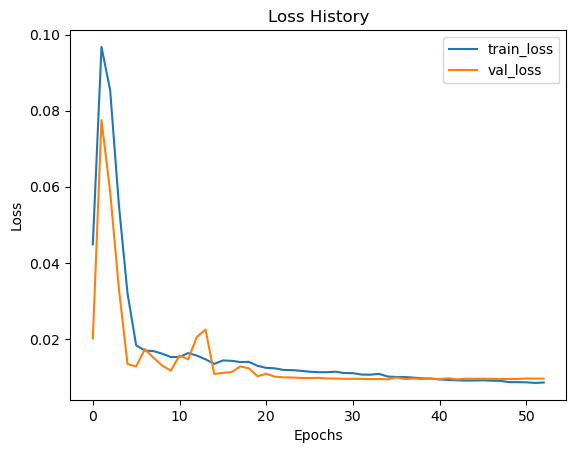

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

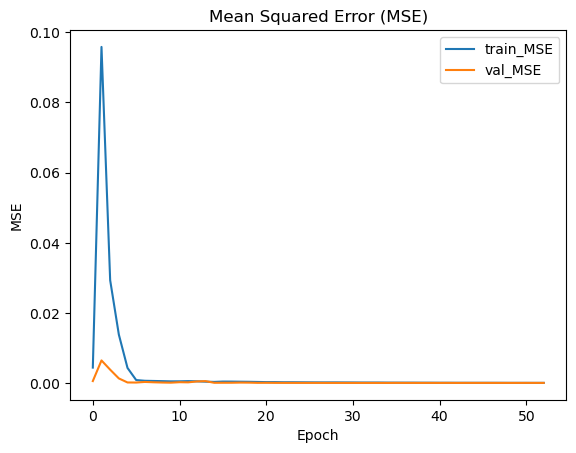

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

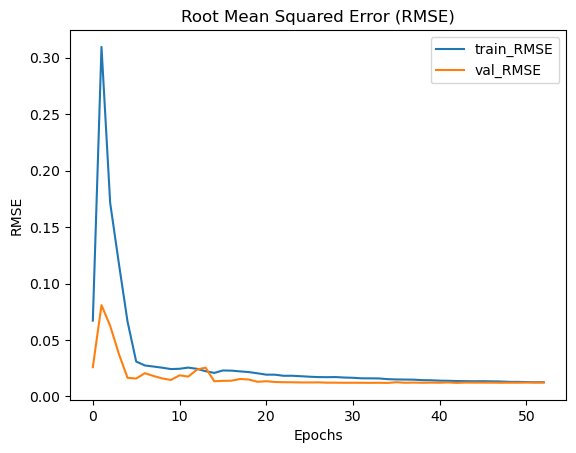

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

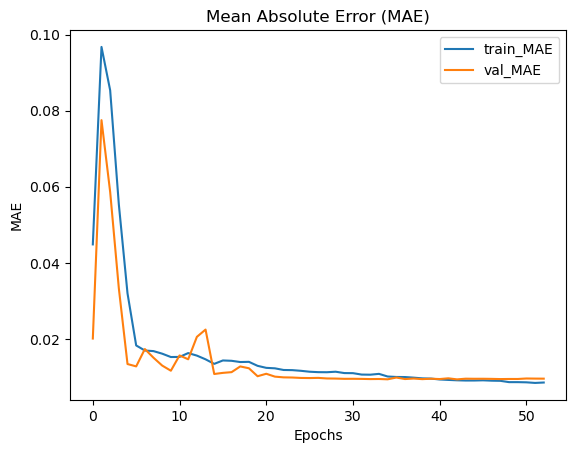

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

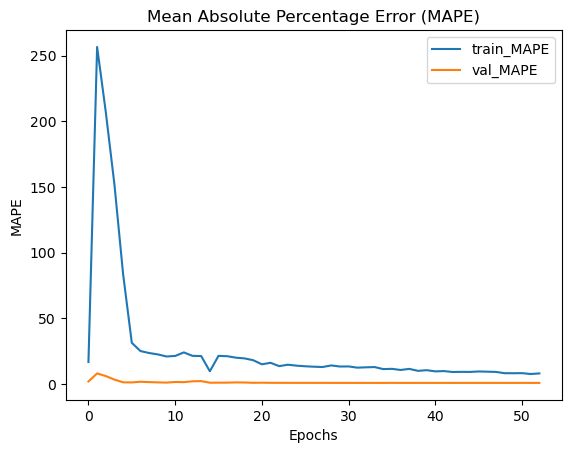

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:35:41.933867: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


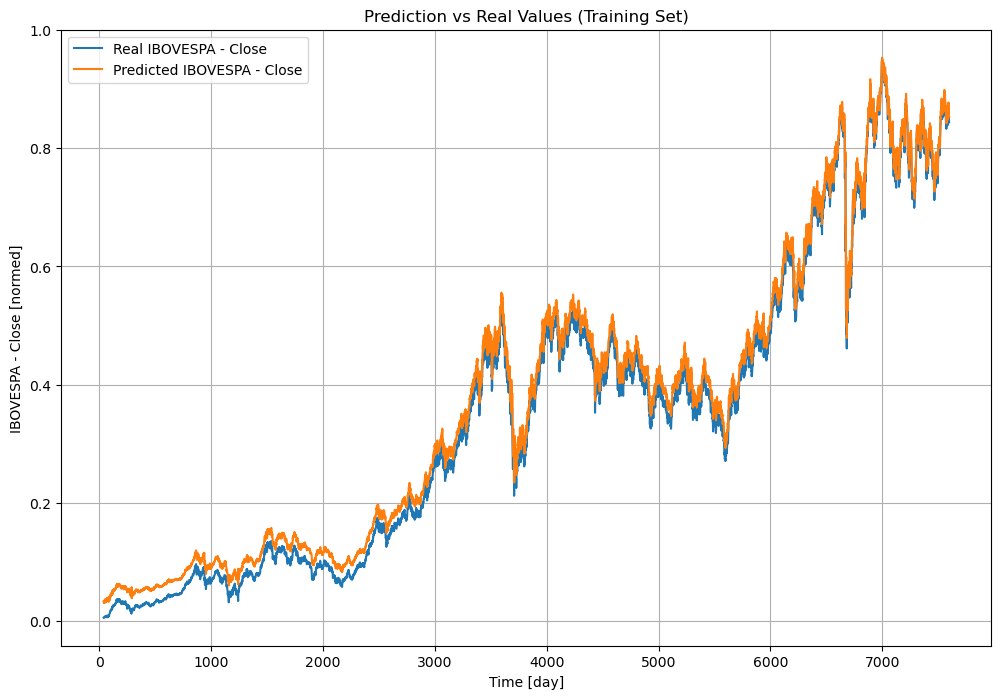

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


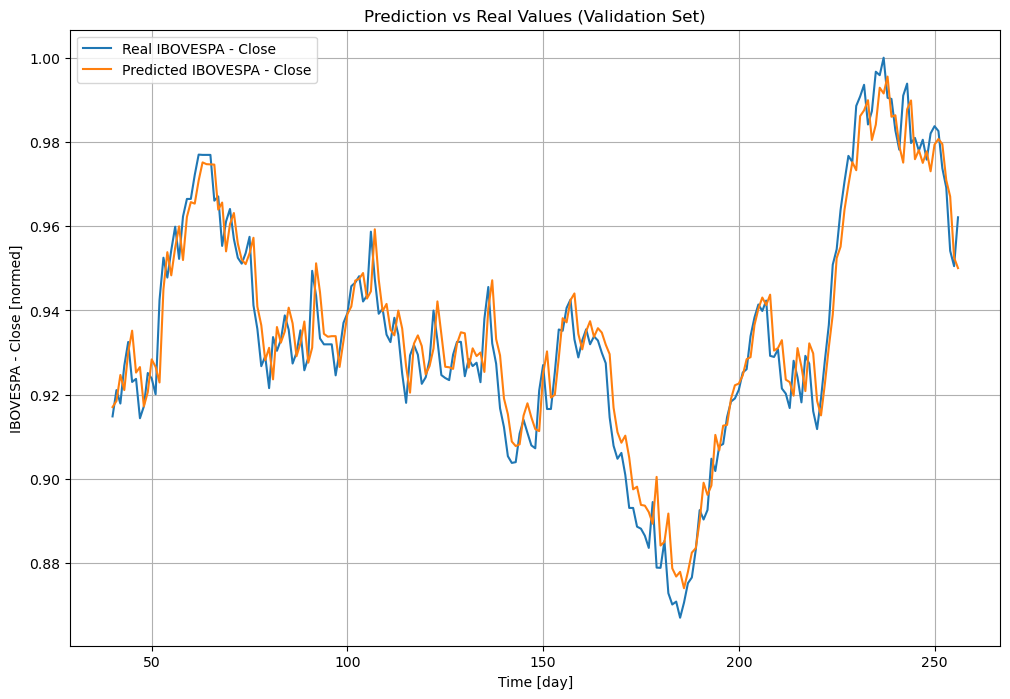

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


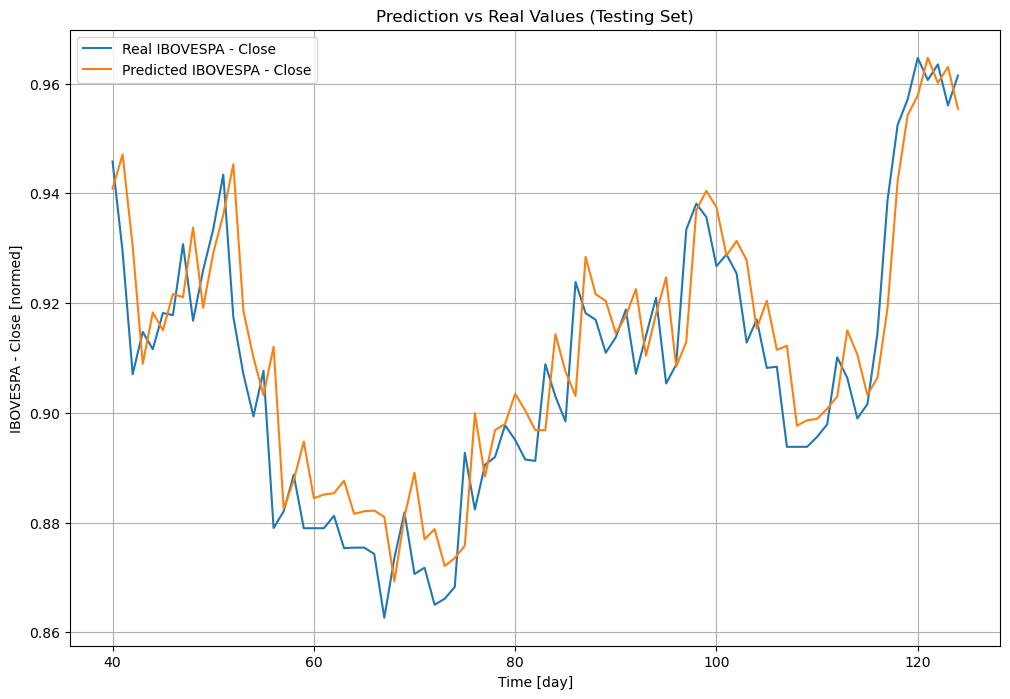

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

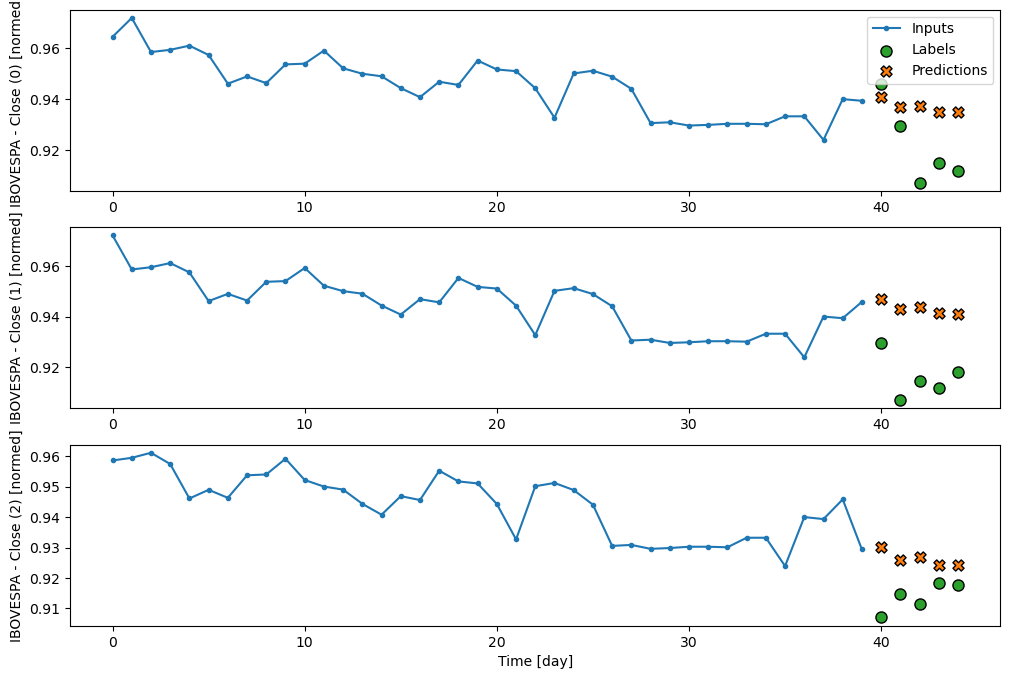

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:6m:8s:626ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[[0.9408713 , 0.9408713 , 0.9408713 , ..., 0.9408713 ,
         0.9408713 , 0.9408713 ],
        [0.93678117, 0.93678117, 0.93678117, ..., 0.93678117,
         0.93678117, 0.93678117],
        [0.9373967 , 0.9373967 , 0.9373967 , ..., 0.9373967 ,
         0.9373967 , 0.9373967 ],
        [0.9351123 , 0.9351123 , 0.9351123 , ..., 0.9351123 ,
         0.9351123 , 0.9351123 ],
        [0.934826  , 0.934826  , 0.934826  , ..., 0.934826  ,
         0.934826  , 0.934826  ]],

       [[0.94709426, 0.94709426, 0.94709426, ..., 0.94709426,
         0.94709426, 0.94709426],
        [0.9431036 , 0.9431036 , 0.9431036 , ..., 0.9431036 ,
         0.9431036 , 0.9431036 ],
        [0.9435864 , 0.9435864 , 0.9435864 , ..., 0.9435864 ,
         0.9435864 , 0.9435864 ],
        [0.9413332 , 0.9413332 , 0.9413332 , ..., 0.9413332 ,
         0.9413332 , 0.9413332 ],
        [0.94102824, 0.94102824, 0.94102824, ..., 0.94102824,
         0.9410281 , 0.9410281 ]],

       [[0.93031716, 0.93031716, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')